In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data1 = data.drop('country', axis=1)
data_num1 =data1.select_dtypes(include=['number'])
data_num = data_num1.fillna(data_num1.mean())
mean = data_num.mean(axis=0)
std = data_num.std(axis=0)
data_proc = (data_num - mean) / std
countries = data.iloc[:,0]
countries.head()
print(data_proc.dtypes)

child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object


In [4]:

class KmeansClustering:
    def __init__(self, k, n_iters=50):
        self.k = k
        self.n_iters = n_iters
        self.centroids = None
        self.centroids_progression = []
        self.labels_progression = []
    def fit(self, X):
        X = np.array(X)
        n_samples, n_features = X.shape

        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, n_features))

        for _ in range(self.n_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            y = np.argmin(distances, axis=1)
            self.labels_progression.append(y)
            new_centroids = []
            for i in range(self.k):
                cluster_points = X[y == i]
                if len(cluster_points) == 0:
                    new_centroids.append(X[np.random.choice(n_samples)])  
                else:
                    new_centroids.append(cluster_points.mean(axis=0))
            self.centroids = np.array(new_centroids)
            self.centroids_progression.append(self.centroids.copy())
        return y

    def inertia(self, X, y):
        X = np.array(X)
        inertia = 0
        for i in range(self.k):
            cluster_points = X[y == i]
            centroid = self.centroids[i]
            inertia += np.sum((cluster_points - centroid) ** 2)
        return inertia


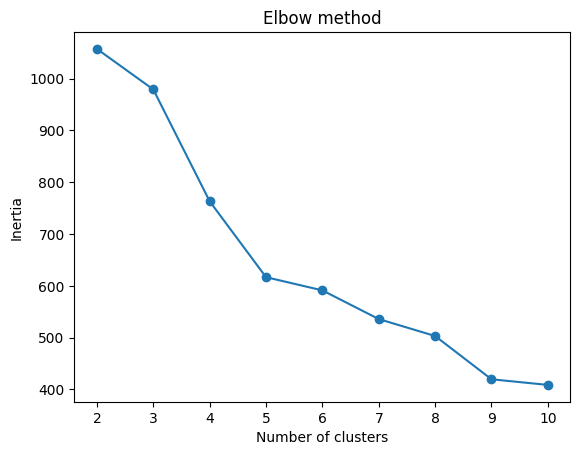

167


In [5]:
inertias = []
for i in range(2,11):
    clusterer = KmeansClustering(k=i)
    labels = clusterer.fit(data_proc)
    inertias.append(clusterer.inertia(data_proc,labels))
plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print(data_proc.shape[0])

In [6]:
def pca(X, n_components=2):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered.T)
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    X_pca = X_centered.dot(eigvecs[:, :n_components])
    return X_pca
X_pca = pca(data_proc, n_components=3)
clusterer = KmeansClustering(k=5)
labels = clusterer.fit(data_proc)
X_pca = np.array(X_pca)  


In [ ]:
"""
folder_path = "C:\ImportantOutputs\KmeansClusterAnim"
def plot_centroids_and_data(iteration, X_pca, clusterer, ax, centroid_scatter, data_scatter):
    if data_scatter is not None:
        data_scatter.remove() 
    if centroid_scatter is not None:
        centroid_scatter.remove() 
    labels_step = clusterer.labels_progression[iteration]
    data_scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_step, cmap='viridis', marker='o')
    centroids_step = clusterer.centroids_progression[iteration]
    centroid_scatter = ax.scatter(centroids_step[:, 0], centroids_step[:, 1], centroids_step[:, 2], color='red', marker='x', s=100)
    ax.set_title(f'K-Means Clustering with PCA (Iteration {iteration + 1})')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.savefig(f"{folder_path}/frame_{i}.png")
    plt.draw()
    plt.pause(0.2)

    return centroid_scatter, data_scatter
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
centroid_scatter = None
data_scatter = None
for i in range(0, len(clusterer.centroids_progression), 1):
    centroid_scatter, data_scatter = plot_centroids_and_data(i, X_pca, clusterer, ax, centroid_scatter, data_scatter)
plt.show()
"""

<video width="560" height="315" controls>
  <source src="content/KmeansOutputVizFinal.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>


<video width="800" height="600" controls>
  <source src="data:video/mp4;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQADJDVtZGF03ABMYXZjNjAuMy4xMDAAQiAIwRg4AAACYgYF//9e3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjIgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTAgd2VpZ2h0cD0yIGtleWludD0xOCBrZXlpbnRfbWluPTEgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD0xOCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAMHWZYiEBH/+94gfMstvnGrXchHnrS6tH1DuRnFepL3+u92P1R76gCNIxEMGFpBV+BjlpRR5jodxeL/1/WX7bdJKwAAAAwAAAwAAAwAtZ4CY/9b7fhFUebKxqCTMRasx/bPOcImZUOn+X2AINNvWmt0Uzabi6jheDhHN1AmplkAAAAWypIAL5CLt6GyKAAADAMHAhoAAAATSAAADAJaAAAADAABVtujpFTc0nFCLAYa4cya2pE1VLjWzAbFa2LqOXaIXgoRIhe2tvR27X3zvfrIRMA4EL987+Qr9jXbAtK7r2rvNRABS3XVtfskTHiCScL9H+znEeXAjTEch3rR2qkMbXzQvg7g0ekd5Z24dIDPv22yxJjIWqf9c4FPcODorvRrn+eRnz86QafFwDE10cIwIv/5mMfOTdG7FyaLqexZ1DvKK8XtFJeIuensO+mogBYq1MyomEktvTaXEsGDu/Tq7FfjT64b3fDu56v4RH4qX/mFOYxyZRbZ1O0v5s6wsECFGYB7tXAWZCQ5bde6YVcrx9rIkD/+GvvY9XbOmFhH2mEZBkG9QCjfO7tvt62TqP1HW4xJXUzfDKDvLvZWCKYbxqBU1+zph9VXlxbturflOT/4ypaj9XvvyZjfJl7iJeUrR0//tGI6vRagathbIWAFjGBlfHrykXcCq4acD69TjqufXSYGmxJt4+KOpw7mXA1RwUl6li+4O9r2Yao4iPuaoFZeX2M5hx+444Di+UmYLZ4UthzcU0L57DU/d0PCTTNYftWvbXkV34wO+EXi2wj7sZfIv1zQ7IaqI9iNCE6rVvoINm1Zn4JaPOtJ+1FLq9LC6cvlVpv7jHO/bWBOAeZ+tRnMh+kHGyAq2RwjYvM4kIzcVQEpJADHVkL85Ftd2TNWjFXukGKru2hiiSOFleN92lEC29+BjRXhyWl51ZK7jq4I2W4E4Hf7PoU3fJaPbyi471i+fO3NCX3pC3kXc6mZuICAdSPlEjyFtogUg7/4jovYO1qlS8Czmvk4xzQqrD7LYE2t/gup1EfYwVNnxC6B8L3dGV6/gqe/KD/VjeimOFGJ4yjsFKMwOQBuXeRIYgrUM8B3hRfczT8w3ehl/UEqFUAoRCCnWG61LZJ8RJ2rH7zPjOB0TiHCU6FitvXm8ItXCcjy431lT7tW/yjDhnNPiKtFN1wwS8ilZUPr7vhxqSVypxGxdQ88AP3fSusCJhgf3otnOboAbT/lqy13iS3vm5DiqQIGJm8DVUmzFY+YCay5BzUe5UjuGyuzwbvu0uhXMnPtEiPf3IT6kcYpXPNQFtzF/o2NdD3DEreu9KgXd27Jr1p0oZMAvbhbaPWz9k6RsNcQiXP/B2MbTaNo1e4li8Goe7sj9jq6w2hnYgOKijV+jKWpXmO1WkOw1gPaO4dfdioPit2LOCIrqJg+lURLXsTVH4BrjxwdT4bskNuA8pGc6u5JIPadeieVkxkQ4haD4i6zp8mpcsCgoOuM+vJFNtxi18V/IOkpHM/o/fbZJikI5UK7XkovdXu5XRU6dyCdPc6j39gkWUaYLyJ1hCgRdWW3snZcY0MY2sMHq6gsiUy8LynklvPQSMhNXpzDa4lgLcS5/gkrB9nPLCM02GpmbohKl8FhP8s8IDJwfZc1oyTkBXGVlzYquvgJIFZiVSzY9QaMdOb/0vYiidflXcT6WlCvSVipDQRoYAfV3q2rLtLr8QsGmMtj+v7sR0A4HnvAMkjRtLNkem8Kp1U3ivWIMPS4W7bLomLDcTsdqOCnIXRDTImpIph1Fl6kGeN47e7mPfB8S1dP5/WVtWhCMwgSy6QrU00Ch01rV4A+A4mMUQGxk9TRihW0tyDhaLtzOH6dJ6thmndhGReSQfqSYPzlNlm7D98jFgvsvqN7/gqUO1OOIWoY7CE9G50DABy4uZJWv28T4y0GipxvTv6me+C5cdDQSOTpzg1x8gwJ513qg2xsf5GRnsagRLEYKmeah1U2LM1ABnRzv/cywqcLF+SgGOcs9DUfRqQHzFYJhXrpZwWra6e4Hb0KNs+ilyNcxW89C5aMtIETcRkDVDxXPT1OaXpT7xFb3FXEAwhzXHZsqLM5Iyeu7Rk80u7ZsklF+xCACxGNipaYkiivo9KrEu9FNMLJN7dUOfGaX9htHifnnSWU4g6wv3FHNmLtr4O5O1Te44KI34DvyD0kPQAWbVniDFv3fmRVqtKcOzFEd+byMWjkvGNpVJF0/LaPaxH10Oc/b5zKj2YlLF/1Rmzp04lQY4zHug6MjfcOgpIKUiMUQCQ57C2dRxNTd0LrXxU6nDYj4AJIA6tekwTLtOXDkIAkjhqiiHE6SSVRAi+WZpPLenfbeT2+6QIsAWrZnh/g6JT1/GA0LgtQ6QIqt9uEp99lOu4QQyDVbARZCgbnfW4ZKWhv9Q9xqNa4f3ylE0sNt0pEOesH5A8gF2M7ZDKrsopcfing95gyqZwdN+aEN22AEAVsfReynklKmu47h4TxQQnLR7PywJ2mrK721bZYb76GOPlefpkVdcAD/dcNfNIbHyoTAi0Rza2t8gl9+dVDF6m/RCyt/t7A9/IMIb/N+qKLfogYlcCiLxTa9E547f/T/jE0ZSmVU0NEzZPMuASQpIjFxuUv/jNfGfygLmWfEphT338OvW2tJ7e0T5dmVYbaHjInyo0Skitcd3zx/pvmWBQI2yWWNBGBr6yQ3WAGFWuqED5Z/7Ozv8L7oV5ge5zv5OvbPc/iQK1QBZopuHAS4oFi7U1Xt05dShcNv0JfE+aSUR2OietGNKBDAAAADAyLbR5m4UIAOlEUhme9r2egX9MHzieQulJxFsxzOWDjn7UhlJf2dkS9zXDTO5oGRjwvcVg/YYgwIxBu/NqP2tKc52Alh0msyKfapKZmT4ABFqAV8uxSvcWfKqiq8Dl6WUzhIfTZTnYfsX/au/AWJT91Gl2N/8qh64+1VuOS/JTIFC+NPY40ey3/r/snVRhndTH306QNVlLFGKnjyS4oAnpmoQPCkIQ6kHNNKZ0MBommud5rQOMMXqYXn4g3s8JRRXo2v0g69MUAaGfro+6DMigenJ0IRglJkKlQT4jC+iCG7vZMYM3VUIciEq5Era5ZorT5YfkzI1appTgp4QUDdxnN0eqD8Rs98gClBLLly5hz0lVG+PuFNdd1WhWsfVTWkql4UVWywjEbFAzvBqfvVvtiCDT6X9N24B9nkFeYBjL1uwNlDphLX4huSsGLkArFsEDxXF2K9W7OwCcHJ6u/YYQCVF0Rbug4pbLayTPYqd9tpk+1DqSN/qBnMkXXbP3NlMIKoG4VMQtweUdxn0Kjez3b1SIaBaNqs9lIOhP24hU0/Rmz4QaANQoPxkPFTZu2XmQ/C7jJHUEkMYlEGxrNOuEpLrfN6RXqqr04lD2jaCd+fuZLffZyI5KdDm7pvjlcMKILoDDiDygQc+ZCNFUVrm+ldaVVtv5bK3XPW8FWGyI8o8d1wrQ//HqV4SpWmIIU8+PGi4tBgETjZllxBnovXQM8fGyURrvryfse1aVwHGq4mTIDDjXYryo7HdvOeYjwqwlmTcM+p/cjg/j+nNM0kgW4jC+2rbjxfubSqKr327ebLCm3aJASxBu02g1DMysfW/YdHqGbxWWfzSenvLmyRM6H9D9RFF1pSyO539FnrFrnExgPSwluQK5lJ3bBrTHRfDRgKxVhMhA80b4c9GXBXRT2euZeUoHmgVkOqZ5LB46gBH6KESkgsbq8xhF7xe8AbYfprHXRkrlq2IwJW/bC5VEkLKTQpkAl0FSFGBu/OYG4Ky1rx8Y05euwncq9g4X8MWXWxRgUNrx9Ps/XxZEE69ZOHi/G4RnSh4tNdf2Xos0SipJY/1beyQywaf0i0prZDhalaGGSVZZVxbEHwJH53KB/bHF2Ybcolsh6DzvhDC92EcE9tuwISUDW7VMhJ/dS6RnNBI7mgWPHoVL0bS0SU50W7U8We+XRkhniyAyiPyybovHSrUH1bQ8nHfM1y5R3l5YL9NCiJGbK8OkV20/o4jAslGmG0Fs0xuwTMmwAjmIviBHOulHgLApxtYugvVxIBBKxItpWDLLBYgkzYWABbbviapI4scdxrThRCdF8xNGT71RB/ji4BzSqj9HodOihXu4WzcXQc+mvJukejyiGqyMQDElmJlpcxP7LjnBrjQcK8lLVlirVH2jZC/qBCya6P7JVX+1sFewBjEt2Zgh73VbiPqJv1B6wN2QE77U1tGWIxYVCHjYL5wv/LREAJocyjDPhH0YHYvGHt/TfbemeuOu6FhvBrXC0pTtzlUv4xz0pclL9yTBk+RGzNwux8mAgefPRJa8kMTXuxJcUdN/4cUg/x9zQWqjdGB/bS7PVJtsB8e7uC/7jP4agj+j9CGU2naQoqzTKa9zebbzKHJ4L5qxpDkt61wz9kTBmMLZLApuSdcycAjq3q3/v88A0d5FaBljLX1APF8ko7FoPADx69y58pgnc9VIaDCzhS41KuUpKZAfptIar0duNnGu+6U9+JgAjGp3UFTHjVWgta8rcn6AyxSCVjxWQ8h2azztS2YC1OiKPUz8ZHQos+eV7D7dPItTmOAehDzUd1cRJGzwmtSa4Bm/b2vveP4eFXqAs390jpdxDXDzioFURp3LqJOwRY3I5g765kU/5HzSS9JO/4qs+l9eIWgjDa7y0gbwXoznteA8nxqpH9x7GW3CdOeN2jHBmhLdP48bqu0MAebaURRLLTFqkeDwBnJVxi4OKgAh1ib20EB2H9swSQkTDU+ZEyB74cwAY4iEqRZEAVW5IT45HZ1RngAAADAAADAAADAAADAAADAAADAAADAAAFW7+TR+rQsrZouXmh+7z4QrdD85bR8N1avxSziLYmiJ4nY9wZP8wio6fZgnVoByGzc2x7Xd97Z1EnjuBlb7j+B9B5eW6mhhzKVbNFKrUCiEw2PXrGmf8iNpZv9CAACxgALwyYKr42JPczadCVBe77XJMWpTzEHn2HQYsTA0vooNO395u9DdB0oOE5zHNifwHtmu9HtKMeazKq3zYjBt0RFEjM99rTcy/IjXagY6DWDirs8acU5f/t9y6DStGyiTWlEsYXAGCV5OMtj5Mh89pP8V0Rvu6vDMLBr8FgEYG+VQGliAAGugr6tLXba2CQ4jcljhwhqoMtEDWeTTjklvJvnCQvZvPLz2HMgoJ19DP2rYRjQekNaUcQCJrHzkcijUddZ+v63HOOzf278IjiM6JLoAjem6gmFqEVb1pc3t035H3pvfSUFJHU7QyR7NRM6jEUzD91R8L/Nh+sp4uiH6rUkaQh9cWlWxTXutXXdGHY1+3pmwgfk9+kAAEIgXhI9vTVoj1DwnFLj+5R17jrvox4enU2VggSWb3KJAr49/P2YcZIUr/sVwMrfy0X8O7PsPIZShikmYraAL8E6+URxVFroj1YM91PgRhYh9+Nl3c7UOTATmwufBOvUIuvX2AMT3iasH7wPzlfH0h6Y77sB7TRSmVD5tRZ5ngW6NTzY03I+UL0crQJ3yM8RHmG1dOwdmcciuQY1r40uerTaxPSiCL4/SBrvZsT/vC2aXk1lvNOvyNs1LwywHKo4lTn2E2I/4h71c3KHTiMsAmIaL1ZS2xQJJXsFZxxB87u65rKHk5nQsTW4EUfIO7qhWLfHLfAOp96k6C96Pewcpe6NtR1UpoPWYse8gErOdBQcIbkOqQG7qcn7h2LBqRZhDdRfgMp7aa7DXtst+DDApBk2MsV6VuseQLr/CNKhpCTS/XE1GUZXmqEJjSV1qGMLosoD8GfvM0TS1ki3+qXtqtH+ThXw97wtjyvZsPw64vJknPdJErcUqaolVmuSARaHeuCOBJ8sAjlnNvccrK6jwF8TjaQ3C2i4DuKzXr8YrYSus6wuUAF0gE8W/h7GEy5mUwAxL/VsUC3W+GfDukHGjCXIhqcDdSH5wXNeDQg37yQckWutVYRz2jZnA0mFTMXhH7JRrqt9p101hmGWT+h/+Z2qlrejC4hCt12PfNvr93cp1WshjeKOQRQ/yO/MOcXfzLGg5ZW8nTonb7wKzpEcDV+8IX+c22LUZyIMUH2PUjMGexRfaXx/3OWskZ8Xv6kSwXLFIlv2qxfLPeHRzZyrr6tA03j70OJ/ZKGLG6Qi3pVJvzV+HW0sC8w1P+90DJyRcraRCvlELb8iml77o6wihwz7KnYdafEu4yHlA7r9Q7ql0eGTPltXrEU5Jb/aLTUitqNIJLU2sBdorbhUxxzhbLbdZs2c/zKrqy6adgTJOkvkG8piRZJWgimvj0MxHAuJFLXq45Wg7FryzmqlPGooGHIFRBjkGxSweDhdaoq44P9KGnOIx4XCP/sXWp+CV8qojJi/nKfKfBPngKmD+N7KqtwloJ/ICU2sbEpMroTlqleRHnRjLUPeRqKjmT0+dF6yccR6crotpTbEX2AEbChOJ6Xpt5IzmP+Ij51hAl4huNos2ymiJ0E/jUQAAADAjZWOSE6oDg4odKIRHmP80tqx/hnOTj3oJrcJjqcNTVWuTV4PBd6b0yzPQK/AOq6BI3wiVGDMglBvD/LFwLhKT0QKLUH7dv98PloXnt9q59A3xkYXX7oq7hg5Q7w+4Rb4aJ3HZtK277Ag1K6Q1Zsa6XirLooLz4ZGV9pXPVKZywnQbAJkxl2RKp5kXOqIfghl/HqJt+iETtzuAsrSSVqPP1hydbG3ygRF/V4gwlPP1DOxxCWVphFGuR/ldB3aqcLEhfvCLbsGgefSz6mI2XLnUZk89MmcVnGaYJrsQP/dXHhS6JcbLrhCIz8xwlP28LNr/HRYTF8wM48jJkqGe1HUlRTrGm7W9wl/IZwUtJv/i8wGAvtqQDejL8HrkknsW+B79rQbLlU2q3zPLm+5YbA1mzcf0KxUj5abs/mGQNbGimmzcZC34+gxVBU3Ej5xPIWfnVAcm69GXgLacJ8MumDqu0idWE7fUsUd5ML0w5efzfrroYcNxuBYI4Oopt4AB4hMbOfcRqlfpHd+ELbeyA3LKmyvme3IAQis8MepCkdiIuMH+FIucxFz5MqtxgE56HnaFiyoq1nrHWkALr9g1BezQebMkwT4NqLa4uWZge9ZbQAeASoehrgI1psZriHfU8MFITPDodH96VBD70Hz1Q6EVnmF00+jtvkkGA4kN+4O8H6A2v17xyRv7ufGHxsGu5Ls0/eRwVYsIEwY8DQ05YYwBc6HFbt+xJ4xR8fXVdv7M8wdzWqLFKOqEhLuF4N8nB22XL0IAeopdXc3iKcS9NZ/ZOKDIUxxbbayEKibvqzVlKPOcr2RiQVwQdZW8Zcb4QdXJDwQxlXFMrl486C1wfOemgFmFSvV8wk62XHgYHCfnKnD+8L4WOBdtntx+/3Fkin32siGL3GXzQKCQrq7lFMP+0VW1CUCD2whgfmJudw1MYsYyMiJvXdW7kaXan/H4gRyKvtc448wbPQENuoT+IsWo6J9Vmae0kGuSk64hxyH2jGU3MF4T9/INtZCmshNorRy13skjIeoCdOjo2jrwmv2SEu06iamjMycBwT9FFxLONCBW8wrzBmUm6fbcGMJE5x/h7nYQ2NWWSY7NA7qAgDUxu24AL/kktCjTgFHAKF9Apbful/QjWe7fNBxR3ve5+HYdwMelcxoKe9nqg71hG/ubb3LfmgmUB7uZvhGQW0N5kTnFFWqudCrQEIpiaQ0yQBWSx4FXjdjMGRs4ALKNFTyqglHVk69WMsdH168KPq5fdMcQi/2WZG8dPWEMToSITcd+A138zT7wDNdXZ7dxCx57o2ywk18KbqR5apKbg70CGSkuaAuKUG5NLeJG0kSJ8lOGlN9b6WkOeoMTcaD+gO+0rPEBUF5yM17HuJsE5bxXX5Le5W+WzXr2q/FZcGCooGKiNLR/tPO0lPq5039ew3jfWrqUvIBG/Ki5BqpMQiZFDl3H8vgyy5cwD//fpQkemz+nNlITtquwjhnEX8GYHOTSQ8PWyQXXy7YEhIvYTFbiB2Ds3pSA7OCU6eyiEC+oxzXGAyIl4lVR7msevgPlN5BQaO+MJ0jADtXxlnExiy+m6wn0xEvuHROrUq82KPAAkP1MFL2IxHtiCNIoAbU7UGY1MVIWARdtMGaP7/PmMgit3gadp7E7VN1wfD9u+eVXvZN1Fz1FEcbkcbQHE/KUQavPdOs4WzbpjaF7qwDjUDKxdcLMvX8vrqwObi23NTJA3vWvJsglrJ10R6Fhb+8N0tfAgHiH+J4BOGhfTlML46rUBJ9eubIz+mvuif5N52np2E2FhLewOl/jdiHAM/siXo50Ns/+lzFGcn02IA3EIiz1k3cnWBq1EtjWn1m1k+IhtERwORzCJMbHjasAawS6uQ2GyUvpkU/d+tncVnYl1uU25k3P2QyXGRph/6szAARLHtzgQyJGs+t3GdNRXnmYrxNn+avsQYF9/9NT8XNBobPY/JKw5j0w89bKuLqXgekMxDHhz7egIzlU+FvLcUTSyHy8sLdFiXqf4uKaLf8Nv9dWzlSkAhkwDewVJAY87561acgg2L6OjtMyt3Lur9AP2xb8giLxGVuE0X3AuASdfHBotDQnpPMSAGy6Unwkioc/Mj3lzIJQqumNTBuWS9nIbolPB+NlJ5wPcoMttnyjbjvI24gmwKzwlkhW+xegoIWYd34cqcwN8UolCeaoDv4FuM1PnWevVhx0PQS5iOKUuBbBgLHaPsRD6PlY4W7Kie1tjei2P65fB6+Npw8pdz2HIxokkGHK6oEen2c44v5znep6FkllmBVyyR9jEiuw0U22rECn5+/fLjrmb1veVpW4JTX7iz1USi//coVxs00QQtMNxtYGc1uM0vgmFE3UssX6COrmYgMaIHSJIaUMjSyTPIqepc/bmbTMzTdK4MW+RU30LNhERK3lUZHgYOGAm8caqljRQgXWK/MwJyivV4in06mzIwig2k6Rfa0azYkmOJC4WJILQa3nzWdV6A3VQnEB4dXxmDsN2QN31RS2fDBDutiixCWfTaeK1HxJhqv+B3IUxRa1JpHsqyb/Bf+m9PYwNEYpHuLI3FKMFzfTBXXkiM9qlxv2wepap5ifnPxgLSq755F1aPyY/8fk3AVuAs7ImDcwlbLAqmWnhz8jdesT9mA0z0RLGBrD3s52ObBjuvAF+bJ9aMtmMGdX68VEFgnGpEZkuByDs2FZ0Zn0ENg9d2M8cZfUe1k3vtmie0hoGDBUJHpJkdcblM6+qY84U84IMSu3KlVW4TunNNLNsQ5Pz2RPjgaJnjt3BLHqp7i7AvJiH/2196NtGBAdqpZ2ZJ7tOhGr2RdZ3Shv231h++CVTPc1c30rkseByMQmclRFBigS9HaeEbV7x3Re3aCdrNlGznMaJailhnjoBt4FujfSjjX61N573gn6gp9eXRLpV2d6DlWHUfBdkSV67iAUoJwS/Eid7NZUNvQ2b9CUTSVTWMwDr0Uv9lf+g8UGln3Oi0oyVMlCArPZNa/G/PpLHsqHSq8h17a7ooHfzGnx2VI4VIJy6ffU9ie2XdMPHj/p21ybG7O7sGCD8Q1+nZG40GHr4qy/5HaHpAQK7Ckq2EKpJRJvQKzHKngAoqoIkeyxtlaap4ereDZleLXIiVojVmZ30xIrFixACywNeae1VMCQgkAQhlnvXLPMJver0UQ8QTfO099ddAV/aP+xQeqs79AMXixonf9YQkChDY2kH8XXHaOOsc5oCw+mm+jcqMCPp7iwMvFaOaz9UZnNRzfpOj3AGu2gyMybPmDEKWbZldgwVWWXQfq65NDQed1YCbTxqQbGYKo5DkMBHkgeAHIwCPKq4m490wkPqEx2y2p1NPfs2TunG9v9TbodtzWGrgSr2LP2YnkOehkcLE5AdAxHfI3fjCodAU+/cuMeSzDicuDlHIxWcTgRadU2OfY5kvLCPVFzWAPo3GDgF39bqwrFMwKYiF+qmlE5inBEHuL3mpUti0pf98H9H0CsGo2H/yVTuDdDgMU8He81Qmu4MPYfCRJK8m0sDLotYjnNa/cnyusTKwjrBmHl5u0Oi8eYahcn6ZSBK5R29b8x21MnzD/hqBjjb2ieUvhsFsplynsU0VMpsLJZJVRD+DEpxl/ftz9stt51byxTbWJtSJLFofifxI/UeSmjEThiqD96dotHjShPVITJlYG6CS0tnSpMXcxRYWeYaWt9hkjFRt+5Z0PDzQD6+cNoxri/7TlTRb6W5YBzO5hFWabtOo73IGY1UJTCkcXqT3Z0kb/4TcXjU67DmxQ+49+4BI35GYzyyWtoLl/0vX+Z7KrBnXPG4RvxtdUtyAAuwuABVwWYx1dk0+rGpijahxLnXbJp5I35pheLekGaDtsFxAFeV2KoKUuj/5uzkFRkqpQKfSQfr31EnJJg3nJzZvKl4bpax+C40tAFrBvNd7pzETijBqC623EwHtXbjTF6CS9cDZ/HHJrDUCuIlFe8ptPnUy0nY4zUaGkSVS8KbdA7Bx9iekmWptnS6UDI2cLV2euCWo/SXJ2T5ZjT5s1sudTgpg8vI3Wg/5+anZmWbmOPv0PsDciN3RsGgUb/QgtTGSD2I44DAwLKryfaR6s+QJ6aewxGt7j1JKN7xHeFTrYTd0FiibdKDOG+pHSYEh9PRMJT53ceLPIv1cgI9duKw2a8OLXSulmWzIwqiRTdXAREB6Z2RuzLzbSv9IIAHpGxw7vxb1g67U9avKeUCZhTn+lWxhrNJQAJYp3l0jWx7koCc1vyRI6Gj4bYS5v6Og8T6iiYnnj3hbX3emYmKM9X8mZBGrpeVbfTfCzV1e+0vO8qtn0mjTPCWYyjFxetbIO34ebhVktxJoB9yVhGqKVpQ0P7lYVFJzLx6IvggZS9/t6ZBdH7C8wjP/RVpFy8Q2Q/JwYw8aX8+/tSZoC8IHB8pp3K/6+PyuBSDrgLhh1Rtdi5JCO2fIIMbWxXg8SRlx8+v8NxM/DfMoFaHVUzpswuVr4RCAmYMunr6vwNBjsQ4cu8kQxMENnnC4ht2bOLzmpHJLrr2cwT/cWs6rIfIUynpf5/G3x86oQunhxrxoGEUIHGzUOLM22DoMXOoEc4zXvlIGYIGOKftQ2IE+wGyTbsXChqm/MdMYJOoCfDGsk0tZw+0UlnU3zayeSPYFewIIorQQ1nZ2uSDbNbWymas7xL9OO6/Ij402xFATJMP8y+in2ihgI9UqOv6YTHe1lMCwJMdldWNUsgKmF0ZHQQcqruX53zeR4VgxYL06iOhM/ubOVlqfwpx0KNQgJLAm0om7m1NLA0KHjOwi5StrOksf1dzFfEIiA81FfwOuKwpjCWjZgR6OQ9IQtBaWMztOpI4IsEmHdtM2YtsXk8miqyI3cysqdcjcbisSsCLKUSE0Ha10cHZS9OJjZsB1OKUbdyOtO3Ju6aljPlVapcyyYAbsHSaXlRyuYkzX6dZlUDK9+Y9Bxh3sUAGoqYD5F8ewO0ip2dUpmIEevjqtMMtZkDCrhb9iwVCANhjvcqwdAlT/roAu2+ZZ+j3/V4EYpvWCyM91zZqYokx/JZx/jLH+nC8kPX05KCOA70zEhag/zfT8WbesVKP5oCIr97hk03sutQvyAp5UNRr6pz1ltC/4RfLozTjLEm5JZqKiuCiP41ARZzImB9p8ugQ6ntBf2GKSMpnGSM450QwBzg4A6b+XxgYtsnEz74htw2X5KhRY7Or3/OZJ2C0QRTWKqPOMKW7aIBa9GPKYqNhrCNGAPT+Lel/VscjAEmrU3KZW/+TSCiOYSbsfJ2LzqDAhYuQ6qouZjeZ3CTR43HFHprruViBxJQfe3CcpUEgl9iO5/xjrdidDHrRTIXfjPe6DxDTi8AY/QskjfPUG257xoITafP01VG2VskfeXmIflWu//lLP2ZMApUmOj+7JQXucrlc4xk0ceH9mIy6Rv+BJXNtW1NsSMCVu2nANnenkF6GPTjQwFjku+7Qq2n5LcAwA6ICcFcX+zn5wfJhlIgx5htFRgLxVNMHIAk2n8Tn6d35wgvnsF8loGpao3/XbED4i/eTZXhxf/UD3IIrOI8eGX53Hj2VRvuMwhHxWtqbT68xB9x2KRMNx4+QSZZ4GlDuLesXnGujnoTlgRMR0k3LCDrJZQfgpNQmbDjo+DuMBhHY/aG7hFnHlcKDe8sFAPfK/BP3shTbVsf61XIO/D4lwwf/Xr0cP8ooSp+ldqlO6KR0MkwaYK7szJcuHnkkGtKG9tq3SsKiGD+d+PDpwVRVpm1lWxsM9HUHPL/TBFHhuEh273S1Ol5Garym/gyyt/Bhgcra+HMKJHBZcEjWYAYff0hvyTA8YJD62gYAr7UJ7W8s3AdEZGYNvWv60BJr5xEiNg788siTs1EffoMQd0zoSBOs2Yhm9rzMLQe53fARW5Rwa7rO5QUjpTEbAT/l9siKCqO02h8YnRvVh1IYn7ytH/36mrKwMOqzlhDPZAZg4TlTjvX6dyzEQWX2BaVqOQ2RWpDcs39BOAyJP3AhB2QFpGOBzCoViYFV26gvBIpOFJrn8P5RawuG7cdrSrVVEPb7hCgRfGIPVKgtr98VfgaLbFJkWZSZbdhiBqI2Kw1xTVM5L2qgGUupRQK8la1I1/kwOtVlaY2E2MA3zULBAfJP8+lIYkOFxxj6GBqddq3k4ePqDS1LKC/uMtalAWko1BQ+Ej0lgoSRi6ngdnYz0y56ctGVziuMgCM7SkD2OcTrSRONHxPtQ20FPBn3wACG7+QAj3/vJt/t06R2/F0amC5uJO1ixzK1qk4IeHn0kx2tp1+S+pE4InWAw5t5k2V4GtoxZnFyqEX746M9hW8GQALRPOKmH8Qoa4odFC2KKiDbyhU7C4yneBkzJyhmytyPbI/CPrxr08JeNWJQ9znd+AwwkdrBd9gzYHom7FNb+kZfJl6RqBQUONq5ujddFxTx4b9z5Zl7ggQFjf7pVHuB0lcZrv9uCza5ubBVyY2qGFtA5GvUaJchtDp/CxNSAHuvREWQSPvq7vrLtvX/5h7P4VcGetLPI0/ZlZSB3J/ylI24isQUscCUVOy38n2v8X59JrRgns3s1AUXxT1D3wX8qmVuOnYMVw5JDlFJsifSyimyAdQ3CalHZvhlmGRWsoeoV7dgOhySBeTYv6oe7VCidijdwS6ZnYa9blCQ6sOW5LoZKWPC200JjrR8cluNzPqq/aT+K1dp9JtDxjo38VsXwj0jULvD72DT53Ofulkj1D/4/dQw6UMtZQcsj7TBGRpu6pGwiYNp9SjM2EG1bIO0HfbJX6eE5im0c5UswXfNhU3d9P5XoI2UO4UcJNYAF6B/L/QOQdf5PsGoUnAGLEEVOa2l+jKzOuYFTA9oH+IF1mr3/tCq6buNUoPwnTIzRAHLdsToRP5AYHvCq0C/Z4iZhp1MFhZtddlQn1jIBvpg2aYxo0JRxC7OtnZA0wHebV30cgU8+kEACy6/jxhERQlTUIvgh3Ny3ZBrzmhrTggnd5vR2wctsP/SL7xep4KwFl1+WPO8V1hzRZQhmJE693qqxApIlKSjcFGv8duIVkRwPwDCjhMSdlNGbGC8PB3HIGu/gkHoSDsQYIKrrpBAL/FRJgnbs4LAi8ra6+67Y0yfaxrA5t9BnjlVf+GUMbwHKDmXnT9u0cJP2x6GA8d1NWj1uJnnEapG2ygkz+5fSt1JK9fqZZn1pkjH7jX85HMgQqhj3p7GaXksD/yMGW/6dN3831aYJH5Pu9X6nkRpJF5cBGPYQ0eXn7hB2/Ppg7Gv6u+GRuSPhh6BrRKvZEKfQIsW9hgQN/NmWQedw944pw5DNJb42IDpC6nF72eJuA7yP2ZVCyjIlmwxu19LtssuhpMmuP862bnLKEGqYr3GoHi6FWYLqHHdGqFo4Q3zQik2HpmaLEt0WSju90a/ufx3ZmR2a3DLNctoGNoaET1YtTxEGB0ruiz8ktJL4CeqB105FIqjIK9cc97DWGHtajf3sl8bXUxl4smkd06IEfDP2F9SeDOKJbfePAv2ZWl6/R/ixqoDliwgd18wkv81/5Lrodd2tGbOoXqGM940CVYm9XJfDrWkOoTgYWnTJpa0hIGTwMbOOukaw7EOIHdfkRXRRKYljAoNCr4XCO/I49FJhlpb9f4FODobysK/8CheCLax0WZyTMyWZ4XUrp4upHw3LhXblaDQ5UOB7BzsYS3veBvAVUUTGLsKPy3H85lOkSsC4KaIOnujbJ7p73yjcib2T+JgzGdNHrm9cbzHAP9Vmb043opWDKXJBFjnz31rQwB8FqsiN/SfN0v749j0pAEkfPFER14nHYRIkbDx/2Y1QWAeCdIodgn/PnPckdpaJ+Qt9HxzXMLAA/i7pOkmV07IW4nhCRR56XCzcVJ79bPoe62BAqwKkUL8HxDZRFaat2VLv7lHeu7TWHhfreA9bbqRoyWS6nEItUlLaeBIFDFOzCBTCwYNoBMnp4F/qwgKD8MReEnmGrlDgcmMP4lyhS181ekNEkz/HRfFcPZC+Nsz1FMS525zP2cC9AEYx4G0xOKRbVwH7IGWhgnUbQfT1BAQg6PTih2PMHBHEVIsxbrCbr9thxCjhPzhm6Y9miemHzpezE3qy7asnb4srVLvcEq40e779htXZkwQGlDzQjW2dZcz1oBpns1e0aZZgJzqTI8ZUjYtpxQwC+08gTRp342pNgly7jvoqTeoOi9Evod9wWWyajLJTYirX0mTCC22QTOV9QLaRW5zcTR1nMlwy3+Y0xY0Ri432kOuCPToFPJww4VmRQk6V+2ewTjZZUfZ5S0ob0Xa0u24E9HeANfdyo2aVFA9BzuiynRfC8I6ItNaPdy+OeZonJxawDqHBqHJF2BQd6qYNBjDN9aoaza5uLmJ7q/it9HmGcM+uwObBNEbf4/DqGYN4bEAPzmgHWr3jZSEws3GQE/mkcZtVP45CBwg8S2kDf7R6zVN9SM3kYl0l9A8DIb94qGBZDpv8YKwbU0+11Md+X4qzdAaUzarfHxSxFDF5NyDHPaOIjJnNLKVXXlIjw8PFQLrYHCKHs0yz5ftk0zXiBULeg5SSf1kVOhqlCplgC7tRobCcZbP+TQUsYNKxN5SgU9rHq4/GxB5Pk17cYbyVeeockpnUthIx2GDggOz/uIkMaRpzR9sWOFq74dedX6zXzZDtSpbPkI3JsFavlJIufDg9YXImh+Z5qiyXgvjbmNDqCshztei7+loU3SQlpzwwN+tlPcO8CI4h2/oK1ZZK6YoqAMz0UC+1ZpxisdMRVnJCvsEnRoq2IIWwy0/7OqTrC86qZcNvYi5M8+eLIujWgKBhV3lqle1Qwd0bdNAG9MqWmSSFuyxRTpxFJQad3cvbVGhOwRLVY1HebamhUOKtGqlkLEEmojCRYKzNzFrCDXzgDqa1+3pDmXW+B6Ulx22Vk0KNU7i+5m8s9Yj7d/R8PBSUz4Mygic7lqu3OtPi8RIhtpkV+WC6QsR6tK2qhAnXq2FSoOOuaS73HKyF5jd/WSYAd9ozOr6DrxDo0yivzHto6alXU9/PepKbQKC8JeCkwRsBnJGFA8ySuxqx0+Uhq/aCMDgap/yn6d5gBSRi9Md/m71SEwcna9BCvbVao4BSw/nI9g4qjCVDE/CgNXKFYypQHAHSrOO0N+2Bfd1C6hSCni53RPNHnt/7J7Cb8eXmH7jynKpEHrYzAm4qw3m6JakvQt6xbociaCWxJSonB9evo2p2/F6/jeJpoMbpE8WMWZ6DABcNolvWsZ0bBTrk0Xyzi1Lw/RU7Xr/yuuutDQBOu4t1ODt4lah5Gth/ovJhF3bb6dLRLuc7DMvEXYK1VKdXUi+O/4vrxL0Y3CzTICz4n0pE1xtcXOU1R1kFIhIKdh0gJdVD2HMyYQrqgqD0HiTg100VI4Nvd/VCsq6I4Z1oM5j36t3fuFTUR2NZw0hPtnKqEktu6kKoe/dRWDmdze8bQGI8MWMqOLwDeY+NaZR9nAuF98xelpiLqUs0hIVvD7XC3A4c5c3EhheMnE8gJ/BG+WG0AH96TXuxIrizB5jA5KV2AAtosAYixqQuVWt2F7VrSvk5NTTmRUFgSu7TNKeeZMzCr0jq5rsCZpYOoXw2BS6P9feJDyh5F72XPJvGMgR4HvpT9TS6cuyZENis33L4YY1Gk9xr3sWCD8z0iI/wRl3wmYUm6T7lhlnKEFA8AKBmMdgBC0u2ce8j0YcuzPhrYehvMfZDIyzFVe3XXikNu/W3NZsTLAo4LNV397OUQqfe1MK2pO/jddu2F/h8S4nNSG2CQPSoblKjORIc9UaTmEJxLGVOlUmR3Jkm68lXcrJ6fheldnwnPFvvzgbBLi5GSFDhZ2JEE8uz42lX7uVjMyv9lhuw6dd0SDSp7kjlMyr4Dd++uOQMcUOKQHDsTUJiDwMe8Brg9rW6Wnfu22jduay+CageyQAe3Z/2K/NA1Y+au3jr5Pg/UEHr0o1CQp3zUdMcN31koukmBTM8b+rsd4XSV7+vZpNTt6jtCHsYW7To2a2GqTkXmtDEzU4jMpzDUsqMH3XmzuthRt13ltVHRXEwy0lCUBBj4mz1jIYdkgjUCtD8zqBnpdfQ75bFcz5zRyUevtVv5l+irRit+/zXHWGWz/FW2PfwBzbSHBxcxxjhJ33bWzH5iOIINH4cKHCb2mVyzx0TiUiu655QCh8cgakHK8z2yps1E6lz0NzYeP0MOF5CtsGofL47p/5dxRzcFhOPY+U/BYly+GvMSBg3s03Xhih3DgdVvWtTd82ySci4o4jbyb3VZGM0mnbTTUkJaJ4kUwL4kQv+e/eKzGtTSK4c+mtdJ6XoK/sn9G18P1IWaTugACtDB5rroJa+hzB4ZKMkN1JwMZ3xoxdtPqwF9TOpgs5qetBtg1oQSS8omX/04rSsgG4ts3Wn8ZUsbvogS7fx1Fenpv5czf2kIO8RahM+3OG9YUcczhHhycvGG2dVxsBpVAGCYpKMhyAl4pqUvS+Z/jKHFaBLdEyDe+O57GftBkJ21kiQpC27TVv3jtZ7zt08fFWTIhf2riQrl0VojI8Zt1BDwyEVZ/dqlRMqTP707lfZPCFQb2sOutJpCIzS4V/kqVtWQAnANjVCxf/TZUALFrtN0/zcvUua9C1nYQNZfvJ+KqXardR20XPaAsanFzzzA21SDZKiuveofhFl0GSzYtkUsqdIGstlGVD/a/WOul6AL8fLVp2ukw7e96Utti+iWvMgx3sZRQOLy2WyrVSoJqW9vXfiolsmnC4ahocK6nHOKJB+hwa1FnehMdHCYbxZcMS7YD9CDnrdB0x81Llm0rPgZ6gSIPXA01tGDEjGrbOKkpitqe6PIyezAuM+C/DrqzC+UQL2dNUCmkj9UVe5R4GeGWsN5dU52tFbKpxhFURv/cJ5ziyJTPQg891F9a2h7GwAmc+njARmRKX/jA9Y6a3TCvFVIlruyIcnDbdkEvqTNkgEXoPZy5urAqxbTtwngfXZaKDWKA2pQ2Mf3KDUsznVlrQMtPGJSduB91lNP97E7Csfbt7YaRP31L4Ts98Pzlnem7czukKbKc6WHxjZMvAeqGhMyv9R/lTWQY9Jd7BT6ZXwXkr98A7z1RTpz5CqOAkqdXj+GNaQSGG0vHWIhPU6e9+FT4sI9Yd8KUCotBPUr7AYYeu24pVhhglRvbbURovQAt6KikphGEueD0ZKDsafvhJI3u+ZsV+bz6R/j4wctNHQuWQ4d2O3IeUZu7Ptd28Uykvb9ZysP1FQXTbKxhVRtdMw6k1WPVpQqrIY1bFgBcdMg0ROktdjOimo5Zk1EHbNNsctecvti52cjTyUuuv/7PJIousmE3m03nSI53COApsU9pI1VofviZJTBnvj7XeMPWpyLngHeayh3ARWRDvv9YC68ODkrVKs3fufgyroyzFxPzJx1zb8R7mySbzccFbLY6dqotAH/Jh7yizPmAUt4Y7TmaiTSQ/75bmSy2lyPx5yehgY+Y063GxwW/PgnjSAff1+o0mBSlB2Jwvz6AxODV6X4eqizqO8AUisvKWZnxkD74aeOL6iS7qWzXRZ5Qr01pGztVlu4juoJ9ASq7gkKJNZ8v7bEK3LYwXjhfALEMk97fE+4jiGc/mWXt1/nbyTRT8Lp/m5MOi5Km8MhpaJoFb5qbr4623lBmWa/PadHUdWneXdNnJZqJetVAJosZLPEMXQ/I/CdoJSWAcggSdyLfeQllq/y4aZ7QrJZBXK7/9xNjTJnJslcweMJEFI90oU14TzoTxNoht5QM2ByMJKJjLCSl4FuBajfA4l9UjePwz8eNRBXs6dwO2PYFfCcPGk4keo1yz4C5L0xam+3MaH7x2VeRewzzBaC8iJZVVDWE/IKctz/SyVahdflHImQnGXhcakd/8Yki4BE8jA/1yHQnEgtDqBY2/sKL0K0hKq+0qf+9N7Ximl7xSoRpYEkJocNegFJV94VPfwYwQnoeXh/HWdZMaZjAnE7/ED6ukiitywdD+IDIEzjhHLWTMF4mQgB6YCRJILsvVmUyE7Kj9x0ln3iz6+LWbBq3BM5x+/UaUlMEpVsVRvyfwq6VmVMyXzdCRsASidYxh2BY8bX8xaPMjg0iH1GjrV3qAA31YAAwj6oAZdFoyeD4kJYMULRAeLkoedYg4UUVoalK1E6ho5xie74yzbs9NfPo8JvHZn/8u5XxM3XYb2XE9BUcgyNqN+1wJJInl86A5IDXJU+VuQjL41KLvlbzSmWmKwHXhOi5jU14CeejeiD1yAhFbC8lfRqauE37Fg62qlihu2NWWx2yoxalVWhySsjSVKl1SazB3dxzIftjRLHPhYxYk73yzxagwoiHuOjv2FouohcBUKJ1x32OwWoef5/1Vw34+pMGspL+FC4/T/ENvwhuMT2N8RSGu9p3IxvdyrAE5iny2cYHqDvrAv/Oc4/6tpsTEVlFCoHHO1SQSK9JJ9Dwf73lMPh2vdYvAjCqUmn+stUiJF9CtEsd/jGtWpZSU5HIsjdSjZuPLqsDo9zqYEoHWuvaySWXBoeCAm/KkwnY4KWGz57Nd2FTH2x3OXAYlKS6Tef0c/Zn7RvW0qLMxUi1ZKS6Zb8nKA/6IZpr/XHxe2f1fulBJgGZ6NN7XZlaZoSWJODXiXWvlytn32rV41Vn6oDS7J2Ip3PHQXCUrqZoxDqx0IANgpcVuC97k6njexA8TY06MnnKPVQCyooTpN5n7+5lm993dBBvb9Fz+l2FURZYGpnW3XjE+hFt7Ru3SKgUPABJOI5kpNZBvPIWL8KyyyRCSE4DLiN/66SxzUDhs2jPauIKKvH/YBPpGOilNLFkN1vTaPtp5Hy7PsR7IpD7M/KwiX21uINJNNfO+Kidv/oar4TKlZBxvJ2dMZWB50HhtU1brtVsain6fbTfj5DATJ+5vF/zHP5MNyzcAMTqCOyFRWGc/MUtl3J2ceMJLLcBTpG2T+0GuvQqhL1aNuUDghk4jFml6vYv6kHk0zzEA9S77RFnWbgOVlq5fDInylBWX/oS9kpDgXU4n48dLE+LmBvnTOR/6StxUkHz/2Oc8Ima5jr1nsrVRFFoP1cInZxRXYl+EBbQWVgElWVBCIhgCSS9P5m+Qg1LwmXpw8f+baSUxpjLC0pP3wk54hlnQA/iwW0kh8nA8F3IMP/V0bMeQNFNlPa0LurLvLfp0SIqga5eo/GadDvtHVshLNU9B76wpwzU/tM3iHOfHxPhVYR0tqLTsqH1TbFmbIyCW8RwgOf/2W+/gNuMurpjgIW4UuFBAly1moipq5C9ui2sYqiuU28o6We1i+hbKkgtBSE3GCbHIKXaG+vAtqXdZNg72OcuF+lSjU3yJP9iskPMdQBYdZsENpJEKuLUJewA7W8ppRrL64WiO5gRTlqzl5Zpb77K+LjqFSeeI2bcngON49QyZHiyVtbD0JDjiCHdPGiznk8MjD4f/cqOvtHvflCO2LpwDEmiMq8YB3EM44prpLIP3h3Uy9/lPrl/VdbKTOV9qqn1rthMnbVjeFIv2TWI4hpKXIgAAZ19JpliWZjk0OT2HGfdWwZ8JU7EEaFAIjwknli2rtnAf17MLyVfYkovT9lojoo6EAq/4xwc77XH/blxy4L5Iwz8K58m8tQPXNJT/gIcwvCNCBBS/fL4NboipDAJEJcA81yHzHmIuGrSwt2DwdWRrEVl71YFdK/hiY8haC9TRdPcRQ6yG7tVSKE+tVEy5m/O4SfapQFu9hrJAW5Fun2wIq5+dvH+YBftmYX5hrt2ICxWGUPPqLqnFTc28BGiDP7rJ6kgwOzoUe0GXBEulJUvRXgsyVEbqxElyYhof9rp5288LOc5T2GfSqhrzREHuly9MnAkl2tj3bBTxycDIWwemJIGgNVkBng9zKcKActx2GElV+QkxGdjp++fa+NNCOqzam4byD2fx5AsecHmIXfYLYXXf4EhFx5t7qNQFW1Lkcfv6p2u5gNW7KLO2D9kBBAGnRM1XPd9atXI7FQ60qGoYj/BHGSWcr/xC2PaGPNhPlR0n2s+mDwPgdPicld2n9tb79Yeb7mVGTAaRA62gAEmrIAKR9LHAjutYEB3mWHzxaBcn+9FwguEGQQ0TmJJkNtWwoyzY1XKe47mc05OqgEFylvn9gVyA/dZOkFoXRwZ0cLkKqw/4Bkkmp9845Fwjcnczt22noWTC3IGkFlefA2qDAQrCYvAGHKmkCqgs74dll42gQJzmOye5mv60arkxVJVUZp8p6VzitMXXori7+87Lx5F8qCx0IzzKFcK3Tsvx0oglFkkfABrh32Fr4akpvOrXaXzjsEjQ0C2wD5eu2wuaaNN6Vklap8xMITt+alzY2kQa23ncAzLBm8vXaEoX80aaX2A0Qtpu35MIhenMUJAdWNBmMvnLd2uC5RvRxzuXYambmhJu7Njvufj6ux5fb3eC0vPnMF3XM5gHzfxc1+NcBXVpbbegsOgCdVFOKIPp473FN9xZJ46+LPSw2d13nPwywS0SKG4w7rnFwNYJLW1ClQhf/NC6btOCKV6vQNIumgHlSodPT6CYhWNdcIvxH1G9EUXJAYUYsayyOBybQ9XCW5Y/Y4dSJfpNs1HBtGcRTIQgPLlynyY4JbzsyKAGSaPnKUR+IhH8Mom+uxc1dgpGPjD5TaM5ktqLaM21zRzUlkktIeCg94EYHCO0nBwN4PK7gG/7rpf1poWpykabIL+G1/QjQFLC9brE9Rdy3nENztISqks3XXn9Q4bZL1sRYSkcjp+H9ucIyX2Z+AC+FIY8Xi1aL+e6Zt2i2U2GEo1I3uuPQIv5bqqkFBuTBEs35D7gg9wauGG1gjXEoFNCj8SqPgTKRWQtb7yVUf8SV1IoviBo9ceEUs4Fxib7WspKf6KKeGN21+UdjErAGm2SzByRYJOIH3Wsma+aL7kZmWOr1Z/9Iv+d70PcCBN0cyFGUUVQAMI5R8fFHKJGM7YIziNVof4+Pc7R2SbT7+gAArc/xq0987HqsK4FJwokaiuIv1fyBKHch+9Q7Abo1WegrMK3OzwmIiZ2HNMzMMJTur2TKLFBsRvbUjsyP1x6IUVhBbJldKpWjiFek0g78YE3IgObe7g4686oqdjj5OArpbXkpdyWb1A20MDxlCj7FcyrplOZ3s/n6LHZ2M1/ZSC73NLJqPF2JvYBVemMpe45751R6bZc6iGCK+dP5ZOdgUUiZeLHx56JK617e230LKHKXwmTWtUKq6WuDO++F5jqqOFxJAu7xNjGHUyX83NHY7GP41If+q0yFB+jtL7TJh9Cyk/ZPfon7mQ8EpuCPj9nDPOT9qI/ftE7orLK6UTfBZ9nQ3XBH7hkjeh2xAls22h0WSIqHFnFF2P8yKf1va+YawEa/hE1E9YzQI1Z9VsuTlau6Daf6hYwNGbi1/jyIBIrgFVyGMgR3ZOLrQRhXFx+88A/+AU05gQY/xP6nCSM9Zbma+ROBR8r3k4QjOYzdHO5L4SIbBite4fU4xjQFjqip5ecIL2fj+OeJVCAUONoHmoZAMaj6dE1XFQOvNzJuf3jRyxcKjQgdPH5dCbmWx6IPibz9q6T6XmS8kMy8vn+5YOyTflkdq3Y9NNmhAj/kszoiCHKysSaMcq+XbJ31XI66bYHpPMmvHmvdFQqx+jM++/TPDx3iQhbJ68aK/LR3JPXeayywOZ4mYYXWcW2U9Ycl5sE3ofvHu2jWlJDuQccfWJh+Iv5HjoEoWvt7xmASqQvcmZBBvgcRVwWkmBcrDf3pp+mq5a0tTeDIrTmJzBMjtmjJVkyHX0+XvK5f+8vytLe0/+2WhVepbxwZnc/S/HD4OsSWQQcu0be77Mah4RtnRrU4WdAzNZ9o+FDRv5Z4SXzgvQDxIqs7Re2sbBTKm6/kH7CXF1yZoYGUCZQS1szuMBpqDCsaUysf9BWn//R6mIMBpSJXtNkC/Wl/Kag96Ph2FMwegQTgb0/ZoyQX2PUj/pI+A0NXX5s9SYmytiRqq5eYlaNWml5lMlCsl8XbQrjK++0qMKihjfBFVSjv+RPbiHYfZiV+zTsIon9431aQmXpSaXl76etXSwMRZZC/FS2wdA14cCG3aZgp6baZvOkrYPAD9JFXVTws1JKVYHCWuR/TzMU2soS8XMkpXCeQstypilzw2mHKdl9c1Yl+4fdhI87J+R2ZWRtRvnwYtbYLZKlmuF3JVlJnoquIA/ofetEd9VYB7c3flDormYugc9eJ0V4oWXnABxKIATh0Tlkgluu6JXj67HgPtGRAy223q6ptr8tgtj66Eipu6z65pm7GagVOQoNnfpYgcHjqRpUpocfZn50S6PpCsOOOBSEdMiDnedxYMwjKjgs7hJSUVKQOciNaMxahXvP/tvHxOiRkdXg8R7dRwrBnI1Z2sDMp35uXvwYuwH5Ne3Jg4cFHrfQ/pyZxVtK2rY4YcrozZdcviGP+jP2IwVwSDC9ITz/QmYSejwfcD1WNm84P8+Gh3wPG8pYsoBFbRrfGdyaLGw7m7z57UWOTVGbyM4/S3ufRzLqFA2FoDoATWzU4+7bZ1ISfm8RQsrWrJ3cKgZdXBYAtVCJoy/Jxr3LlzoO/p7cX+0dn6U7n9ZT04Pnlu0HYOPtKtJhqZVIelADQvjhgLlFKsaYdpU3u6zQ57tOnGyt8jItYizqA2+t281roWlHh7/gxQ+6E0sFTzuVAVQsXWznIHAqgKEmmIhdSZZHTfEM57X5JtPL6poRFxw5yDB9D9fCaPYVKR3eDAkbQdpQOUZZI4wRndOYRXSnpDwm2Vz7MKF8XehgXfvYlZaiVB983xMFlIsxFVYzDpFrX70cF99HudNqT2Dnhd6h7VxX2YFKIA6AUFWXPTNzU31Jyd2E5IWqUYgE/9kBL86xVRtvzInIah7507FYHOF8cZe8feyIQfeJjOV5OGlHubVn01iBbcHSQp0vIjNblbe4dczcNlJ/AxBQbRbW3lWpKTjzj9Do1tIJqTtCUOswyd4p+VAPLESswRYNeuRAVDJ8Se3sj6ft1Xqn31Dm/QiD9wRBYfCzqGH6gjXb+GB1ehp8oGoVpXQlshGHz0WLK/n2AdicAGblEQ3WarUC8nywdXqpZNhxzoRlw07suxv6YtXExVl9+08EtXPSppJdFV/1DDNoz7Z0JIfgZHTw1rT//431ivg+Vc0aqblTO+/vfybIxPr7UpMugvVmHj6TBpkvx0XpQiYKkUOry/xsU81O8dh9EpBhhXEwyx1vczrW9OmoBysL9/mqXxRQ+LvyrjGQpt5FImOrByKgiy3BCV6wne5EJv0y1OloJ9pP/TBRiTz/026SlzSN3211e9WrdYpK90iL4GxfSQrdlCSXhbPcE+quig9tm3pWcz4gdZTuanV/VJcCMDVN9eDF5W2EcOFb0kKGxDYnVKG2wQC83cocFwmROO9b4y1h/1QdvHLiq5S7epS1xHABn7KWiXNLXDk1I/kTXdZxyPBfmYEImEqnwKfCoYiMweNqlWqwalIUJYoLkzZ9rM6m9L4A0axTfI1bl347jda42SDDn3mtdqxibZ7igQ6J9cYyMyERCBzFk4zfvSBLGJR+QudzCaoPqCj0hTO+WiXt6NZ2bTkfywZnDAOKv904pkxaClD8H/7xT29XjnfPrnhJnjL8xbTJetJQNB+YocJwXZZDqA4rdpFtq9crVg77+L/wUZSp0V8/3MRAPF7STebSkcawqE5HkQYsZ0sc0GXrcY7MjX4QemQnbu5wMbYhXI6R8qWKsdUj3VeICWBSOw0/dVBlSOYylw/znoFBhvqM6vhJV7ASV6QxGdc44HtuvqePkfykIt8aAzN8zIm4P5j5rQOagJd+Mqzjp8hMQocxwKGIU+mXoXqbZVmxlGhpRxZJMG2ZTtWa3LRDcAU7LAFNT8uSkTopfTmBd4O6Lk1cNteAWVct3c3ta2eon4V8V2x8f2emi55MGOvobYbPDlR5bKWwtibz5pVdpU5PvFOP5F5Kt2c2eY+GALYRCCY0w29O/7WO+P7c+nxVxz1lNQJ55Oa8sujaV0yY36P7ReIuRm4m/3+NP6EWhuN3s1VBuRw16BUeZ6//G75cjVHcz/k8MFlY2CxpSdYXH9IFMeaTtwkMd+4pbzZTnFyCVaHmH964sjEla7tM5Snq+oTEfWHebyQhRxAyNAVkfvBXWR/c6ZBz3vV1a9C+yPXY2pJwJ9M8k8ztYa5+gAPAw63njxI4OU1ZzV5U5v5bfjtzKjxTH2I63wSMhdP2Yx50pBJryKbmQvFTEliFdxl7RzagO1HnJslHNuTg6J4rp3OYd5EM6HPctKS3cQfZEcLgGDG+MWONxH/+Ycav7/574LV6XCfNn84Emwa2MuoolE7N5fCCTkeZ9oix4EK936urcty7c4adot74jv5K8VYckdKVVm1QcuTsiCbmkwoTA25erA8GX0QHWj6xc9M8uRgx+6S2IvRg8qcd5RB5Pq6jthyh2nPVKXJGMMawFyRuKRfUufBO8IjnP2WfHMR+ozyHvriibuGbxCdY/hitLdrS8Vi2qsmz/ligh8IAAnRiEBq+y2TQMn6XVqlMV2j473ZRJYqmaQvZzoEvWPP4FB3DBxAlg1beg+nAR4assPL7uVdBJFBD1xhMmhslmxGNa7C92PqiEgahyHhXhAQ92eKxUU4PhNWj+TcQchq3w5v9KU49E/F5OT3VB1ArXSZj3QKgiyYA5F1DjKXbggqyAxJJJR48pQNIzyAaLOF3byAuXJkRO40xio4xUAlgXOwUPVUaNNKTLOSg6bin3ySjLW8B4ijGuev+/y0xY7LDqiOXnaJUp9PzL27Vl9Me7MMNZXi96/Gn9TBtagFPnPlMXWWSko/upoGSe3XYTB/maHLZh0RRyPUvyvp6cQi9/l7twVdZ85pdaFfxGFbPDp0uHhWEQU4+lX9Zp/+Uv8onD00msaALpP4sKeJNt7h5fA/HD/860H/GnNvXL++gsO8RhVMNu1FQH3lUEkeG6zSKmHUoORfdu9jTieFYDZivjs0vHr4FcnICsGm92otSJRVSPKYVk3aL5H6JBCqAQc3LnLEYtCRMEi6vRfXcpJxyCEONEgZ+Q1njtFwl8eeVUDDpCGpeLGUa7h2by/I05AY7yZHXRwgN8IvJYgZLYDXjsR4h9lCOmohWh+nc4IHv37XBAwcrYY3FEmX+pAnLTjE52QZOtdmNAJvQSy2rdCwONns9Fs/seOVztwg2oV5RMIRK2d5MOL0ytUWHjX9CdDvRzsfCo2eaVZpfSYUtoc2DxZ/BfsGDAtddhrzx2HLeh3DN/xe0K50oX0r+/IgOdaZkr69PKgEOOapZ4Oc8bH5xf/9qgCn73dO3g/YX6VcXawl6SEfHSijcdrsU+GpCWxrQNLf6aMMhdR6PWA1pe+ozx0kOm3RdDZsTHOlsfGcuLaW0tYtFiilLRuUcdTcbo15j2D7zblEFW+B6fQnn6PNPShrtAcW1A2RMcUCeM/hRny24RzQ8BeOv7P5sKRp7LdRtMfqWTZDTAQ/EOm05BRkKpF2gRbo3Pne69xy2bLUXJBWcwtmjO48IUwCpPoK1MJGudflnVi9LUUWdJtBfR35f0L14J9ym9t4t3JQIiCQS6k6WlIl54VXLSHMPk7e4mhZWWt5VYwkinOgB3/B0uOFyXLqVRpwCS8Yk2QdFIGvalpMNE8ovcU2ijazgxLQD5P3GZFBPWeDLaVMnGAUt8M9yNv2n6cjWGauqSnqvC65zs2w7y6YJ7fw2wAUM56lMsDwp4cZN2bAvRfVx5uRGySlhjy6s84Z4RxjTn260Diit9Vtsh+X4jjcdQDvOgxYk+eawE9X0/gIWcZLIcBH4NTbUXZw72o7b2EIv8TpmkdW8wyv2/8GWmqN6zdX8EwFf+H8AJAMua3qqtiB2NYs/FEzagZPH81CACM2mmlpzlfxSYpqvoISj73nieG57cf98E3oVOYFE+/284KG/RqNvuxPrJYk4AsCsdV4m2bIvKClr448KShppJFhBAbjAHHCwmLD9T7Q/qx4Dah7C8JQtkXtcPDRqlA8OLIVtipYKJ52oJeocGMon8rQ8QaIjOvB5/0MELdfjvDZbzCdLMt1ox+xfE0XKaLHp3lNp18MkFfH21v9+ONJ6voQUyZxiYy9HMBVQLRmOBBMrPSEBcQP9B9ZsnSsiWKgLroN5X8myGjB24TyY05Hm6RTlLc/3HCUIffPHdaKBPJ6l5TxCf3KxwEbiTFqnYLepiJg/mU3p+PgainMcsy7xI2vpB5o8zhape7pFctS+z6m843CpaMYA3N4OkVMDN385fltigEEeD/v5VTtIFAE3/1PYoTsK0SreYG8hO82zPmzXwCKo2ORhFh7w7ty67VywQazSw7y1g3qGSXYV8pFt/v//jiAEo+tVIScFSIP0NpO+1l49saP33Xt5Pi6BAfZg3mACvjhnnilF+A5I3Fx213f/F7wBSMeLpR34h1xKICswEzSplNyqWkTxqH4m5Y0CyLiCyXGqOok8yTekPYBCKiBCB4QsEff+KAeFRT9naVZzIgiVyhXMiHNMwlDNDQZYvh3SWsTFYEh+oRaJhPUdPylh3S/RKhcI2XFIxl37oNCoYbLLAqPqg/WQFk5Z1yfiw4uwO+pq7mfYHYBnnRwl7ur7Tml6/K7dF0cdDdCxs+n9RFGf6FxzQGv4gAIA+gCKfpKnVx3Few3QrGTnhjS9R0ak9YPlBuAKGeWliRHN+8JLuBOcQ9WRCGwNjGfjD25pyivO+om0WEqtjiiSS/Qweq7UfD4JviseOYd8D/Y/Lw0jSU8jl/aQd3ISI5JGvGxOLKFAmeBVCXS/325QN9Gvib7d0ewdin0NkZvqqz0M0god00CryrIBtWbCRz+wsrGuXDi0p4FYBWOdIm/EUj77TTR/iE9oGxgggt2qV7FImXxOveJ+9H0IkINrr5s9lQ2RH8lFM4BsbanTEw8whoQcv339GeTZOT1zdEo2KCXjywUmFxeZC3oBUw+KF6eoKBRLGJLwjIyAwy+weX09DbGHnYOhQ6TGN6eghRaLDi+zL1p7dTpKALSRzpBxv5tHiH3IlDUv9D6ekArc5jUo6dkWf5O2M5UAfbneEy5H/zEGeNuXNRgQlGfndVW1IMeoI8bAp9bNv5Wry5u6F3hLom3hFTUzxaUBOg3ygbogtUV3rt/REWwa9lyzHv5HCG+i601uOtdBCPWb1kI2msQtFPpTSl9QY7FaLrHF8+xfznpouVPCWfUy7vZH7Jr7zuDk0X3uaeyAXwL8NOp0Zp89ZgElnm5BsZlkN/DfNZLLZ8nVbCK6TlJdrSoOWDf9QJaSTidJMUpNqKoiBZUM3GqGpnxXzmEvCI+upgg5eZOAXxKt1D3yZNrDqXMGwfzlO+EKzm9Ftgbwbt0Dqn/VCIW6Bw2u0iS3jZmKsFyrbLqNixHFxmdY7wFg5v1zwuUnFHO3MH//aRmAeX8rVWfWTYZMIFjb9aAwFolGwmsDiuyPIHlZMMPZqNDKfoWWot2pynq+gngPmIcc1yRe0dhRlv5CJDpovfW7rIR8fpsU+rmeS+xsWKDtkyhJuoxGjVeyzql6lLvGKlX2tuxtCZlksU3/HfGSwQBhLa24hQCEdTrHhh7ERv6zdtgs0WzifX8o2TnWPhW3Kp2GDZsqiH+v6ncQOB6+fREpb97wsPJAmA3O2Is+wERgnXWyEAfANFIqIuj3D9m8gkZnkvou4euxVgzFqFSbg2bfqNfWkUG+r8H+b1mj4EwL0jg3HZdYoZCuEUiGoiL1hhb91VjvJMeqlz+RiCfT4/EM5S1rKuDPHd4tAc6YB4NXYp/kofTNu6gcQjXI99BX7r+U98m7Uy6TmAn3HftzyrFJW4mK2IJNqLaDn9duL9zp68EPxRgiY0OucWjOOQ7vWuZ8yYuySz49uZckNemBu2Kbaadr/o8i4d3vN2mgMI/SPzM7mv66S6A2toM2IW2KUpl3PXztmUqw2tDePS2CjBYOV/BlPWMjmevS2CTH+c210RySnMrMDzphvXGkMTyB757ffHWh45PY8ZhyPw9RZOp7/H9b6fvHvM0yiqnCCVNXpUQphD/fHEtuNg358wBPeTnG+itWp6Mt0eOK/z3gp8iU7pzi16U79obyq5HoBCLoVvULWRS/5Q5KL3T12gr8ku8ZBao6dgDSAhK69W0vgHnMCYWv/+bT703ReDrz/spXjv+bC/TDudXNNNi38Cl+v89yXkdo+OG82+hrqk0T5SQBGhXzyhoe/TDwupoyN1GwmNOQsYlLFQQic5QlUg+XNNphGT/FIumAQRtxDdnhm3qbPnXAsOymkLFCi97ratpgsosaCGC3t1KvRReHEfXNpGflYQNXPcBmMBRVTDtEyxnEgIGLH6WoAlZFYoZ5p1Sfjf4MzdiiWlZ+QQkD5SBMRPxie1LFBNZjglFSWuahfxg/7ohMmt9hNHowcd2dvG/7ZtoUoDiBn7WJdTmpbtf+mb6MtF/Ns96kywCEmynp+tJVLz5NqJjSITNBHEKmIYqUjiMnOlgvGpIu3PWsuuoWcoV+KxsFPatcyz5stg5Qi9lGoCr1RLuzAGBpgJH8axOf1fF44n+iNLvdzj+xsmw8msAjo1yJVOlIjB5QENo79gIZWY8Qq++9pExr03EKB+1ajHLQHnLpTY9wLRJBI6NMfgRdOCa0rY3E+pRowVWxbEc1zIhsUnxJOZCAjdxFDR4E+pfsVXuBvv6/MDtw61yL3jud2A7bkOZXJJkuAVy8ABMWXAHPGlWeQyev7i47LDd65HYncZsJN/iOiqPu6JmPZUj4W/gsjOFQ6pEM4HXIkuf12mdLei/iGmStA85++Js+DV27TV9z12pB9xoIioOPPAf/x5FNsX5GQudYzV4Jn5N6IziBQCy3kwsRb7pf99ZwwchSG9xFN8Jlk1PU1qK979AiaZXJ1s0wCzHUu45VKfoEqoUZfxqhVlja/FBxp6f+JmCeh3tZNGJ8dccC7fYxOH2m4NK4N4WQjn0a9TBAfh7blemLruQGnyZBRyd74KuGF1ds08CkPVCViq5ZoHIjHUL8VejKeAtuosA4W4OqsK2SbOtPDyYQd9+5Vbr2jgHlxWcOCM4Hhum3LSiC1wScLuSTsD1PFtBHQTePiIGPcRnjWzQZE6ENZ790vOaZLjS24/xZAtVxgC/qKU26wPXlFW4tLyFRny5ssiUzoc6BTgotDnTPo2TWDrwBkl3luH4aee3ceSFUZPuHajwaYM3Vmx5u8J5/ZWpRCPefmRL/WrHxMqdshEkQu2+lu/bBSOrIwm9vaEMpGUEsVB4CpQ6nUkVGW5TTu6Ib5i2Z9FjU9I8Mg2iqr1WGHIjZ2hYZgsfPNa1jJ/vZDGFniJSEunrG1en4bj5gxMDW5FJtDJueUp6gm9qnh20ZPm//3vpGq4UnQWYk12KWv6jwBCmlCeLm7T4RK/2e3y7z4STnLQrSTE0SudvxqRHzh5Eq2Hp++xX44ILm7msirslJgzbj3JgbhWAUWb4nkWQuEOYrftkbpyANfx2QtqkXNLdVE7Io/7gn8NqqSnJ7lxCiu7AK24FxviNBu7GtyGYng+qti62squLp2fKheqjd2s/xq1OMkuZHj8mrAayrL5IzPARFVQiWHAB10owfQB4DRwG+W+RbkNvqPI8DTpRstF7xkWVcnqMVondN9mqR6FT1uH8apmhGCARrtt/HlPdRm8V7Eu5gbctycc06rmMn7rD61jmakVnNzh8Xr5Fn02hTMqxm6GLzLvvimvYZ0wglEk76KnRVyicHq3xoCFWHw6jhoKBA4pxnTVZyXHy16Oy5a6nEtL2nJtZK8ZjLwojgzaynxcPRM57nOMWqhW3HShcE9HTIQMlIBA77zDRzbNBBfwmQjwb4gUAMpJkeD/FGYREbLddGl86SUTVZ5tRSWduh4fLOAxv/qF/ETYptibmA127S0pWi1K6vqKeQ2+UKrK4Di8q6vsJhvhKOuRGjZiDdw337TJempM0x+1bOGyGWaZ2eldWBwwHtp7GCbzak1C/sLHDQFwa6swg62XY4PRjBE9ypfsb4jD024c22Ny8TegFLXIFsfMlJ0ONUoROu5mxiqRxDUYDcR+E0PElmSEpSKRgOYJDbmHFW/bEMLdqCcBB9U1kTimv485EKe8vZLhAAkkR233mZjMELsXwtZLjQW52WaRjS1s0Aen/KQqLDHh0AWhg5nRJj+pdTOoVV5Yy4sXAPyLjsofPuxCQcj3aSMP8qcFinP9SutnP2hlspYr+g7j8mfy78vT3zuI3sutiuKF3RvR37KZQ2ncMCJvvGM76d5aviNyVTzjwRqq6nLvf+Jggkxf4rFvMEAbk7cK76R8H9LKHSutNbzKvc5HGOnQpNOhoZt4c+8Y8gYr3Q1mTVIiT9qhgVht9o8fY+hyY0WKkPmm0OFF8Zvf4+ecGwFmfcXYNI+i2WquKiCNGMr9nm+MqeqkAeSyeGXMOY+wKi/gr8nNFjgQyTy+0IhAHXY5JCgeNInQnSLIG8IN+BPt6LASrWrXoX3XOSnNggokXLE9ARATustH//qlJ6r/k2I8w0UJD7LvLqSRdVXTVng0lyOJhyfs7d1l7p/iyzpviJQfRdjqO6EbIaZsfl9QujcfOexo9pRYjoqdYCJMxZ8CY4HUQ0IQktNAdJ/dY6JnunDZ5C7wXwneCcyrjN2W4RTr3vUisQUEBl2Aqv0ACqY4gQjIWJc+48RYVjUvrn/FISs5HUawJ9ti8Wa+8VFRmL4r9UwfZI7887PboqImY+2htST2SPyAlhaMNZJFhvl7i6LwTsbQEYOkUfYVVEBvvBxd79IoJM+GgXBmuex9v3MupOzQnAmtY8CbA7cuJwwAV6RKQ0GWJKh8MDlEVrxxt4KsL/hE2R0obZ7L+EwZIaL5vEhPF4isWgprZA6DHkTVS+WcW2S84XsqHxBGI2jIFuJwwlwI9SBMwHyKr/8QQ9T7zkpBCvhMVnEfbX/WkTwZUbH0KbwdX5HFzBXNB6YHoIpyVZo6uHvtKzxxsQHRTIaHNTd/aYAo5t3dY+LFiM5f+mPofdW0G7OkviaEuDcztlKqJzXWhAK2iEyAZH0Xlylqtc4xlnLZauX2PvSrOCu/YRgRDuEFEIc6Zmg2m3ErKV4xdYuJ8itEPNHvQ0igsHrk6XECQvpDoONeLW15hgE6nVTKyoXKPlGP/Y5OjAnNsFEoiqmF/st85OC01jzm5GFRyf7HVGaxStdcGSTn3TImOqurmaVGLx5CEYxiOgJlKANeQ0m6SIJhqZQ37UnPdwUVVAcCpC1nb82m0Lu1igj0PTGdQsEsYSWVHdMs3hyzHCRuLLPdS8CKiexppkzc6loqOaU/a8JV1Ldp31L8XIGc9J6SQwVF2I9LuOCsUnBD2xRYTRG0KzN6mT5nsZj3DWwZn6lGe4esoiRFFPZOYYOydBykfSFI5AHDLGlZMbk1yGTUePJZL8tfTSkAlQbkonMR/WBipwRCD8pIuc/WmTrgYQ50sxTd2g8tz2RHSLeSJ1YqTfaRwXp0ONAoHf/JPGeHKmNzecKyBL2edZYH3ZtmeyE36y0GFiI6rdLdvmAUpS5FUV6ICCTBBpVVGbQdGvwuiOa8Fz3t/9L1OTNX16zMImMzv423KqylJF8BA0X+jl6rDGTBpQ4w3H5Wz67HlTGFUe1BAQdVwJ+702XNmdJGzUspJlW1hwqqF3rH5OsCwGyrrlJomWM+ucXAgMtaBumMwwuIhyZVT3WTA7C9v5jIBZDE3CbIbC6cEJWQEefxFuVM5ApgpXW/RxYD12oUfwn6DpdJouTbxheCq0NZtXCPL65UyR3KYPbDDhMvm9etFzzwDjvg5jwVBfqz3igMNx4xWSTa8fR4D2OfVU1lgdFO1MMeYOZwb4/1UYXo0ly0LwxB3ORaaoQ3OCT4cnE4d32P86pQYov7+elCgc1T2cyg87UH+Dg8spr62PmLKUnjpoAYx0WQuJORx+kvOCwJAsoLeeqtrNoH+i81rRPSnA/PpuJG+6ZD47etkDRE58tEnMHjAcJfPwsCpbFXVk6/z2jEqrIQkrtm1Rmen8JeUSrCUbE59b2i1TgTT+HOaNqxBvlKLXCDId4EgbCFAin58Icqh2wnxDb9nEafuX2cznlR1K6g0T+Vpl6Kh+PtedTzDB7x0t3DAvFaPhMrMaTJkYqwbZVhjiBNZRHpd+R/DK0Ox4q2fa/ivF4+b9MS4MWOs7GOSDAYSr41o2u9d8vl8+lD7NhuDa9xrHlgpG7XbCY1RtsRpeQmN8MySBNHVJtEiT+E2dCTFpxFRIPh8eUFPXiliVXxPKanaqiD9gYKUUW0+8ywS9FnFeqjDdzB+Dcqdm6JAkoD15Wdtugo3XjK9TJtCG364kCKNOk08Vh1HXv1t6Y+G30y140RTncBQ//KCSpPZQVmFa7UWtG0I/gk3q5zp5E3WldtUOR4oTd+7DJSnugwUEFyV0Z8QmQYz0mRCkiHZGCUClfaXtfLuePjhlDYE5kEopVbOokl4B1ONatQsE9hBwgw8NPBXJ4d5MvfNrU1jHK5JcqqkbNfAUAIZUD2MC3YLjTDULyTg81awae25o26y95QwcDZ2YPWuGQy5x2wgoFD9+YQbLT4ViSL0UyciWRkqgM1njcmGgXBkW8AFhTQYN5Hb/7KnQ3O9EjFnBN+ArqmqoYighuwTtdEzfj2TAgFKoo2pmgqoZaO+pNWH1zZyAO7BfkQ8O25GAmi4MGJiM2hYNUDd1izyySi5XioMHPz21mZoTILgDTLaGP5rOC/TqMAhDS65j+rt/vIf0gz2egt9iNLqCGO4mtD4Z7CP0L/MzG+kPfvgBoln0F6jXa4NP9nfViQVArXhLkXlKBjwtddw1AxjDVveC13pw4jQ6AUhamXBOH6eb1tr75/eBkMdPKXIlKjnvG6ARsPf80c+Qw6AOayWxD8TkzQWe7wA1xyerTk0dyvoU9YHtgVuzs+OWiq48nEBePE+X4y496Ugl6x4WKqF82uFVV3TCf0eenCIqv9FvQh8f+LJ5Pp5yAo+GuqF75IvWtaXQw+6LvnQEQyw4QetqCrDisGgbsgB0tVLJwo7UD18bI2IeZm6yvcx0Adbr8MdOtlUTfD2p7Hk/ky/XWxtGMaXYb5rbbNIhP2EkJtokuzKh7xPAwYWMBH6xT/sRfS/+PX4nCqhlKV77sRYdOrVP5ty4pBRLdpfbm2ErM7ylsqgZ65fTinDcbh30M27Sjl94LLaUwD2XEioYWHFq2Zw/4rPg0xUTEzAZIXSMituZtmFa7hKImXlWyaM4pD+poRmO2BvdenZEHstmzas1rll/gwCa2AgdvMAPi8BgVfidDIG6ZBJiwYKz23q2mi/vY/kCg3dwmg+Ys89+ffbQTAdg2/F3/iPfwZckb1uhq+SPrhf5TPeA+aQkGzFNqtX1LB/f1ALF2zzZkG76lhdb0tHA+oGkaz8QzIJH+44qpZ6waHnFwjO5ACYo/yDRiiYY4U44WZ0jXxLGlrbn6kQFtEomeRqz7CVnjkohUY3KqaZ+qUzRc5l1DZlIWICt/OZ1u6B7+H0ajwy9tzkvrjq9f8slBFz5bUUb44q3U7U9B91m7LCFXNwttHI7Wpo8kv4eMqM4qhtYCVciarrDjZ6Cx0XjS798aK5hJ5ttH/klyKLOX7PLQec+BQp0672kK9cOjZxjlpTSKjeUrTuSNjjsB+QG2LhWKpBRQZ1MfKTPkGL6ZwaHUET57r6Z8Gbwk9ZHzP4mM7WleB1st08NUCXcCib3yYyke4LM8uu/1HAa6Uk3DQOgoNz17PHBKja7qHep8/w27GhYGS2XocFmq9uhFMzPD60CauKK5QG6yiS5+bmpvvq9G1GBirnvBakHq9X5sDryQhzzL7kl9earMJrNoHTqwTNQzIpwT/b5oQy2x/m5txGI1KXS3eta8KMu+g+qlRc+LrkotBNKl8IC5nMzVrA/ycj32dFdV6twFxIlljX7oILwUzPKu+AaUc+o48/FY7fRTDUhm1dquPN7lQZE3ByTIsrDlF40D4TTXhkquuQlJKM6w+2+K0TPw3gTHJI/ZuylCF2+PASQlaDB9efBQ38z47zr65qf+lL9YVraSkULOsCmN1HZLrAzZuCWWLVOrI8DECQ3PGSqEBX/4q9G3hwD4wu+8d5yBQKIfrOAFJPSnqho/3we26Ac7KB6tGh2JjNfrbVTKBzAQWbwH5U//pqEMsy8vYz0pT7bpqbMmpmLhTFXoOm8bnvlGQ9r9TH/ssjsUASoDQuloZrA8uLMqJbbeV7WaK5sVc4b/gLFUWEpuVlpefjD55Oik/w+cw81e7GE0iYuGS33REjt9wZgg3B5vbbHb6hHC4d4DmSGbfefFd/D7tBBY/Mn5f2GhyI+WjPQRoSjXIZbpW8W3ksyo2MUnEVcAUREgXe5C7/HCfUjxW5bRyNduhZPi7hU0Pf1YsKjNUENG7jFemtPnIZpKwnT6/x+Zzw9Ai6GKLPiRYrOyVvm0YSA0G4VRTcT77nRrHry05CMUl+49xjcHUIjR5WoQkGhNbSfoekhB68JcU8xgGOLzHBGzDjSA8WBFAPaLcKcU7LPg+2Fp4FEIr+DHgBwyZodG1yh0FAulZXcARCHJyJF8Zzbpti9lBggsfJKKh7EJeW8eO3W6ibBqDJbrrFOs3dqUoE4fBIFiVmFvrjrzMb1ndYjQW+6oL19Ajyz2LLsHdLVYkAhXpGgyu2+vWgKSkJZe5pVDRqxvTH0MeEClSsKqRxeCUzVt2JJipj7ihAbqneimN/fRCvc2B2U9lDec0bfx+I6fYZLvLkUgaXhXsAZfYiD9ppb+1UNgAACVMBwwMZPs55/U4c1eIOMlEt6FwfyOLU4rgizQX0UTBbfGhY6pZlZHgdjcZkWBOUH7aB3dCxZwO7YwG/eJPvP6v8ivg/sKGOEeuyB2im2hzCFJMtKfQMhUw3QZ1LFtsU3GsHLyYieJGBH1IezlnxrP8ga692APtq6f0u4ddK+0y8RuOuKfnayjYh42nRhisy/5w6YVvH6FNVca64ljhwsDcZrsVdiP7XHre3Liy+dLRbhp7qXLogTKhCuREfnMRRKRID1DWYl6/QEgMzVVxA4iTG7OuJ3jtn0JwXvgNka9tiMfylv9zE+1e9llvg4HrUMe2NEkb4A7K9rbvDJbkgQZtRVYfhD7Hl6k2S4dcl7z9MovI/jOvG2d+/jPjqRURMQDbRFX4edj3bVn9srWRRpXzm5XvUli2BXJLOwgsCIcS4rfb802UZtelfI5Xu9HmEjxfJnexQJU2ENuQMTzuoQfz7ZuX6COTnU36ZmB2t4oamDdJBSgtbLSEgm2UqsmJFE/obnVv8omnM9r4dNSw4JiACeFdAsco7BlWHKczLr/jKbnxSs+JsvltI64O+KEzAdpiyHSNt3b1wuGRyXGjPQ0oPJ974Oy/jMNJg3XvJpnjQ2uo6QFG2eXLsoYc9H7KTiChOS3AzbrOFoC1ZuqILzGNLqYfwUFa/6l5Klc0vViOG81YOr/9YktptUrwaoU1D9OmhxUh2NLz6AKKTRnocaswEvTPC3jzsFdNVqIESrOmlucC54oHNdiCVIFw4IzU65uv57J4VZnOgdffMAbQxq19vYasMUX7biJenMAeLs6uvVHFuyEZFY0D/80DVAfqJp0dF8YfvrnYsaGpT8AOJ6kiNqRwbyfo9ntxeAIW2FuO22jCq/PERh70T1vAK8hTfpn+1tsqEoyzc0ngjnQxCXM9rgy5luF/iMOyDnVBzXGlAYF/TK0LZEy7p32/gnNRWVmzhdEQN60e8qtDBPBBSyykXlCJtaenOOELnN0pAR2bHAIqwm9blqE12qJb/XTz8yHx1MX0IePLdk6JPoql/ovoBvPyUDIN4rvfzCFH6jchPrR3dRkEnXdZouZe2TNzm3qXaaPk2b/lQXZJ4Knhfo5wIbjXypF4htAYjWNio4qG8rtAsyz6OGRzDRZGi7agQu3/KAxR1+t1lJCsHvLEby9YkAnXqp0olCTnUwzclByaODbFccnWo+ssU65zXXzez9io88Mv57/FWKqSaEZP+TAzp45FD2wJmVe8JIGT1s+qc2lD3QWWxK4pz//+3aLadMFKfuFkC4W0JJizGazvqHsVTCH/Q0e4xSjQZCyBa++sZugUxZ8Nkd8cjS9g1HHxjlIlCBjJd4taj57WtXv8YKXVuftSjCWTkxC/uGSNB7No+6J6KBBtV5m7ufAbyzgDVvaS7VdqbPXSbTC+dsCDCwptZ+pv3akZqNr6L+Uvm/UwRb3iKOhh9AtjnTj+kxwqdfiMaERhmyWfawMidtPwnj/WJlnFXOBA3ME9f6xjRl3yWk/kurSiwMtWa4zqWAjlFxmyVqgB49mimvigdHtdUc9nB0lRx1NG3eB1ASXQDEOpEnYz5PpQ06gIBymtHzHZCmONRDAHJcym9OKWbniPjfMubALzNfzM6SD71UbptPYAJHVQpUnw+4HX4zq0Lp/Jl/gAC6hu1CDJkKYfHF0HOrrQb+C/O/RQquO7oHAVL2NQG4QY+p41y0FUMqfFxaRJSothR7G0zKxQjEoFZa9CCChG/35cm7kswZ+JTjCz3nvAkbCwfmQPfQz2VKsE1+r4HJOTFMoXldpIE1VqMF/sUKb/Fx9ZvuVE+gtz3l2XcTGSiww76qzn3VvUBDeLwyzhkVoZImsk5zccOLbkMwgDynn2l6dtu5LdHW85uJdyBugZczW+85zmaDQ/dyIRxKu4l87a6srS8EYPafPXhGAAKyYrIlRcrLGCy+VSptnntdWrV5SMIf4KMXimsMx3GmUEO+3XsVmeSiovhJ/rckVnDEvDuPuAzbiQmHthwX1MLqexN7gXDTNsxDacmC8KBagnnVztPAKe9AY9m4WsddTADG4/5eYPFHeTHpRKNEzePSmWuJ1Lmf8W6OGiomFy483RZA+wq+B9VZzal7Wi/ZYz9YQ3gYiXe6WkkNw+Uecr01ZLSsPUhDNhtghCRsPosrL30SlL0Dnxiz46lrEzAezFEw0kYbfSqxLK7s+1NI7KKWXvtn9LEIhw9HuTIuZzTHA+WW8Xm4dmOOcb/eAhE2Kehnw/tnh8AheIAKXzUx0tJXGYq0R4s/KQb/Uk83pDaNBO/j+SF04uvigWc7GrcjYlSP/IWj+PiQmKdBmHahP6700Ssyjw1F4An8rHyGiOato5qwsYGDWM60qZrQKRj7bN9SCQVC09lQothkY1lrsaqTbwKS4kD9VGoOTWAdWGeVa7zzkDWKRmfzky3w3i7ctKvCZ0HR/hy47snTgc8V3mR0DjUIq1oiEqT4Ko29l2A3RuRTiS5AQbP9B5oYhTJ6nGttMy3KgKZX5sy5GVNH+MeMNRYAxxdoZ4c1KMObzTxD6DzqyFPCKzNqie0aHV2zOczWU5W66mqiqFmLqye4KwmD7l0edBgWR0OCKgaTBJRjEy1R1Cbraic7r4Nwbd1ugAmerbu4RjRvrCHc1TCa8s4Ip7xV6F7PHq/7iL6XOXoz+FAd9ZhnSgblzYOjy7pkLAfmv9xFAiARKCY1D6yUavGIT2pn9n4To0uaTPSVXouSx+9sbg9YcODVZCjGRLaJy/xwaVSz+kmR0xTHmuDkZbtjKhkWJNXErVTfx5p3sGmi7dtZW1G5Kym5WEmWAGdAFCs18wFkYXX7ydsHytXV3T3uDlV0rQ+UzDPa+/OI7MDidd5eCbAj0yBohaN5S+SrAWK8O55WloNmMXjuB6Rx6t4Jd4CGR0VNrs8kf9Yp9eue/XKOJl61WfXBFPP7f0+Qr5UdVGsLnzW7tPOzcG65Xp+RizhmAqiXvds8dkbBb63MYfwjyje62gOgNJ0wWJvK3PvwxTTStuN5PEkB5tL+Qgm9bU4fNkLEibNDgptOrFuKAtcDF2Oqzud3/Fy3bGTRoQh6NLlITzURclKiY7VQSiNYAElGPLvoEE91VCj2Gr1YlNuXaDwfgJhH9lEmgltCgHMflsl7qPLNtUfCOvzsuUtMF1rmpyHlVZvtYobn0Q/AojRRqt4wwvbfaen1LHBBt/CeZqDo3Fps1o8+JoLurzfaKCPQgGkEDv+/9b2ASqoLa+FbzQVDdcS3PTQpe/v1LiTMQ0UIjmP/ajl3SVCMkJGnegFxw0TbCGLawj6iI1c49/oauJD5h8R29C9RrA9OpCCLr4Rl4vS7eaqSE/N2B4ybXuaAEU4OfjpB+Pfr+K3IwnIpqPL3rJCV1fZDQ2mLRKzwBkgZdgv910DqiWkRJXJoCssg0OVTiIHknSHZdjZ78Hjh2jJKoD9jc4+njMLlBXB3WyXhU83hIZ0AuTKBj9XCDpMzkCpSSRmvO4U3jSZMshCaAqXOiWu413Plg0khsY2SafOhlqHiCT4KhlWgVmxuBv9u/RNxzZrhtWeThV0RoRD4iiOzYUU7ZuiqLtNugntszZVPAjrnPFLu3DMrJ0OHM8fbYQPinZghURTpOIQNIJoeMjnB7Yn5lmOnB7h8z0ZdAaALikfzYIpZ7fl6+hCFK6QbhqV02q15GfdsgGsfaLD0QOq7zYzHIBA/eq5htgqlqhvvIk17dgq0iWc9WOveXUCKF3K0wTEyQbBWJ+w2KWleKIgfJbIZQrpsVuomKa+1j10tVDRcy3d1LkO1geDJCjR97NVpZGLHGrB/5L9oDLCS0jr9Qt0ETek7AlmvK07ilSJ0/frmYzUo6aGLnlcHIEzIpQu8H63mDuPWjkN/iWJhnd9j8DM9J2wLfAN/fo+OvT0XGAABc5L8WbYyMBsgfTLr6OXdvqdcZDl1kuVmvXIH4X7eFH1nvgDvYw5LEfzkQflPufdlXGRF2wiuUqy5gZMumjxZEaYpeAJL2UBi2hwOZIqRpi3H+kCXYJdAHvxD94+vz++MLxkOgjyW6vT3lpguKbKKWHxHLUkqpoi2AjCy2h2kDXPx3xKMeBhvP0t0Y3BAzfqA3RZQAvf/gPCU0UEl2Xm3dj3zvobCllTBubqIE42y2emsdgXQBSkcB7SZIB+Q9e4BvW0xeOjq+yTb2PDDTs/I6g1ED1UsTMUhlCUIM/92v5XdiJXt4HjP4eG+fg0ibl++zP42Izb7WF/N78tYNq3NVZIhiuPr+nPtiK0Oco9RbIpzC5JbubVtBQFZoWMdrc3F/CpIC/DTe6yNVCTxL9E7VnOyg9ytCa4yRqga7/GDK9FMfH29d2/fJLEzdfa48tOSEiPCGPmyEN1oi5OOO94fgqrCIZFhSpUbBrZAyzN8AbBNCQAgahH/bUKs/vCij4yRo8QLh6Yq8qXhDzO6zEaO9PvGi9nVLWwMsP8bxrs1Il+OnlSoFISJUz9PxeA+8Ov18zC9jxPtg238CIcb1A+4UWybGAX3blTkxAbjjA6UHmyok0J+A74UdyLzp+Bq5o6hx4C/xN2q/xSnDFAq0zip5nEel/VatxffekhTeHFL8EqbLjAnrqZVYPHNqppbJheI/O5BXYXFza+QEpGbZW530uWgxXxDLkHwAUciM5LPmIdrdacUGplyC8j0hmQoDe2qGBV+7yr43xe7gxvUKM1q9kldMw1I/MdG7RUC3R177a+o82jQ4Z+U+kl2UVRb2pFSKzzvS1DHnZ5xhKL3rXBHSCos172V3Xguu4uMjzSn67t2X22EzpYniAB5zMvuyYR/ON3bvWQBaaInf3mBcTZcTiOkx71cKQaDoY738P0+2UuJTdT8hLc3WIDP99ulCAeBdmV3wa2wg+bF7laYARXs92e4iXJXj8e6b9YvdYQJxDuePLvP0SuB1vX2qa2GvcixzP2pIDRks7+V3Bgm0bsNDiLxePLJegeCsxxt18owMm/g3hHXPWNKVfF9AlFih4a9zDu+6pCZanQxgLeGPVY8xXKrJ66JYHspphLjYpdmribLh3SoSIvJQedUSXIRVsjb1u3b7SKFKhVR3yUfW+ah/Yglbc1cXy8KIMiCKFAlpmkWLbZIwMuBud2/qtOf4aC3vWc1XsFeGaA3EEmutRQOz4jv/xcKz8VZG3v/ahDhm6kmpet89ohWriXinBCODxFOyJqveUCK3IiOXbwGCCzDRbrNrRKBLpo/dr9yOrTXw/PgHk29x4SpHO4HLwJIhcdltujDHjE9Bd3JgeTW9ot8R0orpsoO30AkgsYEDTujFxnSMfdZaV3C+caYx6XrMqoPXrTQ5nu5DugbDUqvLduaU5xwJM1FekhlsOH+nmwpVm3Vvple/7kw+Z0MaHBoHabLCOSN0O4PvWbAnyk0kIsjDElkT4RGW9x5ZvIhRuoiU+lTyEoLjaMOCdgzFPdXx15MxMf6jdustgT0S8o/ty0i41msS7MILOLehY2TXT31gm5+BXZFkHZ2IByU0kF4kGa2i+HV9wgMTbT9Ddgza5YQE7sY8my5KOH7ziLxzM6J4YspXe0O0dHegUoeAamrmQaDWFLw63B3XoRnBCM8T2Cxco5frcAY782yVutiI/cyfEykHmQTktei6AUBa+Bhr7hXCrx1YYIgNhn1ZLM7GHsPRcDlmBQuIEHHREUVA4uy/czuMaimazvH0g//IHqT+3pmEasRfsn+Xr8avzYZxYTSuy5EvG++96m6aG9v4fx+vKRkxcGpGzBuTXggYct9u6TRcjv62nhYsPf85Q8RXxlxAYBsACZBL5dIH3Y54rY0EkVp3rQLHxgfvaVQFWGgHv/96yhiMsMLcg4MEtsnCKHVaY1c1AWhYNqHHocxngJIlX/XPR+Qt0b19ZitiQW42bWzUdtoabv/VL86+H/YiKCOvbHNwdcTAZsh91IsCGqzkjJDuUVDMP4sjr5zRKglemn0XCZg0jHb5X1LLf9ae3m2b4SzLjvsYUYZdBsuAu9gAtYbbUeBsFn5Tk+ERhJuOrW+ysMBhiVVYJ7Vm8vzWdy/Fh/j0XQCMHQLWJ/v7TdneH86xkt3VelVz3+H7jFRALMM/+HFK4M4+nDx7m7f1HgyltEM27EL/1tbMVx79hijkSO6RfnVqDJg1OX4T72fYbIj5v796xEwzSc2RdIWX0waBvKshbEf4ujP6ASge6EH1SpTZB9RsVlWr85Y3dZzx8yafmnyIkgfTXwkHybHPva2lGNAPl4QEo6Jx650Kb5vNI/mnnzBf3FMwlIugjquRF/D68LDY8EjZ7jlFgvkTQ/NpaHMkpVuFWGgqpNPbIS+pKllXGhXnCSy/1fZFljpgle0W9i2ejX3CEqTwASZ0CGXiAPJLYuKET3A++S9zaa3hqZOy9qBawhd3QocPoXSeCcY+dO/UQQoE5v81oRrDLyhwve2/l1lu9iulUdbm8rijgOyK3ELizVImrrL4Do01FWPAe4DJXNQDHuGhYfK3zv3mCh3/Pwvqv50zA7XiWPzC9YPwSrF4xEy8fIX6xrI7kV+vhNZxiNFuDL1dEzC02o5ojGum+66jr2y+ZTKummvyc8TWmgceE0I2TL/WLGUFygtjjncRTSq+pMh1gTddd/zSUtKuhNnwo2HkUyVLb4XqcE0KmMhIUmULS0ZQlD+b2m/2Kui3eVm9PtvuxIDfu5kfKneyI8JWzwRb8aMNKDFH6vDabdEMhZqkbqSuhvBo44kdlD7ql6444OrJbynFsJqWl7V8E9GWvcrq/S6ysR3e8kd2ozP4tvYkrV94GAjok2Rnx6P/oukkDjaQv/CPiT5sYJUkpG+0LjET20FD9OTPq5Lwp8LZ085uE92UU7MP/ywGPj0tJc0b1w3707EogpK/WFG7WZVVG+ERn+d0CpjMeGzTCEBprS7awXNe39fvS0gm8c9JRzgYOKLRPsYDEDtbSXxAnb7pq+2O4FF+oKOVHRPpCPVsZJcb2YXG2QE+U1xlMTKfdjzkXyqKqOm5otDVPPXwy97SoVQtscYR85t7SxFpkmp5fZvoyKPKlR4yClTPvivdaC4pWUGO8qEu47gK5X7JniY4vLEpSTbHryp0i+en3xBT6d5wFd5g+5xyxi1JmjnfnYe+QREkRMG7QPrK62X4dCH+NYabBg9yW2/8XVeJz7UpDM9prf2LT754e2SRjoQNZ4Ij2MpRU0gQMr4mcUJuodBTYi1qpxDVqDCwRJWY0S3c/PKDo8hnyHaM+BvotJ9Qz+BuSMeUMetCMeocjUvO/jnWWW6ivzlenYDYLVPp//noqyEIZ6by3V3yW4/STl3VEyQSeAp12LCnSewH4lSj+a0zAwGfbgV25FTaNq7pc9EDMOiXHO5ret/QfWho3KZa9R3dywOsu15RUK3R29qqVl3y84rChl+qo5wMBo7G5FQoGdHbGGsMZmqvG4HOdmankbELYD/EhpL9oqhqypeBVEvRFY8UZFK9/yS8L4uRFxfQ1P/AYpb7E5STXGBI1WWL/LJDI3xmxiOsXwH6K+6XckINwNvVP0RKNJGB5gtmv4SANBx+t4aujpDd4Jiuos8bHu80Q6gDb9+iWyW4fkcVuV/T63fOK3G0/i55+D9whDeNmI5P1rov7IF9TDP1txSfYfZ4VWKCr5TRHVO5X4MiPe32xlUsO/eUeV1bunaCQwGQsWOad0CAOYE6xbgAAmwmXih9BQ4nGmeqGIyO8/gAQtWHb5ypqUSMbqokFwqHk5JXwzzjwB0B2XG195553ozMW8ZcQP98DGyfKCOkfvOTlRxcSMHvTaVxJ+0Ip+05dnANCzQ2CpXL5zCoKIc/XPfPEWHqTd+wQyrpi5rF6In3jQPOlvWe1mRQ38/uIeRteHKL042J81LUQ/PsqVgCr2kwGT/8U0mrCm+rl5TT2rpzQ7/fgbFQH91XKQ6uOvd95JuGl4Q+okCfBCqWT0J1PBtxsMPz+1E7saWrQRZ6n4nHDCDgFy1DNjOpPgodoKSwCskQ3k7k2uIzxgtyIDKSHLjhecilERP33H4Kp4o2PPt2LpsBnTkbuT6WZ/DHVgyDfeKZwa7Ye6vNwAXKUHlrpiO9KyhzKQnx0x1zCiqjcdxYXViSBApuCfJRck0JKOlZ9y96mUtbBE+Kj/bZm20rBOcPiXGzr6ModhVrnDWfae4iA0K56uTPX2GaGSCHc7Z6vzo4dmJ2cUQxMosdWF8YxtAPzsiG3e/6+qWc418DwoRIoELJVGIEzBPVnIsLaQjFEpGaZxpNmhtKJ0StvMBfDwLhF3A13TyctlBhLGh9DKQ3YLThTItUikXY75XLB/K9LLGZ1QZNbLMo5mFnEUATlKCfilOAOT805dB7tk/97WRuS+4zi3dDovEkd0DuvhMQFK755x1dKEhb5eIB9oY2WBYqrLnpa0qxqGHNoLBQXQkpyEpNQqR3kqFbVDhJOFq0eyPqhaQTO+xsRjEheyv/6bqvlWL6+UVwXEm7tGhc5CJWPARWFv9x3dIe8h224NkQ8ZnPsbQ+yXfy7qvoJcGlcKPBZ4SGVllliGUuBjGAnHYvVQh7RN65bjP9QGh2M/cyBqthaDnzssv/SPckPaz6iE3MdOo0M0QV/3BwXVhSco6CB3kGJq1d3GtnvUtvQaafTXJg1P1G+CUUT+IHtuybGwrjYlE3lpNZ2qqumL6fEcY/3Vss2h6BUHqw6k52B8NqBLOJqK7PQW54oMq/W1QZgMw0wEuzIsrsIK61f/utRP8A08DteOTDUyC+y3RIT78MQQnocvX9Vz0/QOVa9GzzjHrdi/iu7bVI6mMemmBFwZqOPJs4+35ZyPl9E7cO/S5DEXPqBsrhUdmgOMlJKKKPs33HyvopDVqYJ0BfCtmYFQGsYyECNnLu3vIloa7ZS4h/DB9QCJ1eje0Zy4sj3XsiUd/do8VgIy/SqGNRBHn3q8FB/ydCfr6rz7p20K3jX624K3DR+XJX58SutV/n0K8GO5InqlCh9+G+YcYWDXbdA1IX7zh50nvead5O7bWqL+O6YZg44Gs/sOmxKWAly632ThiO/uq+2TfrstfTe3WsB41uXVmFlSmzAJtS4IUKLgAWeuC3rOQASHKp+1W8TbXBUJv9Uq3+8q5TlMHv1wmgB8I3eHVgkycc59kQKmS3GXrQ0xa6T8h7CYz7abd5F18Ej9+/CAc04Q2IQUMQdgmEjscWJBYHuc2TyyYLu5eZUHBDPGTWnD1rnFoc3Y7PkCmJ5x96TVsG+nB26JuGat24K01e9574qX9OWgBQ6v61kyUjvHodGusR6nnt7tbqcd9/WPJ/78xIarXFvGrZPZCKxU2ayPdRENnfSPfTD8QsQhzPBXWRqFLyV42WYC0r4Yy69t/1ziZfEveyU7PZMxDQWunfj9w0TKAB5fxrn7kq6C5gTl1ZDOEr3omm2kuIY3UQfXvYEJrwFGYAyJG44F5BFkOKOwbCs2vhUlvxP1/8MC8zQvsm9km2LC2xQE74Jr2prwG0rMa3EvwxHwwgqqH05Yo0QxmzEzSzqGmgpBp32MCld54mYmVM0Rfw+m9JTcYJPoiUkDFWOKTKl1DP7rndOmXTsrQa+4n9LMkumj+fBCLdu6gzWmz9SYgY7JEvll1W/JDC4XxoeL/t/USIZFCGWSTAga99jGnlqTTKEHD9IMGqVbjeyjsFbA/lo5lFsbNfEo4DBpuqiFxhVawqTC4AfNblj9GupEExq7QKTWrao7CNA1TcOD4iERqPGnLniBixYt4QGezdDUVXQY79ThAg7LkwwLfqzy3c6LtXPFpADWOBRjY9UU7mpFtWcZ7CtulzWjkVk4rGlz04kG+XRXZJ4XbbtA7RRF90QTIswj589yJIdbIfdyHk5R2ApdW143NDY9ApiI5Nn66bDZVw9mNW9tlVSpFMZR816LGsid+2NcGRTqxA9ICSxZY2LXm5Gghks5Z8HwT/JxO8+HymjOHQ7G2zj9bVbrBN9Sup5235s0QqXzOBpsu0xWVZ2tL9Ep5QbT/QRnh9YYpGFd7NLdnQX6vXd1G+FZ7F06bIj9ikBfDYu/s1pOKrkvQ1PdaSjnzydNAziAcCX0fyvU34oy0div38oknaHcX5NoNVEQDjzTIC+a3g2Z1HxAYhlWmkVm9cEbn9WGJyeIVO1sJDaCl++LpxQ+GEr1XgKAdrImQ+bUddcBsv0EFPjLdAuaJpCH8Q+gH1blGN6MYdV0HAxPe8YcYTtFPUUg2467Xz4mLlW3YwAvIc7PwjwdphcFYVWmwxihbOyVVozzbzyQF6RmvQva8NNZDWfYtxNsNv/Di49V6iesFFxhcL+FY58Ef+WZ8qglYP/P0MOMH2vIdqvAU1O4E7eu78O/H8mD2O9fR3k63pqtZHI9NCi+IChxYM6xMN+B5cBWyqaBqF/ewieYb+Btynf8U9OUP+oe6vvMcWZIXfgc24MDF/Dto6VHgd9Cm29DLzDCbHIfe6XhOGNpEIxo3n24bynnd9io8DDavlFUvhW8HMImzYs4L9+LULN/SUHL3J7uZz6gpdGziTWRyY4maosi1lqPmTOcGpbDtZOmTWWoGHJixVYlJOz/VQVy30ta3WP9S+HuBumpFrFvq/AJSYhTN5Y2yyM7mZERcid5AdCSgxd+Cf/2d5eJlYFvmJXeWgAT25vjVjX8DJzgWvyLH6zVypEYiqPJrk8/T8E33rbGHd/6PcHmyoPGgDrHTm56FTir7SGDMpd+UU3T1lCX9xYzVlSHp9/S2m4kDtXkNLwMeKTCymQjKPP3k/YGvMsJFK/1gGqWyYQe6ACS62X+b/36H4mZsb6Vf7iojNtqSDr1wMgkekUrw1qn50CAXZfJR81L9PR0uzprONykAmywU1MH37rnkXAzKBpm4LcuSz0nveHqZd1RR9qMKLyoyAjqJKDqkO7TmVAuogltLFcB/yUba0bKlqF2pJvBX7CQ85qm9KoL4dzCitQ/I8eZGyNhuSXPAjo1YYwfMUmjv5Z7+Czncnf2gIxpgtl81Q3NZaJapiovoe/vqIfMKauwQL0DVIYqet3nIie5ACQNSSjPxr9tM2ruil/cz51dbdePgEz1cdZttX/oRNQ6tqQtPfEcO5TvIVvQthFthQQSISGo+BFoPTQnN5LDufwo97Q28K9lsDpv2NVwv1GsVAWzBR0pkxTBOmjYQE7eUCSKer6AfL6OcFT4wfrRJOrRseJrhzY7TDANey1Qq4R2eD1OOa9BTnMDqAuDdbNr+raxdOx18dFqFD8ruXDdA0/Rc5UTZXq1W5XyqaODQiBkScEB/qMh9TiscqRL35K7YVjyhMPyf/5HT+yeg0pfiYn/19WcvXsp6VM0gYFqymRcf2zKKgYuNdz/2ExEow1x+DrdjFbYEWqhw70F3V3MWZTzST5dhEQq6hg74ZyF0A2f32T5pnnoFbAcYRDcAJZcbLbxffQw4tRdOBZRmr6nZbT7NJDK1sZyPfhExr5wc4J1FDuY19PUlI/FiV7Z2OuVMq7gM2m3MQTgtgzoIS6xp2n2p00eNl7t1B/5TfEti39TPgx3Ssh/GUurBsmUv5FqhvtgwsoNKixNBed4aBaimNFckS0ndYtdz2eT7A7tVX7xftALC7P2EmH7fzDjZg24dGPm7LUA4UuuAy3sOy65v0Q32MboWIJ2mnbQUFlyv6km+La3+4h6aSh4p6L/X2ARcnwCY4w/scQuy225odJi7Yd+MS7HwzW8aVlBEvWAbdK45KlUcLUIGODyAkbDv2QN1/azsGUHh2twTBl+h5ifhWqjXcdV63OQzqmPyw3z4eFDYYZ0BjXuJiFP5GNWH0RQ2tpNsOgMsB65lEikz0eezUNW97Qbn1nXFIxEIqup7tlJTcqjd0Y0SUdeBPdYdfX7KdnKzFRYIDdQ1H1kXnthiX1655Bnj8MMkD8qxrV5oWF3TpujeOxHaRDfhYpEZTRlXy7yznnlaA/AmjU3pTMgnM0fomC7Q30AAMmQkb1G/P8nt0Oodx3zsJIavh0F/gL4q1jC+ayPpuyLRwHTR1IfD8Cri8hqUnQZktcIZrz1K+HdK20NbBctFd7qZ53r0eVhNnhCra2aKXHuVBVflWr60dg97tL1f+kHWOlKzEGdnQvq2eRlc9TiyMaDgruYRU3MlOST8lf5JNrdIGZSO+X76vjyKCk9HVqiErxDoKsOcmMq9SVabcKJEcsoYKBzbg+YBooFDtNkAHRmtRhiQsNP5CHXl5wvVu4G+OSG06DnAy1GGW17efVGUeK3SvlKe9YUPoAHaawjEox3CMrKDmWKe3nCJw57RXHCFFovCujrXx57kFTbYa4l14f612ldnrJ6dU8OzHKM53qSBqKU+XJsVT60ZP9XQuf8W/BR0W56MZyhIp2sToz0NqYQCOQt/apUpS7JPigLQwGyS7Z727hXCBZBGigizr4h0D1pq+AdfJHKk6VzvzmEC7BIz7bWbZwHsaosw/UAty48UyUpPElD4rjFJLftK88bnspD4GBJU6A/m6dR8I9aWbQ5TdWe64Ok4X8vQJMwUVBjpR6w7xm8Exb84tNQ1Csqyig+mBNKIqON1kDOVWNd7uVkfWTz68rOL8wncQM+WT7uksbmPlPqSGwhtg9qLFfoCLt/oLpN3rQ4KXZ9yRPM5bXx62E017he1ZaS5EtuVPyQa49gTi3Sjh7QFIqVL3Mae7hbFhm78laeg5tkXK7pxO0cYuMkKXuQm4hG/OEvOiXB15ZoDt4D7/kybNYyhXitIsJqQBH5DQP/ghYq8VNIC1fUDlVzDAhltwx+VORvCC23WYBO+VtaW88FhFuaaXlPbWmD2Nj671ljKOBe4hvy/E/xJeT1+zldxkaYndJQyAe4VdLJ3ZsGFinE3Dt7eX8CjZDFYiZcNM+83wOcs+hq3bvwFtVLwTKbJFdo/9xafyUj4LV2oDv+v0b0rz+cOTAuIUQV7lo9114CBG50H98RxcCpjJpBiJsLcWIhOjv741NxEiJhSBnhmtV6JYr3GPwypPKl9cplrA5wtBQoRTJs3J6c+J4gATRFPDF66QzQZ+NQx9V55vVIb+Ss2BZD8Tcp3VxJvlckgnudY6j3kfUx5AbirZrTDxRVII8iRnfzSXxsAZhza+lCT7lTCqbZ0FAI7jzyMgOJx0ivnHwcv9jx70ktnxIvdY9LklX7Bdn+3TtY8Wa/j7mFSgYdscaT/Fd56HGCODIRa1wF/cFxpLh/UD75BBjjA+LhEvBz/mKvxRW5fclEMtXzHu6oCkCCP97C2H6i23G3zAZ+0W3pH1AVGVXn8oCEzffl82zCRGy/TepRbGiz0ZubR70osjqAeP9O+Ao0eHKmi0tc5iTEVYgCsLdfX0vwoEl3OP2RxblbTCM+JOwFOIbcoWTsdmbdjU10lp9qb3CdSeGuyHr0vxRZvY/T4uRkn5n4luoAABDyonkACZJtl/+m3RSA2zmuphJ85dKjOOhOcbI+8xvg/ULbjGpJc9WnneQRO9qvgS3d27fS0ACo/0JQGFOzjxj5sNFV1ohGCRVWA9oSsQeQe+XAUng63DwMZDXXqpaV0nvIXJlxFvuKSWqMHnClAdbZuPw9IdE5tQfPMOfS1/sjeLdEpil+AZRIXETmNzNDjXyA2Dt718bYqbyBuHKYTqwqzrEN/Gkd4EeenCelqMeXfNaMMb0tQphRsksbRY0MZdV7iXaYw0TjfwXuOh/Z9X5Fr3L7Y9R3raLMTVYXTHnn16OZ7SPYFToM7AEy2tMFcGHnodVEuJ4GlZBiX0dvqMbUnbNeZD6WmTAcRCeN6lP6BPEuR4wtzv9aKB2xckaJzjCvY+0iQwrav/0GaUzT65ZwuKo2b3rwmw3LJq/6xrDibT/YW61vNg8SbtC4vW8kyUvB5ZtrannUZGoZC04sIdHQfOGcddBelJWNQ8Z9R1n1RRd7iPGZiJazlUNE1qG9q7T0xq5sa7ksxo6UJSPXOz3xTrcG3+51Ww7RP8c3nlfA0BtscQZuFNpyilYySfZLXZ3hEJpYVUJxTukh9OZ1dhFOPwyymqGx+5uzk7ckW8srTNd6emS9nXKmtsQoTsu8sIhenpSLTvBS2Rr4Wi3gNX51QO+rbnY9rpGREvdf3D3HPkxW1gMdd4UZ+w309nAB0yC1pgEvyMiLUOKL/sVY1WGolqj6PYjFLGFnnz1oyruuzED1TVyrMQzOJCvL/yvwmXk5ojxsKIy0m2AZ/QUed9FXBJy5i1U8uw3z/7mnjcjaMMpABJ1ZlpbmehCAu58kjj5W51SeS84uWvGZ7bVt8gvUZ3ZWkpZa1VMuT3bAk63rJ/UrzIoha60pVw7zoHls+8YGI6qWFJqiePgQdYds4ZsivesiXGiEY1tUzZK3uyxTvBE+t9ufEZBc03M4VHwVcOc96u/XvGpL+wHmRymCo72DBcPpsx6fBR7+xHR7gcMjDo//peZppH36gYmfU+l+q8W0rtitIV4sfCoRp1Of6NNIKQcAEYh6QmTrfbXNbkOm9JNPRQNfztrYiLZE2XRMHagKHaxIKAr+gdufMcKrBc/XJOkEs3xBREfA/N5eNLKXdSk/gLcMSBUSTkU8XuKIn2KMV2Qjx0EobaEXajcFOwjJ3cC+pS68fZt+Js7hiwynGbP7fVgDSPOo12yeV9CFZ0sZbbEgROQNq7N0nY8eC4MZpieuB0wzkreoS9T9pso9gvnrDnjYT2Oa4SXFD4gPT8UBlyr7ixfzULzSmWtdI5qnmoQRKgbO5mbPzqZuDOU+AADUKbM7u8OzQV374D+Xb0ysn60eM5XB0J4UehZ2faFj7n1t6Ht92C+io4v34Q14DQhw7nkgRELoX0WkwFLrBdERRHDQP3Yejp31/N1RSzyOIsurwM+Dd9BDXnJ1PUm9EHVWAgrRs9qMcF515fNRrUtH6Xx8lIilDPJZIjjFqKN/XaYZrkcMUsJaubSfjYNkQwoJKnGaEw5/BxgJG7HyP+u7nCimkPixMGQxCoQGSxs4hgSHL/qUT7XRpH50GUdNA+5J7kN4dljlcLMxgsQ1R77s99czIcvJ4mJVvgvCzq8M9IQ7oG/K2x/UG86Vj6fY3MSqR0Gm4d9hD0JcVlazzwD3BJ40vKyMdZy3K5d5AjmkUuYZRqBFCF+DOB8CbTy6VTMeftqX73InnCL+hFdHgu/mWs0mXCcnfr3heGHV9C/BAo0EU8o0a4fhLIsB6YyI3s2EhiU/dDkqo3oXYtOgxjTANJOawlUQDaiutaUevth7sLe5XWsvG2GChfZKCzWZYVDvXgOKyu7YIMrEd+4xbpfiSSF2vkC0Df5U8OKW+YsO267yT8y0IKa+YhBf0RlJYt6l9GiR3nfqK1e+vxzQAYNNfw8Yiq4ncehAA0C2KZmSW1JgcfBs5HwbZa729o8Ys8H3rCPHrbpDuho669XiGECPtxr9ruEe/XT5yqLcXwRf8lGxs4s+I0Ol4MOLiP0lj2UnkC/+E57vr0WCpq5/y9cbMscC9/VqSY2I4ZfnHrWJE21LYmjOGR2vckwEy7ZAaDKS1xy/VkR8r5RP4iDI07yNNhbFf1BuF/MH2X0regUOd6jI/tILZV/sslGctG67Nwcr/nkI3zgfT5hc2LHYF6UBVAP6ZbpqhANB9/4dBMfP1KZq4ub4S2g1KmyeCn6P5rTJTUgMVF6SckILkbcDVAbdaOXuTg2B/9x9IXknvaTrpLeY2Yy957UsasYCunkxZUTMryIP3tdU/SAe/vibWJtpP9Gg3sY/GGoQeEawQ0dowdC/biLaBVgnPXwTavKbjfgKhqfUOWnE8W0y3t4clQjG47atu1tocWGsRVvMx93C4plPcHZiH5EmzC8xm/HgCg4H1GfVxDVnQzTMgTmjBPV1/yA6eh5XJqzrf2lEcpE06QfgACgJN9fiE65A0CUYn3Okdz+d+fj6xpptUn3Q9LLEWQN1RahSJig7CZ/AWdy3EZ84ctT/839DaNjps19CgvnC0aPXWv0mph6786F0wIn78cHLiyMU46cl3+Y2/nNr7Qjf7CWPr29hGbkfUXowhiZ2waFkCeORDSoX88NndDdG2RZ0gcHieMZmKJK3R4tzKuD2K9Sbb2QIPWjk0ODmd9r2ROuPEh22RhUvdRlK2hH2PL9eUFYR4Yw4UHydqFhYi5aXgcw5SnoOGVS8ahWUucTmvp2CdzlZocrp6ajB6w3WA6KldsB5VUJpvHHLqgZQ4RJwYxAVeGw6f9kVEuYe7kMWjYUTiIBnP/SqrH+dyMl7xHpTbqVSKNvDYTBjJVrUmRvlqCEMtJoeCRpO13Fo6bBqOK0rOfuhqvQCDqjAI153fcDqiZumfV3xvDLduXpj+bEmEqSjX0QVEjsmw4rcMU+Qa7DW6fKL7ieQUfrselcMTF8QxrrpkJN/vn1d98LQDjeb3WIycDZO/jTXVlnpRMVMTaFF8/B8PBn/O/3KmIVPx5i/fCoZLH09QyLc5o9/kq8ZurvDy415iyMm4i86sOyvvrd7A0+iCrcmJybLRypT9cm3RqwG52ilhCFrbnxWmiNeK/T/RWkqBJT8KWtJvUzou66wooxf1/iiRFzDfBg7ys4qAy9gMhprvw7Fk/kHQ9gHY50Pi2eJHAQ8KG6rtQwYyZtPAd4oWZjpb7fnIA5WgjK+S5hje7naTPw/GPSASzMT1kfA7uItMKMrN4Qkp7Rq4sL+ihsqfUOvjilcxb3xu85FgSgxKhtQeSMWTIphohX55soF69ZdnFcAGHU1pntN1W4cTs0F0X6/EwMZLxTNuYTrv57ZoqRKRwlf3jJRbjDgKG8x+N+TPC3giYmwNnttJk4Bs0eXkKGIRGnzqjGyQurC5WIYP7Xh997JvDRnCgE6Dqxwvtx2R9m17GcFHNt+KjD8xsj7E8fH/f4Jjl/LlwTtqsstSdFddeD2ALiCSNKghBu8upUj4KrpZM33yh8syxuZHgSZGgi/XIKQ4Bh9M1I/T6RqBiqqXuGDC6PMu9oIGW/vsnSen/+wdm4zoiI+iSZIqdSPgeOu3BdY+ktdNNCfU0KsePw0xgz90vmzqJtD6WtKeyyJR7QZ3P42WXHrf3I8uP7BJy4YW6PSb7svC/tR7JjdqaZPodmo+2z27nR321UT73ODxS0+LUVul021pR+FBGuRHbL9PZWKlvhVQF944ibSEzgqGnR3917Cow2xJS+OHaz1/xlCI/4q1VAwe0eZAgU1rvz76pCzrzqSIDs41oxJorykdLKs/Oa7kDKaaToyH+Ap37DIcAM0r5Ck6+3sF2pZXIhA0A86U9E/ibEvIECqVF1MWZJxKlqrQSRFQYFS6jlxwT6gjb7jAoOYrMDPip55LLITgpjPJNif+7vSFpziaSmOV7+xFZz5MGwdZwTElTv2g9DHmWzg0+4L+9qyp25T7g8Cul4URpl/wYyrCZsMBw5uQFjvquT8ecuQYzlSeqOPZVSG/9V1CAy8UMqgAA6IAAThqseRBHPxUY8uFq44eSfj0rfUxm9F1LKU9wemjVGzkbNB1IOhmik++q2+N7jQ/9but27IcayiZMe1IHwFBXOGNp+7OZaFPpOvsPogn464MpoohFFlitecC33pDNfU2rxf24HKCnTxTF6c6kHTEqnZa5JsETbqs44ARSNtQZ+k1nJD2g6ntWhrJgYU1jUBE3yF63rcmzlBOqUvoXjD+ssvBK6jTyKKcEoSF0PFDvS5oQ28OrX7WN/Ls2IckM+bAUK0m+9dv2tckznqHR/ljsQwDmYLtJQTH6mtbt8ucyc9BcwpNImTm0FYvMrXeW8K/1m/qnRs8JZZH13JLTJjacgRh4wa5ngpJYFHUl4orM7gssY8eB2wj3UHK3cRAOqLXfLQSZCCTod5tOkgXDFXLr7DXvZ/bapkQzc12tZ2t7xkk9pNwYvgFnyiFL+I8Bgd2aGmJs7mHNb3WjgtCab7xPoYnNKRDQ/52Uk1Uq4kSYfFIN2OmbEy0TOOi1zSeWDqkrS5DcW0Z44TMQHVkl0VsGwxK/0b3+TbaL2VOjIRxuV67NWms9dxFia0LHVJvlcNFNenltFMK61fhFqwZfLGv7UHJP7JWikLsvtjuK1R1OwfsL/T97IoDEGt7xjTutPpyYyXlJMYlHBkjq8DZjQ7zqkmORWQkRsDn6XPiNsBerb0/0X9rA2h3+/5rDgd71f6Sb0ILO05MWdHlbIvsV/qiGksoZTi/JJzDuPrKJQq8rvMOIGpupwFsTR/tIa98xxFcXAmvG4Gp5uTFl/tz+8IABHkUC8pkqFjR2CCiHWMDKVBoiespw7srlTIVWB2Kca/5G/lJ6hycE5CXoUZWC3OtQdUa1mnmlKO5udhPcoTLZaTpRNvbDj6jTxXf5VdqSh3+oVm0qUHcpFuLW1YDGEX3BV6znVyONehJdvgraK29MOr+lY918p1NskWKuZ540HH/YQ4pw746O3YwsN8PKPJqlYhkqelcGX+9qbv6jFfanptDVjp69bYvM1Y7gpC/qbLlC65Kh8Bm9+lOOombeNK68UqpzkV09PLkZuxgg4Xr5gyf7fDg62HR+RJQvdZbPLBOcNoLqRZq0oTigAWM4tMDk8LqB9MMktBVKHW5Bi2gnAEGDMsk+MNJD+iHKFI/LEx/d2ENth+CsZrCQG8yTWnqVjeHmya9RMOvGyYLFbR3EycDaZJNIY55B9Y7qGqCEhIXoEh24tyhRETDIwj4AP680Z7/3CZzdCSAtrJ2k4avcFPSQt8Bbv3SUBniSmgGAgRvKPOISIuNTAyAM67vw5iKdjr8E/gkjhO+Ea3sew74v4VxBwlKsV58nQWPH8fvJJ/8jj3kOSkgd8nx4w7bHBGjyPpBScRSbV5Hz/fd4G0j1lG1BYHz42i7rTa+rjnCw0XtpsXJyCnPYit7Mn9hoh8oVrrz49EOds/z8jsmxr0wEheOV668G+X2Leny1HQAACX28EyiofQACF7z7QQbLhZWtnUIioCpUiNkZg9U3LM/GK+WrDiif9BdT4V2huDlOL4M262f7knXKd8wPhBU3KbpwMoD4rg16ukiNL6AKnTXiAx1HNBEvnDLebkqj6oVjdtN3s29SfGFVypdJ5AoHeK07lJPY6MyuDHhHLmVz5QmrLxo8Nzh9JFtblWHRVzcrnketIGdltNE7Omddpn7z9KxtrfkO4SAPtDCe4M8RG2yY/T3/Z3aBXSuxiMr3wyXcf4mjclzr9kzViQpzLYmzBB16zPd+kwX43OBRU9UOtdA11+fyGt7xFKSJuFgSKWeMVLoJJLdQhzENbEEswEr70rmDZKg4Kz9QVEdHibWP4jWB0wN9BCPyvcQh261L9psrfLGcJuLhVEC+/uMHR1esqyw/cmhmft0lKboKpNTOdv2Et0zKhsOdRC2sbHTS2+yDgKH0YhnBE3lxm1jlRcsOSFU2QIjztor7nBbV7pPusuWmPtYIe8mVGb9d8L3zBJUzVblg7jcnESHO662YMOR2GN/DiAtlhr4e+rph3vizZUsVsTKuYwltDMibuocQNKWVdw1rGflTi9RBAWxScW4jM0pzDY1BuQ8p/G/X+TfLP/Pb+CiJVHBsT3pjDZKTSluPxZ4/RNahX3uqtY6oywCf66NZLPtneL/NOszNXZo7VpOswK+crTsytaYEtbDb/2jcaRVyW7BGLEQbJeNn5KQG6cB50IZbv8Jo25v4ysR6rYo0mhytqp7lHeUs32vxNLwkJF04yszq0TEZfEBPbD2OLQqXgqfJlIPbFmm/hMgwsqApNLEqvJ0+IkcEEnLgeO+Wl4qJEisnW3RPXMABQ+2uMX9DsPpmkOvX6wDj8599bEplBQXTeNo7vpWXDdOvVwSn+8LqF/zbZy9wFDynO/m6gJ/Y6UwijBB693LdgcGfp8RzR1Tg7yr2yIHhnEq/BuVklyxU0Ed0sjay87oqc3wiNDfMvMZ4bB6LHZWyBMVbzmdBUQkm6HJfpPFt+gyJVttJLq+2bBZfLWEAcySDoADHlMpU+EP9stTDAUMAut5bn1QDwJgeNDmDyy4n/yGpKhp/EmaXpLdv5HwINuaSL54JgpIfvwz+6T2wt0p2349qUVrOyKfhAcR1qvZptlwlwNnfvHXjiexXb7qtuNUIyAXRqvah6WfA42kNkpqQ0r1zri9YjjBKJr/Td4sGKzrcJoq0wOSNGgpjztsykGtf5hsyQv/74iTDOq7oDeNgGKHigpOc7fsChpxbm97uyAVFwnW/GxIVyfJmZFayP1XQLjNBhiG6xMinm+YWZz9ok4TChz2pousn4KC/ByxH6RwS0Xat/RHvzOPUJcq5AABssLQChgTnpxq24j2gpQYzs0N9JEFb/QXpCNPKHwoMBa8FNBnXUEIAAA9oh/yDhToBxgInCdzdIWT1OURWnbW/r5F/ymLpRTxkQqUWFIZWZh3g9Q+XKJZxg02Q2CkJkgFy4SGk0DQRT0FivPQpF7BlLIiooJg/dMzCyfQNf2ROVeaoFWoCFrychyUl6a2Xstxneyoy/HnulrnA6/cy1uPVHcGe148GuTvgRmh88g5fymPauyZH5kuMe6JPMWsXAEtGIGmpZDS5nl9N1B+lEWc/WZ/CAIRym0BnJjrNng4zK66wdXw2JOls9hGCSedyRg0W5v44cT7awSlFdmNSWTNhtL8uiq4NQlrzfTct9HiZjaRU10Dy7I1bPakCGDxmq7mwbX5F62pMuW1L4zX7ycJ1RyH7ElV+PK2tNbIylVxemnZ1QWQ6b0bw8bH2Z6wA3x23wbvwit9x3wKKIaAm5bS8A5K+voPupFl4aXtTecdAYXRNq+RA7d2FrDt91EYNYt5PRv+tjhFxqp+6NBReWZsGZnXLdiSTqWnkhzuQoaY+IktcYP6gsbhXVn/lzRTjUBokfif9H+BLwyH4EKSaW8qa4xeL1o5+zX6XzHnuTth5+1zqDwXCotrg9A5AUqmva7a9y6YVJFfnXqZgKrwOFyw6A4ahSVCza0LklJOYFNrtzLKHTYX/znXjhAaP42FEOkLrygc4WmockNVkxe92aNS6sdki/xwhQrZqP/e4znwAJ1EYTrk2OJLyg19vv0INBmWEd4azoKi582KlYb7A7Cw5wnNP7ILs2v3pXGaUtUJhf/8TsmzZ59yWIX8e6uySxtzSdqC6NY86FgcUv7c/qdHZrzJ7kQqr+iw9HXB1QYc6uqfkWL0HWcl8f5yZ/RX8ZTn79nQaNpf0gVfa+Vy57j/2E+uV5qwtHKnVq181a3cUmAG365JQA7KfBMjx6oROU14Jx1JmFPkD3UaWgF3VWFfMoDGZ2XurltOWkyRZHvcmLRNH5AZhgQhh6NRtIL1jxPQK8cUCSUExdXvl3QddTvh4/0PEAMVfv6tPYgOE9+8oY9KVWAzifHyNfwNmakM6XWWN0cUhqgR55IWy1/YU5zyah92RCyuMevQWClWSvGxW82AlFnpFaKJDGoJJ6U6Bi1DfpAg+SycdlDwUsV+gDsbpmfTCh6xG4GGi5v4GMPMXvClLh+r7YhSQvdV609juerKivAy0GIpVznwvfZdc5gzWeJutPzkrIvpdtPFu045Nu3OJvtypoSOhuIjPH9CMwpNaKk02REnjty4DsGtd0dHesj13fYJSr2l3hD9plj1f1u8kjC76GppkKf1tmhCb2/l12tK31PHYtX021bTyDhcmfTdKhg2l/LvNhZqcAaK20ihx9MTe6lKarJx57bcw5J1WBNcIX7Href9T2dC1VoLk9IafjZfEjbXGuAtCmFUPahS60nHqEjLuu3APoZxnSKbM44mdvYhKM1or9zEFhm6Yo9nlvDiwFq2UNnFK7V6MVhBwaQWEnEH6pBlLfHz4MK4Adas8rVXEDlJ+OhVTvpFiI46X9oIPPsv+hpdhcWBGYStUOZMg1NyyKKXvaMu5BQTdzTwdR2kwH5xv0YsyzPjn9GewxTusgrYiUtGSFiYsud8sb1acLCxcZuC3Sde6g9hHI+pYBAKcMNXDGvszD6r2bSa1zCqr9dTqy1NfGW481ahpUE6GHydq3xID6idpyfOYK1u26AADm024jQ/cYPGpmEuVTi2yPTAQjjGrdOGaAIchUoV6AJ5RSfWcQDZLQX1POaTwrgpVHxkj5TIydQJthSvvkvLBXLOmTuJYZSALX+QVnSWbKnHGQ4tQzb1fcXKCwY0b3nZj4wdrr8E0zXEYRjZfIOunoslqHYdVMmH1M74csc3QMCvZ9IIgnxXyZ4SULZLlyXv1bSqiUgdSq1q4iEfWeY0l2aslk+Rob4C4qkcnS8ONXJnyd5TwL0SvwWYKIBLWkXrbCJjybdTQwpYrFUnuWk24mxsOiHd3DM3aOzMBXlF9WxubPPMA2zWpBmkrhsRF2h2OxE00PDgwnBweGn9n6RLZBYgjyHZA/t9rA+LaWE/2SMHXkkglCNsk0d1FkqjzZsTV33Sz9Pllk0sSeCE48ZPRVbtgnYH8URiDkqE9FAnCZ5zhVBVsWwpmfo2U4DzqR738o942+y+wRwY9q5OqwQUM9VgJpFnco1vYnntJIu0DjqijxK3GZzzu656WTK6Ll6fXjNw5CqjO2L2APWg0XJ+70Uq4G152fWfd3nL/69rSek2FIVWxmy03er0c0K7z7PcOuX/q6GFoEc7W1aTIty7C51Lmtsal+nYMMjh1fkatflbszz891RJT8X9/vgQsJHZ8wUeKNSbfDb6yJKvS5LXsswb7lRR/S+KEgzKAHbSlQvARldE4rHETHDrsZqYrWPjCcQQv8Fuc0flezVaz13Ee0/Onwu5SJqejIWubR6psghYmtgvQX3OM9iVcV52wHSm5wZP3HVHEgHmSCncfItHaifGOsW2X71AJrvGJ+hGQiYICSgzq3fkQqXi/mKbqa4Fpv8kpApgHUIdm3PRqFdlvzcqdpqjkN5IBzyudsVxjeQCwr2esfvzHPj06shkQQENMQ/Aq0nifZlKZukD/F6B/KAQ75vSfxABqApeH9CHw6RqJ1hsTm5KecHdWXWosIjQqhld+Wn/AnU8mkrXnEkF7ewzMh865NnrM3PMs0DMuQ4QcTPqHmDMnYLV8Ar2r9NSThKY+r6yca12PX920mVWMGblVIvlo0FTdZf+tCFzm37r48n9hr7zJMnETclu1hX7PU3z2GMxNd6CpiafwqM5+WR34G94ikst/aj//yDet7xo6b5wp2tYC/ueBPIJyEew3RXaHYXY7Tovf80VV7fN8xQXIbVW+y9dXUb/XRxBJ6Tvmwa3uFLEcrp3AYdCkMme5SUiHRoKa4ND7yRubnIpEM+7PkdRPgEGMNNCRD51XdiunJ2GR9ZPwygUUjteEf53Xf+0++/wMlDua/Kvy1VbV6OoCL/P5eKRYAAoEcL+eaUGXpZYZ06wwxrO2lI7AG4uPR54PdNqpr/T+eMqrEd77V2RZmkbtH/Fx2kyXaMcd62EbluTO0KOyovR6gxc4ekAvXs1zJnNqbKyBGvQlN31igEihB2GWduZGE7iWrUBN+ReoIfiYTeaqEbYmvxuKntShx1dwIqM3zw1mjbinX+lVfuSJYgtS9uEZfJS2dS4rpzBNadh+7O0MKITqSFccRPfNnYV9OS4ElIyTnKXnEsnvbLrhX3pnWMKE9bj6O0w5JURHLaSwcw1sz5S21JRe6MOUO7pNy3j4rS0ttw8mqQgx4dNf4JfPApGLFw9FWUKCH5EvMyT9EzhFD0Gx5zVVPGcf8GxP3tX+nvmwwpvcAlrxrZGKRXZz9Suolg4J4FT0yfSTm2NGG5lNg425WPRQY6R80V6827/5ytyo9ofUrSazzyakm+mjjqlSQ865EgcV+BCQ9UnoUt0adG+XxPjqgO90IvIciYD4coqC0D1poOHNo7TUKLBYJE7tlrwLWZ72aim4zoSgP5m91j4Cltv4m0Y/B/DE3gGfvzXD1/bjNlmx8HqmvhUKAFL+6hHU3rhadv1Y/uVqyL+OzMbAB8ZSTcgusnC4fmixXZWE3e/eAYhjS0PAkmJCMpvUXoJLPg+41LWyI4KNYVSrZZlyZ8UuoHBYkw8nUthTZLa70uJ//+OC/aKxCvi8Fw+vv2apDzzmXvafnuzPsRJTI/RDAgJPBMqzbx3FGjmfpbbRYdXOmG/Ys22B48M+RW/hX9tqMw4MNwwUYu2wd1Qx68XYQS3et4jCZhS5Xj2reqcxlKonL/T+8f26jA5xoJsjlb7uvWEqO/VfkSSzliIe/p82HEUIMfykR8bAk+f03nEUeVod96MD5KNEz+t+qICU2IBfoo/J7/G3v6Vmhwgkb+BD6whksqiLDqKJ/F17JIa6BJnlXYA1j+LU5F1hHkUJBlEc+rIOMF5RVHA8Rqsh8ufiHep8mxUOzTQOnmZrP0FoxzN3BSLHicbyWjsSfx1jj4Gq8gbz9WTMOrRee7GAfJdr4gGxxTaSK2NZP1PZxdtLz0ryqKgW2Nfn16+i4XHDXo96DigmS8gQmN8YLfT7XjIxtva+lhL+43nO22f6mS8U98Ez6ADIWRmB7bKwXwaKCdGjKMr6mxYAAB3WYQhVi8Aj9/18l4cXZwZSETZMs+kGpQoIRdlG1RocEcmlvuMI5YEg1pa9qft9HfEoKhF3T5grBMMhFWzv06FLEqkrrIAK2Oh8CrjZ7MHECtg8bUbB9mCE5vS+bEQtZKSv1VW6YvTCnT/QrO1cBzXNy60p9vQOg43nhEfCBMRPlBIg1YvSs4nD5AHk1pCdwicEwOn/GIBMxvTNMo15TDv/ky8WbUuMquhjWIGiC9RkgDp3o0LqD6/YC16nKiJW9Tc5Wyq98yHwux/46+L/FxE1Ay/fcBTVD36EChS4AVbAMBNo6jG0rwDrHB6TLCHFzdXwkVaF0J5WB8hJU214S5nMXP7FkVdWYDqzrDMMIj4WO9Chk5TZPU+kSWTZGqaQJgupQAGlKTPUi4pQZM7RLmkPs8dpjYh7ljidGQ+eSnd0luytOdKuuS79n41NjdqXZICw6xZlQVWZr/WdzRHl8TqQYo6VAcLsjKqjr1gEPaZnAyRsBRptAQ44m2fzxYzj4Qk1RX0NyShAa+rhaO9X4/1r2O7lQfIxU/URtKkmSoVMAjt2HdU1b/qpsBOoLja5Se6BkGqVap2NzMw9OrpASioqQTgIktUoIPFbPtnq32RmL46Zm5WyJBjpr+VxVmct/DTwLl0vtvnTKpPO/fk1iB7Jrts5UiXY2TjRX6GMm60yYOJGl856FHR4Opc9i/uSrsqP4ZnbYrUXkAnEZQz5jqmtObeoODxfossseJ+jSOZcLWUhBQB0hLxyUGU8Klzj7k4da8IW5eJy8yXbiCO8M2cFfssofgkAwIgp8jrcbRVAYwrosvF5L/nL8iH310nkqOjxsDSEZPdPmlzbuYW+E16fO5Svr1SccUoqrZEWa/ZtMqdaJF6lTURGnJBQ4ujewyTis53A3qd0A28eilFqYTLZ3cks4qkfymXr6eR8MIZAynUzsdEA6SI0sCzcgAdulbL6FTvtrqMzCKbPZaGQO0pZnoMcg1/6uKBZzNrncfUiWQRRuQrKOFSQ11G0KvAr9mM1jS7armjgOGBQy6tBab2CV70FruxZvZTpRKOdk/sdEcYZFbbJyjZFLqKM6oivyaUjzyc00Ke+XrquZ1HKdecmjOQ1CuO13lJaCx4zZcrv1RRdYpKEFQ+bF2CxAQ8gBYa6UJV59M/wWbObVgq3QWlOxrijzGtTMhEebBX5/d04IvYowzyvVm0JSBY2mmPQAB+bQs6ti31dIw5iZDim7wIWStZqFXXvGhAh0VlvS8Nq/MFJmA9ByseSHOW2iRGATCaNHIvGVTOMeCQGMQAd+uVv8Y+i1R7TaAAAHX4i73OEhBi5VWcNBqfC5570IXBusUPAP3rJ+t9MfdehRjzdv7caaGGy3TvC/voKxdWhdKCtIdxRMz0iKQtmBPH7LIx98VHEnpOUAKu2a7v2Azamj1Lx9S6P/Esf2jkYNfI/sMUY3m4Y/1GL38umAKHqYagmQFGRQOphzNTTWv9ie3KHZhOdBLB5ra+1KwoM2SEHzR98ig8Fgtc5hTlrGd4eXLUk38D3wLmvNyEx9hOFOpdBThdV3JgqElggPIggk4ysW0g+xcS6wFI694B0NCHpRrzUU5PVr/LnvcMu3gzLRfJLN/wfp6Td8Ylm9lXp2p3SKEesG4hpXlorkpXk8uYIWnd9/buVI9DpX89VY4JwRbgxbXhdXKUrLViWA1AXUUB9bujvxzxF8SzK4MNko2KmVAAy5Bl052Ef/8HvRNmJ7WedYcZfJ5+CimuxYyre8JeIW7KDDpq/CSYjb251COYz88XAM16vkdx0zCuOdlBAnTNzeMwGiGnApa7mMefhevqfFho5Db7rxufFc2mPm24uW4XgwdQnpkvTLX1J2Eiw0IkkrD/6lCpjcwaQJn4VZXM0WYK75oGWH5uiC//KjUVnByRDXf3LGyrE1POZa3Qhkkb9q8JgCzfJ6iqtNGNdGFgLdJFDOB65uPETam1gVxWu7g+1g4EVIR4EihbFp6rucQEjf1h+QR1T6MIgxX5e9zqdNQL3TB4/2splIXJ72L1ATXymvQ5oyYfLVGBeEQZ9pd/VDXmiwuJfb9CTztNCTkBTedWSLCnwzz9BxYqj0aRqWz34krHeqqmLtKGcXVMudwj7UQtuHYrlwcTQjFI0zguwa1hqnKd5IaAJ3gOqlxYl4fwEEzVCJ0vHn+QRkvL15WpRMQXLOpSLIti+pJ5osZAf2FcXb7nrSkFJdCFWFx1QTwzQD8y9v/wE4azac3PxqOq5rzKJ7SWCV+o9JsaDVjSoyhLWOmVGXl5rb7X1j2lwOmllUbTTq2CW1dOHhwmSycMXzsFy8qO2oWGoO7GIydZIf6mSVpgubWOud0+phq2TmBAVldo2HYgfRCqxc9k3DlihF8xtNUFfNR9bHbPq4EKdFUtrxzoT6XVKsCMmr0WzTLLbbJ2REoMxaEiJPbD1tdf2ll4mO/3QPZPooWzErhIbXilNnQ5sMfNL9VQbhCDOQf2tV2gnIqBt47ZGuTWgPsz2qW6h7ayG1K6otC8XE/F5CkhQXuaf/KyObDMdqKHPcU2ENbphfusE7PhL2PKSO2B73KOvVpInEHZJ2nEVYdi/Gy9o5Qq89S4hdhU9E1kiSVF/+vuD/Stg+5Cl97yBjp7X4lkrjVye93sDG3sIxOXuRNzZDrOg+2G1nThjFX39H4SFEVSiE6quAFGzJjk58C4hKeC52dNjVrlDfxdJPZje0mMYuOyeI1pHhTe+zODI5RPZsUo/hCxLy1MAACMk+fG6OqgCs6cJm7h2IyZZfW/3dZ/6iZ1OV6eiWVZJLdVc+VWZ/TUgz1FcjCeElpX6cfwAkPS4kEpQ5BD7bNEnGAhjujNczi8KkCnbdfjfiYDWGdm07YzW2ShTDgz31DUP/Oymo9Y1QBZQtabcKHPmLkLew7a5WUTHmHScPglxcycFcdTsPrBPyTeqW0gRqFoz0D4X31xsb4d0lRgMr4yspb2rwI4cAOKcWTDXibxiV5Ccw9ZYJdytpUyNEruRhH463PjORz1/g4qEyi2ha13ABCBo+s+qdhLo6woodedqxLU1nR/+sgFEu7xAZpelgxZPUU7fKkQaEOBFIFcZpXNwsKtDsyjzGXXOH+aO0sGuyFEG3ooPVpRq/86KamfrO3gW0fc+RGABpdXFTFXbWFjwUqXpF/MiWA1F8rpknPPhqM+5/7l83sapSaTQDyU9lpxKaAqCN9jRuI0+HsD1bghTFJX0GR4tJG3ISGbZorn9Hdyh7E8x/lO0lWzuFbv942nabneCd3FhhqMziPbX55IVHp9Z1weHYBl3t2fPMPdsK47uKv8yatluyL21ft1bxv8luFk1yG+BVexPW+p7AMvm7eFVxIq+MRiStCba2xI+ma8WTtTkbjBoiVq/LUVK68/f5kQfLSzLqP6w9Ut8VQdn7alwbQru7LDL/W1IgbbY1dUbZ9m0il5yylHCMP/ccpLW8uo1D93MaHmB5CNgfai58qw0hFX0RKQEE2bsDdB42RYTGUYowxRszbd1URbCb6Hi1Od6H2gibd4htj48RiGT9U/bhTu8qw4cJX7JPtv7K8ORYcPHF/f6MrFV9AZdDfg4xGZDku4mMKeQdjPYm3/4xqPm1+XjWzMG65roWDZPMbW8yxEuBs8tvPzCzcpI+k9/lfhMnfv5mz0HNSSRuCOm+hMHbu4TRpdd0GeS6keHvLmYObfkOwggwlq13DwlHqaIVotm1kgERGPQ6ACEDdDGNgut7EB2DdbbsgJTVKJbgfdMi/YByay41kHEfDnH6ywbFIiAFEitHWLL3SBA+di2yb9jvOourAb+3FPiSfzvW8ERJM0Ad+N20Zweo5q+q/RhOLP5S4cdzcJtmX+5aHS5bFXRUgBFpJb/Ovu0KVC+pJ29JdF4zYtJf5F+fAhzYGafeHtH89tQHaEDt9dnarUUzaMR0tbf9X8G+as7oMPUPz6wH/MyP472dH5LXTgxVaYoNtTJeSXP87zaXzO0KoiC12eWWLnlmS8V+gehqNcrEeowZ0xq/c6+uGk1tVIMh7VNYoF3WwUby6YX7TiPTzUQUUwYqUJ94yIuVbGf8V2sXiEU7iOU5Ur4hp/Uvol2MC8H/JGzj/TowQAABLt3JvnnMABds7KzhpRAlb3idtB4iWSxAgTe6blloxN7+lTWEgG0M8Wia9rnyrodPxovoeYcJIYZPHaxuVcxApL7sI/nW2OPm2JVEDwok+hluTY8PxzDPCvdC+2A+cFR/4zHR3yAjuyvecnWz82kxywYYuO5pWnvxvr8haRblsKi2CJAnTZR4UPdcyO/ob5ldrFxZk6NNXbjARbuwAsnHqWFimb5mp+4INxiJ2nDbj/+iuOP9Ptsx4W0PIBCxpYkmjXeEqEOq70D9MP/rjkhgB9rgy9I93t2rU5aGiIa81UdLsBOXN/5taKyNYJm0tLayKuJDYKDKA9CiQW+33nTPbEbpaRXtN6+teN66HZ84fZ8Y77ynSG7Uniiu876SV1toAL2lWz9/pHkBNtvn+GWbrSDdSydcQMKtj7UmFWlX/ZN+WX35lZPuMPAXUsTvDmnfkLl3gMOJNbvkBY+YLHQLmd71THVJi08/Z1FqmhaUOcRRpV8BRfhc1vn877rAX0E4SxcbE7nOTKjQOzktyBXSb29oTrEHZv98sWUoq+tnZjKc5lUKZ6z4ae3jJnQDYashbVLzvGWzyHpuGTBRMm3IHUspfPvqAkscUT+z57Jhz1Qml5SoFqeaa/tL4pS7+Hq7to/G9DTAc852jT0DpC48RcET6+S3YNZIjgElHHxCZlMchPaGmBe/3ZYPd05bXw7p16SyCHZYinMu2CMGOmLhqIcZiqECDqDvjCNR2+VT64ce8jLU1OSw02uOuDyCOZNMlhbhnQaLi/TbSyist8cC+Q65MWOBM/BWOPddjo73IiE/rgrgO0a6bgWbwBesNsS0Y1b3zzAJn4x3+A6de5xBWLgFPbqZ62sFR0L346fpG80Yn5B/2F1HufWSOHR5uMQrAjRvL6HrtiXd6p8zsdcQiEPhwv/3qeAV4SiXJoI2hIsSmRAVysPEGcayMX/IUXxPBiFZUz7WVwlFUf+zvhxhkI2jJTakLViU1E89ObFl/7ZWF9OhSEtsael0s2SUz2odzN5rB/PcFYtRAmujjg8mf4LFj56zN5T8N4S59kCSqUeOGbkuEIc9/22FkFlbDuH4IQn2+hrA4i2uAvqY0yb14ar1Ym5yjG62zKD4CgYj6DixYTgZPOGDn895aawtNKaUcoYlPKIInJlHVo4eFFok2BHn7TFUhHRFl+FUPFvirs4DgMK0e7krD77Z1Wkbv7iuwfxB+qRnIT6J+n06BavjA2pMhVHZthfIPTSHhCp98ZnLW6xX20s54LLREq+PPRP2IDKgiJz2P8//q5o8XtvELVsP1hkWpE3QSYyM3Y/M3Ou8u0HYm5GM0gW8Ojf94WMo6gkYAABhjIwGX/AB2lxXHZuMlPlUkvzuSJgZlNI7KwPHgPl7nvu7axIwaUqJ4id2pGyRrL7ickgqddeJS08qsO+6Ed1svjLQgy5WvgPtD5S/u0bcXxb9pbFJn6i5n/KEHlccfX3hdU4NGEFvO0lY+oSXXEGZvNWDuirMmTIDBys1NikW4NeJAqOhsqEr1TZ8ugvBrmZODemNuMZNkFd+KuwiQGyCxlmnKlAOdHo38/j8z0xfeeabd59iidg6tYk+HvloOIO8tNh3Sg2+jx30S0plBfNTS2M+GL85WmfW+k8k13P7kjc3KA0AJFpxIkEj538vSGUZVwaFh+BE/D75YRTICuO4bv4pHutVuOpVlS5bLny62O+3X06Ze0C1iBjIgG+9B2Wwbwx+shIGG/4msgXEYo8dm1ZA3oOcalr+6G9zJDTR+NZOFjEXfjwikkHapOZGgrL9HLBUy4GeNX67V4KeLsHNVD1SpfZOjnnBXsOYSXd3bT7LqS8BaxYjFTOaETZg6gc05m5RkT1MLoeoflOzGoktv51E3Jls9VhAuy0rh2JSD5+qEFvUq71cg3dbXGvfzGKljR6EDd41E+2iOOLAQowW3vccd/W+0NFai+XV1kcWCPSVIFMBvqe+Z5JldpgKmsuIoBtoFHrilLpvY6AQSVZSU6tKo3I+CxxgGvTrAiIwAZfu6vk3IgJ5He0tG0uxvjKgbelQ6r9bd7rexsSlF29fY1o4kF+bdLg4iiMnKJ2spaLwVba0FHhlmIv1LnryhKfMw5tVJQN0xgadRytUYEm//u2dvCzKMdklZPbSGZTzlYBD02pz/UN7V1D+jb6Jzm/qYyERWRuEmOF/vAq8QAXmFADbAgAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAgIEhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAABbHQZo7EEf//rUrSgs0uPABG8UGZIZeaL+vwg5/9f6hxdMnPdZdr5YbAr21BdlAA5gAAFQAUXL6nQSlAw5Aubtodke24193Z9PXW/99NoVVUckYq4GlCWCN/mOGh4+DQ3Tz8BbNu8G3gFtHCsAjorKXNj6IdKkLjmbYLFXNS9+8Yu3HqlZUQTblO7vZoiUW7qPq+e9DvIbmhM0SxjnIitNbakOPHteem5XuBe2Pyd1IF2DW7gB/ByKcNHUAA2WO+uUASXfqBFXMAsMQD9CkKcDB/H/fmD2hk6tSBI80fKoDqCSxstapkrAirfVgaMCrsjBXt4RMxxo98bdwMqOoPYQ7y/DWR03tQGrw9uu0eA8UrFclCR/oG66doJ9IwXXMVUiAp8uc78JzK5mvjXu5F9BLSPG0BpOboJiHHD7Q23iUKcsTpD3n2ekgKzzKzPEBzgcjxDaMbgBFmuqm2AgslHB2Cju77rHEeN/8ML1jzxyouShsXDHmkUB+LmmZwHfzD/MPhFkL4tMDaxMhSrEPpLB2bVdsUqxJ/anOATiB3Zfrrs9M1cI/CjwviaKjtN/K0StVWhooxDZKFiPzcooHW0lhPd0uLoUvG3xgqC+gqbX21czETXXXqvvJjtpXrgTyLeSEtNGlii8VhP9BS8TMVTkm9oYwCngboLhd82P6OCnnxxx05zdQs5Lz6ZKEOzdl7wot+xz/zCh+o2yePLf4pescc4/2iHxPi2LaSoaNUkU4RATdx3AFw0AdwIYDFB+QjdKU18jc5eC9++9H6rWnDF5TbgSuM15zZjPSGRl1zVtd1bvVX8a/N+70qb8RdQ1DUn2iorZ6CoEeICnA8xbd/Y5Th4voQz935e8ibRj+3DgFM9dhU+guve5r+KZAFm9qsWlhfOEdCTW+Hb3JLXunA3u9DXId9CHOwdz/8Au2DRXvFlX8SsGjuL2vUAwZHH2JJjDnMFEo8mToZPibt7mMqzxK591Kb2RcsVv5K+4Kuc5F0e1m6g4azYPHPPyN8ZFWGngk5tUb4OwFXcvFgqG5UIzdS8rC0di/a+t6jpSKNkEKndwC24jX4SgrLbMngiYdBvXdBq8WEk71ehwu5JdLPZ8r981Tzp3VlQ4KadJhGmyqhP9e3jNEJnX7mXOKMH9eNbyIcDVzGbF3I3jo1ZtnxZDLrL7H2bFzBJF+BWDMn28cZpMGSuBLNB0HmCMCNCdDTr//P6utZRQC25Ly6IL+TmsqAks9UyY5kT14BiohaNol+veWeQTH+wONw/Faz0o8W5cx3dUOXBum9IzjNNZsIUXG5L4RW6gm4Og0bCOI7ttyIGmqybTWea3ki8G/Ao81SHrm0G36RDejyzHy8FrAl/TAyQyr+eTSYfJdIyM6ost7WeA+wuJ4zjyhmQfpUMP7J45F4IA7122gqD0szrVivMEogyy7gaqk63c7e4QvnKU6rCiw8gV7Wmue2Jzv6XtzpN5Q8w6bchmPqpp+VrTCicCD4uTNBRQDaDJK11U/O5N5eEvdyzg477JwS1XEbTxOrnNZ/8OYy9ktcyADlkjdvs/n4rdkje9z0v678sHd3MIf2zwDvVFc4tZrB0PEG1y9071DJMqn243P04/woYciJa7EcFfTv1NeQNXeJC4xfbdYwqFaIvhS/RdY1oje/Vk68Jet11eItBn2GGWxnYgMDZpYROurN35+iFWDVymjGqVm5TQzjBaUSG2rTx13zYuWRtoW5bD98+7daWTkMui/eow5vkQXXuLUoAqLRgNcnuLEFOKY90vhI+YyngrPFJk8xCv5qOE5XK/Sxw1Cktz5V0OCeLluIMTT5evcFvF/68nfqIgVh9OcfAXjQvU/rDY71V7cB1WGQ5XYKknkNMW27IB/NNgzlMSv0pA8DmsMQnc7AEcSi/hLNpa3XPVbGLod3Rk9l/1icgi5jnP2tH9bc83XBEkB814WVZ5S3DcAXVPiKx+ePGsAJwyEPq5z0A4JdspHEbJvFHMyrUA8SF+fdrI2DpM1BHhhoq2+YXXs3mUVfIAuB9Ci+7VheorJI2X+THrDIQRD/Px6V9jCEWEKEPwVFt7/puKjziIGiOerWPFxLmCQtgQMjvlETXsDmUN5H/eK+H27aXe8jBEDofTJTiBvuhcBnTECddDExYOn+1w6Pyl2Hdu3FRkcr2SrOmRhhE9Q3HjQNR6vQL4yVbTMfWfBFWzVis+nrP2aZWIi5eoEMYheEMa7JvnXXJ8sS+smgWKUhjOn2w37+h1Dy5kXvFBsLPilTlt3pY7yi2THIx6iOZZAwbE4TJlCJl5F0dJAtpkuLRyn8gpWB5EPKVpAXH0aseZmgv52swXjyuH9uOX14UnBASA8kOq/iiXbUWuIkJ1sm2+YfoSuXXQMI2zS/f4JhktjVrbKsGSwAhc2+aekV3Lh32UYLUk+VC5BD9E23GS296r5vUusYdIgWoA1UOtjCEUVOvLxeTLtD4nPqP9cNXFshV3I1yTMZOjWAPn1fd1iIG/eRRgz2AyYoYRUJ8CUSZFhUQWRlpRCmJS+wRDTg+so+ICQb0JOrgaSeVHgwoG3ja1A/ZAaXa7yBmeb6BGwJ2nuLY1dnXvcA7V7wi4xYsuQfuPcKFRhqzR5fgtkmhwcnOhlNUGQzt99l7EPZ9dmU0jIs9s5r+zWE/q00LX0PhJ2lwr+5OmKqNVztl2gD7NxVUetxPrvUlQmeJ70XmKvf0+rQjCQ8cCIa8ONFdwD8/QCLhVrWvv9w8yytlkZEMrXbizCCWNVi/4Wvu3hXBMxP54NN3Fj/LQVShy/cORYQn8r+PgZFim+WsaFMFcvus2R0ICVZBRf5YxGEpo9Dzu0QWQly1WsIbtf5WpcN3D+UmMjpn4L6OSMCI5JzLH1JWaITQInPzzm9/XW/2scDjGcligcFf623gectFgsMoGWdAJO9Bt54PfblUZc/0FTzJixsSv721ud1icRf5YXxYQKSp5N+oKstMtMc2X6XECzJ9mzugvc9PZMWm7pIG2kngJcbpD1KMSjEmf57cjHlSY4vZCV4ajiXdMTppY8MTe3cJbA6yCyZCEstpSz7zT1xFpiP6GfzeOU25brAUHBKaEvsyVZ3ZTT7w4IdJ1R1hzcwwM3Fz47u2vp0U7fizZOmiHrmEVEcv/f5oVqnHrS+TQc7JkMW5yZOvoStpNuOekWDwzaqP4rhthymdpwf1azAR6x/lGLj5/v67Vutsf7ienXbQCV/3Rueiei4QZpBxnsDT3O0DIqklI/RxYyn4GHF5rQKSK1enf9qW9NF0xxKnIgQrkKd8i7y8Hyd/MbTcveNCH+eS6unG7rN1Cx0aZ9aCTVc2+Hzc4d95iMykSuJjE04HMCdl7w8UHocM1hlTe+vm5Gs8TaK0RIZBMZo/cqNsIMUMml1V+D7EtUrhTslEL1UzoCibyWFRSEnN3dqj2pbmEV2EMP1x1RdfAxlEClsuWMjSkPj+ywoD2yGOhOf1gnlnA3hzBMta64OpnV23AR9cPAj+UsqYuuh9WpD4miOc8ZJmcnDRkFiUxJSUjd3y3yTHwbqVgH3eLOl8T6SCc5iQ/olh4RaxuXW60GfVIHGbZt1fnBQ2qMRHyRqT+3PjJqDIi6t5kZu/FbSzoYLsXw1Zr6KKyyWMSZ34hvZKOSVl8pqdh22fudkUDF/pPaGm72+RQcxipkyDIqQoBf0pMYZmKv8qflPHk9H/rSZA3TK3GowzBeQkrLSniVU/TmiKKhINJ8SJ1jtkESd2ERWcZm9DPC3/5ib+xoyeE/XbUkY1ygR8I102oC4QPcSy3mK3UvqBy1SpV7/EXI9ZaYXfSMsp+Ifq7Vv2F7XLkXEdibT3bdWvzLZ7hxkioH1eaH/sLvxoU4CM5RyEgSGDhS9EsgN2mDYFxfhNSaD4ngiDAUnI4ErSi8zFhpbjoN+j8evK2oFKpa4bfN2spbiYcluN5zwkHcTSjfyDD6L47M/otro03+eNAHgS9KXjwD3zFDBRZs6LQ9KUHeJWm/n9arLcuDRiccWGCbfJMZG73sWpUWBdzra029e9YmfPRCCKrPFH7abWclONItPeBqV9bESUXLv8FYdCc7XM+P/hZh1WcksQthhB6Z8tC6pQ7Pa2cZz2ph6LoadiK0G49KonY+RNJ8OwTuNh6gUwCOoUurtg96tEeC7yGwVyUMxDflu+DunItDyVRazpkUGsICQRdHYyKXSIJBFOvoogqKZuJUvfr3JVv/6PxSBh98aLOfojWG4hjh9PVdZQAs2isxlE3e5RJwKcFuksLt+/5x3yPKBegAIz4kPYvPjc42wuz+tl22Loo7Sy0GkdJzF95lcuf+BZsPQQxxS9KRR4KbD0yNZsiCmKuBBHdgieraifaGxO+DqKsKNo3JLJ+vJdXgJIb8j9i7INlJLoEDawtX0yaZMGF8EIwUQ8XiZQF4W1yz8nwAcj0/L4yIivd0D9v/QVRsijagQJw9HSxQB1X+l0APkB1NAfoEa9WqMRNyNzeoDIFuQkeO9+KRXg+MX1KsKeQouIVT7YCYWxpEkP7xULEuFfxcxuHYIYiTmdM2vR4cUBwJtX/dnA+hopOAbEHO45T12R3Eg+SIKQumf4VunDFqYdFJ0RnsOtuqgo1AxY/7Ej5qlBE0tyoUtcSafoAn5TUHNMhLXn/TUi1BWsjUMWsFvbSryXkfvO0NrLPdvcFOuExC8D9A5XLTX1sGZ/MLXa+I0aIJv6rtojIaMTctJGjzfFgxthNIHrTxZ/8y10S8ycC980iFCMmMiiqF5g+oY7RY3zOyobFtNUDzmMYa2P2xX0GG7eKBSq2erLrMI1cSyg2Ac+T7wthvDg+2rww8GiOYSNdWaUDjP4u/urtmryncWPmp8pjXoi+AIZSm9eiEv5jTNWTOn7znIM9S/LDQfXO5SFiBSSB1xJt49D25oPwgAEkDsoKkSM5VifvHRRTedPVWqQ/Evc+E/ZEqiDf9e/06OriNwQL6ssVGK2iEgtHw9Yx1gLWVYyQJWeddRThCQJs71/erKrK8xW51QoO0wJeAWQLs/dwMzP8ZC0wM/ORhLj1PCLgoT4Ycu1GyqnOJ0DiUrPnpqaSleJETjn3k3R+EXSp+62ZU6ZvAIXr9rYUMJX5ArxIFs0vnnVCbtR/no+BWnB2OIqu+r+Z7L2B5HlZQoW5KMmfbr3BgXSTC1goHem47zDogxKIAXom/YayAwHgS4j+/yx/zSzlNur2kwzjmluonZF4rv3YAbeJ/CXBdk9CkjVOXT2lZcvzqy7PXF2mStFdUWVsYJT54W/T1FRIDys+CHOXc+si2w//UIwniL7u2zIA3XILPfIGuJbVmspmjRNiONzTXXcIx1e1Ghu1JH6miU14zHk9VfD/32gUZPyHHdBv5jtRG3akMb7tQVROsdctkL9sIEqimuu5GOTizx0dimYBF+X8K0GKJKuRuh/rnLXNG5QGmu5bvMo0gm3+SSOcF6qAbtUHab7kfR2qGqv/2PAUpc8oa0H2hlE60vOR+8pMz2aAFUsCo5adat+wZMi5EIuiacgvMDezxMqvwvExSwKpNAarEl23IlLUOTfIsG8jIXCPPyuXTmiS1mx8L4nACi5tq7QqFhlkI4uthR0yGiAwZk0MAduNNxdUlA3KqGChW10Nx1h5Js6dHm0zCNhwyhPUs4GTMFWLGDZ0xRuhSJZHTOPeGc9hg4xwXTGIESeM/Z47pLTiDw7TTi/TT0h+wrfnVEbXqdqYO1ezmPavLL0FULosuxSzhrPOfkHDKIRelu52Z9GmJ1W/xtJPNHiCzLqIrovire1/VlOGJ0vUHGlAGnzo7R+3FQdwkkbxXwvRXOv51owTjcS76SXignC+MYuPJNpi0KKYMxUjGSuz+DRk+/53g4U/9bgOr4lGAKUEQU0uXTToYm/Parfe+PzHygX8JEayQOMUf6L2nVZcfdbczAC0EkEIRic3Y7Xo8T3vBeBK0CjPUy36c27c2RpKsiaDVWnBtQmH0Zpit5w5SbetAYzxwIswnMyvpQ0jzPbQzzkr9/LOeDbXwC9n3wlPB5tXo4yV8NfDwbfQXr5HxBtji6ANMd27J9z+che0qRpIJqZG7cPkxFeT2oUYnHzuR5+ByY+tm+1fJpsTe1AuZFCAR7kVubGMkbC0t/ph7aW44K3533RJ/M1GaQxW/Xkx1XkR3WpM5CdAQRo0wm66lCgCIQpTtMSyGZvlNYrm/8sV2eXJ53IWDGO4LsuTjEplN9N6aVeEPzgLJPfUB8TPPJH8LPBnIGT3QzCXtY3ErnMnSgmbwH8N5GEI6rjura7UGpcogCcN/PE7aUR5nMMLMrt+EGh2rK60mpfaYlchG3bEZO3c74llQ5HTkUpd/zXrp89edm6oEhWgvjFBdon8+ko1GTk/ouWrPS3lpp52nLL4+xcnjmjEEQp81KY9FWVQPkDgZWp/TJFWih3EmW8USQGTpnQ/yc3jeDZaV4aUbBERJMKbI2nuEAh1MZAMBHON5eRqAY4w6nU75hHkHWANKtmp/Dw7tHPILnW5nTp+EQft8rxXP/VqdCophxQc5+EtUipBojgmzyGpwc1E3pD5gHRH32oXt/aqCvolFIwC8kyyq8FwPjOlcZcjepxfVT5CDVAZiKrR9tEeNmHs47Yqg4RIYhG+MGHg0UYrGmrUcf8RsJBH0vTT/Scjx08/IiYNwF/QCPyVN2PiH9LYYj41SPDnDPF/elRT//6HrbZwjHtPTlNZUGP4LgkieF9D3sFHQUeoZXUJFYo+WkCnG//YWvzwnArgio97NAwuBR7fHl5BdczvriSS2/bWv+AFtKyA6+XhTT9J+RnbhXR/lqfClcebXtr2OE9JXzo+frGOV7hBmwYKsddRmyAKTryEMQN9z3aUGxrrPOI/fq9AkjWPfC22PlgJ56vh1v5o7dkUFj4hog/4jBjN2Wr3+KNezQrttTwc6biC9ragt3rb1vjnm39ChXG94DwC5yqbsnvbOB1U0CnVw6lkAAcixws8Y2xCJ8EwI+FtbSEbJEvTNxso/a8Frj9qE7DU58uKZPWNAZmUcPiIbORfLK3+CzK41rCyacF+U38WFFlwCSq+aOp3ebfyc7Zry1BgKaGUYnq0nfvXdTuINXrFsh+5CT8nE3Vtu69UUGQkOg5pRNKnnj+7NHqijlOGBgH/l8VejIT+8W7KGaUZHrFvFyuJFCQcH560cPw1pyDVFh3wJu1HGuIe6b8g2XpNxAcl/NXLWPwq6647ElCNWXitfFRufhWcvzFzEvIIx7WuMvwVCJj/P79h0gZ8JVEnUVu5lg9gdbptN1f+68Spjf+tUOOvaWhX6PWwMXULlBdXuFXJFpjnYh79mnhWINq+di8hHa2al4PLxQeiGuvvC6Zoa57j16D2PblJAZNDqdKH8RJWonsvEP+XgtHByQ8NJ/E0UJRnD7g3I5f6x5F8HlB4n6GAiB5Jmr9K6eKAtnu1oNp51rgt40viaUOyKefx3/XPVMqOMY6CIJWX9veljrsD2hT8t2zJo+B6FOBrMUwOCO7eZhiQdOtbjedSikPaAaAq1tlYuXfvD7Dzzyd25h/COqSi93bzxOjiWBX5tNDR2X8h6vWDvCF5guF+UB6lYyYXzqHyqi/hbXDXRT5aHkP3LdPTP4A68qsfyieY6KA/8VOug28fzFmpBVZK3w/RuoUHGAkmwAAADAYcOwxhKt9JIUpRslYFZBQACM4+J8XLWn8dBSaw693ai9e5jg6ryesgi/Bl8RsW9sZCUEYvFZ/aMOALoIWD4siX1QAAAAwAALyAhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAABNCQZpPCGTKYQR//rUqgAAAAwAC8X+ejYgABUMGluZI9Y3do1EFyIUy+eygC7k8qOmcbhFZ2EcwBTdiR9HtZ6CfBhF/dRmK+tbGhZxmP9gjdpFdGnvKxFsPPJW9v3lX6Gv+xn4RZ5OAAHT2T71FgAAALZ1/33f93pF0Hg5c/qNGgTbI1CyHIGyxPHQQhflq1/XejalKysPOOvHOFXrhluVF8LTDUmj/TiEZyXzXxTpeJTm+KFMxbS2rKaklzzcFAfHKNN7lpPBFXCzlEgF5py8B0eDPyDg7gY5TTYs5JRUFEQItkAgknwtZ5HfZ01f/Z+jzTYI1fO9DEIIAWlkfYocEjpUB7Jmwi3nD71pmG5oBPiWBWSXsDTRZbtGHQdbSs1ClUckjhxIa7aBFWbmJFBG5PANev/N4zL7H0vsfwL5HrRLyQHJjy7Kiqr/wi8O7dDLwIeFilbhRV4pGdpmyKW252G/EWY/l1b4wcg5PxP4/y3zZ0psxXDSh9Xzy75Tkr4KeXdMNkNpRsVSmDwjqWlDGknndvDRzerJzIEtWD2VikXZWjEBPVTyCbl+JUK92tbcUbIObKp2vOwUuwYth+fmgWHr+KIXVSvTWaDk7LBd88wK3sjd8wDLljK7X3EpAaX8CNlMx+WWzyH1TonEKPIMItZ10bs7rv2MhN0AgcmWKaGLmX/ZGTy+s+/Ht5MhoaV2DUsPIcddgr49hpSS78hXmtSob+8VpAwdDdQxNopqAl5kOo8QqEmKBa28xpGrdnYKE6GqF1tQhMgqzYREhmYVRUYiwg4uLcqlXBb4K0At1pyHFpX3GDoCHxLaamZyqoGkvLw+vF7BG+XDpHtOMQKGqXyquAW/5sGL/AEYueJ3YMAHgiQp5E2UeyXQg/8jZpQeHUDQHM17y/mtKTXyW0KM8ZOzYrtk+nh//AW87FoaBEXMxJfOZzvPUatyHDIaWlPFJ2uPAK/2xkY0pJvTo/cTotehREP+bH7BkzT+7Xaw+3KLUcm7Y1J4xNpIL9iUla1Lc+xFFme3YuDPvFRkzFq797czLmIgNVtSTvQBhZ+78QNhCkDoxW/ujp4vU9YQQ9lmfnwbogIrS58qSdpncvbus+l6JOJQn4jUmCHBTJSsEtJEVesgM8Mg9m9mfpNqWoPMjDl7+QR6+acmSMzL0C9kFGFz8h6Is5+ca32C6U4L8gB42KReqTt3OU6WIw4edD1oVLZSHiQHIxb/pK7f4+vZB9heobBD5kuOUfSaWXR/Pf370fENHVtWp0X9owX5Sc0tqKruMaUwm9+pWYHRsCOuOL6H3XTP1oKWPMPSi2YIl2C5RenK/SsgKSe3H4bYGBpQrlcyM0wQki1CMHsEml9j4ueR1IFXGfL+jTRqnzAgEmyEp6gEY40s+IBuB961vbsdxtuCvE+412UVo3e/6qOVc7IvokN0MpLU8hrIofCN5sP/tGpraBWDU2pP26Z0w/6yR50fplwk0UYy2KnyCJddQPBUeKShuvxHPzMrxciST2l1bVEuKwcUuaJy893UR2w0w3KpxLowjYI0wTjjcVGx1d4flASYP7pf6ugKNilEuI+EfaN1//3IfBFrIIhCdV4KhWjAgl+qOKhV1OnE7WyqSzHWOcDapi4vR9eJvuZPeR9CMOkrVtCZhJ754O5HJVZS7kXq4XC4UVp6zQb5w6gI7VmwDBAXR+vRxphnMXvTs3zEswVOu5P1HoSWRmJKKk6L1FRiE4fXqKmQUsBLMO0bJekndTOO8gtDupXT6NXmF6TOMJmLwocw1wKoJg1viG6zvyUDykeXs25PcWOCMck5TDJ/3rMiRvRR1ZJksskgNf6RoQRqYmejpeKdeoa734EN/V8z6Kk0rGbZRz58OdP1UaQCTJmB+Z44oP2a/Rfd/SKH+kbwOqzR2TYdPFOmtAg2RwLgbfKdFxMmHxnq3pSnpMCYsbVysi19BuACzC9D8kRfmTHFWq5iIBB+xnwNSk7+Rhudw7U3RTHgUbQaFOVSqgXOaWjs6BEjhJHEyGZ5GQDZ8q57kE1yOAJfQpSE/HJ+J/l5XzdJSK/XL5XLmuVsb/4mRuJ7Ubgs7GA6mJwE5CJn28ttvMva6KBEogmcqBYIMQbWNGpCJFH2FQSJ91yw7s1t6olvKfsaqZS8b3GFGQt16fUu1caKa2CJdOpJg1yx42Srb37MMvDMxQ6wYfqHqFqsm6Qx9+bzy0ubX7Ubkf2zpmtTLv1FKGkMjcGgSoYAhP7WmGEFSJRqP5jORhndx7QxYCG2n7qEGjexVYVpGRKev+TrvNlCeaiOJbn4+UzpYDkQwai8fPmZ3iYTq/g/+hG2rq8/K4XX8WBvW+A/uvKO8TAhIOQxxkbETnRgGuxV5pCWEjvUH5EmQZbE9y2/Gs5F0aySLmyzhnmCZeiEaEVErtSwxQwB+K42P+vt8xHxaot+xJObykw33Sq24HY7mLPIyXi+maJvHzLPksj2i1r3x4ddPlkgNFq4b843CScV63TgeO3IwB8+4Sgu8wZ67xjr1PKtFmO0SsryW3k+f7uCzs+N1hOow1sCLxIYphY39sOIgrbiYf2CEdhFCdO/INvhORXO1JjgV5PwvXVBMIURITrAn6kQepk5/PyetjoWPRBRLZl5JE3pXKeZ4+Lh1F2ylr2tVHPzwk6nUcJUoNbILwRA3VPDSQ5nL9dgFzlwbjh/ZX13zedVRK4x1PxgQ12MOchO+W14eB0O69BMfp4B9F88ex2DdfvX81Kh3eLUjvnvOLEWf4ED31q5Gf3G3Lq1laiiXNvvw6ZwCsS00ggGdhDcfvndoinHbebN4WgX1+sot2GIYk82/hQK+qNsRdACI7awjyYsAxyHwFCA8S1AlyadvozGE6NeLyHBit0TwmVHwMD2mhk3b4KZTgIOYrjndzA12uWYfYt3kTNke/pQE6AduQKOoMrBZZNM6h6WC1IoT5hMlOovLWTRqtS3Vh9J3J4+UydnXTEvhIUuKFX4TbC4CxKweftgIU9LE/lRJzCLlk1mYCpTtBrY0wsZ89FGGxCfC55zEQUp3xa/A9n0RRxXr4SU/n+umyTV14FxnKEAPmifAQP/b2XCYTO4ffvVFWwlVXCIALwvc86o1I3bN2i47yj/BotQB29FuNAR0JOoLbfxh7foQrAbJV3tDb4jf4qArvLK4INcUdLBfucH0FdESZKaA3JvQXslAyA64FLJeXsGOYYsuo45sPIMtIAFYSSCYzYxy+Bx9BGuBBcYrolUe6DPmkxSfLwB3I34bZo+gI73NFj0jxqovhl9jPWGgTGqE55JWAAZYtoqfNNEOFMnQ+Npbzx8opm4yYCEgT0w/ZoGTr68d1f5ntSin5i8AUHRfR6vVrn9GNid73iH44CMf/S4n7IHmN6K5yRa1L2PxQhqEa+jtfXqTBtm0bViO+RdcvSRgrEH8btazTvBZjISx/rL2J1B/rij9tYmm7jJQL1n5879mpk5mibqTILilDEfNCPAopXzL0IJassEWwf77NX2dnapojTETy5gW/yMq00wUQOuemHhjaalD540wRgGxpk05lbNUXpVN68qtDBgsMGPnzGJFUmKA6r8zDUwyhT1wO+wqKMJNmhbfEUbo9MPBbBRSmVc1gS0EH2PZ812e5Rluk2RPnF27SsiKnNEg4M20C/pynBB3z/1oDWi0qT5+D/AcZA9k+mHtx37pl/4bd8WBQZ4G579WSNB70HvIoEO6jJru0mHDooukyw1wMTe4ag25j/1kIp5o1AkS1hF8W1eaZT1ebw1V1I/jEynwR5QA9YnMfnqnRFZjmRaU0yhRPKzfpPTOflh9cRg2VlecRXvPsAskgeLxnp+XYt+OgNshRh28yh1Lela4Gxp2Ps2HVrKMUxlXRHQkkObLT6VsuYBqMev4sR6hOXFxQvMeHOwefCbcrhMDkjmpu1wiFcRkqFSyRg9FTutdVDBBC259L+pKhy3cf52+luJZh3A6M6oldjW/T9ueIyhp02UVGjD3/CIQdPoo9wKiLdqOJxMWcU3WZC4m+FQlS1OlFflJCnRR2KMbiJaiiVUysYvviKHxH5I8NIzao2i00VzZa9+gY7FI9U/zvOlsXJN1qAER4KlDdnrhRf5mkVT3HyzIT7+awtRnZl3P8KN5pqQW3yJAh+7iBGZvY3/NqBfSUmsB4g6Q/hDKq69AZdNT0Xifq7mayjraPtfafwt68LGv4OfKlLjyalfQW2EVK2NUVEt+xredVGZVwoxd+nDRqruWPJdtAg72csqcpukwB7wmpoOlaqH9BJV25695EL3dmse2lGX103DeWAAGxHPDnqdgKR6dKRT4ELRm+dk61kXaMbMACF8idRNQL5doFkUJOiP+ZQFSwWnxhVkM0TxB6JXgERmYwPLKAdtl3YcQPbervsYT5F31mwz9SgwO5PA/gQX4w+5iRFN+TMubAYVSDip7e7qUIPbgpYnvbvu5mDypmBTWmwludOx7IlrqJWibVGnu76+54TmP2ew6D43a8555tYTj11YL2HlFw+60dAKVrzy5075GxFmNPO7KEtEiZvP09SGb0PeVkBdOPjuZo07XRWzz6S/m9lvqJFsR0xSl5B7jsBujPnE41TSzIP6HK5Le5GNZxTDR+pD0T7UrFuWfyiWhsCKh8lr2J57PnwvGZeOl3HiPhG+PpVfZs129N/hynx0tgDSjGZRQX0CNYQLxKd8l1S0bhn0d/KCn5bQJVIf9UliIk5DM8RtFI5vhUsdbgxkxKQ5P97g5U1n98ezRZ4CdJQLv3+ptWOt1Mj9Bjg99Co0NDCAtY9oKzQ1LT3bwK9zPvEGkq29tRebrpqy/NGzTREHrSQUXdd6EJnmb56goZJfrw8eWTPFvOhMhQXX4Aob5kOFLef/+ETmA9Ml49rhrzzRKgcNqooGG9gC1fnpFTXvgcVnHdp16jXGtNmh0/1LxDJekPtzmlo976hbzBhPDF+b2rrPVfmc/z9//4ZZut0kP2KBbMU5Hr1bWo7eA85AEYukW6B+DTlHf+cvve3TYUGkKD0wLrsuoRLSoyl3svyza31lRFH+0/P+R6or4Q/30+Jeu0qwE0DNUb1wvBJNmVr2LxQm0IDfuVusnyYjmGMgM5hjydBK67T6GXwrOOeqwZ8c5FZEp/uc2Ol/UdNYV9G4LiCSv6yZxdybzEx5/UhpVNRSaXcNmGhEtSCtaKZkgXcmf0fXyaWT1FtBBoglYKuqN29Nty9xt0zyFBowuV0RB3ckHqQYpRFuHpOCI7+xX8mI7gtnw16uiAGrPRT1VNmomKdQKj4jm3ZZT27iFnYOK12KbadFbE1FVS7020L+lR5sirxY53f/S62CxRdZaEJGtncdJs2hNpJgHawPxzOgEra7QppMmsEu8Q/0/S6i+pzr+qu7JuL3fgeNgdlfuikZLe0iPYRKirHVlxZPZiplBiqJkXzt0Smug+ruXsKUTFcKA+z0kWOIS5PBq/E3kalyxnJ5dFMpNSfTD8LuTPlEfWyNwWUDeXJMULY4gyOZz4AuNjs+38VRxXRzmG6JkDs35Zlm1YwiOuo0IICOLRx+qjliReedB3NJvO248qeIhATICdwB82zKhmXmjnAcWAn9eo9QZg6GyktSDO/ZuonFQnG4e1UgmEQJcc/OLaOuENT4NTv43jxBLOIM1ZJHGqlXJMwZlQFeOE4kg84tazpxYFcHvhZ1wxJTDztBqukwzFjhKN1Tz63AO/JUQqVq5TJSENG2Fc41B6rsEmNuR09y2Yoo+V/HLv4BlYvxHfx/ZOR09yJ9CZW23u99kjZYOiXrEECXrVqge+Qx2K/0ifKsd66/cg9nBQM7UsRuvM7W03KR5Vh2geE1/IdLunMuylSAVDIC8JFXpbCyKTwIm8/91UYTcIx0RBC3tB23/KMkXS/+6S6b9YWNgUkOYvT/Ekl8uZk8Fg1+aCE2Wy/MXDlrR3zZXHf2iQViPBuIfJXgfLab5AlCTRm2pElFZuoi/1Y2gzSef0qfMDjeaXTZnRDKLcmdvELfC8FAKK+Goc0NhI0Syg3j+azhAEJvc5n/Po8Y7bNTduUvIdq4datSvKHPnFUs8bPuGXzdRGGC/Cbl/1kjaf2byfCwcQ+GVvLg5SabHFQ9eO1s49ioUXPgdl81vZKN5hAccH/9RA+XCn3W033fhjUtoico+R6SNHOvrOOSjSUEAUGNRaB8gAARNU1o6VDBBLlpWvP58dllqX8v/tQ27V7Gq5RnI5uSAu24p8m0IHTCzr8CRUzzmN7B253SprpVgfAjgOthOhJiH5BiaY0CivrLwXvrlPJNqadyCU8IFsE6oQEVIxKgSiYPc2qEHQC/O8A16UVR2tGe4ibVCHbZDsdNYJujvmQqKU3QpNDZJ8rATsLWip5/a9miqrte27yQdICyHJ6Y40WMC63OadES+d0kEJ8muNkYzJKr4F7g35bbdfjmTKBaJsBrpPkSRt96Nf0ubmEUn/dd3L7TsQxluBxNmZV1X/B0b6UpJWTkNhWefpcXnj7rfFB3e53hM+OwzOr0C7Pci3ksG+qKQQHF3PgAAAwAAAwAAAwAAAwHFmFAAAAMAAAMCtyEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAACKRBmnJ4Q8mUwII//rUqgAAAAwAC7aTZHS1vZMekTiOADswLu+ygk7bnOyz2c6heG2PmwHB3lbSSN9QmovcXTp4LOd/XSUdR/FcFPIc6vgaquWBWX5Ov44YSS7eaUlhDcCtWwLnO1ZeuvSbSkfDXU/edAHfkWsUrt1lTsVt0cSG9Xgpq8Q9hJPeiXgwGkDy/KkAAAAMAAAMACH47pDOy3O7ENtZzd1/ESCgN4wnN1tq9qc1d55kPhbCBS1gX0NdMn35ZKXpRhhinXGXs/xUleRpJWGOXYbNJgEoNCfFtixxhMOsUJ2YVYG3tsenkOzx2dzltXhXFnopqMzFeoI6H3C6aWSC+pCRwCZWofuRKsuMiyF1Njq/gmu5dlIEUNDzczyrhOtaUvx5rG2uMd0INwxFe7pyO2s9tTVkEEYmQK10Kz76Q6SvGSNNzEqnT8gM2NDhxO5DAEoPiEyqr5EILlEgLeZZKW+KVCu/IUSGX33N5nkJS/UIrLUxs8MGArO7KJ2i5XRLJ4r0kDW27iO8KxNCHCwNSE8Ze/lr34wYQ2/jFuzEYogaqRvaNMp/ouZiGLNXXFz9KpEDuRaHDPiNxNABdDHBjgZorx4DvQDveyE7u/4JSOck4r/NDr1U2G+j9J+QpU9ZFpFVtSI3wOgkAEVuhtQ4+eya8nlgfMwnd2ccudt1Y+YHVfQ5rV0+DdPiHGTqGhVGeofSrOidvHqoYHVVXy1FDJUr7Dq0XWUt6l5zZQA+DK4uOcikYRUBAUoQd+mIrM05vVmhD/qhoUMTR6hxbBZGAxJDeBOI8zNPOiic1gxzyUhcHFTozytaXvp7WBxmbU1L7MmPqzcdPOWrcFDpqE4bDfhtdWhZn+CjBPkPaRCSQyGXXg5IHxrwBAQ+3aFQzp+jJmThi0RuvTOqtCcBpprWLN4yktR4Fr04pCN5KRTLrrU1fRQJ8V0Olw+wHOM+2oRKk2fN5rvoWhYE7CuSeR3m9cxmpi0F7AmbfN/OznjHsagDOOCws8os9P3Qn2Z/h2xo6Weq63uH8S4O27xANPb2Wb/C83IhqCym1VxjsU+qJK/+Z/4aASnEpPHMD89JRcAr8Lx++EYnN3i0ebBCFhG9LJa4LG9l4H/YwwBB3q7BzuSra3jMQvRSt1o/6dT3OTNGXuZof+xT6C5w98I7iV/kcPPPoOBSA2igR55KxA2ccAwfxDgzG40ZYdXauoUUqYWw0HzjKBCsg4kjVcTeGsCPsAdUssSc8/vxyuQe5X7WhRW2O3+Xp7ZH2ucBk2BlIxuBWkNCBlMYBCKP4UNopRFmM0Q3xJ9YeXy3yDp4+I2VMqTPjDgaVLNrzYH6RnXXOVkHwzavgNleBzP6J++gqiYP1TX6G+9scz4Vstizyar5dYT+pwSUlS93s11AIeM76NrKQVcSRlu//UUvT/LMGG5tUx0+7DUIdIwRbCG13ajrwAc9JEB27/8xu451xhWMjOi+JKH4Mhiw31deTQOBTtks/syRqn1KmyvF8RZmSmax/eIPfsluQaSUFrCjmy/xv2wmufA8d7qBIchROdebqRRyziB6kCF30AIJ11XPCmu7Max/pzdtyJyAayYCRtcqH9v94+HKwJ7eN1y6d0Qeg3RHMarRA8hrKa0fqyAeqK7LFWNC6y4oi2CGVf7oN+7dXZ24ncsMFxwEprm9vcxnfnihdYZ4VobwJWT317HezrBWJ5Em3lhlAda5KDmVRR8noJcFObsrIcM49jHU5zbMxhfdM/nok2ezAfZbvHkZSc4hUYMHdZUNeedW2rNFRzWHc8nPF38WLsA058e8zGx+plbUpHAXvBbig5258AlbQpOehDxS/+X7A+oETnW9CSM1fDwTMAPtl/Ry4ASbV7f6RsE35smIWTJW1ACWZiH+P1NQ0lk71EB+1nos86//G4seOBSysSStZVn0pFEy9sRu8pFVLrVBkKLXIjN8iiMPFfEJpOEBTRMNgE0PxLBRsi1Vg5V7HwX57tdGkBs0S+hibv6WIYjAtJuszCqFuaWHBC5LMJo8zCxeTq6uNrO7NIfn3zU1hRmsM4weaGRS0gpfnvXv5m2iEa6kWeY5JpAgMeIDr/sPipfvw+WEI08Z89dYsmNJd6ZqdLLkLDJdcrImAEUYzxR7bBVWf0DBnZrx50PRHPf151YyjqG9QdoAHHuglICyjF5+SknJtDNsOl0ePpjTovWpZxNygtwdcDzIioGtkPuTys+WvRvkiWvfLF7+Bq9iyyOdOJzwgKjID4wd3zxw5B+b2P/NacI+q1YkmSvG/fAaIBY10qd5vxdXyHMM38FoI9DVXeTHYXaxFFYtYtT3N484Z1Eti3EKrSSON7wqjGsKtzQ2BHzXCoeQF+8HkhrfiknecULxVANaWqmNv8kPMSNSGHkYRBlR3JTekzJBS4K6UoigsEyTTOUUYyK9qzhvzpvXYTRZFVNXPF9gSMBpa+OrUnawC4Dl6xGoQuP2tR/PsGBgzXA1XV0o7nR7B1lHhBFRl9NaiyqKc1D8NPLxppIHSKO4NM8xRkJ2QHzcAaSPwjqObZ6TlNOjRqFJSn4P4GrnywCdN1e/MHMTwkkQrBLfekjUMmH3LcoHj+sJEs6QcwjQ6FUn3y29bATexu9z1IyRFcZgGUFhB40cRJJbqT4HB9Fg2gKm5Hp4RYDhjeRaf6tkgk4U0RpIZ+HUizY6xjob3AHNTgpC15oRqRcaEiPkr+T5qDGMe5A6DqQOv749FJmmgYHfODPhZGkV6dtBGUAAiPf63VR14UZJhdvMojL6VVrqJEnUJgQ3tYYpc4ed6c3t/Oc157mX4zSbNOXj1LA3wKqYtMxvUcaEnUFfeStptINurzZDBnWSjsCH9cvddqqIsXHY4wJMMgz3p39PO4IiRzZ5u6dGu7vqC6xd0U/5OoQBKmYcQCAAAAwAAAwAAAwAAEEdAAAADAAADAARcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAHGUGaknhDyZTAgj/+tSqAAAADAALtoc/hgREGTIwAHMWdt7p2UI3wVIjZdnF//ekw8YoUnhwWA+V+55euz+eU73RvA6ou4mqH3nLt+7KSk2PnsJigEcMz3ibQmWEAAAMAAAMAAAsfX/XyMbvRm8WAqM78r5XPp5cx8Xe6VLm9u6VEN5Siynn0pXmMtrT6fUrZ4vw1fFUiBKKxTRl5zqnLmbn4+6/Q1R8ScaUS7alSHVffZHdv5kymIkrfRWaxLMISLmussvtm0ofWDzC0qgV8BV9OPYHtWeq8fKKwxyRpjarwDGdwrTIsV50EzcwpOfVRKnhNEtFJqMhR4yVrHmacbVJjneaOfJlcx8Mm4OQrYXO+lXW+bQDtqwkG00bm6FU1x7ls1UuSQzD7QGoETcWpJxqGwNIGqf8S42JacsBaNBHp2XCLB8veULIzfn/jlrPcjwl+YZTdJ/9r9LueRLe/SFTckQgOE3aBSrW+noDLv2Eo7j4lXF3JhqNHWsB2GBXAHqzJtNkY4RGcW0Zy+DKppm1qgQm4lvCj66ZRH9FFt6/V2esoMUmuPdmIiDzVi/ZNrcnS0ZejSfofUsohIOz5yYFkfXB9jeU7hnfdeJ0GIWpb8eRjTSPdqw6LsG+3M4b2ZLHUHZxLSV7QAPdu6L8i+bCufR95KcSWyRi720/a88eWGE+iYnJUlPOiLflgqmP6oz9i5n7+EP/Y+srv6W69uMzHfuzM84Htb3PPeu3yXBXc4VuG0LlXuesFXfS1XsbCtj7zal3JniGqdqACTbdWPJ5tj+ojCPvAVFy/vmkgLJBlLSatTy9N7C770/nuK3H3pd+GnSflgeo/BWpoUJ2INVPheFDvk2X2yNEjZoLSFcSbRYaWe7CKx/QRVAExyBzCzs1RkiGvKxItq7JWRq/oJR7jNVGeFk35Vi3RGl9/IGeFyQUs8DRLwYGPT70Df6eF9SNIOxlTpcui1s/Ui9n1xAaLhprJQt/wd6IYPC4f54FeuKosPz2C1AUPUe4rnXjSddIzJNnCXHwNdtpwQ/eMRlEE8qCqWOZenIiRD4EY9U23vH7NxExl40Varq63O01Lv3r0ko78PjJ7jCLO3Pd62fZfUAJV3wvjFxae7TyggD/UC8eOpMQdy7q3mza8mWy/8BWCR89c7aOI5U6/aYp7AQ5HwVd7iWVq1XxPJU9HJDz42fhbDwcvxpNNxOZfirfpJRr/DMgdCRQQUqr363Dt3PVXi27mrStfwHAvDUiwyQm1DwqcmcVf+oDVH2crlU1sqs8jeQLnZ0FALxqjWtBvuEN3EW2JNMenB8WsYmFz/zOCEqd2J9kJA9cZLW0ImoNu0nijAUvSXiq52JlZKoaQUODq07r4eg1Be+WDjdxErwEcVn1I/BgEGGGUvIzXO2u5dYMQz28CcT083t3bkU2Byr9CL4/pAimnFovfzvS2yhm+H1POCyAJtt5305j8rDxKZmjxUNbestnGdnILYVl6WIdgraO6u1tvPpK6uC2IINNUtDkIkbaV3wVOupaGTabntyV5ol0/lbFBlhzCRpNzXp6Ew6MblFOF8TAgTmZMphKBK+5Qw32TLBq1qDXLEQubSOVIEzXlDQI1huvl0FCeoT0Y21Jn1lnVmLVrXeO8jcP41neJlMMUKuIVlM3z0OHgotR7eHAtwUAKemNUxFlIBoaJnhkfegFszCMeiFMCWGYYhw9P64CNLjwkFCdMuvS/fu3O6Q5HQUuSlR09WQBxGW4ruBjBi6g8To1UV3DIZcC4+7NRRUaZ12tLsMxsNlPeLmvDhOWawwyHnu+PYcEgL3MmEqoW3R3clA+GWyxKqXR+S1MrEEf+MCD8VYHdn4wWttMuzYI5CqWXBrHDAO2NG4k2B3dczu+nxLKnzR8NY1Ktmxe/LhbUvgXeNRZADZRsnJ/D+DE4PVdhptMskFf6Pn9ceT80OOPIHywuf1Vac1i/dAvfytl4nbNUHzbKw1yKb9O5DRCbb15uMgJHMywjACyZGIzVZ8t4vc+czV6EHYo/UAt4maRg+YOhbe9qXOY5msTNnd/EX6Yw9FPXTVspySUWqHHr3xxhBApuwjk0ZbvhBHHjAifA7HxKucY2ymW8dz61P/S2MnIjL39BxQXpbt60yaP8Ytsv20xgSA2FbX8baIoPLo7zFVVH5OtzMbCHBQvDZnPAVl9Hjm5ba/8aGZKcBGgTvWStWqn9T0pkTZAtQM2GDiaUF3HyIgDvaVL2cp97n0mlFRhAXwCt8xqcdHNkgU/urqd1GdAjNJB1Pr6ynlQ9pRtNeVXwFIk1mFqYDk1robJTRo7qECPd++JMLPgtiL4g6jFHXxMqOg+mO1FytrE/ADhXy1olOVvQh06/m2N9WtX6HRTM6Py/AinQAAADAAADAAADAAADAAADAAADAAADAAADAB3RIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAHeUGasnhDyZTAgj/+tSqAAAADAALtt7C4H/nEfAAZdk0CWMm8gheXdJc3cgh2O/btc8/Va81c0ys9Tr4JLy5NdD3huWdnjCMJTm1MMdU2rDWWTSPoSB3Qn5gNgUf+FuBxnxTo3u7Jl3VzgAAAAwAAAwAATbvka/pwiRNsd8njz+zSiinNft2rq5lyKkZ6iRJWyPKboc4LJ6RtajEp3pgzmGEku+Uqz9volDI65UYQcURWztpCUuCi6p57UYYm6P4J/OKWA+fRMSWtYG3kdfImfpd4f+hCWw4QOrrt4uA4jAwFRQgUWjm8mcajPYQIRb6XGijiU/aVHwgXNgf/KccbHOWfubpvhzL1yU0+EUHz+SH2GOcPyGyBo6nCEey2WQmwyAMHJmKuf0MuuHDZXYgmSWcjT51W0OPUB0DxrZGPulwdCUr5E29Ybjbv8Ie7ZeU5c3g3tSit8+86bkGHztLoEi9gUcVvBb+//6W+B0Aujkz62fIFD8CV28pW/ffGHCEQ6iBtwJIsLtpoav9hqrBhvj6NmAg/2Jcm61zltZu4Z3hUPkk+gaxlutjg3Kexqo2hB5ImLpHOTTMpZfIoirGUm2T0iBJSv7skrpilg8aOE+/BE9PAUXKQV+Ex6APuzO9Y1RXXgITjd9N2HPTIUfGBOD3X2u5UFA6XsCH5eG4rMKsRNJL6ifj2rCCIM7xuxFXZAevHXMJiC5AA+V1+mlxeE5+3hKxslXN0qjlXTvkk88/fi4cYhJNbOmYc213IqO966p8lh0By+YPHqFCch2J2zYrrR9jkxKVSfmr4Ecddps78DLZAIzZzzpw7Q0QuoaswHU5Jj54yCR9+PmIprQoRCPhT9fC2UPc64WNjZO0L0PT2m/qY5Ltv7jPtNm+HNCXoAPSPHarpkq029if32EkzR+33wMYOGieVWKIWtjX0rgQfiEp2H9oWyqDzfM+XaOD3q8tKKYiusycRULtgpQpZq83k9MvaxJRjujSACdPzG//V+pX+vj9A46HAeviWfysY8HGfCg1vVGdTaoUNeEv5qedj/OUxDkHL7dGFtpTxYa50oWad1ZzJIfSd4/MBGkMIQDnxFdwlOu9KuxoB9Oku1Dk9Eef3TeH0gycTsWJdQbRYqwbMUl1tYnys5C3eALEgaZsYgblfUJ2CEBwGOJdlByL7yu8x5+tNmEt6vnbpI96fVsqvM+KQUKr13TdeaU2Wpqk09Sp58GDY+9bZj8zNKdZA9P9KTJXgQTvgct1xGotQ+LVtMAZeoKO8OGejJqtJRXKSQeXqd9jZpfWYuPr+QyYIsGNeblnULiabYbthVYy1WzUFYjrtneGBTeRB0d8D+REM1gKebRf3PN9aoNn6f+gIPlQNYoq69efu1kbzoAzkXTwoiUWrNPLPneMpQQ67IG3UkKwpERbbUeTPR1kC0+Bhl/vJEK3G9S15l1UTufV73L/0gLe4LTVotWB2uwzVLy9UrQwIwuRP7xueBOerc0h+fdSu25ScjjtNTFoqNxwhVJehjq++WvuXC2u5CHM5Cr0DPOvygOOvPo4Got6f7p8Y0fUhagY675A9poH/21RPGIhsPYlRDDhYKY8p/jr1y54i7lXWMbr+6w6/023H+efEOeIrCnOsYIQJi9dJfkR4ILkyIuzu6QmJa24c2lF0RAI4cK76NXMpw+V7hVb9H5SC1cJ7PY8GoQ+n9Rq+qna7OTc6RQV2+S7Q/FSrkAU0fdje4Gm5p0raz3b+88DkxHMNh9y73U02m/XD0rIefj2yxSDLcCy1P6qgUijryRMHpfO7rY6sP5MRDNy2wx/o4dj5/VqIy0ImNFo/DrMqlmKH5/MwbVZk7J2lbBEkIrwmCJCwINYvs9dHCcLmklua44gLOsuS28g4km4nDwdOA+BGthesA4hykCKxkj0waYgyf6Qvjvh8vI/Xxrlrbo4ziFfSBnBtbuhctI3MVHNKjGsDKyGo9/Ukzwjt5wUYnZNiFUl13HrlA0K2Ej5wUMQgZnuC9weqdt0y4STyRRTz+usMyTYjoBhqaMrLAHUqR8HHWeZi/PU6yOVlTV1fuq4RAQVRmfLL53ro4VQ4Yq9zh3DGev65nbyVsmtxZp6ZUI55y3QxVB451lbrkTlWzwv8UdbIJK8dM3InSjXp91x+q1vCfl43AXHj5aabJ21itj3NaWv8hjUXD3tDJBaTkchIeAxn5J2uTyCeSxwS/q9QI2FznfCr9lMHbsMfFVROsrs3TP/uO4q+AS+FBr2TYya40POLYjxAjbtCeNs5u5TiWaiwQqJS+ljBdi51JsEb8KWtd3XOIrPkROW1CTz2fylwvOLheR2QSjlxhCyAjpJTNpHGdltOxqPmTEsTLUZIQxbZtgbybuXnyLta+tMKOfzRbFKJ9tvzRf3y2Qp46kJt6Zt4jv+SUcs2RJ9dEZPONUQuNLYtH0PN8w+AGklCIvUmgsQj8PxQYlCADje4n7amiYhE/WjuXdFQxu/gtAtAIHeM0f2ilzPhgkvU9Njw8ZUGAAADAAADAAADAAADAAADAAADAAADAAADAAEXIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAHrEGa0nhDyZTAgj/+tSqAAAADAALtr5J5w3l9MarIAF82/LcKYViS4806fYRQEwp/mbwMrVrfCU8QtKC4y907gk04zV6hvjgB0fUUYAgg52qGQF7+eIcP7vasPwQdU/Ls1GW5BqOoL41wSvYQAAADAAADAAEtCrh+xOZv1vKdvwsIiDm7pSsGGAlRe0mZoH16u1kzpnz33qXs1QjQDI3C0IAByLMrhafBBY2Veh0dAN3KNUbHi5a9F91tYqdGwGrAt/5SOwDcZGDpnldgfBlFzJt/eyMbvqnfXYXBGDQ2g1Hkcnh7RqJsOv2CtYTkXDZEKyekAiGwVQMKUaa2NrOguo1IsnEI3NrhrutlyeZmDcbqrkeLa6bozI3wPpb25y1ZD2b/KZxYCpyaHiILGaNzNiGfU3Nk/Js/GY1RLNqYeDi+lyvkU5cNdBfszMBQtzeujC7tH3jGg0rSCbHf/RWAgnHK74EfpoMF9Pc1B48qq12LEkrTEH7qm4MP6f6IjhhVJdoEdKnfYfcHvl6yirCuaZLj75Lj2Ylj/1KQVxMhkYIjsds2TLBXIUqhmWoQtzZGF0fKByJPb2jrVI+VdWoVwipg6rXUsCQv3+5oqn8Ssrz/Yy+6e6wJ64EMd4r1sO7pKS0jk50i1ODwUgemfFAt6XZ2I3KUI8p5eyi/wvMfBdGOYCQnUugEArDx4bnBWsSBkt0UgL7jHX7l0pdtWobhvu2+4Bn6ZpVHvAbCnQLrqgsn5D6TeMTjkYxFKeQ7/jLdRoIiRccnYyZuMurbtIId7oaXLVsvwjI6UOvaI8q9/ABtSQ8BjYE4rSRBx53T9SvMQ1OJ+HoznelpqNcDETHjMORsbsEHH7dXv8z3NaIGk1oBo8orYVKPcLxZVkDpc5KSAq+m6zfDy7xkbeVr5djfcpSQNE1tNLD7Jw4Jtd9W4oUi9ajpHH+Rv3i4OvaiWB1BZY4El4omV/RRNfw2L85HP54Ls/2bkgjEqRs7nTNggVrKqqydPch9DWlYN3IwGlSG6s5RNuqpEmy8yiBTGhzGOnzE9fPYl3+4dZHB544CP0aRRjCNWVPoWOLy4kPdM7/jP3uMEvpF1luiz9OHpaN5lCOv3KTyRQXRqGT4YJ0pVUarQHfSLXbZrbaHUoCYX8n0RvGXPg6KR7jRm3f5PpczyODXGS0kzQaZdAiLBYRyjfbTTjoe9hTgXtUm4f7AbA3YmMsC3XTdHB6KRorpw/IBLdDq+H8LSBBBT/rHnSpmQq/2fmG0gor+4ANBUEvlhoN47xzz5RyzhAuEw8NDYdf4ag/MmMg+T49jNnrMjk1bkD/nWOVIUPrZoU1VSmiB+0UKw2PnerJFMa81T0R1PxphMZ4fISxcez1H4XFRyFzPs1pVzHoCrtuYE5Dyw+x9RKKTCNgtiX0jexRErdCtoOFTOYfKJL1iQGtNrEOYTpUNgiYmqe0PrQ15J6QY24VDRv6t0zORsi3Bg5fE8dEq74ZTSqIEWiWgf6fhsHyVrsXSf+EbF8S70ddrT6Pb6pBx8jGJjaFobInEjXK8SNEES30En9DHgDF2jgdlPOCSh9lstbuyKilLnaY55FFojz7wvPab8M9BUsJ3CSTLgEnq9SgPQpM2pC3+//QjiJmw3nq2gdC2Ao0XXmGAxbM/SsD0hJ6a74iszgRdIOSBwuqP2PlmIfLU1Q3/awvpVP6X+zz5ToR4aQiCux9cffvjSJqseRw3CLzpyEkKjtnat5SVkw2sXewqr1iOPoXnp9ANRLO6QfTaT2a6UTroXkjeRaOHLCgiKoQsNg8w80b2IeK+XyRKLpMpeR3OxCaq+IkB8195avjpJ9OHydXhp65ax7V0xzY8+AUeiFcP08aP1EUvgqKW6IAOAeyhaIi8Tqlio6PAyOussT7Ppz8r2N2RGVNZsWSNue+ntYaKOAum1fpaZhr+F9KTg/qF07VIKwi6Dbhw6yxzmk4iaaXJCMTP4FtEQ3pxSpPzxSECc00Q5JpXQMl8Pw6yioHCYKtda5HsGtdM4QxIeeuQbQTAdf3jscm0biz5f68jri3+w1r7wVf5b2D4XP93ZTEvBp3Cgp1B3IAjT/8gg+F3/aAgGoxsbWLkNGHN4GFU2NRPLV1O2xCVHzjkEmpx6PwDPXMXCzvSz58Bp5reM3ORqSOdxU0YeGyn2GfPHH4A/ytAV0mZXd2XL4UoqDev40rjePkuM8PFk0zx7RU7ycnOp3NgLiAuCvUnYaePVH6tje+MyOziz+ZldxOvVHD3nvuhRCOXwzEL1hW3m7hmEmxBtV3+QrkATDf7dEZzIOsSxD9sxR2DBw+Sqqr7oMgZTLvvsVJ05KoSp3NgTmF7ZUekEPMjSdcmwJnZ8RwHPvcwsbpNUr4V789sk9UUU+l2gnGBOvhOtW+38RaokF18QAGdFxS5BlgCbotC25Gp0SLJ3ukpZDHQBIJOGN697f3zFqYItKwpJ8L8j9Npsr/4vzk4RVb0tBi+3xkD2pr9C/P1vKMuEjAVY0UPFqgNC1eg5qeG5lJSc1TWzf7af/uk+bPysvrxJJ1ChpiiRfQrUmNuHwG6dEiCa3F0wbKDJiwaIY8AAAMAAAMAAAMAAAMAAAMAAAMAAAMAABnxIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAHXUGa8nhDyZTAgj/+tSqAAAADAALtnRe+g1IPcEADsuuuKGQ5MSmHyP7RMr+dH2Ngvt5ZZnxG2glW7PfGhzAEVvmHC7S2Lyxfp86tJwPuwJh29rIJqSbW98JNXKdod8CjyTpWEZIk80ht6r6DsNhAAAADAAADAAA3fyv0Xfx2IBtM7yzbORk0dZ8V8pU6ATNOpSjbIES6941ujKGJDl92HotlGz44s99zfcnqNhDUQUFJiNYGZ7ygqX+nQ2pVkxmHP8DLC5jZsWCTslVib27Fa7M6+w5hQDcD//D76upVBDlxsGAtERskY6nXw9S7rPZzCjrdTvnCE/ol7bj5gqSWtqjamKkgEvdKOp9fbrziJ5BEDmgdxsh2KljsJhfRjCaQlChw1Edp40maaCaM5A+DSxfpo5kwWl2xQxZ41OcUxGtVZoDdVLInrGjLiorXpFJafuJ1F/hrYAZuYX9/p+sYVPo931nKIJ5pzO/fZy/5wL6LZqNKWEllM3/xoMAHR5bN2GM07Sn8P99/MzwHhGW6ZscULa68LNdUqng5d+4//BYpM3i7j14MPSz2mh+8+w7vsJ/D0LZlld/QfS/yMDRoMRO9CWZ6/Ol4WL7yAujoH/89WWrwdBR7xqDIDtnLJmCascg7HMxGBcUyKlqChEmnazCZNH8Ks7yANgklN9SrQFCyW3fPq6GzNsPJtB2HTF+R5XAsKBjbGCcXonfl62o2/W3ZarrNNU6IT0O8nPJjhr5xrnmWGJhY/GPpJnFRuI9IhHSSbAXbi2RTQSzbM2ea5OAC4Tbkmvnv/HzIAIYXAfcP0XHi8NyiW4JJ+lC5Wmb8fHoRc5MSo6shzpJJpKg3wXu/1uPlXltU9QDMUGKqI9ZyYoQh354Xzp9bfCHjFlGwYWtEQ4fyI8xT4mkEv+IJmJVnf5thaIkL2moJgwKo4pWNGI745u/2MvOQ61uqYmu7QmTt0LcTHpePcPq632DOdix8rDu5M/Lyj5Wje/msXs3T3ND5JhL3DTlj8v5rMuWi4tHJtE/sdATasUR8OV1Qed2CDCHfcpghqqzau8f65I3eXI8hIqJGg+hsQsVnQf9IWgFVyJpdRQG6zrPmRXD2UvbTYWYg5nFom93xFkvTBtnoRHXUTIiwtJ2SLD/pCTFRl3KgAB3/8hjXgjDxXI9wMCENvUXavYRD31oWKRFOHahulSIKp9xwKENF8gSIQBSbOQi2cm67W+m1Gex9EeXDItOTLL2Csy0/CpzxbhFpwNjnZpzqS1IamJCdRpTTwXbXdNytoz1Z9rHr3qqzW9bvQiD4bHiUqpeE0keHYiR0t6iWW9cIDoWcO8rzfSTe6pT2YoiLMx2Anv6KecMX7HP/6WZLe4CdXuKENX3jICun+LPL4VxPs4tkxpjzJCrkO5jzNs3qg3vGJlG7V5NNTv7DPoO/oRGuAmrCmOsp3LE0D7Wp0LC7SLGH0b5pjHjqnCashXkg1PhRUXJ3RlOE18qVg9+P4q5KPqE9iBtdolU4AGuHB0Upvwmhg8tS2/khOrq+crddg0TqjH95oOOdDu500KHrDnNoqdMJODM2jljcJ8dDunZ11z+QMEhVMC8I6C9yK9oilSXDHLNaAAiPh/Jl2+Hx6QM/JDi+PV4a2WfhSJuwG+BU75VdQXHth+zpUQEhB6ovgx/ZmNNrEDWLGeXws1coBzNCyFko+XuCilmNNQJarMgt7K5VQFHVvf6jflHrUmyWvMEXmGqZCgEyoxtdH3iNBHGMMOPmlQMV4a1WhPMX8B4QCwIa9NfrMFHFmi8eX1CNlyA0QeQf0VFuMJSl1g36BVXWnTGka4nGAPfJ5QS43izyD2GvpQpqgO2w/Cysx/bVWMo7KyjiN8kCVVsl/jxIbJqGE7mI2SSen1TjkHH3H6/cBt/H43vx7IjbHm95LQt7fGK/jHBfT8U2HigTdFLY0UkHklJlzLL7iMvspWDMDXNfCfdTQgD/DAsoTIs+rGZca2SaDUZYHr1xBZ9GetgjPOBwnYB16hOacc84sdnshWpb0mJ4yesSssLs4y1wsq6X+SR0spFq2Gf+0ZUaR6BkCibXoZyLmMSPELiqFaNd/OalxvwxmcPHaxxO9Eoz5g19ggxzFDAEzL7T4pCrSju/lVaZKJGIwkgKSRD/hqlliZ3yuuo7AN5I4j59qszNGpgxoovVoXNHdvFTP4/j0AtgCdf0d8A/12aWZ04dadUcPzUMPhrEhNqibidYC9TJW0KLbk+qRCr4B4OdZ/M2F4vZD2PmPb7vW6wkyY8qvcsE0AoouEHKeI0n9DJ46dbRyOEu3rAih43B75j2WzT25jt6/HD3iq7ygsvRLTj0rI1Lk2UWVnvw+M+IdvuEo2Tt+jZxHI1JP+uzmUxUpFHmdiatf674pI3VwwQEKpcFOC3/9q17ZiKFXHpkzBy/9p7gmeJXXSxM/z4NOAXcel1xfdkU8XvMm6Gn+5MgxbE9QLNs+YAAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAg4EhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAAR6QZsSeEPJlMCCP/61KoAAAAMAAu2wF9tfcdemAAWTOl489/I6QBqyLACuuKk2IRb9TT3UjECYzjWoFyJJTXmpRgCHhbrZg+snrLuq+zS7g/dgd36AWoxsOwj8O3bi9RbMRx08JKVZuaFlvXSQ7OrEYAAAAwAAAwAAAwAAOpy2mZ7VhGU/9o0GLIt/GZj2un+wtk5oRa8SeVghwqGHTU0tSd0kg5CWuDKn+IzGrXdv/6z3vfshvOJgi68ACdIvTcnN51ePifJ60CsKeZxN8UsS5v/aR3rxntwB+Ql/37LkjvTCwsvQSb6moXOjF6UY582BbGgqh1ARPnAO8MAgyZO7zImlb1/CF3aHjcXISxkgdH04LMDmE39QloInuRVScZmrjp2fCJDWtfgFHG95Ju0IjI0RdvM/LBJ6uYHVanHHVj6p3/7A4L+H3Gkmy7oan8K2AWmj335gbQBmRZLkZRo6/1/Mgvl+fuEQBXg2eIPCbIRfs9RQLRzuL0hXMW5/4pDKVabF9L+zQ605+2w3TCkHCiYguZ+Lt1myR7OQmHbaNKtX9rq8wuFicv+Dj0qO+kRSGK6tbjGEjjCGeDNEAGLLUCBBnbgrN76j9keaNBnPJrIQhvUQuPejM3dHLykzkLRykxDH2REU4PfhAlUk+Reh0807jP1n0wFlcyo4Yfxlm8fofcgh7oAQSNQBUMejioRrIyV/zd6C2kHq/HN9/DV1Dem1ww52mWaPu1FWw97MisCAEEgdr6UBOKRZiXFTaSLIKE0GuhQehpNZMQ5LSKg22xUGNY4o/Xp12c3C7VDTCX/jsSfFd1L51t/HzQO6v0XrUYneJhj6bpGl/LSHP9kmKhUmH2tYxCR71KPL7i63TUSPBSNqE2a7zBwP9tOOROyp6N4/M5bxXf5YcYum4daj8Jf4nONEFQH8i/8IVAaBHRlJE6vfAlDnuE5oyelMPZWTIUUsRPORqrW7Tfh+Ys8sTpuGrjKkJtnodhrMjcNaQNrYRJJx2MOx4Ss6rdSNX2Thqu17ghptQokjX81SEf3F/fac200nXLlZXepeXapP0197viaw1bhhlAU1wS2jQrPZAV1JhHO51zlHXVrH0it4l9DMv0qQcPqaDUmZxWSVYZFGnnSxF+UXXOpU0aUs1cD8/zt3vYUqejRdoGr3RPCCdKNySIowIWm3YvAz5i+LKY+LsC7A8hEdZ9Ml1jekqLtuius8uECiugWiQTxDr3WL6fmTcmJfm7Tl3pVvDzBcKkyJVKY4OlrjTsJiXf8q2Surbpvd8jmWf1SY8Pkn3vPSIRDBDdnknBDakm1PYd5954bZtI/ZYuXnR264kGr49yVrQUIN3T21W6iF09X8VXhGKzY0JbfMX9S6XW67fzjyPTXN/J+c4qi/X8DS4/QXDIUGbg8eSF8uLyO8udMsakFENl/4RAxhTXKR/d6ksbjtJBk5ZwGg1B7JfElNkS4x4rKxNJLuvNfVmnVZxujLcoh/AAADAAADAAADAAADAAADAAADAAADAAADADrgIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAHQUGbMnhDyZTAgj/+tSqAAAADAAYDNjPKAF8i3giafZZ1QECT/aka47CSulgzBm7xG8EI7lfZlMSVLK6z92UWEVSjbN4hv1jPSRJ8u8hO6eFZVQHsF79DJGKuxIG+W29OfGBE6VwIojQzKZhyJUwWvfPX3vUFdaDJffXcb/w1msd/3eg4cFf42MMz/5cdOlwE6RXmJrAI3QZJFlkwt4J8IoVV8Pkuqab2tPzdJfnAmpLEwQepF1hrK4uONjn9NEfpG3MguTY+K7ZOCdC/GMsC7CyyxW2d9yDpPEs6wvL2BtJDgConIZeqwPEsQsOsZ4Nn98ORSFyBTvltUgltkNu+GnAdLAoWZeiXJZU6TlqwP2bblwYurySOQDYjn55iDcCjwDK0fYFBGBK6EX2mqzkWXgeBRoa1ezrlA311UC0Sl8Zwo8+h0acvDThMMb3lC6QNMB1uE5gb6nyf7Rn2svoMJ5c9vD/fJe/sMQFGNl5kTxMZWWZHTgBeXhr6OOt5fts/kUNCvL3NPWlN5AQlcJg0/fAOUdbDJqRqTYtWc9Yw5f4tWvtf4ilCVng6EhNmM3eCrblf0Y9+2GQ6LDZzYD8luOD68Qr61efVFDIbb6604DhJlEntLUWmIh/Rl4ngoGDblkhdsnIqGokD+QUOkHSWokOChaMwrppYZVj9lzBLsd8ntNvJBXzHQ+L0kvgoMrdgGgkHCZx/FWttFXzvdyCHRcRiOt1x9/I0/u160pc4zdVl0CQbgFCVaLzQWNyRhceB1ZSOOfOkiSGrswl3KZ0/K7hzxCy3ymvB5NHX47zddts0Xh93Z3kR1s4U0CVOuE/T4vVP2+deUyJl12E93trkF2X6AkRAGlDm+6n3BQsTPgMkZiUyzDQFr+kkC3Jn8KLmVwmLUL0BgjR7f6jpLTY6Xnm+h6WnmLJFuhn6rGN1WBlfzBEA3UHBKN54EEM/OT8pWFFllKaetnuqrPKB16/EAbvzsYAFykQAW4AN0kjlopzZxJLsaMyhPktqqkv8K74/wW7WUITjRKauI2qSaZr+EB6j03IRodTHhQFhOviuI7eiyn6p06V0PIIMeRLsYBXb5cnCb+2fwUFNG3RfDbY5R8Veb8Y6P+3fXJmfsFyaoHjIJkycWkR8zzHSFSJs6vk7bCcsU7noy1WErsl0i9LJT+qZX7A+ESuCGtbk3P8ETrQQEMaZj17E9z1KjLU6gn8o1Log+eSCOOwCyvVddFdEBcDMP0BDFRkBuqZAzJBstRdSxd+6TzGbHvGd/HdkwT1CNb8L4OvRlKm1Tq1jMggB/W4CBPokDOqKR8jCmBx7/8IlsDMzGtDR95BFCEfSh4rQNFZZmVj9+8n9DckdjwfsbAApXnMHKe3fgokd5MuOoDbNnoGirizTeKqY11ipGZYrduq0MxLd0+pq59cAbbiH5AEpleYjuz9Yp2mknwq7r1cXmCvn3z15MEvg+H7WcOEmpQ4H0abFpVsAvogrH70jkOkcX430TTS3xiizaRoKQsM0EIwcRcvvKG5uboKYdNVXl1FfCEokje2FxhvhA+ywQ0FowZvCkeaZqpTvK/KJq8h6nkVgMH3HhKog1p5zDzK5I1KjDkQzHTN9LRaRHk3L3XrkDXkhKhZISWUFG+/d2opGEPyHqi7Z0wZVyDmS7nE/aeDt9LKsUy7YkWFkvfrefSAwqcmOjKXMqigaNQolEEaqVs8Z5a+M2z+LeCtXXSj3DBbzfUo1PsDSw1ZoxRKyKwtkcdhB5zUrs4ijr0qhXcs0mGOspHtqmWA/TFLm/n7f814iQ9X5mAOF+48S8pT4vhlfKRPrdG4Zz4AAAATwQukyisTOUFM3VqIv+v3+q0RgKvbOx+rjrG4pAfMc4fznOzxW6cuVLHBEg54N+TVDqLKNXv3c0+On5q3XCtqV6/EWvw0CmGGHMfJDYDtPszjR5q9tdRG6d0016k/lx4WcdMoZuk8UdqOPrN1l/h8qq8y8X0GvBiV7QA8HGhZIitVal3nSQEY2dZhZai8ZJ3ASMz0Z0P9FN2uRWjJlGxG6AFCNg8g5kBQu36JOKjkcSfNAAhq1spOSO2yA7L1wRLdZGuw173PBBsdmEtO2KohqwHy9t1UgN6JMZlDMsbYDr49Yrzze9TppSO2vUK/zvH/+3KJUKCXDfYFoCZWWidigm30LI1aI+S3TTFi3L2w/EBJ5a3iATJphbxIvdWELU44+MX4PmDt2h5b7jbOuX9lMvMAB+jrAkOiIZKWeQXo5XCdXVrgquE1ok+OR/A6YLYhV0dAy0nwGjnOJ4w9WQvVLKtcG7qlp9ES3FkXTq2UtkZMF0vHAyIrUB9qGcsIl7yIvpCS+H3GqYOpbyvWziHaW73gyRUhEzU99xY/uFYmVoVWTbfyX6z4caawvfyu58vVGwRVMlUerUmuA+44ASA/II2iaNXT70VawgAAAAwAAAwAAAwABcgfiQAnMIAAAAwAAAwAB8yEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAA/pBm1J4Q8mUwII//rUqgAAAAwAFTKHUAHF458gXc01exoKL82HTjzlQi0aYJx0vyLsLSWzR0HzUaZIJwq/rrISoVZdd53ApVq2aBy4T/xUzazkw5AL71CgfPhspauMQPEJmeYluhgjHwtWZ5iI1jKd6dnfi1ZY4aiYN08+vZjWs8UT1fkSl6tynpfspcIbWsplMXHkDZ0bIDa7p3qmqg5D7zS8CwTNnr230ORly7gAAAwAAAwAAAwAAZ6LgPQud8TZsb6rz1ExNVtM8tQmsVJv9qTdiurqzc5M2lNbl78fYvJe6Q5Pv/se5n10U7hLujiZQ5AzO7xH5cnmzDSXwv3UX0bUB2tF7DwoXqJPYOYHVPH9ZOYlwz1tsX7GGlvvgOpwkzmRNOdFLmSALXqrjz6z8ASKUpGrb5gl08Jvee0w6cw8zQFuubtJfWXJu19zG6V1k2LUcVSNjbq2u9PRclkrA0rFyRDUxunK9RjzdPuOWPjtrYq7bHEGwGJh/oxmKj+iAMXi2X+WWWJT/xB9BS23nIXPLCVM20zwmrtVpZ6WUtJMqOgnYwfAV4eHD1kW7YKuIVCpwTCGs7UTOMGNp3SWBnm2KtCALy2jcAr4MV+6kf1ZEhpEj2DtbyoGgPcZnQb5/+BdE+/KH6kpq2nzEJRLjVZZe4GQd/mQA7qLwUHv/x9hCPF2K3aoyjiyzNQ26DhbyVYLOqXNdd5DMKMGF7xbxLVBajP3YbnJpdxxnarg14+DxfDrAJ4Ml0YBaLzrPLQQyR0xhWVzL+nabG4m3vVwY1zT597YImIoBSBIMDUPveFPpBF6gTqtmDXps63wCjDvlxBATspnvjePCcrO2W2gtpg/ART/RyYfBlBM1zxQ/DeMyOlkD4hdwTZPXggrvD6QjeYYn5dz5nsZaz+e7BAUll2/MANKnDepbdfAHs9jiGjDbjWFLb88jnUW+kLNInQKNbywiHp+oUVA+eOJsDSGsVFclNXV4gkacyzbfqoT4IG1QCQR8dCY3IfGRqHKc1J7dgLW1q67a6BKU2G7PqTjDF1pd5OJqGTeXGrl91l7v+3afGjqPHBO1Bt+JYtSiMSPzf7ICpzf0J/ud/APSnUHMvYeCUCInrsY/5X1kxB88/4g7eWsxWXAzOL5wtFax8rlD2NnsnO8cOvUF0v0/BWLPqE/nBeOx6QHfP6I9NAflF8iIUOWK2QYzGKaF29DbZu0GSFBVNyt1TwHYgzdjybExKR2z6vW52JOuTK2RPWJ22PcnW9qceTfxQtzCBgSGktbwyJ7L6dB98kX8KVNlF+RGr7Q9Z+XG45kAAXvwXiK7I7AAAAMAAAMAAAMAAAMAAAMAAAMAAAMAABqRIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAABD0GbcnhDyZTAgj/+tSqAAAADAALuVsWAEP2/PZSPyGT2zvE6QmcWwd62m+kgwWHR7KRoHsT74pZ4GMZwLQ9NeKMNaFFz7oto+ALj3BiwwbalUFu+SRnuo3ocAO5izaAZ8IiF3ri8/G5qUg91LCdKP26nQ0hJguVNkDn5ddoaua46KbAAAAMAAAMAAAMAAAMAAAMBlGBxdfv15k4awPe7u4Ik8TOCFPwGYdZgA4zZAp6HK51v+T3ocf4ICdZx/yLWk3a5dahUSdTc7T2hOmDgxoIph5o4xO3TkFqA5ywz1cWx5TsSnE6zdx7asJXPsXs72UyDmlwwAAADAAADAAADAAADAAADAAADAAADAAADAl4hEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAACxQZuSeEPJlMCCP/61KoAAAAMAAu+uOyAAXx8xZpAfS6PoVTa0iuf2lIKHXjTFkeiQ2XDEqdJg/naOvCxl/VTO1ANUPsQ699vsxEtE1Y171fe3NvhD0H+ier1PmfOM6N9tylPCVUZ+bQ1BhPq4TAAAAwAAAwAAAwAAAwAAAwA7M0NNcLJRJRK/o0G16VGgclueY1W4DVPKzCyQAAADAAADAAADAAADAAADAAADAAADAA/wIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAA0kGbsnhDyZTAgj/+tSqAAAADAALwQg2k1LAB2l6NJwZuPHRRLyGbLuU/MX9/2KDOCeMw9YS7PME4/UUXs4pjo1cb6wpORctKKslKRexlwgecP20HJrqEs6OW7AJ+scYiPSmh5dJ7R5cVJr8I3QiLcu59999iPVcuVEK6+/n4pNGSPjBLoXiGIqLRbXOa04TDkg57kU2AAAADAAADAAADAAADAAAMnYNTvDqd1HShVP1xi7hFWVzxzBLfQAAAAwAAAwAAAwAAAwAAAwAAAwAAAwA5YSEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAAMNBm9J4Q8mUwII//rUqgAAAAwAC8FxjIVgA7NGQ80g6Hk+OWmxQ7bgUjG6bgrAsQjJBX3LG3SBO+HyDglKmGyPWPHME0XxCK+hmB950o1H05rVPZDjDLP6e0EAA9lWns03+mvN4vPA5L8wDEwAAAwAAAwAAAwAAAwAAmmUWj4C8mOZDyg7Ut1YXZfgShfJKH0xya45Dn/SgG4x3/QVzAhfX+hKIbRXACeSlnAAAAwAAAwAAAwAAAwAAAwAAAwAAAwAADUkhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAACyQZvyeEPJlMCCP/61KoAAAAMAAu2zv4JVl4AHZAlw6aUsCKMY5z7KStJt1pBMIlF1vpuDW59qXRb0JYikiioD+k6n2Y6mOGbBlh8jQ6XEZ6MtJwazMLbgJLK6JvGvwQOwvb0lJNc0ORalmxbpd3R4rRfROZFNgAAAAwAAAwAAAwAAAwAADKVuhMQ6ne0xqcs61hxPxWVzyPzG+gAAAwAAAwAAAwAAAwAAAwAAAwAAAwAByyEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAALJBmhJ4Q8mUwII//rUqgAAAAwAC7bnifuaM6GAEP2/GePPiqxqCuuQ8wVqNybm51vEUpPXbAYWLIMpfJotnhmXssMW3Pjl+jIRMSOJMzmCiFvByLiBzAnqf8M7QlCZG2D0gBolZHEBdGacG5+s0b5WMryLSm/flSAAAAwAAAwAAAwAAAwAAAwDpFSnogFO8qzHTrfp++Eswb2bQAAADAAADAAADAAADAAADAAADAAADAA9IIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAAsEGaMnhDyZTAgj/+tSqAAAADAALtngDbuE6GAEPuLNUxvOSRHP5qyaVu0sUSMWq4r+LzjIoIf0MlE3SQjBCtB/QH4a1G2YIWRnr+9nQGHEVa4RMBp4WHX3KYzWr8AYh7EY69aJYGqOhQe7Hko3k+DU6V8+zWPgAAAwAAAwAAAwAAAwAAAwAhrC7uo/xp63q4npDMi9W433iAAAADAAADAAADAAADAAADAAADAAADAAR8IRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAADx3mWIggFP/vfHT8Cm6twiy51FPSEwitj6SCi9WOzQMnha+cMTB/AAVzsTgCf9jZUpX15owFgQYw3RjjMn7J7gJGA2/QAAAwAAAwAAAwADsf7plP+uBDwIOkVIOxlw4cHq1qKrUKje9kxCOiluGam+kAX2ddhwapOh2oZbAAADAAADADdnH5RFMwmkIAAAAwBsGWdO5QAAAwEY1FCrgAAAJ1W8GWAAACxuBA+HBZm8ccrcTSm/OGfRyfLo/Tb4MCi37uXvnolwi+iQYrVThbPHu/G2TCjwPJ3rjM2l3ha+og1IcygvMyStsPI2OrH/wPWN6ZGSTLtC6sA6Z0fvXb2hNuX/T9D28X99s9tpmMBxvmcpRnrnam8WuZYHZypJgimWJ2iDcJZYjaW1rd0hO0x/8l/WOJClpXcuL8AAKrUoolEFOnCkYZm06130Y/rhagt+WVvTROr1/I/YCJkVY/vs9madTwIOs1/7K8+oGwWLJ+dMFZrW/IKL9DfasNc1CHRZNCg4ox0P+ldROVgeC1fgDmb5l/HSWsEufeRmD1fpShKmPbHlMbVHMTPjn92oed6OZaoj1+w3zXGifuj3warWZBww+L+860V8ExDfAQ8XJA0agPD5dfhuaOOQdXRuyd1f9sNX7rI9c6VV4rr5rG8iDyL1aOxxE6vovu2T26VOCCczhRDRca/CorW3CgpU9JzTsMlB5fjqq+GN0o+6eJVKQHRKjLhO76r85onlxD7XyXR5MrU1/TIjnVlExK4A/ayoell0DNiyfnCAIQGTirJae24Wd/4aon0SXUaBfqQi9CVWyR7r9rv9o0GNjs+pG7Z0mr2CFTFTnT46203G5QJUsmskX8IUs0auKHzYkbpaqIWEyVdCxcrQJA2ooY1B/dhaMGYGO7KkfywnpJK70VRww/qJsD0mrUjGoHmUnQQw1Yc51P0JEa+KYdY3s97GaaDub+/wdl0hnOgKwVwBcSo2KlqTpru6KwSOUI4/dOIrsybMLiEByAVxCETYnR3fv5Va5yI0DML3nUymBSDuSMTTKAefgXkrHqbFbyBfbGmd+RW0JgYR1jhBhVmf78u0vr3CHsjOQzvLJtv4dK6Dopagu6Kcsekg+UoTjpfSzqd+qrCGK3Ylzvhf82Uufx5crRY1vFviqq6TG625gee3tHoXSxb4G3GcVb0r5SxaDIXE0BRKW3v9ZK4bjMIq+Ca89JgL7zW0OAioZaIu9URh2ZAgCqjpjUfR+H5dn/ehWTEjUr54PeiPwydeQIwUeBQUFyQ11TGsnFv9IeLhpUkBCyNgEsI5s9ApQl2DvybJz9i8SeYNMt0eYOB9ZzkYRzB3QaCJXyORg5JxD8q5KPpax2LwYfXgOoQIAEHn1aKsiW5og9uCgfN0kYR73WHd8C4TXzOGzz4AyI6DHNDsH08yShSanp+QOXJTX3hMgO5E9NMS/zCbpvxCI2n6noOUvFbspyJ/xHbd9R7FhB5lNDEp55k3O5svaRprpPbkowRuib8MZCRGl2Zr3F4RZ3iWbhS8mVgFU0ear6nyx+ALn7+n4EkFHryVCu6cuC1hFVjopARb6EoZxQGCKrMppvm2PGvemB+zJQbyRHl0BkSZGDK4aMCKoy8SPVV28kXQejN7SxHaIfGo//bHf5vOkIwSPEhnZUIGzmGsBmOGES0n/jmgkwIzMgN4LHBCNqZ26yz+q1TfPvXD7OdaAn0rXTu7Myl0clntrj0v4KeyOdbxiNdXqrsgrKpdGmSWVHXeDtk3fntXWgSQhaPksvW2hyBTM0Nl778f694g9j5Xomutf7Gy/Gm3B2kAlXgptAOMPVvBRtoJfa65A+JYRlqIzqxy9JjYNB98DCF6nVzg0+edYhrUQ84MyIumGTwJozbs3xj63YNqs5Rzh4CWd6/3ZoLSKUfzt6iN1ieB2xfBOeSs83cNZRBEDmkrE78p7jPp2kjnhm3jGy2I9y3p3QMcW1TYkwyqzlZvIxlyzHLQiX/HwVaMPBuQzgxlCvGzUU+SspTtPPp3P0GIpgPEA4qnnNCuhIcD5bFezgs+2scUwGOSPKCuxRJMbExU1WhelgbxRAIiq2mChtoZ+aJ6JeUlxTQVXRC+BqDt6+ttDRVEeFjV0ltex8/GeOl/RsPVVEPL8/cIUdGR6/dDlVNXAIjWHmZ4/jOB98xvpfrGJGd3TC855KvtqsLUANQGsSI6svblsfXPZxtITTeMLvKPnkMa+Lj1G8OHq+R7e5hsXGxN3Ee3aKsgrNXa1GdgUnnHLORv+0+qKBeTi0/yNEykdQBTdotoozmF6lNpjHchaxhpCG+WhZpyGxJAYkWPZTwtMND70h4U/+s/cUcRvk2LieenWfr9GKA5H8F2kxmJXzDAmbgNluMSzTiunznqATXs+0j5UD0uNR3UC7JjJQz86vhRvF6DeKx7aKNBurkWjImjgFkHC311Qd3BXRF6kQyRcDEMIIxPE+bUO9nTkxL5j8eulH2VqPy/x1zhApQyuAW9ZEhjd421KsknNPsweLpY5/aS2Vfj6y/EX8FEd0XbQm7l5Q7yI+cRGMDun9j9dQGYoIaBoTzT8G1dZF1R1Dyv/ewNMtauIgjesZyXgT58Bzmx3nhqNdp921pcg0l/xYMiCcTibt4PYkFLm/ZHeTk96Qylpu0TE8cMJGHJGmquV64eLbHKHydCzOgxRE3R30cTiIx76AkLsjNjZSejNwZML4dmdabnVUNnnO6nT4MFx+UU2lt8PGgeP6Bikd2TYq90Fs5BNFyUZLzKkZo5ZV9NCKESXhFFqdvE7csH/HfC/36eblrwheeJS9C6Nn9brbSAFMT+xxCuO0u50ABwEume1PmPmvssInI/ZfkapwwzJX2APhq6mQ3mDlv+kjwkoQyvPpLYDo8DQ2NdiGD7wfqdVnw3CsOgOAxIGNyw4FiFAJ/G3xwG9hI+lmvQs+F7xc5cNtyGgCVaxBEc9Jt2y80OqTGrZgFUDgzqlveONgPtQW5X4mTHBi25ZqtVhFfTdz8aPF7Ajj9tPgpK9zEdFHboO+WmdbZof1DEkw0wBBbxP6Xghg3R4hkkZx7EAhMEipwsQsqkDqhFlDrxfiGSr79GbpMqLZeGiRdUdsxvOe7zJycuMNCPF866RpsLDLqyiovG4No40DK9pushnTcwD6Hj9Y3xGg+EYKrs+oNQzLsCnLWYi2YwhBt0nOU9oShtvBOkOLJPJ8+xfkAVPTMXDw61krBtktcOnbSl+Qb1BhYK4EgvUM3Gf7/yExZjwGkqTn+pV1TLiUXWj1yvPFNjUPb+2k4Y1hD2AAAIsNrTFkZ//8LRWDsv0VIhReGcYCsnBlSeeCjGXtCLjOwIiyhrGAkwOq3oO49WppTUXN0KdkqRuyAfll+Sqdr/pwAHFjA9KnNx41SIBLSlhuGI1NvXPXor2fRLBO7NNVDmpHdrA3G1i6IGKxvkHRXGbvjhK/53lz9sij1z3/Xe4xman2sbl+BRRROcq9J9N7KIk+5PEspyzt5gIfJwzqTxyUFK7Cck27XovO+BvhwXyRS+3CVUHL1RW6kf8RmOw18F8rLIZBZdkOHw3AyGN6DGAUAGQdn3n3CxhPEO71GbJUGE07DNYOn0UHFtGFSfoaAFUboKqH7TV7huS58RIcf+H2ZfQpQsON5qRsEMLJQaSQFvAkI9iZnLbjutJe4lf4U2l9esJlLETX40cgidrXTDDpq/46kmUPYtLk8eDJlSc8F+rwdkzvarb+ki1Gx/s7Ec1qtkUH3H1VDv+vpfNWz1OIRaQaY/Uxg81/uf92+tmRHa7RSU/s64YMyrM4q+12ZTb+3yrSZERATWTTtsnrCS0HbjZ5im41nbiRpCp4DgabQSVIA+B/zzwF6Kthep7zdKsrV7xb+Le7jSu2X4+yOad9RKPlY0dPijbJiD8h64UE+70CwIaan9IVtxwacRV8htZ0tK9upigsB8cF1KC4ZqtYsiD5nIHPVY2w9EwRfalH48aIg4w6yT6b26pLYgS4+5PBVVHL8p6z/1DjXrWoRV1varbbPUlp2omaqePnwDPyZo9k3QATQSc4srBBbQG9x0FvP+aJaU2YH5q2LOJwtN79kYNhoN6FybDYDSms40kjRAs/6762olOX6NdZR42i05sfv2jE4I/zRex4rwZ+XphV1/xBS6BP4nrMX3EYSB1ujExb93VsvW3J/CRcwP5r2Cx3pz2M+da+afI7l3CPYGqewRZwEpqukvmMOXfhqg6D+Aw/8hbn0fSTFXk0h7Okmkep/PbOdWu/rDQMm395v+6dtrvg4xug25bQIC1d2PVCrmNr7j3hzQf10bjFotL797pnvemPyuOBsVu6OTwZspY33BJE8iILGxcZfemXYatrCqa+S//m3yK6wiE93dEveTwI9vTcd+qobWv3N/kGBM43eo9yUARoRkVlBZGVEUK0nwH9W0dulgoCbVg+DziaQ3I4x5BW+CKGhOEeyrfrNiGUJ85UBpNRvcjuWpu2zcUiFYVdiBCmvkjoKm/B6U4uVoVafk2yCCluqd8IP8OWJ7IhaZFxddkGLuOEmUrFA4Qx7r/wxAUflGvlIYZc1QL8yi4rq5X5k8edEGCWHXz2N3lY3hwnMTTOK3WtfU831etaMm4O4SVkzzGyEf1ViO8qvq7kyMp1QQAl77Aa3wLSYp2oqWb9JOY1WE3urXpBa3y37q4bqYA0hcIM9+UdvmTcyujNblcV2pY8G9fZJROEgvVf9Bf0HWrPnTKhYfDJAYbBB2vMdGWcIG1ZZ0CF1krzFEaw999o/8fSNzkOdDEF5r6z4VnOwxKtFI6pUIZ6Kt88RbNqKhOf01cEd2GphR4IdYcFueL0ubrlcjsZlmkF8JDYfLeGDRx1t2dSphLBNZQ1v7dB91qj0KOzTBcb844u+cjZt/IYUdTpoRITHjXG0PWG7O7DliyZbw9QIlqEQa9+gbXYYzWBOwuU/tgBSMNiI2bSqbAwk+0qassIfH8wCNzH+N8YIsPw+gz3miJsExkkUq7RfTmt8OYciUvoRV2fMURAMWH10SFCxYBR9YZqy3A1f2aJJ7/NnFjQAGUInLTmRTd8yNvninNSntq/20E3Etmdj08gXmdZM4PTWc81p9nc9zv8HzEDW2Yz101LeLFygzaTEQ84gsf97gPj1Rqi4B96w/YyNVI+5EY05mSU1ebousEgupXj3oLKrSkvhp5Yss0OWDPhS5Nw1yGn0BbtzESf10mh4h3qHxWL4S/QSBEQlaBQuffQWKWIR4u3HiyWtRfbUhYu+HZMPtOihoQv13VTGPVyjOfOOgKu1ZARtomMj2zHxk/Kb/DgpCTZlxmBTBCF1oVZ+xMHy+hzkKHmNBhcsX3l1K9owY6BpOxQn4vQrjiiihqlS28weIy07QKgecNTvPgNw48S2GvdEMod6WMRmjgEUOwdoitraxwhnWov9wusBxF/9BnmBb8qRRbtdFi0ObV/yRR7ICmljIBbSK5vooqT5CvfqEmdwUjXoJFK9X8Vqpxf/Ej7WP35+AgKymZlLSJ3m/PdeCmGkUgz5dkXtI/zlx/y/kgK1qUN0Sz0Q1F9lJjqoMOf2SezOW6wbMYVdJBIPC1JKnLvneOTQN44ic820ismWzD43oC7Xy5icsxPJIkz8GZlH4/L8iUqSvdxc5ZgAugQdGkVIQMAAAP0AR4AAABGQBUgAAAwBfAB9gAAAKgAW4BmPfYb5L3sc4MmlqxoAt/Wm782ePV28xkrD5nLPYGV+GTZzo2oVHONCXq3FxqRMIYjmEVHZvRUpvLKnM3seHlCyznFNo+cCTGT9WkzALqyudGoL1dKHxIb0z3cfnRMSIND0Df3M3UplZ/Z1I1ueeI6dipLxfh5jYAAADAtRkd4CurB3vLjMrIjCqwY7Tia6AiVfs5Q+yerP+39ZcPrFqFz4Mtk15rgiIEepeEZO93Cc61ha4t9TX4CguL2ZatI4qjQJYAptReJc8FhGJgOcij5H4l03faed4dEsr56Q2mhDuAF5begGrCxmvGJOwr4Sba3mptJQk6O6bMCCNr1SfgV9nxDUftpOn+TFZbwu7MRlNSSjbEDIAAiZjO4BUhYSJ9yYfxYzuyj2d7RuO1Qg3kaarlcbBNHIRfWHzhDpHNx4o75XZ0rpdpb9pan30SdUpGsZQWeqcIsV9Cv3HkHqr3F0p3KD9Fa4AUNay4wjLEl0PDDG0Fy/NC4ovtkyNPAQUsduZoYLs6cAyDpAb75pPyIK79w59fMoOfanQs0Qj2KHt4yticgXUFaeXtghVhTPUYtTX4u2lr9wCFDT/ZTcBifKjcjGrHVFKPpAiP0boybAAFcKgrgMAH5s/CitRK/TZtSCGnfGKq0wFr5uWFCqRQcw8qEmgHKQtzIWDcddhPZMFpXsHnW18Uz/1xp0EqE80QNkiH/51J7gQamvu6j2cruH8cH/kLQn+ww1FzSS2icBHs7fQHdRyx+wP7uuzz+XrUiDi5Cnyqo4ESNuHtaDbj4Kg/Wdnzm5RDIpfqA8/gXeswCf64+S4G4Y3rAthDlJY7LF6J+WASnRQYHvXwpzwd6IYEOGV4h8sxi3vXYnQTaylVGHB4++sbm5vCJB6Z8DX6tstnDo0nXG9fWdOjhs0fmFCxTepzExvHyfQR3f70SI4EBScqRKvCAXv1n5WJLvb06cQx/J9YYT8O9RBY8BxYY0kWk8LL5HebrfmN9StcpXUvvB4ffXpOMoxiMBRPrmU4H/Fxu+JlXK12vXFHh/mRfTX7GnzV7M1KecUdvrMbkuS5jjy8RYx/SYqPm8y4Azk84kqEfquI3ssoMCi5DqFamBlP97honym2F/pF/TWZ0EpjnbtrAgNm4HzG4XHGf/ppH6di4aJwnFp4Q2BPEoeseK4Ev7SN2rzPDOSwrPypr2NYG8ypvlFCOIOe9kLoGGRzL+upHhxgjOZz2kpp1Tzf+B3vIi3mrMHPScgABIPhp9BXJH24cozGYr5whG4Ou4wp/OmWJFY7uRdDKV8sdU2hvtUF9/uJKP9S5fELIfjDWqrVy/vYJOTKDt7NvHfBeeM/s9GkeWSMk/6VDlKk4uSi+IRB/3cjAS1LYZ8lFZyWZ6TMVZ6yn3RWmg6t7eLQiI8Bu0L5PJENv8l+7nflsFTulym4QbP9ha7ZiKEU56an8ro+fYaaU4/v7VRMo+ThxRUlmVo78+hk3N45CyYagYhHhAPFXcDQX+nMIMVH8yOaj2cMn2uHdopxE3S+0KsOC8mkzOBMWegpkmojuspV6ZSDXsg50G/vW/Xj5TDj+dtd33C1mB8o+Al4CudBqh65gB8n3Jh3+3+Sd+oi17Y8riHUYryhrf6vEH/aNeBZnIysGeu6D1pHbTCawpscBvFs1ABGQBjVp1SkARFUz4IATUFwtZewmYarKkLPXWtZmmBX5HpSTY8sLKNy9BOg/T3O/y/6RvN2aWKWnFaj6R2sJW54dqPYMwaGNyz3pXYXxg/gW35D1ExJ4APvqH7jddN2SLKTM7EqDbZW2n4oSgUU9zP+s4e3rF1P0zrKWNE3wRp3jZEEgQonn+fnCJLvXutE3T+TbOoni4iwAufPK9e6rX9moAS8g1q/YyQPKULaZSWqMNYPSC5nTXo090mcwDinlf74G3YTggqkrO+g07NInnqYS+sAC1a+jQDcsyAZT0XWn/o9ayTNZnXMZQXjuh13C31kP/N/zwPL6BoeDupv0VbAshxsUjymQChwp6LV1pvdgV7dAJ1pm5bRoFlGc8JbfRMTihvtBbkSrftrmxUJm3KIXsKWfyoz9XISOoo8rfRqqnkJNFTH0puG0mjAi/mBFCX/ow4114S6fSrnuLgvjDkGT2s+BnpVoh/RPgsn1K5R6YgOCdicjoHgVxfc6TWSyDRls0g2fMkfsihTDie/lQIMz+uespMeLbDBRKBRuBEtZMA68I6PuosfLFVyjG7vqZy71Yn1nOi72Pf+3yVKhdL7Tialer/JjCekAdM3OGpEIckKJ3astS8crtz6CY4Zda1cyT2RqyhjkHQgOGwaU0YSvFX0FwcCc76ISzWv8pZqDB6KlsJTGJuGH4Wmr/Z5BFUbzH6phLTMUuHrI3L7b9Ax6A71Dn8yXjPfF0vK4jz9rel5TQ2JWgKUppWu1WxuHiz26MnFL8sOov6NzUMMPsSgqPKlZ58HQJiNPAtNpsABRIcaUzPsqsrSIOV8tQEkn3Oeu2XNAlGyWnCtXLA8PssPYfwsorPazInHxcIePxc/nyv+hK4D3xTsjeUgIftkStqniZUzE/QA5vUtZJlq2uWy3ogB6I3XsFc4ahNNyQ6Imy6wfIoUka8oDlj8CbXoWbdT0Po3TkQEyno6YeWILHZIUCZXkb94SD+6dCxny0l+eL7Hia4+ER6AZbn57oA4SnwQAJgXaz1MyIl7WDsJRyxkzGbpuaXtlke8LdP6coXd/kgCKCBz9y2l7LNN7yfp7PV1Pdqa2cGWcIwrNqM8UbrTiu1AtBb+xEZ/E5vYaL6DewnqL+eutfsKEN4g9vaRvT/N9PzChCoz3DD0WEvspszrqmGSSujkH5nYMMOp666+Z1PHDoMMDU9w0wJHcQW6qG59xUZujZB0SqQaXGim0PB/9X0b331lDrffKg7kTyTo+uRV/k7L8NBddBV3Te3hjGHFDxv3s28FUg+MsiBDy4WRH3YlQCFl3brYF3qYzRmmHTg/wBjbNNdrtotHsGCx0F5kFCWpPvzaYzz+YbII4pVwnzj5eVssN7Ug8/XpmPwvREy/7s9dYLSAVeRVTLWzy3jrrncgXMRxuRk6/aTCmWdRnBtPxQVko0AwvtovAfyZt9aEHdUBtI290b9QSjW0BGrVo4QtzXJny66ZYIO3zRd4ZIkwDe1pa7c5uqs1AIjlEWlvah77BIz0u8UyuhPcbYf3v1X7Y78P8qXkwQ3jhmAH1g7eDl/IxtIwa4rKe3Gf9+cMMvA3UyaBHrgJXUHpatD+4OuWYfFArgRmnOR2zEI5ghj5UUubsrDh2CSM4IzXHHLuhg8TbKiy9qB+4YdnrPEXSw5doEv9f1Ptlx0c3KPLrrQmfklC6h2sWeD+yeuya3/iPeA2d9SfZYHbf5LzwAh4bWZHqkCIYKdJVDrdUAAf/db6BWBeg+qHT6eLRDiisBMcU0KBbUEHq6pYQ24Zcfy5P4UFvtS8QhgrUs/lroyWKSHMoEEVNHSU5pxrGbEiq7kRTBgoPwSzEq/kS3EEDogpdbxkO52OwhRCCBsiW8lfurHLMadgI+v/xU3UA326muUxWJlQdBBteayJyhqjDt9JOmXcvFeaNwDAW28DnkcF3UHpPJ9Jx4+jGzIdYSLI7y3yIWEY5FKF54RcL9uHyYKNFcNsIFEHNXHjPkflPHUq88kMEc2v+CT8UZ2VXbRucY2p9GXEezzinNKiDeBAo8C9emwg9FWsueXjA+GoU0X1RSFwaR6sIoM2g3rKfhjub+QEp/t5wZAL//8E3PVgpazF2b6LvhU8qR/8BamYESVf9z+34oa+5dO6WyJBouACu78E/B0vMe+Zcg9mn/lbfXFnkdAiHiZbJoI2KYBP0eNkf/2OX4QiVel7+mMNdkyUcNwrRVl+8Hn8pTxx8cxA5ejz+g2LV81Ce6xA0CTaguTFfXlcW8QNIx+s9MUzfuzaUoSE1uvA3ho9jkpG8j/pKculxr/p28H3FH1Y8HBgecE5q8DSOZoCVA6p2GY6X2u3LgxZaRaUJ69VJOIlYn0ut3geqxCEUu422i6TxQnF9FMGoYkv5EaXk/TqV+hUVXKuu6/+C49VOJpNKidEFu1fWqo9U8Enns+iFJ8PHvOQkNhC/ZPQ6myXM2jD2oxwsqKrSyh6Eva6kiU2xa2GILfjMjR4jwf01RShYQpjoxNR62ttvP211ojLXxgH/radAhmYkEp7fHKxJYC24Lu1PSMNoVgS129eqmx3FZnq0KiNAbV7hnArcPRENnUHR7x1yLkyB4sQzuJDcVlk5TZ1htltvzUk94GEOyloklFRjQNAAk7V9tvavcZXvGaBP6OsGpV7sYP0YFYS3CFj/UTa63zQw1ZHu6OsDWeeX2/bKD+nE/XVJk8bXykAAADAGpADkoABjnEFy2aZawDLBsLcW+17CubNy1SxB1cSiDE+fR0RIySUqeV0dY8qd2viFiqklNTaRC6wTBGARcu8rheCzsOpTKWN1bWmKoS/0m82Ur87yLyOvWGR7Oab32N05rhsdziX9N4egooiOW6bnqsdjuRlv1mvbZTEITARphJ63gH2zUXVmU3gWMblXD2iWqqx3yu2b8GFiUAu48opHfaUlejQoX/iejozTIQOQEES2B8O5sWDbKHYHBevK5yb54Go0kpuuty6MxPRBR5YvQaliNNvwOYmD+DiRoecGrdDWxTqYTSmvb4sXc4dUDuSCiYhByMW+NwKeqmWEjTH2HSt9PZToRuxerppDsYkEEORkNSgMAQnhRdIO3k021qdHvHKZ9vcmGV/ocWDAFi/xd1E4lCeHqXNce0k3UGbE/8M/0SxVXlgLr9w5sYyK9r1TbwQIqypOKl1a0YvV2TPpTZz2//YZiqrzP00l3nw/0e7YGHtk7LeTokcT0jmCIh2x8BdHzIhMoh6v+DccQuZ+3FUdvDIkYx4EUhl+hhKljfM9oaVSjrTHgjFKUFym8MbkCi8bU+n641x/Cs66hKdJx3w68U+bDp4MqPtJp2/tmuIlE2nMALQuoNilzLoWk9xnenLuCiIBvdhOW4aYI5qvYusDJ5PbQRj3mZHt4S6yevcqtLBmLPFs07RSJqGyu2q0BnDLNtAtaMEHnE5lkvsBXTrWSFO3EA4tdB10tB3yxmTrIlJQLCaPoOog3HFRV1bOkrN9lO9qAZdl/20n5f2iixn/p8n8R9r49XOGUoLcTFAM4G4R8/l4UL2xKcEwBOHEt8aFUuphQ4VDqg9KJXfFu6JeTZtpuutJwLLE0sXzeBdMosFcB/5kMEAzMfvJVZbBWFB0xu0yAIvE9kbRxqoDZELJXfA6wRDPf8glHb5x40cE7zyt/jo610kTimBvrg191rWiRmD/i5mFVEH3itfaHWsNU3Cuz+0AAKuIE76PARSrBh0irPLGjW/ofFfyS0ZWMp/vlGuS23xEuAL4F6XVv/5CjhhObsW7fqqsemFNvyUIq4tRFuBZfIy7vZXhawJx5YMXF4sWGYx7i0NTKNKEJNm705zQBFd+wqsYCND865FZHPzo1P7qJul0YnNaByUgcTv92dyOQN2E1XuNywrCPmv6wWjZs2GM2Dfuku6dK2wmkf7b79l5aXBqm+Owx0l0SWRuwWLkZliRhZMd6JXaYysveZ96ZlZGLqD3Yw9iBgud9BOY7r+QUvWF9PKdNoU7DjAxyT5VzXJJeVRhDCWBRodrivfsRGQcwg3L/VdaJcThmCuYkJR7EdaiUoIkZPEFqW61QQ+RMNvtI7s5S6Myxtq/+fxMz5xTzRw0EY/ZPcjmUXt+xyUUZXUZw+YOoT1q6bpKU4Kw/SNODI+7S4XjqMW+uQFHVh0SzdMXyvqiScAZxkWM5ii6cb8qPY6rqwbQtl1H0rpsNZl+zXRG2V8AFVN6NzfBvemvf5Ab9Keg7y8YnTLVKgpL2wprphO66MQ1a+EtGV6Aj3ai91458tBQoyBMBmdJD4kWlRyHMhyi12B19NGH0x8Wrjb0NE4TxW4Qul3mV1alhpi7fxxZRHzVShxWE81UFc8hh6Ely1oVwIftoj1U3oe0W20PVDShMHe9XhU+oFIM61XikGbnM4RMjyS/EFAG8xELI3JRRMKMe1pQUjcSkExSQREkpftmXLTBNUu/3+1+ouTLllO9EqL0V1VL+fKJkCxLgCfxh9hZJzb00Z0kePDBg/9bJAeLpodX8zcIeajvt9CC69S3sBvnji3jwVy/MKshal7kGBx9JQHqRJjmAyICJ4p44u4ina61X9dfkhrLY/kXBJ3m3PusqXa3D7zu3BnVzCaS8olRkwqk+RfowakDK7yaTiCOy/LcSEancogKUzGzVfMv4t62daRPDVvuq71Sy5QzyVcTue74VE+jJrQtk9m/amEFRnDz8PrxuKqfvsksAqaXTcYjzTTeOOO/zYvoFihsebL2BQ+7AdZET0WPpmvOZS79tvFdmhOPuDLt+HBMeMGSolbcPRzKXqMe/0VpsjyZY6TOWoe/XQengmdNL14xmggaP+ilNtsGeAAAwEUYlD6DYkBjv5q1O/PVRxQyygfWpGODR+ZVzcZ3N5DHOqpeX/UWBqTYTx9F1PZyFKFMWBM1E1ghtfMhe9ho/c450Ye+F7C21gSXBvZc5FuOoI4iUVEsBEG1VoBaSdUBZO8oRKbe4XOmlBCtJCu1E/hIDrhC4ldrkk+Z6WF9YNmKZ3JskAF49LjsDr+soW5cACwxbiYb+WgosXi18M0FKhW66Az80QLlKBcqcSimfY6Siq92rFgENPFgMzksFV0Ruoj7gEeabUZWUO+TTxETIzadaNlpnMDIThXAKD8SrBTL5dOnieK0dqsxxbitRzi7Fk5VLAjc/b9J6rmJaRg6UZ2TDO/KRslkxDg1A6UjKnqeu3aMtdPGiP8LM6vVHcvn2eem9TQBCNj+jwwWqdP/f9IDf+fKUMhbgWdQ8iiXvSNp6kdgs7kLUiP80Uo2TN2ywzgfQUG0apyGLCsOaeXPcMstPKun7MlpWa3ThWmjD9CAZTaAeLoDfper8ggfFDYSGN1wa1SZmsz3BDCk8xHPKQZghO6guXF+O1VnPdYCBRY3+KlxS/EnR3vRcMClTusgmcJnb8wT4tnvUtB0xHuMFqAcZ7DARDvqwjQip0M/cwCCn/ZT0UjrolGHZdlIa/KAGLSGjIDuP8vawji8+5atBcAAznMSO24L+/WDs9ktDTYNsApPQ/pwGrHPxLIEO1I+qJ+QYQaBcDAPp7fuOOYmSlVG9Wz+/DjvgniVeRto45rCbq5ZFzxtyJhxnekERIrxN2Zc6R58HFd2//FD24MXBycGJo6WqKnVhgwL8qqL3nXQo3QW0UJCokkfoPCycWTzTwWeXh9dyBhlM6JrfUb7PcfW38VzvM550aSrykALag6ZtVD7Lv0lUh/Eff4ncyW4Pswa/IdgEr5YUfY8zXV0M9dTZLZfwOkgoyVag0bobhzgAOjHfyNqSxyE1DTQ7vXvhZgZ/nDtOh9PAXJ0i64uDOF/jslmD8dATk7JUUQkDZYTZwy7U4hBp9HAtnL1dEh+zUBM6QUOpPTVMDUkLcetHbMif5I0LcQGohT7Y1BFYr+OcL3fJv+85SOqTQFYvXvubsKJUZ2d1SWQGfBdsecp6zJtfDIzqXsVEkleyB6GPTmpMfs7EIo8OYS71i9VSF7cE+W6gUF9Bj/CBa3ddbFc1dlCNvqnglulJKjvDFZAA75oR4YJQiXhYooaQ307HqoE5JXCubmYqOS2pSb8zJ6I6yBuKGOpW18Tf8IYurN/VZEoL9BVY0U7B6CXMJ1gD2FIPoB8uloAyWTqS6orUst0KgdyDjhi+SPgKtb09hh94TgX5NyZxB4toUsvEI6tUOl5vlPzZlOW3VczrjOaR+anxwACnRECllsXj8jK2WmFgt9qLRCLzPTnzFr8MsG9Ii3Om6Uv6lfzXTuLDqfK2aJ3S9EPUSzuK5ULpQfpUfSN/FrE826bmdWKQ2JKlMmlPQrmXPe/tahCZqrdpbwJlNCMRt7HYs0UlTK2jQ/WrEnkmqQ/3klzkQu+/k7D2ka25HXEeawOgZQSecnA1FxvPW6IIfTGJrg3lKH/PVfB4T+rQ+M1w5ykG3Be9L6vj9n4c0fQaFT6OESnSI+OFmFH//JhiLGQGcFVpYMrMXdpIrtZ7c63lyFRpHX4GWXQLmBjBsQt+Jhw+EB8EfNUliThD/yYFnsYIqlK5hGuoNGP9V8nsaG+4wvAcsOvtQnRLDdEF79+coMUqGv/mdCXUNrj0VU2QXYwB46sXnBA17HL+2G8lULlec7YHSlJ22BaHWCrmNWSDq8oMjnbfBi6DLdzw+oVVX7F73gEOV/TWbR1QDBn+1ydx/Pnw9pdNdimfoSm4bgKCUx/hZZJ8Wtu4KAzlinPfDEhuMhpZLtrQAdIVB7T+rrkaCX4DRnNTE7qI4eE1Pq6vAZI+p6W8X86cMdu68omkQdgUvF3FWA7PZoy+sse1TQPETLPio5XeY9Ex8UDr2cpKyfkOO4Zxn5L2uMIbrpfsydBJBdkW+ESSrpuAR9kOstiwIxZwTI5fIh0q6aDa+9X5qpURwWtYJK2Iha8cFGnMYNEVK/t2SSvlqQ3FKdThi/EPlBSwKPguuPdqM/iRKd2NAYgPAbP9IJb1CRdqXw0krpcNMi82AlDjUr6ImweOBqiaE8JRfm4qnx3uoJEcUxsFwP7n85cMh4fY9cAvM9LDei8rJjnS9WbuJhUcu+9lrVVx5CWytBE/ExTXc8hhYPSWv6PgrMV+K590+sSx/x8+QKYY3fACH26vb5Y0qc9sdzRRbq2W7KH0mHwOO81tlqnlAM0M8rZIaz3QdJyGxF4c4EIax6UNjtjb9EDvnWpc3qa0+4Py0EWXijEueKxPOT51YlY4LTsmYhA3t2B77jHUtL6mE2YSabbqA24Pzv/f5lDPn0cLMzui8Fb0w7AWIStbwIMcdZQuN0WgRfxN6uDCIqYrZpzBxj9ZHLIDfkFN1C8ZTaFw6W5qBKXbh0vTzYHVd8L+rMh2S+eUFcZDaN+UiE8uYceMY9KMBEmbi5j2ap4NSowepbea20eXpprsyCjjgLKYgbfWsxTT7FE+WyjdTWCzb/e1WxHDoHBVqibKtkbgUjsHh58sIkuX0+D0UVcTnyj/AnfIlxMjgvYr5/NGnwLCf4Lk4mUgYC6vYdR6hy7JGxJe8XCLbsG7afE0u1hpSCyxwDep5Wx9c35XbSI1Q8VKu5l3MeePw6C1uEOhU8SGT6vf0231c4bqx/mRIafPHyxyY82CGSlwLoyr6rYlG3ry7rDMrs3YSWDguwoUXjL1CUYzJZo2AjdMG8cwdofR/KYbrXVAqs4MruCL2tBB54CVqGI1Zw8m+jSSwGj9PteZmLJcKJ3cQ8I/1JL+3eY8VBqRA009xug4eT32uyFpXutLdKBAARPmWgrIoYIHiPSSG63V4rXQs4RXfkUoDoT1UkFk9ZMvngADWieL5c/2iYaL0MpJ81/KjWFnwOFySWtU3dZxeEtQ6jnIbHNedfucLPCti9WMrR7eJShsDvn1MnciaeduEDcLyIIbsJCJ5pREEq/dkW/E43zO8aRwpgRxo13pVH5/bk6F1Yw99RWXXFT1EgNvRl/d/5FExyHy12enT1KJz6s1i5ltYeXcwsf4I2OgY7kf6WNN8LSRh51zs291sfIYcV+MN91sIxf4rC+Yj7+D4TQ/4GkLYFMBcH9gnk1tIZ0dcUD6bvmvDa8mevcb/h0m9fyM0FobvHWx8lrwqe/foDXaY5Rfs0KAjmBnTcZdE5MgBQT+Il+cJVAqXk4GLI0vKtdmqYZYPIRkgh+c4YKYNsyDw2vBOTCgXy4TkLLVlOf23KgQqzuBxikzCwZAVZ/28I/QP21WIVxexKKHcdffH4i6rD5TjC1tC5MEWElwQ3qBZuGnjeSgUrMeh34z7PU+TNIIb20dVnBxOlNn2NZERx8xtXj+CtZFkAjJFhxJ/4QJhTsOBizp5g0kfD05W64YUYPrO09q8RffLjS/A/UOYpjIn46G/MLShrj+kFS0X7JqPVp6N31LGMqOKjDXmeV3Xef0oy3kCVuZJuxSCBSBw+O/c9nt2Aoz+VXbITvlM8KjoI0KM1BW9ymwvxKjd0YiLxh8qT9f6+0jzI1GM8MAFJsE5Rivo5UH/evNDkZP/LJnjNub2b1dfz17HnNDLUpMvcVJVfiKO3ieM11hgrkJru4hPNjPfELygKzazW1DuDCdp+YhCJBg8tpVD0aEKybI4yT5sgPwWcKYSGdcXUf+u3Cya3KGjbrH29VBPrrrLsEWgQmWinUa6jp7A+g2pmlWaoaJNhKMxcJkQko7r/2hU0K7x6Bix1z3QSHZS92jcw8JmqviDEyw8Z8Fk04m64G2QPDRPMRDBTy5m6IqLVIDC7up6mnyLs8HGjakVtV0E4TOLuQqZezU3hqIDLadzuJkO8zfrOMQp5eaHZIPb7kC3d4HsC85/cn7R/j6TvYIv8Jk7V/21sPtThZtJHCyf0TT+oAJQuXc1WIYfUrLpKnWajU2Ffb6H3oOzxHIy1sNQaBJePMatRPeijQ2jmmwUHMD8t37/7nNF4b2++jIzuxN/1thYz1u8s5oo1rDi8diR4+4Z8XtnGOKcFCw/eC/kxKFf350t2dJM4VlovKZVqKXvVR905ipgkKyRX3Kj2fR/sv6bZUI8OVY/ipwiDtyYKLbn2pmuDh9//Qh+HRLYcy7wgF+t05x0bHfor1u1cIgjcggd4FCGSGKwfoHjiNq88Py0kKpEmih7YSyhtrVrrIwfXZLM1jCCwzFeSldA9kO4xMNC7/wJDK0HjcS2GADDJEFeesIGBYd/G1kCAfDpk38bhS+OejJ3oyYiLVeXWWb4ERlueBdMgdfoO+dCxWk3s2atMP/8jtf+xWHCSptDyRRew5fLAT6fVCDIAQi+eiH12G/l6D2wxSKlotHh0QDpq0xHb0d4PcibSQoH8AbvZziNcQtWdGvjNS4wbf0Pdb9mPNLnTI6R5rl82VweXMt6WRuFRF8l66BS4s9Tgq9QJfRjvVQ1AyhnFlG8WVTarqI4uEGKfMMOQpzK/R+epUuy59H8LYAH2AG1iOQDZ2QPC0PuMDxWXzAK5oqpGVksZcSCG8de0vn96XZjwMUwksQ2SGbzvD3jK/+5lw3KV94XFGxMwS7QATK12nvUs+Cw54s4FwzeCxNvlAbIAtZrEdded6BdxMQynu+Whp1uzqi9O/cfOzXV/JRr0k1SihBlVYJrqYOZXiQIUFzgIE4yAADvSyDBytQ2pNTr3zjt3AV0DT5Jau7er/MvuBBKqFEd80Vdjcqd/zKP3MrpoDPCBhbHv6BQBVvZAFmRq+IeZSmd2ej2ziS5obCNgO0GqQqJVcr1TqC+jQXt9Xa8Hm6odxw/p1ieUpc9NLSY8qxOc8N9JoWHOskE7RlVnmb13GsUzWGAwJq0QrSrruuuIeWvpna6GIVuyjlDUc1Dmb5T2nHrAB5sP7Xhxm/5fQfilzcod9Avojh0F5aWFVDgZa642HMZ2RNoKLU4E5Ti2xCbB5CbAVD4LaDXGT3EO3QFE4ObU7uVG6rfusrOJvpy28YoH10weXZbnwskT1IGPNmnrM8r+GQhfbYvEjhHWo5Lp8CUrgU1YYs5Ke/DnAr1F0xyXEktcHl6ZwPkRragDJy0nwQblpto5VLisKnsyhcYs2lpbuZ7AeDsV4hnC+H26TB3LAARb3HRTXB/pK6bu0GHDo1slUVDkzfbdhC23DUB9F9mxqM6s7wxz08TkJLt5csujlUHOz21zCJ4JnOKxcLycRnW0g1aOXSCks+fShmYuj3Ua0FCXrOgul+ltUo42RCIjgJtOxFvOEaIEQi8+YGsNrgGR9o8CleUhX+Bto3VAY3j/Ub7kPyp5yldzIyt1xjR9g+Fsh0wxMkk3eicebPLFPFOgR2fEbjE6W+H51Ean3YYm0weh0vZhLrZN0I7EeaYiKrnp7GPKZYttDhiyc1fLc1kKeNnVSxWOVbDYClAQ8ztaBWYl+sT1mdYDqdHjzsebyoGYb7mOIwP6sH45/9WXfVtGnHVp00gsQOFkQHRoSeBMaE6aEGsP4hKVH8oaEk1NCnEZvMmDbRn/DSkqQ9fU7fhG8COFUOsDR/l/s/ITBrv/G069+NLjIp6pANhY17ZMLrosrQJlqnwqXFbEZteBz06vi6jwn0xYuAScmwT17CM0S9kWZY1bRjsIzhgcjKh2xsx+x9xqu5mcW7OSIecGYu3Q4e+DCZ/jG2FhsGMfU4gxjGkyH7QouJDBjA50WZ0bVmVvL8n5/6E67ATkEvHQ7oMn2mLIOSzrHVGITuQ3lIU2mrcnzsai1MOiyCr4bY5AtbKDeJrG4dN803EgfDwphpCocPrk521cHiaVyipZ8L+tE+zDb+mSO+uvilMtTyN1DVHHGAQ7jN8Vznae965S1582PDwyGsi8yybvBOy3G/wCgbry7E+fQvZfWkHHlcjGqeYyLmJue9eDEj0WOdFqadrAtzghmx9VFkjQyGgj8yIZBMP34fNSrvA7BopyOIPiySFf9f0YYHcUP5ix5B9WVnu5Po4LXaDF0gwMRvvG9cEgS6QQBKYR3Ly2GPPIxYEnKfQxMRade1Kes15EWotPdcWJMVoI1i7P45MWG/s9TBzWhaviCcJJfgIGi5MdNgrap0y1iqap3dsSTr93BuYuvXhP6lyliELfLcSV5Ps0k2ey4m+xZUfbmBgW+4tG5dsXiQBirn8Zvr9GdsYJXqZ5SrLA94TXzc3/mDiMtjcUuhcKPctpZsCxlEMPb1HzZASpb5To16wJRVwBBtm2mXomkH2l40MK8bDIJnQN8mhhy1sbSBzVobWZZELQ68MCMKtUTiyxfBL/gFJ0fDnRPsf98jkkWTCh62pDA68n7sX1o025nR76xewf+NSmyelcmII+qI2wKwSiYiKohpPxeJ0pAA1pkdfLO+Rzx1mZ/cD5AAARkArwZt7rs0dWAcU1Fm5QOE+4TrNgcVJSVZ0yoJP6/Um0hhW8y0uW14Xf4N9jtPZx6rCzf0Yd0SdCiiODvUEcuxn3LrFyLosJRQyesQ9dJaualKd217uXluBcl2cl6WF+EK5M6T0Gk5xM314tKgroWz3qbiCHCpQwq4mpP/jq5yLfvvIIKafVOvY5ASKtnPyrwCvhy8FsHT+M9OfkGT+Lz6w5WKgEQEf9G9ymENjGB83h7HETwRyQR+2AL2ci8q9gw7RsM9dZuM1q2XSY4uC9xD6CAw8B5RQnYrVi49C0tU5hCnKROBNCMexs499I54U02vtMtkeiL52ylm2EOxZxy/0CG6h1pn9GDhE4yE3JywvdbtT6yslNr3/tKZ26UnOc7uywYutEqKszkV1kPbzVrNUWzelqaC7WS/5A8jSCzf7VvW9JHm082a+tmSE/ZFOxlu/o6Iu4cpL33CobXNZ2ub5LxAKO2VmxqJwYde0CRks3X5iOMjwOFRDqw/zPCPkuZ93ELnzfIyF2k1JsBDr1l4MyrrtxmO2js8tXxhCs9b0RPebnoD7g4MIxg/mWg6OUkSDi2PQi3kX11/uvF9SnQr6558Q8xaYGH3V+aPmqFoKJtAw9EpyfLXK/Htl/90ntHYmoiycu/X9J4u2nUXEu70b0HzF9hSg5uztver9g7JaAw0oGGR/22pMLiNbYhlK3e2cyB6kqYZV+6ANbbXQVNDltkw+tOpe0uWmHorcp35UWZrES4aIcl0plJYRezLLTfwbU59FdatXFENVP0dUUVwJYAzG39+97lnQDR6a6E5K6XMqY1ec27+kn10NKIfxbxzqZFyNYNtw4+0CNZtVSSfOv0lYmHK4j7zjeS+nxwDESHIaPB5hCC9cCZxrb+B8I6XXMmjaqAxOTn5aCHsZatI3MnTLGT9TytkDB/Q+4m0TvBVgyniPP/AbA3TPlnDBLYby9UYYdqFqQm6UaiHO3fVLZKvEBfdow/cU24NXgyw47rXfuujr9j3co5N6VFrYFjeIhU21H2EZ2e8YXS4ELOec6YQ2xknuGrrj3jKwlWoJ+IXW0K/JUX0RCveVSOWQft96GTZti6aFoeCz+OKqGOfBt5x1/y+m8Mo7jCb/ETsN9C8SBJHd+PMlZ7wdDix7jz9gBkh3gRyxCBJCBjdHK5NKG8YpI0FG/Dn/gxw4LoBtKZ+pocKK1jpOmwVFpWs/wWODayF230BMd8REYb0G+TNMQH0fSalp5MfR9lTjveqOfXafWuxcZHTUTRyhcBtXY/0GjH4FJ12jaXI8I/C4zStjcn1RnqMtxiGiZdFVs7cI6wTq/NQ/wKy3nXCTCctR/cSsYOLClRHcJwQE35pSh5fETPMp6eVAjmlOKkFYWdm0zMBfftIpnfM9JXvvEsbqbf4dGGnN63ZXFFJ8ZhOciCb7USNjSCBb3FjknaKWHMRWx/TYdNEg1GH11oW5GexWYrqsEZeH3xAENJ7/9qHMBX9sQukAD362B4xcv1dDfpyv2vAfhwF8xCndo7haLa75ybjXBwFaHUWw1Rf8ulR7GkO41WipmjJ9dHj5BYHfEQ/rAglU7C+Jut0GIjFvywYbXt2JsLoJ8bZI5YdWTMFL0ekxUoWFEJPhx0GXh/WNK3pENbhy4HHOCP4G+TkLISXB4lY79tkRMA4Beeq+awC3XvQU5SkXB4/87xBGPDOO4lxn6sMEM5SFkpJXQgAJ2GShHjnU9WwrRfZJMqfQolmWKIVxZnv3ZbNytDgqD3YOHopMnvKZa7yYxyaxpWI0BEMNsoZbrwBI8bsrLhCwqqzFwFC7uFeWkf0XkIg5stuFRfOVxF+yo8wCjJnFDg3s+Yg7BhGR2rG+1xHz3htkkjpZRVKw/esYmiWZZq8vezq9jXG6JisdedBodo0r0wWe/0eUzLICriWgM0opszssYho2zww/WZpgARoJoIjWl3cjI3b81KJGrxndCt7PvFhePzOOgNyoJdLksiCMhGSqiJr3TQdEAXl70B8eZgtuI4/PY5LS+fnGzP3MQtZB7zMZwCxDRLDPjBcZA27A23BARkJ2EE72ENKnbTSXAfaY5fPz+6BSoCA8lvcf/m8nEaj3z9917PfBksdu6fwYiPLWG0AXXO8yqXUaQ2W+eEd8pT1AhknvxJBT+masZN/RZIue1Ni3ykPPRSI4PJl6paAUIjTuvacQHHmUmV7UNKcP+wljGtXIQFkkHYDZ9/aPMxp2h2Z4ASqK0vYS5Ccabt05EQotjULJ3hQQYlkAAJZQJ3X66O6sr9ig8DgDdDclDzPJdxsFoceLTjmKXJWVdsJz1pmMf8/LdBO+5463gnLnOteMlHA76cXIsKHCYLkP8OSg8AjukUdmKATxFrBTU0TPegMHMphg3DyocxMXOTeAAwfAr0qE4PylCvQzPDvoIPnLx+M5joW79p/YOL8UOiO5OWAePSxzvHCgmAeUrMn3TSHWFSIYSxcPTgsOfTQJi2ly+YP2sO6bGjsCo7xiGxKWPpgCYssGaZbks/rRycpGakQfXol1ghJCu9/lGSmowazRocfJpkxEm7F7IN4DwUrFmtLRkRW7twVHivi/GlnSbbs8tdi4WQYVHeX2DfeOg1acltRLssFG8+XiL5Uf/I3PCrU/+Jzs2yH8xKTuCpJxPB9HUsglsYbDOw9MZ0a+GeyGv4x2WOr6ZnMzNvqJ5EMUK7tqbPHVZRzzo5GTsldPaqh84YHhQ/LteLU31jZ3nEj5B/5cbrtPdlQYedP7KqDrPgLhQJOA7FZ5TSCEajpTwdgL4rvFdCXarLS49mkvfvuPVrUAoWizW2GiQ2+DH7j1T3v+9JaBDONabMu9PuiGqnMOgC0oQG2XQTvvW3ysXWCJVDSnAf4/2Xvg61PGf661XG3Hq+DExoZfyhXis3VVDhUsRGgk0zAVBg69+Q6VCksem94Z6a3EpEVlFwFnmWzK9ARwL4y2Mh40+a6uA3RHCiek2sv5jYnXpLOpWf+W+zOUbYxOgSH35I2VEsFdiAvbXFFh9tpB71ADEwvUXDIdCqz/LqtUPiRd6PGfTSPwFMlDs+7jTIE+yHT7kksMQ4mP2gV0HT7sp9xK/bGPlIBHymCNwbPfW48cc3fDb677TqZ/xMN1CX1TrPmpuDvUDNKA8C6pGP9dAYXWE7YLI8b03RymOw/6LVB5RBurZPp1yxTnx/0WGr/yt3P4dvtYjRMcytNLo0eM+ZoQCm6XXJyaS+mVHA11JjO9KlakBhj6h8mxCKhrL2yahE7x5pA6qB+wOS+VsPeXLdwRN85B/aHXMWh9OdM7MN5UnuSH+diKdB2PhY6CpKr+8akjGEaH/hFN0AtXubC3yp46tgzEsYcVRWzj+XI561EzOVrt3/4Iqt9cH8wlPpjpmG6DUkuA4MRqz9XN4u7ExcnJund3zeXQShaUB+friyUQALOXQpK6Tm1s6E+54Br9xApqP9uMWFvdIbcWW3lkC/OtL6NVWTjZIgEwPvgKHrt2ogX0DCSOs6mehR2d68+kJSBz55fXI1rTtw0lvEHT5/rUTDFKp9wufN31s+cuwzaZUf6p3t4VlV8AKxY/CzsRAlFz5UJCao/pGDELbBKVLL2JJLj6jad7Eb0PNnpPqpoyHR3IGXm4xg9v8rGupbJP+pSmpFAc4zVgLxQaMFmjOBhY9XCL97TokobUhTjklISSEGTZzNSYRpuKxG9TQo4gLan8XVgbsLNz4fJd2o+ReEXhVrywaQmUMcO0bhQ5hmSnBKcvfVJbo8gLHRs4F0TiCe2YBiDN6sjx++kjyOB/fW9xqsNGhqr7ee4Qalt9J+9yBg+PX3xf1LbJmy4nUiZPMkse8arMLIp/JFerwLwaeTSJtq4SNd0ZQIaeDWtdbbsZc1M0Y/zb1h+JcJHiklmlnmet+2U0B0cnMJBwj2dS2eTZKo24xnmhPwWTlMCLCCtxE7A9KX+1bnUyxwuQ+WlYlCZAQsreE20DnNs5cf8qqkaLTxZjNMrXVecjjdNSA1fC68GIVoY+bXP7E/tzFNNeEPOrVMsBv/mIwEYE9q4i+svGbcJ3X2peDAQEgup1A3l9mCq9H/5Vk01q5eReDtmqwyDPkv53ECQKoPcY0sRSXnQo7TnMUssB3usJbzOsHoezRIa5iig9DTOka4rwIZzVDsNEUVR7uAeqEFRLXM0bCiF4bcynyUCCasqE00zci1d6xIgK6YvCmNQHfFZGKBaqu9Zuj/oSIxYdRiFKBolNB3KuNRyz2InNkX2LI//I2OU3U+7190VMpTyMEaztmNCtkGpadgdnDBgq6U/2Ko/ukFb/Uz4YEMiQR8AyhrT7h6ljL3appsIV8IEqd/FQ+rSM7glk0FRe83b7Rr/5p5bkPfWMAAKgNnoFniuVAHfoZYZuUpzd0OTRH6po+h2UH0nc+LoCEZk3vedk7VArWNe1HSNUi0Y5Uj/5SdqpdbyDTJZDASjmqqw5MYndNxcIw5hVCIQm2zkzs2XwBiGMyb2RrXsGiLO5gdeppmjTCtMD5mgxbPvnywYzr3OiI96dHFY1AgUqYstlGfOo6GmXUtASF5nSUBAsAXQwZoiUDObB/PrjelnF6ut8FUQe0hY5puYVcIi42Eb/5VMgXG/2jvDDMv7bwpOUsoihYXzdoTxPSr7/jav3JOmt0UTQ0o8svX3fPAkvu/79toEQR1477am8/J4wL6GZEf7yA64UwFiqPtKfWjH/3Pz5WoQYwpG/swT9TzoJlAhom1nAtfum4eZFnaVSpejrEoYIFVQuRiA+29RHo8XOKAzW/8DJFTRVBsKeRpRTK07k9oOtTtOS+PnFsJH4UgsYe+pZ7s3+vtrkEyMSC+23HzihwtYNtCrO15g2RYuXC7Z6EvmLvfYAjdd7jwmC8yEmoZbQBKCYRemYYbDw6vSCCKX4g746TvV14vaYxjWJUnadA8qFRm0QiG5js1Mp1j3cTcdBFA7dzXwEWwiitEs22uRJ2U3ut/IZ/lxo8T+en49UmF2KlHq6cvGsnhp3C/yBzRdPL4H6SBav8zeSMB46E6GSlTafVwKBpFuGbL/Ybhwx/bs5gv/BfLTyPkVkKxCnbX2br0rNnSS37zEb11+2cEHBIxK9k0oWO5y1XBDKVmFNIQTT8r1XZS1CmpoqmHSOfI577xWrKRaMKgJ5MnKf0uhXGNAkwH6o2X6r6D0Wg5izx1pSrSYDfgJz6CqKVsqLlTGq11xRVJct3yiTNinzVtqG7SD4binJNgmipkat2nRk/3aPXfZl5FSgtgNyPbrP8KhE0MLCFEh2j3IML4GQNueMB3MMkrPKnE83wS+u4PIgL7xueQlCd1WlEy3/KRk1jYzcLii9P/a2f8lg7yOPB4QJ2viOPUn8OHlTQ99zTZM5012ayLZrNvapc7ne8Wa1JJio9GPaOn/DXlU+xX6MDZ7HjotsmxS2M/T4RqDdsSb8XRSTn7cgmhyR9eCrYYBDDyw/hk6qWiSaMRU17t1Id+m2fVtA7OAzilcSFSK4OX+CKXABRnxMRZQnwGzZ3MmY24QZT6Rlm7z9PbAhkW0r1FVEQh0MdIwhzwWALahS+lIzN+exipo2wK7rUao2AoCXbzbtLJj/GDFRQ4kgIy/P+8WkifYSEO5jdnSwQrSaWhwrapxNApl5D1hbeJDPBYtqhRn9R3brQu/yYV/2RtG5ynjPMAXhq9dshh6DBCiVSPZABui81lDj/YevtTQ9HdjC4XQkO+dqCrX2WGG+YN7K/o+tnOWSa1dHJuksCYcNorhCS9FMDziOXZVeJw0EPjWdDzQMVC0elewYOwSZFc08vlLuSxTU4zxf+uz3q7RqKZAtkVVG0K182zGgKRC0eJqAh2dE3dc0hLENIwPVTSvAcCK5sahV4h4yWNth8FvluRw15il7S+nJQpthDDhujvNL2vkpBHYNHJD43J8GoDrNXrpKNSBjyGHx6WszhOsBZ0iOF8/oWop36uOCsUu4gmqxCnp68f2cQoA77PubGXPNwLlqNqonVJS5hhy9GpDetPKyVfe6Z6TEC41Skg4B2lySvco+8wezp6VLFaRAzI2viiA5ZwjsQ69n1nAafCYDio9Bv6wAbFgkws6zNoOQZhydAYIKTFZSFM0LFHT3i9jbcvEfyjS2TmKDvSph5S6zkkP4hHR4yUwGEqjjQ2UHDKZunawR6rP0MBnFmbbMlMGxyqZqQpw/QwpVU8gpSjRmHZGuS2MyDaEuHQKZb6TvCxK8q7sjG6m+FeT7z2u4HIJKiVxxv2x9JEq+4v0E1IOtZGlqCEIYq7U7m1zr7FgUjksOPLn8GsVEzFTaSy6mjlwc4BYvGSyxmNcDt4KFzxhhThROYzoe3GtoYom7nqZE4VZ2c1GRelpffLVP8wGi1vJyoU/N0ycYw3RVGqUtDq3ZBZvIdKIvHjEB6YAXKQGNyuqA4EBqyElSCjTPrLrNK5SDZqzlrmjz8P+oFkxOC4+srYl0fJwsn+oI7uaBFUe+T0pC0g2HUsd3uyneeT8zAIZft1OLScsFlnUXbnXMGTcV/t7Kk2V5Nqf0l0tlqy0+btcmG/MYLDVCA5HZzgW3VHGDH2UvlFJoL8V5vKYmODx4GTGTa/H/CTXqhbbPG+BIu4FLc/LaKljEkEcjUbCx5p91xmaPrgxwmcPbvJWRm0ZHoIKmCWLpG3Bv4B0fT2CwpUKkdRFqhvadMs77J7dPILC1v6bSmJjVxVnahesSYrV9OlJuum/ypPgfKf+3gfOvhdfUbRJC7Nk4n5BBpPSz/CuY5mMJFYyxHEQO7pyDcWfFyd0FDWdo5BAm+l5+Agoyh+LfI/UwcEyrhWv4N+IOhKLuvj0NJRukVbcwXGWCTVIsCAZF87VY74bC3jFd+SC+irxFFNWVkQeiyHRYQ0pAgBBlyLZA4WcYNx7c2YLp6wqlnEf6F3Ko4wqq+tMyoJZ5bnCNEvFoZPP2HQGBTTmyKa/ypSiJppDQMG8wwOOps+Sg2qeGtQ1hO8Q8PDjE01U92PZHHjnq9DATokYxvS073F6EaLvE3y3FJl2CiZADa6/O25cN0Jf3emTuMbAAWTSPKYwKkfTvRIMYf5R5iPHSAu3/kGBRjj+VzBRfbn7l5cCDHRWO3/pfYY0ql/nGQEJzdqdaxilBArj8pvGuefnWSn9W+oYA+i+RTMnVAABYAwl5WwJUE/lNXb94JYsWdNexPcsthfUT1ZkEE5SVKEAsjc8j98LAxpV8DHu+ckSUp2iBil4PWZ2fEPhEHMhJjf7AuIMo2K/+lXhwW+v+sEcAFDdzFf2xDg62xOTzPXoI6IC932icKDQKNt4VPUF3w4Tr3hVwMHaWqJtQnMnxQaBbBOdNs7PQb4pGVaLfhrKuXPNzhPPKyTB0mx2o9XdooGNCz+3T66J4U/s1ksXV120K7ArET7ERUULzFLmKJWAWK6aG4vWzp6tDIucL5kQRNXFW5hvhMJvSX41loKYBv8QuQHsUzsAt57FYfRPCHqT1Y0ORsjjRPeYP0+P59477vXT+iFDmSjMx9r0oVSY6WIpYqMXhlbN5Z3/78JBHPNpA17Vs7u8jQNbJ2fKfnzge8v/dVs9rzvP2ey0Af2Yasj+aPDfE/UaS+Pls4avV6BOOqiax8+ZwgdKEKsTfc/PQv5rIEf67QbLgXxoQ2b0lK7EigFSv9Tcxb+BqcIZJQx0kuG3J/QBYQyzTJaOggT9HaRWmbNZ28kuNtkmrKVDPrENenDeMc5TZ8jPXgBdHPidKhJBSMDEpYMMtqrFAp1t920CvMR/I761O0vYGvhVC5X35d+X8TwnYvMj/p5XkucbxaBiSp22VIwiyEhPjw8FPdtpUqcFXN7LPE/Y3e4p1bub+CXBquP9LQsnsEu+aS5HeJ4Lw2Ud2lBgzRS8MFLQYb8QZPSxkaddn/h1WdUa4Bgx7Wq2IIQh3yda4yC+bbRhkptI5tNfDqxt/52Z+m3jXxxMfAPigJuDwv1hie8M5Xds6JRplCZ9WSHShji3lY6JqS/LMHicfDLnUOB/tPlD5D0TwBO1H7ajh5t91o4flojaJEbiuqotUeqVFMTHLqnaGRsOe5WpLi5jWJ1UHUYZzNcBXgsIEN8OcAnk/o+NZXiPEt9RJUg4HfH0CcKJnE5X4WshRNP45QobAbc/Vx8ISsq/WtD5oGn/Fk0HQLgf2/GxpA7DbCOXwUDWCONL7Th9g64KJd9PjqVxk3Xb+goObSd+/F/+UMCQyk+lMGTSnUxY/IWm9vKKO1wFABCHfJNAHjxaPDrPc4IrT2iaHTvdeC4MJ68vPcnFp62X89Qcag4S6cqZDQNQKp0Ur0E9wrh3TWzLfpMVxYiEGXdFQ9GzIxsY2D/TVcpTCe29SFJ3m1QqvbGpXLvLwMJoWGTcz9uO/HpTS1jlPMD2BqFaurfrit3SEOU0Ttum9/JrigyXKgkNsSRCMD3ZrktSp7n0or8ZCPUAT51MpO1uG/RAHmjBPOAVCFLhBSA5nxWrk346aymTMdbjSB57YDHXRNVD9uAVKqL6j/7JH4LDgIDduqB8goAiSHsDfteQ1jxtSYJ+JsVoLGk4FfgsoYLb7zxHzDsm1ikxuaa3Rs0M+0QE42ZXAcw3tfvuJPNJr+oyea5m2oUIP54ELOmV1xT342+HEabFRR8kUnyBnDFJDzvZ1QLmUR+S4HS6RN1ZUYJDa+uNua2aRAYsk3IoJpev0bVR2rJDI79qOOb6iCL70j3xRNW5fqhmCLVhqE1fP0RfgTL5K27pOBrxM2LwvDq7dVxTkD0M4OT0sdxywGaxYCKGKwKsIMrVSHEp3KBkdISt87/34Xw0JpLvk4V/L0f8NgAI5UI8cpNhYYIm/DdgrC+iwMwcof+OAV+fEWXPICTm41wjB+8ON5p2Sek87SoU0MAqOzZOf5HVGIJrzxOfemGc7nLliBf9HvvJknZ+RWozk+3oUhF4xeu0E0NVIYsoyp7raGqW4qp5i99f1f9DX0x89HhzFVYMFILU+hRaD1qKO6QioKIgVflEuWb5GqlhhY4UVyDDPstxFNBjGVt1Isy3oDSNrUSwTJsQ8TXv9c8dSyaakx13tSzCgqglO3JTeDF4bSyRwbuDh+uxveB0XBeJkH+5Ff4M7XDufenPPRjRGESislXyMt4mrrXdL5adoLbm8fVd3XZAX69oXTSvctsezshg06sJw3lfl4N83Iz4JzGO6J42La3QrDN62lqM4BXG99jYoV4iSlHhGR9Fa17gCvhqdDN3bUbNWnKiJ7qNOrQXD7pf4sAKSqEKvZRKgTo6Z3ZVAXByB3hVrl04uT+ywwigEDgVcEiMdpDBp17YD4IAfq8xqDa5Ql7pQApevRHq9crYLnuMvi9MkEafh+f3QTWQaD9oJsl2h8FNPtLI1M8iZ75ga5r0J7CMgJLtjzuENh3f3/F8U6CGTRtDiPHa8Ljvg3YlmHk9TD6dA1yFovbrJQCinrRjRgL1gAsXd9Msq3zfUSB895W8cBuH0ZvVh9OQFhu2Q7zEFTvfLiRkKKMCpypJ4Rwl9hWYMweGE5XIfisHkKBeGPpcgHILqPqickvHKwYcQhNAGQt7eIvfhQHgFT2uNtEl48CSGa3f44SvQede8X5EiQi+BkpOILwPmgZuUapp5eis+TMjjZjOf1XdOeXAtswoHeY2yMZnr3W0LSHQrM6GAZtUDtRGM0Y0XwPwtCCcHR3yiaj74ECZL31DwWS1Oxn8p2wwFGGyQDMixjVmON0iG4IYn9f04mCzel2zvS9NZUuhrGrzY75w8os8isCmhRQpiLrI2MasUk13vjhU+v4eKAv7pgDnawTkAODvN+cL/yFoBvEGBaeZ5/Q9IZJCkYO/iuRzHZB352dr+e+JXcn4hJgRtxxGwCQ99TXhr6YZF28vzOd6qXGkPnsBipZOKoqqKmgrpvSyuMAIfD9HtimdDtvGh6gsyK90uL6eUAt4nhmmnx5KXCasxPNchxPWbVCPXBT5nKOsFiDL9AAqWyFtdX+z7xH/ByZUCuGIaODxvWg/IAAc1hN+37+NQ1FeiIAt2OAuRPJ0UhfMlsrvJRqMgDBwJH/aV74zvqBWYD864jqjUXOXhmiM97adIFBTMaT8eVS6FSm6lYrqE6KHsN/LKosQ/enn8sozPtJsF0Mg5gAJgG13TSkTLQn/iO1VHEgysGG4WCmbc6KRcu1/3k7iqNkQh2JOfcTGrhAfMBj+ImE57MHSz3fpSZ+d2+QUMWGRE9ymURdtM0zo9waAsoRtlAEPUWYBO1PcJrVXoZlFnO85wq1tP0K6qMQNXKDu4LbtQ6k3eeJgQUap1a5smhvxYVPEqYLyFU5JSYlu7vAl4QcsMAbxzk2ljdsvtZZ+rBjJ9P/g3/unQWNq/871GK/2ypJ9BKuYKxhZ94bP38FgN/M8/TR7r6CAcRIvQ1RaDd7c811R6wlS/b4pv1EP8htf2e1xZx18SGO4VQ/CpvWDPzY7EoumntjP9vmXnvKr9P4ibQeQwNCiaSWplLh17ApNTTmiyjZ4mkUjyyV3DIvXr18FSUWVfblxUIq1k3RJD34Ca2UFpSmtvn7RidlZ5G7jWFAGESn+2zhKctym+EFTSICahlL7nOTjVw5mpJwa6361zYOV4sdeBrlvqh9JksNI4MABP+vwBhyZNHToyRPihu1MyblJfA53Huyc8M07L0ZhyfqXObfYtPhxkTdgm1WE/r78RXpm7fMutf046Is0tOkvvdJwMnjBWWZzk3fAiulGvIwztbUCpzEDS8sb86BD6Te1Ip5g1vr/RydRUj+hN/Puo0kIMOgEZrwMcsvoFYPEpRoytcwM1eMz0FtRFwtZzsLjZ3QXZOhZXO/6uq81HDNo65gii83+W5suDgG2c2JxUR85QPOR1FXGroQcgwm0FjAnWBrK9hJEFV7u9Xn/+aKvHUGWJcOMVJ0eN7NnX5NnIRyDejx8tU0gkwRRFmIIGxrc72Wtcd5gMEzi96TyfibUEyTK8I9xjup4xPWYYJa/UpfRGlMNfRRUlCm7TZgh21+44cQ0I3qnU9TaLqEbo7ge96Lk0QCwUgox4qpRlrvHb76QPdBcvkEyS++IWLe5yCQByT8MiqdpvPnQlTCtqE3J2ZlHIqn2hPNSfFmJj1xwqUdxNZjesJxq3dPn/aquLu7hjFyil8AcC5Ci5G1Bzvu0RgoCuSy0IgvjQ8XDwjd/sUA3g/MDMnRlj60lkN9Z/V4+95RiKPcwO4oUgQCDAqqTOhMSXY1G4GdTbz4amLlu+H0Kfa14JfeyL/BKPTEIbYBBCP+SmwhxCHSJTWZ11mLrknwl+H57iCK+usZCNFmmQWrdWYZt/CePHEcv50VGPckV5T8R436yI8LAfGuhFyut8kdYXP4wBdGaL/M04mDvKPtJ2Dzi4nmYk8Mm8ZUAsY1S9HQUOgEZra/xMCZcvEUnZaclZs0lNlsrYpJGM4Aff51Zv2TPFEBuS6T9jaHheQG7VSNw75uxbOxLdIjbioau05QNBBUq9SoNPgSJjq/vfjmUXbUs5KOUTJv7ogfhkLJQng536dMH7GgVdVV7+4Dm9tvrdwNKYdercjyq1oHdcNX4Kim870QkQ2sGHmNapz4dirNFqSq/2FWQAXGwmSzH9LQuFkESbAFtmtGCSQ1Yk8IpQBe8HXL9VAHlFjLTnBGh8n+pzQ60BxYWqolAw9XXqvt4MtJrFaPTgg9Y16rUTA9s6/wxTqM1D52HhOtqyVrg20SKa0JFkixhfAmlDZs7whFDlppfkld581zXv/FRVrOctgensB1SHuuM6NYGGyfw+rnPSy36bVI/udYurdpE3yyQTAFLQeRuEj8uBDkbVm13t80buhjW6/LPkZpiVZ/q49bJu70P7AhoSBULWnRcwCYKawLT0Nmcfgsyyzyaq81PP/WjT29kc8JzmeBxc5SYCyLxrTQ/ltOzlyv/DC43EYq09+/hrQe12xRpCwMBKjv6oHf3vAlVl21jFknt0SwxLM1zoU7gLsBMJC0k3nlIBTGui1ptrgXHOL5yJEHgpM+Q0jttF6MTfQbrJhxq7ZcBtfGoeQMQo8GnTyyvF8G6jye7Q4C3K4+e0G6pSSgliyaCGQx+i1ksk8x8J5sUlNg8TwoViPDXbpqAddnrP0/aew0fhVpjH93Np5iMOPU5avQTM1NpFioGz38W3Qglvm5r/bPs7aDvJ/DQvic4eLDC9XnxcMf13LUBpw9d7rEVWJor6bgZM0sdE0UwxOhWyS2xhA/GUOqRnGK2lw86fJHIUwhRlSADt27IvJ5pIZfyvVy0Pzl4At5K3QhZRir7K4ttseN3DhUJiqHCrIIjbGNKVsPnbqBJtQYpzw2QFynwD1Ol+fCryS99iWazkVBFLkMYZLlU6Fyg9yp2aBGyBystOxT670Tg2uh1QbMZHWHms7+zCPgUL3nhGV2hb/57x5N12nijlgH186V8tbCftJlzUTirPVnB8956ykcYBggEFdHM6eTuIFWNmmrlZCFRvZFI54Q2RJFKPGxxK4bQj0OvO12VaRpdcduiWNPPtLa/XdaMknGO7SsQlq8yLyIo1O8m9IrzUYM4s2aUOHnV/xXC9Dr+hvusBn/su6oD3b6x4fy/jeFlv3C3HrHK3PT2tjsiChvVSX97/MLNa9viw443/cGnbnCQpMPflYL5402+ugPoOI+apxUGCkkEHf28YYmQk1+ruESByPYIu7F6mNMgUISwrg9Er8DIwk6lBlOKmUr/Y2mvTZh7SQiOR0K8eTnQ/9gQZDr3Rvxx6OmJmx6jxdZ+jDCWiAvyq9RH7oOmSg2e7p5aOznJjWYHygM7ownTz2WMOOPViIXJv0w80i81fVk0gbLc0TERYBjASO7abf2OyHB9dQx5Pul6LBmKjBoiSP4UbtcCKJDbWvp7Fg41JG5Cnzo3IxXtlScqn7kEML/jgNYAzthOBcyaZJtkhbUeh66r5UMgq34EN/QpbcD1Q008JgozeNyrUNr19G5K8b557AbXmAX/czZdbQhFIxeXyQ27Lhb/Rpi9ZotmD56/CUYjMDCnCi0XXaicAx59nHlfpNwJ9x+13ozdWcFWQIFl+D13i0XqXdMwYmGaLjJ2JJDleVjHxzpvx77kcUeHwVuhdkXeSCW1D1FtY9NHTVZOaH2g8HkIwEHu2yMPAcoKouRWmFxswKtmMiRmMzk01xWFZ7rkIk+Ozup7yoZOLqZCgm/izZK0J+g8HvPSZDel3i/kKqq2rtvwltH3f7eed11rpoJxKHLvpKfH99f9AlzML8bF+QXSFwuh5l7/Mwq6buJvLa4JGmsA8gZyhLYv8n7YjWcDtI06EFyqVOloktK0Y+Yfq92a6OmDuxN83egpSiqNBQ5us+B9BMy1RQz9/JmChRL4cVvs7rbx6qCB0gYa6EKHH2CRJa4BCW2T5tY5ZGT549flZhL0pHcZkhXoSTV2JChLN2sG2QC5fJtJl2z7251KC7JaHS5pmbgRc8Bdyxx7ok0rh5zyX6bSwyIqUAA0AYpL71L6mzy5aWHiIPkix/NEKkEn9jSgCo1GeDsttRXEvyyKP01w1ryIRIZRQ7t15l5SRurlu7rfl/su1rHnWkxa0M4bEDpmeEQXTaA6dl54Kx3do3tXLXX/e4nrv68LbllI+Kw63YEgSwNKzPci37CPueph6plhiCjsEZwQN690Di2VfJKsDWLJPK8GfN25VTIf+R9DSRQuWThiXj1sEKTTi7C2ykAv6rfrYawSul429di0sADFQwQTbERCP/tvEqcRF42gvkIgONYqvL4vxgGm9dL/xd8Aq+7HjtymGDKxl3hdHkVyT4IK+cehgktlwuDSuolsvDvD+zbKaNTz9E4T7++XXnnRlffCXT03JOSDAfVRwi8fIUbQH6RByn9Uh4nxngeJFzHVhzf5smnf/q28GJCKslI2n9FrQzRVINJLN+fEB5rdzqUjEE8Ac4nLl27Ax6plzw6Y3JkUp3jS7jkn8ZPjc0UYgj1ORz3IrOpH5nGTIeOzOIfgsa2Tcbt4ApvAAWvy5i51X8b0hdFtLPEUw8ZEjVzZuzN7wkXI9tHafW0OqQUKUzdyHaTtydGdctPTQfPHP60xOvkU0OtCRIOXP8NAZtQ4uDIjXs5dGHQyhho+/7MuQIXFrzEu7IkeIxdeZwJabLHBIA7pxGTPJC7ofFdj/NUMtFPHftDa6EA8qxeFreW0cnTIeWzuz7gIWssU1qZD28N5IIj3PrPbpPcbW9zCYAIaTlt909advAns30JAQdlq92wMpB6gLG6ns6RzGL++NafKjNwQYqYvnZHwPQv2Uqfn7c92wUyQUKmhfSZ8WXz1r9Shb7pij3wdvztVj1dbLiEp+ZZgWgcWV4RmPEeNX9hNkgXSbNASpQiZJWqqIJJdRflU1Cvtrp0cHT0t48kJMp101SQPYohDSXvZ6HWTzqoPRcra7805tlmFFeVEe6OOs9mAN4y0SMKvF6B5P+A5aMYe4ddzZmf/trufZWA5XN0BtbOHjcEU/qbfKQXVen53UncYF0F8LwZJn8tZxqWs3MyoU8R/PfuSOsO4XkZRbAOJ49CMOBKFY5GhKEz0qeKM4hDm/92S39c7ZC6SdPa+VZN/AUTV16ocBFnNThpm2gXQEhVDwSTXolpVL1stfZToeCZQZ0UzOrWBWtkdwmk0M+vX0HngF9dC1Ssn0f8AeN7wCXB8tHeoG/hJtfxxnUGmjEeLrJ8etzjtaEeLEIbBiSDWJgGmQUKoKWfABGp+acq0JkvSpgy+tt51co2scsm+FqN0KSSl4mKRt+bajqSzeBhOB1EPVTdVDVbC4qUNnzxHaMchZ2txJLu5Lw6qQEp4Q/Rl48+SSvHpma3yqmJSSf2qvFpYQlWhS8I7dw+AahNLc6tHc9MGVpYAmBCLAT0dspAV0H7uCVOKv8T9Z+tpNsskeebSURrzPeswsEo98QfaaB3UBtwWvILA2KCpOiv4eQcwj3UEu1BaxLXitELS2AociEaKaumShtMxeB7pwJQ2KEedYiZhNImygV+XkhfwHKI9jGcTSWdyl8VQ9xmxduRy3UgsGYSWlxSkLKUcSwjuJd5URx/dcUAGQ/mfTWwIJRlWkHCjRQ67WKEhkujNqvQlT3FGZXhS7x5jOPki0PJ4LCp38Zk++ySMIJWtPEUyD7GptNJxEPJJi/HxhqdcVJGvrG9rG9P851zUGMNFkwjlwH0x8nWYxdbamcXGf0Pb35XNdfaXcH1qNMJFPBk0H+Ude172DpSX4XYbHLJtDS02SPUA8nZE+lQjfiI0taibPu1yvUb2fj6OMNm7oQ3L1ai4dwlp4Mkf5Nv75JU57yojoG6jSp0FLxRjob3m7ZugTy99ZNf9oapJW3QV4ZRc9RHfA2Pfg/dA1+rmFFexIAwjaMB8s28t7GBX2QEDBLvzVblkB3dSbNzjZ7MU73eyGCX/aQu2/2J4ecoNllqZs6VG0lXRDQ7GCJyY0MdGcdPHmhrjdEHsoGu7+btl7AMOIvIhznD+YLjzaNPAv7P4EYhkNpCO1QmPLscgvTonZsIZ+GcZpVQE9/BG3xQCenlUzsNhuFLjIDqOKahK8vMjmRLvRxNEbV1Hqwr0OUkMbl0p9CVRCa6TTtTSbpj4bOAmenpnL8vwjZnOnih+5pJYFGR3YA30/6YZtnHFyfMZgv+20SIVx9JVSxLZrIaYozm6hKasUQ232oEer8DpXX2OLEwdSDO9dNYAdhu9jLYw6y9w1oa6GlxaG00sh65hYCrfGVzTqhqIb+D6PDMrQ8mYwkRx25BZEbmqK8xy9gPbr9UB8hXsCG90J8+tLf55Bw0cGCcnRCcNyiLKpzkjBac80GRl4pJurh3XMr5ha1E7j+nNPPA60ecVIbraYzC0FkTv+rIxtMAX5G1Bcgn+4hTZHSm0RLVZYjSApQSH1I/Bkc5ZTuQETjv3ZRVESTF+DvBXeQaa+I2R812Tfe6IV9PLpwlRIRfPfjL7nUCVR2/lExmTgV6ctmPUX5OTmc615lclHcshcQRJvsxQvTcC2WuDgfq5ov6CKyHmLIzGUGV6Z7u9n9wy2zCcXZCW0nMKPoL5EW7AjwRQl4kgYVZMvYeYmX+4J1ViH6gv3+8fmEheErhLUWTJF2vsmHsG3wrIgKzabtna/5WO4X1x8IXBoxux28Wmea45y6VIOPAPW1/nzjW+r8XZBT9giemDQjED0yviae//w+eUfASil+uqPh/hrXU6SOOnGmq/u3zkwcKxlzEqc8tY9LUrU7LgnDB7Fd7BD7Bnnet0nxAVUAyCsnGPkrwtrL8zLjFRV6TFzYCYj10sflbMfiDIzSMcSlI9L3OimWjNusHkdABDd3jcOaZkm87wDTGfJNGhYBMtbClYcrBfzmL3dzZHyK9s5pst0t3DIC6CK63YSw84PFiS3jTOpiFLvZZIcPQCVSNlmUmfeisTn6hK2jU/spivvMqfpHTlpa14ZPHp3brtH4kPKyGPKgkC3e2Jlo1QVgKsbkQq2SADQYzzYVrpSe6Z8Umlj7jUun5FQJ7B2AAHaBGai4ZVWqztkzCmBA+CgnVFZUa2R+JAnoW8HAhpDDmcFhd/CXrZPSu/3jUedPAsxwiU9GsgH02uU9mMHPLloOfwo4/oc25SUpGpavrQUzEcbhz2XLt5CPIvICttpbUrC1DXUpw676R9Ch8XsZUYBkj426bgaJMZN3Q5G9cjQWJUkwcbADS7F44osk8LksvxOstd8IPJhqkcv77TJfyCNfg925NtB2y6lYjf3rDksGVH7EWl7GaNx4hbO7IgR9MG/3vzr9okUCtvq2y3/PClmfAOmv4aUJuTIPtkrXMrY227XKSEMFgyLjwPYwHUWO+Gey1pHQ116fbkz9Ftqx6g4yYIT8Y6nv2rcJJKWXRvTfFJdM96/0/ELVBCXD0e8hfKKcEgWKZiumf8GLVlJTvxa72o64B1leRyC3UkX4ke/BueavTe8i1aJ0RzHWXWhrDG91n+R2xrLwwiyqrZoBKLA8axGtq8ZyixN/Wzu0yCfH6leTvFoBIhQqkRYsuRC4dyO8hQyw+c7gP7tGoBh86wri3QJyX3HASArCd7Pr/O/y3N/8/RiQ7SF3nJ4BEY9vLAbc7njV7KW1u5glUz4T9iyWWfOVGrl+bZoq16Y5HwOdM/19fDm8JfhA2OCFx6//9EsPAPi7+fHhaLw8WwCFySPIQR03SSwJKR2/+naXEuumARjSJvLf1q1wzFLzWaeKA+6dH/iNcOwgBx1l85erAdJPc+GP3RqYAK8nPHjLzRA55zazLKF0TMDo/5fGqCvHeUb5apOBRaReylAkSFK7ZEGwXOB0FdPYMZ2aPTqkUSfo2nWdlgnahosR+ot/0ExrtyAszvwTDPtB4Yv9kseHSYfThI/OF0SxVZzqIbx9Wo6BXNS3yVwPY0DF2Us76DqQCBv/NJ9GjzqJSwDjS3NQaMclGgfvyL+5ryQ2RiyCazsFboAxhVtUcsoeSCdJ+E8pZgS9c2liqZdd5OVCObQkrYR0o2rn7OAuJWQyJYUtbFqwJzvS/BAkUOs0fgVS5lNwikwGKq4XA4oWQLyKCYmVoUeliptbw3aqJdW60VyfECRyWnxqWGgKY3OR5aBaDccdAXF4lNe3A4VMu4/xFdu1cB8LrLA5k3vSHrTCi3vZn2+UDDGapweahkmKv7ZsBjDPkkpFmiNXJ1ViUGYj8SdmCCr5xj/rHVXPCu6yIQ4kfCdDg/lXgfmzK3JplSdEqGBODWSp7bjedxophA93kgwWvKz0Q+XRpucQ8ICWopvqOlfbIQk/kzpisgueN8NXjNULW3+T+6X0DlCQNCkksHf5RCeUQW3Uhz+SUV+LmenmYsqOFFtP4HjbzMVA6tUXVKv4ghy0A0UiUFZR5BqGVCSc7bTfT8GpkWanXTKWLrfWeXpvZDNsc5+ncoX0N6Eym/v+cQmEeLKL8fon6JTL/+aNOVZyh10J13yqX1z+4yKkz5wO+EG6BdXIj62hpnAOEEvR11Dfye/E00eRvKUEaw80XvOg9AKvtrlvsAR7wO0KwtzeI/pjcvlmEpJ4bXruFi0z+ErViBNL69xjWkp3FZybmOu1lJqOemaKFbP6ocb28I/eFnNZTd8jMuJKq5En16yfrJ6UpnyO8b5Gv6tGW4Y3gdgwQtj5uyXK5TAcoekMX8EExHAqbr4eNF73rh3pqbM7EXZi3j76sWzzS9Y5sadvI/2xU7+gFd5NF2UxFFqI5iWBSAB0WdOQa95Rjj818mEvYH375Y+1stz/HhfMHl0/R0IayyflRbkD1YZwKVq/BYWyV5tcl9KXGdGxHBw/dQeqE2zlXNmJnUyXiakl+wqzW/4uvpG78zwVFRCglKlZddJm3lSjOm4A47NI2WMLT3Z8IrrdaL5BMK5Ta14HHq4982+t5RSjIe34Vrwfn+ufML43jw6lpTnF1KWyW2Why2+FXJKiqP/z4bmlXf65a6v0UfyQaf/2LeqmY2BgF/ytpvadBxSqKtBjnwb5rplIcmRaBDbImGMgmShfHfXtrWYqh/1R2d/2uJai6mn2kyLQZR2SOandnV9RDfLnJDGzWX9J1oTFyPQq0F5BlSMTRQP0YVnseYAhXbklwr6tYUcBl6VJa0BYFW207necCrUROHxaLmehTy3SIPpV9nYTngVwmtx8r1Hd/LN5MrRlBgWYW6AMB180hkfOG/Cz5DeNtRWNyc/MGetLJrYgKi+wohZOYsOWHZ5VxzyugX3nZeiJbVDGaSDjQX6NKytI5LyfrwDgWbnVPabAcBkCPgCELp2y3mEXxNUpzRSG+Qh4p//6iSBz3cfRT65E3sMWPpX1Ln8CkRQ+rk6P6JpSS0oKVSr9uWrBivYUJYHNHAlcyqP4/0AdnYyogTqvjz0Yn2v42xJTEsXyYBz+5ioZbrmKdMnfLKDPaLo0eFtN9xTuv+9wsYuPD42g7VzsO9InMOc28W8IY8HeC9jOQOr7iX8nGSLBsDgjC/WvyqUizBHipPhobPB+8HdIGSTa3JBn2DVhwrlRxL8C9l/kzGC/VrsqEBOv+q7VUAg3rsR+YGWNN04gvCEAXJmNgLAgzMy6VR8P+ZQ4d45cg0AtmGfROLkms/cxjLmWCx+PxRgGkRtEB4S8CdgiHULuG2RyjIa52dt+SZoPM8SGZVN+8xZIwwOQa5EcfgtMWlkoCUKlyGR67+pkK504S84ncLIDhseeNA37ggXQL/RiBND4iLc2jm43w04Hzvs08j2vEEWHHg/NlxRTlL8X3zJPe12bq4Ic1LelhFLPdXGA5bo5mW9HhHYmIBQ8slsO14FSgcu/HSwD+anLByZl1jtYotXAmeg+chCNLGT5nb8ZUaLrj4MQnVeIUeltwwe1pPCxmYzRaZhl+iO9FS1B5NgsWo5YOnCMP1G+9CAWYXvdfgWevsqTE5viwT1D/qOwl6+PyWrxbGk0GHhIjyuB8qMMPxiYGaBvlmL7Ica4ySmIwAAXwIoyIwE2Ch9rCw57W5W1k43xeM7Jeq72Z53vd+CBB7LlvR5i6dIeDadUwuUOfrFKPvFTwsMkm1giTRF3oXaQWPIv3ckeUzzpZqK9L3aOT7k4bU1BjFQ7wujWd14P5kCVycbxfnbkguQAqFwpA6nXhQToCQzHb9Zd1v3P5HSVV5CxMSKPFkMWFHzdBumXmdMdDwsR39V3GoYzNHx270zsAdU8UgRiGq4ZqjVVUluebcSj81B42PvK9jZpO5DIg3SgRk7zi7WtR7TODD/vNqnyY6kwLWkpfZFUhRD0jRzLwW5cndVx3XZIKxBJuPYxCrXlewNvm4u+wtL3VYOxIDZag5qwSho0J0SDDbcMCsnKpG8SMgevRQpm8/cqhNaKM+C01vt+8X90jV5WXFz5pNYxq4zkPtXUd5PaBSyOX3klO3Vd4gLqMgM2ujxDDaRDaw4ZNEFChYdxGhunEFwpi4T3GQMYjlEr/9cCN8ziYqRCwcdmJgcR1bX8gD6RXiLyhezZqCUZnS9FnQ/OKV530Ti2fZGrMCg/IW3CWqaFwAQ0jy+kvlz8XP0qdxoLDCEvMfWNFCQb57k7h66NxOgdLSClU2aybBf91pAGnCC8REzNRH1dGkx3DKsFkcR2ig1C4C93tF8i0/6V9otpTVir0ZFJia0YjFHXZmFREF2OfoWzqaHPCiFdf/OykyEWm9wfkS4o6ut9XbdUACSSqS9+fxxKx2q3Y5rE/nfw9KcVS5P8dMxv0QpGe6VcwZkquqhDWwhc8h6zT4UM5bOa0JY9b04PVxAHN/xk4gTlJTPXc6WJr0bA+t7T8dYLl8ybsJlcOPq8sNzQNDYNmeR8nSWldyPPhdSXmrxg/ogQZIblaShl3m5kznFK1i9VGPKA01rBr97hQs5ugePZZBDAlbEosfiZ297H2cqeEMXTK94ondHSX00zar1/Q4RWiTCepGw6uFoFxQEmpXqROPvyZVZHHcdtP7KFCZ2HJNdR4rPBUUQ/iRdIgmJJyJynrdnvxH1HTicGWPQ7dDODqum9G7pnDttznusMlCRDUyONOoIfo+/dg5RfSftH7hhfr1Ok2bi+HUycsfwIs/VCB8P/FOVy1iVtn5FmqLKBvFO5eQ0hmrQI1mTehdRAeORKNXBQw0sHL45YxtqmxGTtOSrLEAaACg7wNU/EDSv1Mbqsqt6xsgrxJnM4E8MzbrO5Q3W+TjQILLlLC+gMFQeJzsRCtgde4kkPyUzofpBAf0qhkVlK2NDy+xNRSy20yHO5lRnGJ4CHiGjBlwPfTmATn//aVHem39uCyQCQwMdRBpal4tdf4jc7lEI5Loa/VNI2nq+TxLOCDfs4bW56keFcivKX1wLLHSYj8UMBTtXlEe9/4nIF0u5M5//ZpNdQbHQYbShVYPJ5+FhzpSeuO+Q36o07/LkYT0zQqOthOSKt6HfGZpr/Vl3LDF8okSWXH7bH69FU1wWpjjQU0BiYdBmKEdM+Rox//mTj6ALfgkNc/VuAhhOEoH+sVRmTrimPMfhpJF8Bd1+2ycIAPEdxTJ5ZfkoNwXSi465pmFJrHG7CewchZie2PDWWK/8z56JAO+GYONu++rahU4hzcLzUMOikkztj5vlK/ZwPy12VzmB5Nguhhu2urdWSLPgcW1Y292V7HySaKUgtQ9FDQK7vYC6Ubl/q37zaq19QZv+1n3VuV+E1DS/D1vFEVi2sXMnwHn5pO7oD5tvaGPXYsyyW98jd3l73c2JVUpJIqJ0abq9pH4fpcPppDqKzEeTzJFPahLeZUAyXPM9ZyeWPeU85ojAMitYLrj38AxBtjK1l+T9DojzPh+qyC058GPYDZtBhHcQwZ/hlbOXYvRGacRLiyv/6pyRgXkyroLEDvgdVkE8HtOg1U8smomgBC8qYcpB+kKP36bjNk7AoBqn/Dsrkm88tz4hMO2+b8pjVVpBNUVwRNrSuMc3OTAOPbVT0qmDa5+AgD8gpmRz1mil5KyDIkwhyyfwdDwryd9dVSneWlvZXdIsngKyFAf0vXC2e6GvYwaDgQmJC+UxBWE04Hxc0CoYgLGgpwG0ZT6tBNKRtomfjg4cbHxrgNwwMWbZol6/UhGRRCivAPOJQh4YJ9oQfaqe0ItYX9QS3oCLfLmON5EZF73qe72Bt6IiT0uwEeyeG11keMKos9Ieetgm6N7u/ZSJlmpagTpPxJmJr+PDwvG4eEhBe93RkKw++2OEkSz4YRSiv8viW73J4IFxbCdDxhPQXjrK8IQZdztBAxZ5I5gfV8VyKbF6hYw2f3HWrHXF5Kt/r7xNmfY2bf0ykPsSxDtJTyWzMfRzDt4DVEaRVlKGR46jwTxjQr5dc+lZmEddKhSXmsyoLRtTxAEQORyMb6bC86V0edP7BHQwvKRpXAocx0cJ4dI+Z8V89npFq/JjLqDn9cCqM0YF7IgGDV64w7kpajc0nKoYbOWs5CKhaGhlEK4/8sgSrRTZ1rqMEtYASSP86Ywuk/x3Fs25j7Bt/HUZWTR9hXtWHAZxghnaCCjXinDZv/WSI+bbN/EgEj7B5gKxgMsqop2JXYmQzEroB/Kr34ku94ZEB/Dmp9bDwNTLXS5vcjcx3AlAIQFrqNKCix2/TEl9C/BPhgNqSBZq/nME7C2UMOXfYpOJriKN3EHDpX2/SeUwl3Ieu6izMUeZlgeLLIzG683Cv9NwlHFHahi/pivxalf5IA350Imj5F9nfOoyZVQpaYyovqtYZeVPPmCmhCLrlSvZJNiMqMYB+xE544feX/MT8CJorwG20+smanvDwuSDIQHnGF5vd2LGAYkzNtokVOfvFdkmaa9glClR7Nn0ISxPnOEvN3fPNFgpHZ2nz5cZDGnzrqx1RkuXMXP2etBy6A00ACnABL4Xz/m5h17sz7I/PX9LgHqIW2a47tSciKApld5i6fX/7EScEYpd32vxvZptrGVhCv0txqc120BG6KIxmPIt/EKI6su32RPvi0eVFh+vI3BslmbGeL+9luTaInnxq3rXDh1UzdrqA3GoePttMkbO1L08lGvapye2hPLfiajuSm1zZ+gdQk52Ui3rvLt5QHg5LhrpiY0O9qx6sJRG8IaliAGgRMlB6nXH0a6pPqa0YkjW6MaqH2cLLDQA2opOJE29X3tsCx2JSr5SrjVekSprUgoDy3djgSMQw0NJ5M59ev4WLDIrji0VcAOc47xA3N8uWt9UWDc0pH2P+yjR84RhlLfLwWW7Ilza/Vc982YD1SQyPjt3wdFWifqSuNmf3X7gpNTPYXd23hbnn6vW87uUoWP7uiH1K1pLb4ugFXo4Jelmuivk7bND2aQ+7m98TqgPxx8lCep3HyQMsqqpwOhCa0chNEnQMqNRGYIMghMwcXKgvF0NTdBZSwCh9Ed5MkEee0lB8Hu5kHTvwq21nKuzqhdBPWW4gfmGoRUYApevq1wWm4gsQGgS57O8muxsGXFRIApsD1PG5Y8LRnedUvaWuxKXjRPo6KTn+GsxUdTejo+IFznZmVEeMDh41/9l0LKPnWtSaohONU+4wSMrUt5t3FeOpO/OXg0nW9kIr1GeHlnetrWhXO6YyeypTBuLWiJqgJMsnv3A/aVY4zgCZht4A0meABij3CZrOpSFXMYxCVlPVIY+1EZkw9NwYpCNAGjbbxyirXfZ4xqvv3U/PNLagoHB7SIUho3HCCPcf/2kBCEr0ZZPQsSrJRLeDzzCxUxQBaiGSRjI86FAGA/zCyNiroqIDnp3TqSSoMVQX3PMDOLb6XpC2e0feHLcyNncRXj2vCHNuFU0K9wXrCyoDXE8npccAQ6IMkWQJLHs+FqmlxgIAKuXfc+JsdMykqiq36OQ36zweBhlPwLl8c+cb8KRSSL2XGw6o8ngn7w0jrxdnFhgFPnWrAUPLZ483lj/BHXoje4S30vm56lts4IYdvlPA/2Ik2+skkrSqZo/rGS4InuIfDTdhi5gje5vcmZIA0hiL8dzvxfyX59YJ/bimnxW0OZj+0Gmff/KF1oMVdTqI6XX+w1NthG3+vVgj1sm5BlygFaySiJR7iYJuF64P7gdvnmdzXG9KoEzYPDCH5ArrRuUniwKuOTv0VrY4eUi1IRXy4MDYApTuQ5zPf3eP0bsZ90MQgSYXe5u0RaK4LE4FVYOjmkoUxNGzTAdDwJ2FJ6zBug/SZDyc20oWQoMiF8Bf00+LFaOkCgoicoqDATVYZF2rrjn8oMRL2E2/CYhpnycyZjovbyNqO+m3FYiSWDPOI18I1ysaFc/O1XAsWKlbZONazB9sPXCKO4y90g1VGStlNI8/3urOl7G7gqKbep5nMXxNAd/BauC+9w494c2VnF6O0LJAgplO9TddlCgJCpkzDpNQxk8NUlXp6IZf88OSXfu0yYqvPe3bBr0cl2xV3Zj60g77rbXdw2uCB0NOe+1DIJJ5Gz89b/Jhvsk00GtHKTFbY45uX9Eo1bmlz+gOdOmLaYuq/LcAiD0Zfi7xnA3Zq6hEmXs7up+Jyfh2VAH4m4hrTu5eOSZcRdsIXDrH6UIA9VS03pXqLNhyvsSdwBHrYR/xR4uXPCABvKjDvyTqtDWh5RHhh3D1sUVcQt0l6FxRQHP0otxRZFISYRAyJlV8hu8OlmX3c6NimpfxPkv5VC3li503Zl3NE8Qh23+4QsuT9jJ5feYBSOKCkRo9djIpmQgKmeTX1pwpQKY9ENDhgmWkc+iPnqwz8Fx3/nqwFw7wfDJTanS3GrRNVqK7wptp7GcWEjJQjDm4oOaJ5wpM0Aey0axg43rm6FFc2BpPqgYkQlbRPSXNpNvS01Nt6GVq7CLSDgSomlDDoDk3y1CVg9aUBRnOjwLGvRF3It4PJyjAl344/Cgu1f7t69u346/YYwNuDzVyK3gRmmzoJh+4Dv8fB66WrEpyGuh3QiNnRLqv50sm1INTrTI0ZiAgD6PiUFBiowErNdXvrbYi7qnp3Tm+XjuLM9PFAs7v525KwOShO7WkZUCDcGIXLVLLgJFIuT9B/GYenJoMfBv6Tt0MEWwWgvVYqwbRL1oaCN3GkpindRxBaUaazMcI61dX+qUKJMS/DR6HHU9bDN0Z/uPrluYZJwkE28hYSAvZBAaDQOF07a8TBLpqBN4p8KuS9H+wLUrLB/UXrLbp8TEfG5vVkZpQL22itTpqP7+5GdTE7FxvdY4zNCDBb2pSwbMklIvEWjsTVhZg2NL+gDUGo+U7ubSPF3KWYX1NQgqcsu4hl2SYEPYevZGBxuDIqcVADnWvYlqFgdFDol0KLV4u0/jZn/QW8oXJtFvIOvs556Ey1WbwDaRgPbd7OZMnjlXs+5Hy73AR/bmFDGXSCzFan+MVlCQYeI0aWRAX2mkongYBgmds2ObH1u81ml6PFBu7PZcxPPn0G1VnNyXNsxP5NNvpHpyGyjl439GKYkEvtqCCWrtSzcBzt/gGo4WjO7cosSs6JiyjvlfVyNlP7dM2V8/NgTODC1c4E/MLKYEvR3YxCjR6/UrC0G9I4IgiKRUboI9OB1i8p2kfbeHI9pE6PNB+G4SvTDVkm3oYQjmKkLLxIvt/O2jcTs0FLwPuLeeTYNo9vzuyPqqd9zgAAEXUAESAGoanXuj/km8BfbJHQcHCb1HCxyM/hmN4ZCkZ0pwMhqHYs8iNCCMJAOcQe3e8j/bFE9e5xZRkfLSRnmgcfobO6P3q7x+NtfgWAnKC+vQYauiii1oDYSIsk+j7YALPUXx2zkPVzipUP2OPy6COoOMClH869WY5UV4kDlA7cFvM0EVrZU2HoKIu3RQ+PDcDlmWn0pGdPPJCw7/9AwXk34UODUmQjOsZzRmu2lcY1zX+C/DhRHWJVXf6mBoeiPPR4Kgtsk3JvjaOBifjnWWHHIswM/S+Y14UFz2sjwS0iiaLWVXhMHXrRsY/MEmtfPAwB+OBVnm4pXopwd0ZQU0sNYmDIXlxqVf95Q1pTUkBGcUqeZmzb2eEALS0iBm48x1qGmlihlgSaiGpPehYlooVmEePmQS4W9VHlQobRMUX/C/1NJIB7yfv9Fv5T2uS37Kksv5KcKO+CBDOBHqbmChagZ4oSmmQ05x5QgzpMYyx8CfrFO7a7AsT+kdHunQROxlHomYvmJjmM6Z6IajgqwN7do0Y9KNrZxMfPOvg5/0bntpD1jqQvepA0TU2yzuHsbT32kRT9X0ii75bgJsrotoEyh4RZvt0eD4cVUO7RDtre0DhtdD0RmumW9qpsW2Djg9TLBUVJfJ+gUIYFg/LU0yIKDpKvseB9cMqapwD4WovZGaKhOD2ZxXbAAIXU2/aTpPVcb0Ls5pg3dA844B9+HpAZ+Q2h6cT0QqkUV6R0ilBu/GE4YX5FziDsY7PKNK8QN26fmU/JIH3SccgYeyeVYZi494uc7HQEKtXlDZ6kydBp9FyK9n+sGJQRM80J18LGsbC5EXEkkTRYZjJ1Gq4XAujYNsNh8sPohB+WyigkFT+g0+Fn4KH1jCi93TuZ3nX+xtLgpVMFRo8+SDfQr4Daj4KSxNjwAWwyMgmxM9/WNhXC1qOL0ukt5o+L4jBKfbYsFJKkXSencCpDufP+eSu7jBH4yG6Dt0h7g3YM7jkxjOsj2y+6KD62NfAWjlSiHjWJWNUEZiQfqT023hhH7cJjFn2018BgCIALiS+oKAI3niR6aN5C1vuYtkr/L55Z0XXGchOTqvzMPIAxQWwxSo6Xh9ipIJVNsxEFrX16iKL0khB2Z3kqltcOuAcSWK4OBwHjxYK+OEmV74C1p0PGEei5NWQinkVqh9VyR/wqhC+nHAMz4HgCabbXGsqopOfX9mH0d8NEBwBqrpV8F5kkfV8pH8PBuUM0R1ddj+FK/onCUwfQuyzALXqJeIvvN77gE/DHt7LFjAvU4VW3SSEKPPBOGVJMGZcqagS4VxCt4hArHBHcHKbFQFmod3chgH+yvRNbHW1yJKKnLTC9dZNBaRwv5cOifEanO/6jzmhLOHgZoizcC6R1dC7fiTdEP1MQkahayF41Zz69izmD2Tv79yt57BroiH9g7S+SUF8Gb4HrmNSTU9C+UZ8K4PjELzS4DAlfoFOKdYbBKKederzF4OTjz++3Biy/XuKLw/q7F8MAJeTYrtz8tt/XbLE2xph9o+BV3/SVxdnSSrSmpY53eqC59vJpXBndH+CGu6gAK7xxesmq/RZA1HK8l8cHZnwpMLHEbMSFJa7hWljF8Y3pGWGpjP7KOJ9WTjittnrD6Gm4wpOyXrdEtf4NgRGk7U0DSC13C1XQIfn/qdfgQYA78q2ZsqrBChvmhUda4R4yp+kk8+07OihtL1GxI2/5aL8BEZWXZ2dM4scF1hyiNUIquhLy81XNvQ0svHfU0VfLTgkCIQpqF8nG1RpEdS2rA1S4EeSeHqSnkcbD4F8D9Q8AA+2z38W4jPmt3O0RTHOcDq+uqkAxaBasH9gMfdNoKDJ+yXQDMKXGombKn1D4bWeERd9iHdFe54LthAH6fKgchdmjfeHD01Q+CWtt6EYXf6emfPodHQTd8WW50wjqObxuBE0g8gzVzQBJ+dX4R54vSPd6a3aVPs6Bl/WJQYxKJnw8FCsx/yqv0exfmosAXZFHw5WHxvpxaQPJdgFWk0RREfSBc4ItoGGVnGdxuc6yPOYTN+qxWArN5a6cPb8Yj/Ar9RE83euoDAzd6UweneOLdWUfdtharZ6I1RfWfYT5xYophRct5vvoixabe6OYqwgr8x5CZxmrq38Ql+weJ4gFwQP+gqfT6WJ2bRKVosBrCi/v3Wp4VQjmEHVYzenb81eY8OYAMPojAc/bK55uss/xpH6Dz3n7U3ituNAFjHRipU8lPVLvvFVZKaiSefpgJyGm6efeDq+Yur7WxsIR5ICf+obQb3eDq/fK0AbMOnwVAOtfu3LMG5LneT3MFcHlijH8/ACcaUmXAk2r16F3dkOjbMAon3cm3gaHIOSTHuE1Q7oCYxPO7Zu+rhzfS9y7/YmV3+N9TcWUCT2QwyRXfvuZmyI0z4BOQykcuOP/z5ymK03+pjZdx5tDpTM6riGJvu/fC6xiVb9DZl0E5TKRrDkN+zED7gxkyHtOOA/1PxF4RtCOKvlf4Y3rGlRYoEttC1yet+eBAVeniQ+8Jmfy5Xm6Q5uITcRwBW5rZVrAlwN084NhMBD8SjCeFhUlyb4wVuqw2otLQhUcpD0s2BThDL2vTf/N+B65ESNpYt5wddE/G7w7rVXn6ize+1ZsqJecdY94acmaUvaLTQAvWZXpsPnPO+nLVrFwFRcbd5ZCLGsLriXvqe/xwtJURz/yWYgjogpynTFIWEbQUDL4+j1zeTkllbPsOx2UtrJhDucOYh1xNUbOSbv0yUhnf3yMizXQj8RJmLfrXnJdCkS1OGXj+M9AACHTh4da9TAJea9s5jVyat1tPA7nLrIfBCWooXcyiHgqFaf6BJiTgknUIjzL2QBHnTIIOsMGuqyn+rMPJnIFKObxer2wLYGi4K1X9l4gGgiWTzpKzjqLLucXFXnft0GN8gpupdLq/H4stdlLkP1s8mnBoElYwDbHBVmbiX1HfbgSrAeRoCRwL82lzm8ntpRzsAWHLb6ymM8Nc4O9HADF9ufd2jaw3Zsg4fq34eSSXwphQbJunlDgbqztOqaetPwWveBTuOXo3owKt6HL+ZqdVvCWsK1MlIgXssnITkcBElRAeILU7ZCbKELJMJz+0/RoRLjCquM1Vin/A0LZCI+Z/CoNQYgFfZASgCFVSkDWCAKQLDu0WFK1GMWQN6Swpp0w1YhG0cy0ttYxpHPZNZoAY/uyDO7OEWCLKcZP6KmWUnWnRHEes1pet87iY17z5FMUAwM9QRQ+DPCzRpt5QwH0zU6zt5LDOX6yFyuntgAexTkvAKv0BGPyodjKwHW32pOyDwhOSYMlZ63N0w4QqWDgPtF+eOkYjjnEnW8+M3vln+fKBrh6lpMAqlNylkuABtLEImSLngFv8v5PRmjKOflcAY3ytCNBivO7tiZi6CDSSbQYxiDssDPxhXL8jR//uYlmuSkV990eYfKaRkXBRsrnO1Ms53HF+i1obpH25QWpd41TyNgq4J2rMux3DHpCmvpM+MVlCv8xwuomEfa+oBJ/eae5luSyFDOTrHZSjFyMo7DMkKIgyYk8HXxSSw20J+LNCjTJrUDaoUHnne83FSopHlZnvAgrTOSvL6U8QtuewB7IjvQ8QQlaTE/jHB1sEOXoGqtMCvZA2AOEuKAGbE5E1JHZ8duCGtrK1O/EcVlIn5zVTCzXTKRAkXeU7xe5ZhMsjNFoEFJFA5kcCST632iTr6/VlaJJYIoJCDuKok78pVPActoNTW85o18+oHX/Yke3QnjwGIdMzxKWL7aVV5NUXKUWzU90AwoLAo2trQK4uoHIp6jpPp3YMBEhBOkXpYrSwA7hASH2m7Hv5044fLCaf0Y8xU7psm95mTVVR2z4CPNM0TpRCzxZttsYLvUF0CwnuZ+5OLATmpzHrBozZvbfLR2LkAhZ1AEX8NTb79wZmKeaAYC9b7cXm9XyD4M9uQ2X/iBB6rOYYFeYWRoKP5SvDim/yn5xI5NpmhTtveeNB+RtP8TSTeIyVobH9vdDxUUke6if2H/6AB59CaR5zhcfCDk+ocf/gnYGL8oWKj9Lyxbe47Z5cGJE1BkWB+nqYz5OSI9M1iaUSDsITjMIB9xD/g5yggF0h3o/0UH3R41F9oWqA6ksUoQ863KgYtDq/lXlyHizaRhJBHYRd1B01BuDbj6Dll3FmcpM13hPteJbkWh2tE7VsXHo0BlQqoKI9TyLFTkmAlxXrjHqHJaH5U9nshxnqEe5+vLPkxKe+r1b/qwvGP3gPTYtjogUrwenJDWEd5N6+nZbYQlMH0zR6O5y3VzocdCwjsB20SXYldTFwU/bpYVzaT9o6D3N+0MBPxPjTXS+JfmvYAH6oOfVybA6w0Fsiy8GImDqWsYhPSQ/1Bgy6F3zKNmxowqI7LrgSb6x2dT5DOofEjj7Ovy0V+5N28/dICo3GhUOwnDWXhYlKF0RzBLqxorwkB7xLnkz/KZjgBwkLoX78mmKo1RFVTecYFAHoyFTufqeVgnhDahScVKAoLXTi4X6fPUzvcMJ6m8rN+qR48z7GumtRiN2ka4P54A09JXTLE9PD8m5Bnwyu9NmhKAnDGCT6uesjraR1iEzK1IVLTiAnuj/FnsSIt8ox43nzKM4zc6BEClKYvT2Q29teI9SGo5wbsJ02I0pX4nrho1ad4QIME0pMq6o/OBwJ6Jil1q2RcM3bPcY1PkvXp64xxEkaIg881/92gNkwl8Jcx9XuceACMS4YQQXds6v2y7mkcF4fEsFupWxEJfOZIY9Rv+R5nP6VameWNuOwR+sRVqDcZfXhpTaSLElF2UL02YbJLxZrAv6IxsXNG0QAm99s+5aw+XKIT3UMnZF0IN26bjqMzMMz71JFjuA+iccrIJWAAAAvzfvo0RNp2QQ2dBZqI1jLWeNAHH0fah29Mg2JqPoHlbtiqQOr3UmzCIzZRpYpJ+Gmt6aOOj6jvWbc1GXLI6KHS8tCMnjIYN+qG8GdoCSjj6oGKPwKCnxRkQzg5vanP74BvTvjga8FZbnA5BRCvu++gp0b9ctihTq1Csq4FQ4pmFaHFxJv0+kB8aPHXV4rOHaX7QPSo3kOKPkOs3t/8pYeFxI+GvVdkLiBm4QhVj+ay7VH56WJSumpvjpfCTNA9DBdz5tstFCcAixfPR5D6Tc4MUygHEJJ2QGl8qgQP0zW18LfQlT9X+SP3UhXEptG5dypXcxiK5St1ZG8YVHzKNQbFkFvt6uqoSVxDZIldmz4APORCrHhsiLAzbY2HxenbcXB9OI3ufHfsc7iwkfhkZOwRcD3+GmwfTDIVxOvcFmFtUTTLzrMxLgsztvwhZJ67eS8KV0pj9U8RdpWI16zExfG34AFg++Y0eJzSSaYVRG1z7KesyIWdHaosPQdVe2oLeVLNPluuNBuQa1BtYx7hdVZXSlRtCErKiuMZr2L+6HJ25tKUhLF6kha8szuaUzRxZMAL0JRbHUveqvpn65wQjG3WHglx2jkkWsD6sQehHV1K7hi6dVOAobUSNFBQ4+s5qO2Yp+cwco6e+GTK6v4/FSEgwS05vZCdZgcWQAkhezgllwE8ryEV1W99Pf0i4FvgYbMBkf9dQmSE8Op8Z474/c9GQYumowfOqdCu7bSRnwljrW33uDhqW4wcW4YAAWk4I17IQqEl2EJL5/u5w3xWwcxr2tSzmQ5DvdXiZTgrHYzivhneCSKcwKC5oBRkTZun5PS0Q36VCZyTvKyr4EEi3+EITdPSdGo6czJQEgw/Y5CUATgkxy9EE0PEm4nYGWEhrZZoIQDk1+5lfdd1AYnyTpAUxsZkcDSZGuuknCjGYHHhnyxLTXgV2xFj5E963SzOFwEB0NoC/e1DeYFL9mRwIDaOnLcvJYywm9MVejLEY+0Y34gaxDfnQfp/ZRdgscPwpk6B4kmktUnb9lazYCoEPuAAs/VLtnBvNN9s9bxhHV3i3WhAWXa0kQU3tvrRmmbDCk3qPAxcJArOvj5DXlHDgyBcK9IrDjIzdBlTmO/GZ1St9tkLWpEWNqu0X9SWhJq4jI+sOIbiNEay7TVcX0iJXzadDNsh7V69dFBrobTQVPEcyJXIoGTbyOgaA51NIfYKQ7ST/taF7v4cLHlBZLEphX2dXUuivg+vpW/JniQrwf4aPn3HpVpXKIVU9x+iGZqgEeGiisC65x0g8E9P7qtDMt4v3F5zv+mznfdZ1b0VrIvMTfxWhioPxo+aRAK12pepD4FLqWss//3tSEc66fh9A9aU/iTjqPqQcqhtaYC2rl0NIS9tS6GLIRidmbS+C6MFdfdgoojxm94abSBSKhinq/SQeWZb+W5/NoMeA0pvyQ9DIOvVke1u8jfZfwek1s0RxuQyrXFOF3oo3uPgCjDKRmZquwEFtNUqUSoZuCH29g1ntT6ND8qCNecIRBtp5e4Z/XTwkHza+VEywFD3ttkfqV7FPmt8UqEZ788IEo7UzspzCixzeFgBkMcWtofKeM1o6R8qG78o+Faz+503pe5UvOHx/ElkLV2guKXOuH/DTkGGAGwCkUatlSusLkpoHVM+cXcdv7cPz+t0XWyov5SHXhqNu95DcSEk28uyOa7yKFsGA4IjzRx7/Vhq0wXZczXgYt0zCR5PUHPlcbVJ8Hwbj3wLQYPYAdggQyc+ixQ2cVMIAefDJwbamJDUXX1NjabYaTO7M65v7h13mMRgYi8CwCzGYrCogajBWFWXbG4rtD415WR1jZU0rrVW+nV+Xx7EZ8aTwQKCZx+8xSVe740lq19uj7PFkIlgXBhdQNB4IL0KT9KkGs2408LIBS4VDEzsFLsE14a4vZSzy2bPmRBssCPKX8Xi9OlhG2RvJSpBfoHFTJ8c04+d1mNzzZl+iGS77fblrncQNsPOIjatUKUVl8V7JSKCOqlegl9evN99LAmpRWGX7aLHqD60utK8EIIIFyJSttcVfkPN6EH/iHP6YxUNtjKAgENhgZoOhso4h1SWUM3smvTaRu4rdVmK8G63HCb9Me1dJLc7H7LP2VCY1wnb1Y9r28xOAQk7OzRj4sq9pfnP/n1RFi+oUbNMLDnoyr/kiDhzmnKe3jI0ySPCSUJzEIdAtu70RqxhuaFRWO+eofzToOJBjUEoI16j1u2DKJUqRoA2AwugOF/PBMHU63h1ngP1K+j0nyZ7qvUrB7cLhsd3Tx8bGMVOnCqeJ5/7M+QPsBjggoXHp1ZLSX9kKGdyVpYX9CfrIXNWsoN69J2lL6YuGT+HHueaHZ5j3LRDyaT9Oo3ZLgVsQhQQ5RE9eQHyVvgx9s+TWTp+Vxo27AkG95IjAlTUTOA5MzFiU+evm7SLNhbuU1pxXX66tqWrFpHMLc7eey9jfaIC72DOqdswIk4xoQWW0v5Lz0xPJrEpHv6v0kDWm8cBzR0Q2JuX0KTymK7rOnSTQHzc9a3XjwgXYj5UXRFIgD1yoVQZOJkex2MdhSYU8sGBzO3vvvo/+fnxpth/teMJ/lmBtOIuNBUFDgwnbe6WIaYuUHSoWGywhiL75x8LDaH1J5BnTtY+OU62JuudmxwL5jXjYkofa+rA+9NtdUT1qQ4zF0YQHnBdoGkdyGh2BOzZdHNTaMvEJ2cV8qrdFAkoR4W35nP7uzLY3R0Ymuf72Zg/DnQRwWe4g+NzkZNQPLpTPRUcD+bTH4NpJ6ZmOhMc3Nn4PXP5bJMA/bYQ9IleAHcEX2Z1MTavOClSiLJj1XWdD4cMBiCJN4yJykVw/it/taWJK9IAZfMJm5rZOe3L6e1Zzg6UTtDyJVaYKgXzjCGdE8FAYNUVj9TSVwCnmOz5OaXiCHH1LlA1YzWizqoPWOdgRoXaS9/oaFwSNiSnhv2BGceJjspOER3oWhJ5Dtryg9uSCUuJRY0NfWnZXfFPbKi75Xhhqc/Zh+hGUwHAf1DVnU2C6n32YeJpOfB+wgs/bE2zAC/wcPJb7TGO5SQTRuHr7Mj/b4W5i+gnBTdTUw4kWQwXDFftaoJl3n9v3OgH8w2XoQnr67d7J6alWoKYmJHKZwsohLi8Dyx7dl9eP+P0PfXwksw+/gJbQHRtsPfzf242EYwURr8I79OajeKGHDGE2dFFUDb7nAVEaracCvow+9YPdKv1KNyvfj780EWWDV3U7f9GxiysetO8kQ2uwn2tu7BkAY8vHBjqeZBZGumc2q6wDM1cJNCLwSIzt9MWsaNeoq3wmf98zNveXLeN0OgXGJgr3bLZrxTsgOos2QUdQ5YKhvIq4wiUAfVqlJPpa1DbDIePkDhvrl+YNZh1tuG83U3wuupNKInLdzs5j6+KDiHUJu+IgIFux+kp/yk/qylZlw+9CjXQGbxsZbVDxyvYEIGblVqCDT3v9sYro+ppvUwKeV73y1Sf+lZ0r8WjlrCSE+NRyikpprC70zgvw1ehar65K5RWJBCVNLitv0lFjWOufhvVNZNyHdMzvyyf0j62BRmXHUxKSM75MyPZvw/jbZJFa4jMop4xEAHEHaALZRDbDX7cqZdX7fohYxDuJOcpXvvdg9GRmcZ0Fioq88Q8sdPLNdbeqX/AHEbseGI3DP2B+sxxf9xIuqTp6IcGia8YuxqeyXFZxsqmsFhAqRBVQN0QxfHBLSqyZHVuBLoxBkrzFbw0ssvmRnb1vMyOclY3ScGYUo3g2JwBYRazs3TabrlCey3JCqBJiFEbNvhE5K5E7+8wLZj7II/Y2rpLRqLS18i/bcuLlvM3UPPS3NGk714ezZcJS4NjqWgFrYuBb3AHBfqdBOQPAgpz7MG57oDeOU0vpNx3NtbD1p8L59Fz/8SOZiVLN0uH9o4IUASq8tiYGy4uUNvDVvWQllAv9QJNV/HEahkVLhGxm9mtuSoVsG6icXSLmWZdjJypcWY+R3fLMSKUsM26YVQG53vP3vO3nAyRYsfDnU1ZBOOP4jIsnumhKj/bIRqhRnEDniMStfQ1eL2VfG992bGE9+7Znz9NJXYcZL7nk+4MpoVtYSkPf3zqYyFIxAwjZ/MAID8DbAwIEK8T/sAQ+c/sBXWo474u0vaOMOD77ViAahjmFnq+466XHQ/hBIzoGs2Vom5EoIehOYWO0Km/9fv3hcHcYLVxpZ901g2PWUd3YlMOhDQwtJEOX5XHHrqDzMYrioOOOOswdEsB87LE5dekVLdSJ3akKV2vY465xDffoM9bT3Hg5Ypvh4dH/CdQGDp9dqvmiByeX7VJNmLqysnP2hEXafr+aoK+RNp7gJDt5e1XgaDMr05kjhPUM1A/VPLPyuIth393Q663LcCkoC8v3iKUahIekK22XmQcotiAoT07Gn8NH3a3laWkPTl3SoswLL7SGezGDkv6SWU1AFh6gMHuihmsGM101dDrNDXte99P0pyPcDXv+ODAMnNBsp+HGQ8Jo4KmjshHzyBZUxrftgf7wLkBtClf+VntwGb3dfJNfLafMtBFuOGtynD9S40+bF3VpTazuH7IkHb8wzCT+84PYh0wSFtohpNadgWIB+joMEcOWS25P6ZLFYWou+ZZLV3lCmfORQzbDczFssAeq51cg8+Rgg8k5aM+N8yi5JsvCnK2imW39KUI2poHgQCFqqF8kfo0mMXsayTB3J/RAbYm8u1m9Rfh3PiXiRk+6VHzWugttSMrNyNl9PJF34pCH+UHJe4T7iPt0r6cd2zWXB2NlkoXGAdvhQk2DbtQDuJLzA4sT7xI+rUDzl/1jpEpkWVhm52cdN4T+a9n3pIgkNchAAPBDPeZ7Zdg0x2+V8ctgbW+bTTYfmEd8RIBMLsxeZDXuixcUoLFuRPUVtmpFJevgeci6YHcUa8uz2QWbyzS4XJlIRss2HZQXd03TUjUOUmgtfZC+/leaUEyORpZR1FVWzwh9zO1aFIuFhQI2GjB2OfZD4Cb5iFMn+0TYq2zIJpF+wLgQgbLDYjuLRh6jgqSemruiOFMAUABZWKWPb6BwT1tzdEA99oFEJQC6gP63ggaCApX8tRrlSbudcPu/ICIeOJoXtS2iVwOKdbdsmVbnJnslLBXNdq7hPopfzR5aL+zHqT5HHTVCfKXikEKE8R3LwkT6zqhuqYFqTdFyACkJ9aRCl/2jBlS/Nhvt4c9HZeU/bx7i6EqcKUA0i17YXTbaKowz9xtr6KaH0zSIR5m0g78H9da3jyI3ifR1DlL5nzLeOoGsatkJXShqOB1LhP1mOHrLY2oTbrC0CMqb+ySr8YkEJjREh2RtNwZCIXmd9LRakuT9jh+fXTIc/4OzLooM8qQFakiGQVH2ohYBlY0wNROlxvEYdCHrwbykxtAsxQZzM8qNw7Ci4XPW6mXQHFPScEotk3jWbQD//gxJBBkJWmxLjTW+ezE1WfKxGFXRn3du/54k8qPS51MNHfB5nPST15LS2A9fpEcG9T90FkI34z0zX+cK+u/XwBfeKfcSZ1txhvpIMZQRPSVm2NEot7bQs5FUiLwxpJ0PhexwdyECVnbw6mbqBDdtJpVotIhZt/CWKX/3i0uHHOo+gJZhvov3EsCPRL5NY8BDxAnJx5eXxHit8aIk1vwAAfAJ4B/ESl/FJbWWOxJ/3N9mSZYWPq2oUiUXR2SAOCswV4QYZK4FhwcZQeAG1ujNE4lInWGiTiSwsNOcUJZx551F6KHTN0Klgg46cdHlMc/eaLW7EMyZ3iBOQnVx6K9okUcl92+1k0/henzDf3SGPx5qBHH6xDvMF4f6a5L6BSEhiaEQv3Wth/bUEzhFTpCmZKVShUgvUT1dTkJRozyDPPY2hju5ubDzyw/zQR54laJBkrr+5qSGUp/ZY2uOg0EgHkGc9/hg2vuR7zmi30vJFHlSoNLPEsef1ogxHW8M44ZOl1AmzEdRN5YO3iNdkat6kTol9u+vf6HC74iOl1so1hc3gv4YX+yNQxbMwk0i9g7xk8/J5xFBuQaZW6HU6LR0a20tdIO81064fqS4sCPIYgMGv7o8wig8XluME4CpMQNmMtlNBtPPl3nDmeNDZuNJKPnlt/E4XM1ZbIbZp2hlI/CX5/aak3Ph1zE1WLkgO4Yl0ShdwC38Ln9A9zy9VVZ5kMCulu5CzFaQiRe2dSlrJq0n6zIhGWV8baLsYvgpVCeBpBoNVFtbSXamZHJSvIzuIlr+W9is197tbmNgAWIXEsyID+z2s2B+gn4oRw9iShmSN10jH1nE6q6o/D6au2jxothtKHp94dR3CXIePKOygWJpZ+ikUsi7jAmwVo9uB15vP2WdjHkWZC0XqU87KCZi9RXfAvg7LySGe/K5qE7hvavd2ZqqTBNoCULmOn++QujQCdpfE73nNV68kmFSyGmXCKzEtsOtMBHtK62NgmJ6zkn7VZvBMeAy6ZXxvxTUgdx/XejV1GKC+bvwXV/1ooh2I0oWRXKEHjhY8JGYrTlR37S5vQ3fGwYc2DX3g6bE4RZo57SAAktg16FpbtHotTyR6dq2i9nJr2JtIZOY491xnRFRrsVlMFYQcHs42/xlo5Jz7fCNRA57XaXD9l81j6BqBk4QDFYlazWx9YUrRhm0iegt49M2wb4wd56+T4Ibv/ol9m/muBY+UNZcGtyvKMvhMgL1IT3wdZ+TTFhPoB8WBPSesHAeN+LDtymrC2CyrNkRZfyuGZnK3EUUsTjNHNIdI/CHReEG1aVOtmOvLNNtBs8aI5nrKODyTAQowqL/JtaZUXAt93DPM8iC7VlzGUO9Usk2FYX+LBaUZjT6v9/DWBoV3m/r6ZWRIN8L0rGG+qSFwvK+bB/DgPJy05fdioabd9s35d+V9GuZiFPhjzv38icnueqmjU0Erw4/T7LovIFW8lISGQrHjLFomD+L6cW0twgvFCfdHpdlu9YxnRonBwWm2Xdseyy+dst6bjxaIyjjr/s/7sCKmIiXB16F9zNq8AfDYni1Z2nfhO9+Npbhab7BzBGF0fzH/i8RsYrhart0BcnrmxfrX5lMe7nqrmFTxEeWlVqDeVCpzIRsyAZdMWoADJdtVJNy9CIral+YIiMgqraypjsQ9P4xU4fF/g8doMGktyUpbc2t09twq55XKhzy9t2MnGlT0K50ZZDlOm0SKF/nlCWibpFFpbMXNZhhaFqVc0rklQlu3kzzdG52KWNhbeypm21vVIJzljBb6a6CfFMwAADhAbn5SAuK+inF59MtBPMEUkvI3/Tged07koGLs5zd6oBlWSGkdXKz07sT1dwUjkzM9Pqu+qZ7ADb9AQffyxKVRwqljpdXsXbp/grReDV8kds1hZYD5+x4uXVmQyqiTpfcTwicOA+jfTWBPPJfRQrtTNrkjjuA1AVvZBdgAp4SKz82mra0sA7jkoMHKo1ZcB+JLK3ro7t79LWgGySZCbpoAxfjOKoEybxhLsC8RIhrsKDCVStEqJvS7QEjsf7TeUk31I0iXkNkFIUBta9028DlSyvLkmlsJofxfNzkmQ8AQ/X+y6GrmEAfe5PuS5QoXUXtFPsA/w8/u6Ei41X1z28JvJmy4eGCyWvqFvBhG79WPxpOTs6Ur5WLqt2LrXh+Cpl/vgUdr+yxYyEJ/tfERV73grLWGFF2zC4dH0zb9HHbQ4buCxizfnWs0Rl8EfXRgLaznVOvETcOn2adeRGav0As1QVUh2So/aHBrh5u0FPJio3LWWegtPkmaYr1sasFbD+MuXsvZ7VJqF4D3T/uY43sQUmjNByN48nLJnG83NaxlW8j9Pb5wv9qcFJwRUqds5jA7dZUqQ9/IkQRXr3oaNLONhsXOJra6RSt/iMD1PaZLEdwwlEu8e34ejLPiDfC1EohRf5rzBAE5wp7E+CwMeHPdOH7fjiipMcMce/AM7w7yL6ZhP3fEzkM84LcTvi3aphsaTPbnaIkXhHvPF2Lac3T4rPSWCZOJJTp8u56D/G5pkjU6qnTAgT38v8Ax0ryLY9YMdpEfnyNTokaooZdUg7JEgxHMAJEeYFYB8aV3tcI8JUYSHQQYg+AwRcD+cZKzp5OU2efEtSCpOyIsnDYdCv8AmuCLwxI6GLRPY8CY0lNnqLMEaJKO6nvtRE796yom23sf5zf7fNxbL7cBCVhutpUdBTwlvriRhEljMaOSjpgpTD8uAt0w1Hpk4zHAk+RXa0422MUJHdrgMFkbuqyrDiA3xGGJSSF5dRt2kSXTsn8L4y5CM6wCg1nNoXCLmbITsIb8xQ5na6CjFs7nOXAAiFt/4TIt9V/J/P9+Vrz8O/1y7cypWROsAK/8PGcUj2CF3YxZcvkuptDbZkQoOZKvVSFZa2gWJqnP5C1ls3XBBvRu/YcU1Kzl4Dg7rvC1ngRqArkJlggaLnzbssQE9w6rloUdRaJ1xBS4kSmkONZxaYUo3ttrYfcc2RX83yebKV3S9l5k30/slL4xQSqKa6j2TQzMVqR7lSkn8D0dtTad2tZHYRLMdv33/kN9xQqqZTx5MWkgx+LYv4ru4qZ+cLpmBI+HWwqS9TNB6tbM6egsCaQaiRM4IW4dtsaEzTZV/TVniiDBazf6p0HEXjPt2l5NuMF7MLdimFFfOc9WndmdpeN/BR1pkjd9bEHmvQq1f83tWl7Bs7B3BTIyIt4q7tDnPNBdA6NnlOmOyc1p4910fEGI0oxD7w1QkUBiUZXKgPlzaayEkPNcdBkRXxjaV+tknyRLAK+9EewHWs33h18rFm2SXVcc0eZWKIqlO0PehXGY5W4Qz6TuuOLRE36F6dbgW2DVNw7/DkyK4yAF/nzX2jKkosvF63pczRzdLaxswUHnMbpvGqIJ+JaC1l8mhVTVcX46EPrOCiXEgHcJl34W4awAC7EDN8Q5otMsKjhY9FwP0/bX6YiAyVdR9Ngs4MiByM8jmyoIduMlfarioM+drGVURfcmEMSG8qJuaWNDXAf9zn3abYtAKAMEAutgYoXrMV7qFBnRWAr2LT1LXGPt2ryxGZarmp2Sst38dMlrPsu/+l9tpv20TnVyuqSBryYqg7JZOi/2ZQFXVNfe3O243EXJbLsvKwQEwTZI2JppKN9qFcC/wvoIzKf47ycVTx9qEmp3143fWeeYUm+XbRdcXK3Keu27EgBtT3nnacV+MPMOTCnpBxmLmhShRcVzu+wa2oPUSI8dfmlmWovpy0f0BoY1gbkTW1/7BuBeMrrVmWpgVywsl3VY76L2e54Pir53JM1vF/Tznug8Z64LdEZRAG5DVtsSmssNZuE3JUJIqPcj9ddmh9N9ncDBEOlVc4hSGxBB/3fW9ncacjtSenKVDLSs2Cu/dyguVXfuBmmY92Iwc6TsbjrHFhiCwxO2GdPzeZt/8QiDHFVSiyPyxRQCMYL17TaUF/758OocP/Hzw+lzgr9qIz2iqHN7Go8WsoSF841/f2CbtOfi2FzToVsNCcyPO0tTGQs/VgtyfCW3FBg/1QAKdjoWIaRoJFccV15e41jUD9jZthKdjQMlTK5xXrSWEvwyhO3tHrckiB/SewhlsexZPzUbNqULqQlBIjgpqwzRnZqno+mjRE6tzLmt9Epd7ZhMepYkZ1j+3IPaq/AeE6T7v0Jc7P1CJotVvf7iibSJjzoCdisK5RtvLKL0F6IofvjKIUn/XGy6Hlfwc9A7JpkxJ9Z5vOUN99rayRjCYfX8et6ScJRuSW6hQTjWm0WvHg0vBmFKU5+bZyoEIJ4Nbpm5qyJ6TJOUSrXscdLx2XFpLRTz+/6udyU6P1aeK++8pnNjbgLe9iZy9lHcH4dchyPMrYqUg99lPEvhcPVcWH4EbqivJYF/N/zajqmq/kzMbrmxavbX/Fo1Xu1Lxb/NMgLewPB/8WMRyN63/AYUuJ+gvMHze3+yzb7IjDpltGsUgeBpEraxCxNRG0tjsTi8lf+fgtWlF7f9XRfxVUdF5w+FzmRIqO+O+36bqKw9qwl6+tFyaUbtqxd/BjcKmpsrPP9ZprnUkcg/Q5s+20zfhGlMuqn9NGSkCTImpGJWZ+4SXZo7rmW7drKfBPmcxKergKO5l/7GF5pImWnKGrn0gWDt9Nqf1oIfAJH0JqTEgfCjiVWjzyRRFczMhvdHC1JzNbnaQS2Tlx7rZpyrBYoFUuXxgEvX8CqmNUK0KUzk2/fdqMZj87aMh4VKX5ybr4qWcgeTvL+wCFiUdkBU19esbZgnaHI/OU1vRYposPLqxd7a/m4CRAB58MWK2HvX6VExrYaLxBZmITWo/gsGdpFZ3/wS1nwQMs6yyasSZWYbWipcFfEhA7X5yQQZmN1RQ/mn8r6U7qp8bac43bK28W/vYbRwbneZdy2WBZqgneWXFRcBK/rJhneosYuBOWqtNYJXyn3W1MyyVq9T/Sss5lsWk+X7htdqqbZAiYVmfhZcbM/CbSQCgEntbmxeIwJSsGckOW5/4aXDHMMd5OZ8afyOze1cy2ALpTOej2h2x8C2sjECpGRHOg/d+o1B73SJvmSOlCms6gQS/OLCgh64Gc6aly/QWhyI0Zm758e3VdpdKZE8d8yBqjPko3yRMHMIUvXoq5XLFHZJw5lgSDhM9PMsoCOs0ZQa9VIwgil5qLqmtVjjdKXEqJW+gfhmEh6zTlEwfb+K/+Kk6vm3wR05wjCTZt6YnKdjnFr9n24X7zA4310Cg1nIu+ok9Pmx50KIK8yoCOOQkUdRPUX3lEoAXso9Ub7oDOiWU0KP2VmEuGnvqbvEgd/N3uZ84j3UAADDENWqGWibdol6zHwLmcLn/qgslwli3kOoP8rsLHTKBxt94DutxMNiudgiTjlpMAcbhb+mKedEvRv1TDL4omsedGNfKbGRJYG6CeIH/r62d42ZXscoCCGoq6dywMRhf5jiUDd/2u/PKar8wDyalklkdDJUKYNcXohNEIXbBcSxci/PKVEqRjsJEsPry0uyKrXdR/AKH7KapjI7SdlElQeELTn/Dw4NB8UBoHHljVegXzk2RD10E/jY8l5AhaCo7fcYaxpHVKRJpoHIi9FI8gp6Z6UNZsQAd5YmbwpjV9qhlaRiWEBzDh8AnZBxJ9G544FY+iu80Lzk8+mu6DmAckQ1wIbFeb70tsM76SgZkudrwiyQOFOMUQn2CoyUiLHhv7g/AJptDGM57SPtOpR0vAfIzQMofNbqDVxq0GVKx3HDH7UpFUpHnNo5EzRjPlYHh9TrMmKPszmMM0MurMcHp+4B87CmkQh/gRww42R5QrH2UJsHL9ID1NRtYGfucSen08bP48QbrKAno9v/0XtQ36rioPASCDwVSCsZBxd7Sach8Lf34AOIo0BQVbTwHw5Er/YqXYWEjKC7x9J4DGu5UEAAyoUUONuhxTKPVM5G3+LjKj95nxtuoI5FiWxwAl6WgJLlu0WswWs+st7PuH7cug3J6U+M0R+eybCvbnaElE2+7o1BJe3L4U78s39XYq6J51xzvcuOhjEQHEkCS/eXX+yX6enAyz7UFn67An1mlODSDvP0bnYsrEwroM1UlRikIUlg0WUeT2zJgjNu6NamzgqaAsCGH5n+kWLqYLTj6EQD/a+VyBd+ovqE8NE5Ykpr2lWUzvNkThca9eVM7eEe1wtQf3n3shTf9IBJEzW08JDrApAJuc1MhVlZh+3bUkXjbV5Ub0lraBwmKF0NXcXshcfcgSvgGqwP4AZGKMQ42ONAU5gOeWB9XTjRN0jFsCNnUfW+ujag1FAd+8IhsVDIO/+NKIrUG4EFai8T5VFKdENJzEr1sw0RKjHf8lap/cWheiYscghqpOtNdQSTANvgu7sWet54Egc8IhgMBHMhEeIjRhjrUsmWuXIpxIpcFwA3D/kc6BAOWVrpfIy1WlqgdurrGoQxRZ211w29cdRHT4feMEu7hqgOsiIhmtH6eNhI8zIHeWlvggkn1/Q/Ltc4lqtICa0Pu/iosaJgG9wOVrkvigEcHE5mJl2KXIA2sbkE+GEFK7qyhnPzzYYh6Y9JaXE4jayfeNHEzXlj6yiEYrhXQhYg/Kil/ZGbc24izk5FEq+TgmGj9T1PUpAtl8J7rn4x/VaFFBYx7aRoFkFaCtVxbJCXEgSX71I4PZtluXTPBfK1KEqDUR6qUBBiplc49FTCLWue7igyE404felja1tGIzscFzwIIfgAEtxKUfm+LPKG0wCOjHAJiJZ5PlfY2ZqSQn7qRZHDQa8qYzr6z+1VDUFMzj16ri/069oR+bb2ZPo/OJgC2DBpa3BwWxVHs1cmEouRWdazVzY+OUs+ANLloyYsEF5xEMBarqbnBmX4GET5ku8REnpsLs6u7yu6XFFNyQYAAbBLqJY2MKPfovxPeMPyIT9zhLYQCNqvZjq9rSspPMswOx8tg+WvS6qn2rNNMT99acbJDpr6RVwLnlrqK0DyO/nY5JKgcmHr4YltmEhZ+MyejuQMB8NQNAXho7hKtjDXBRYGuvnYNQB3nsiICV00X08sCAiZGCH9PbDHMIrvnqshwlKxWAz9eTZxWNgC+qfPZEOONek88bIfIxR53FRuX569Y0uDnqQCwSJ0telQzTR3AOLSKzMRD7T7KupD4r/AU733qs2epvay+ugCeSrhLoiu5t5ZIk05RaQ316krOz56NcgI30u4GpY4Ab7SQgQPa/I/8eNNazNQzLXvT9bXnvD/mSshTmxfLPitITG1bV1IUy8uZvLktCV3kUU4b+aZCAuqKwxTngV9JhQXhHJo3aZlXKF7VJP+749+OSEkBRqht3XcgWyo1L92u/Q3U0u07Gu4XPJgVEYa6v7RfndeM141d8MP4TZ6X/qc2oPh753FP2vY8JYn6LlF/jyHL5xgltgfnoqel9USL4SQIdAGfrw0bBM7o0pRjYdyf0KImHvn29OuPvBVyfm2aAlNx8exLAOad/bXno/hS5mBQghkWTECOI2VPJN4KucI9AAklpeS0slOoaptA95RAip+e+Cete91qj6os5upktOXSY17pwL1aT2g5zcF0l1pb0C68AE6Rgc2FsrECnVKZQo+V4ifxmzONhDg8ihcxRWEVEa9k03BjrX1blETf5RSmQEsAJdVn0AjhGQUaCOIr+fJkZPAT0GL8ynmoLRL+oNaTM2BtZNmInMoKxU/30TkDADNdSAxJrBkI4KPmCGfRvtalkJUafi4QtzGn2D9CTCFhbPfL2NR2KclNpKuUmKe07ATHcingEEAHRIn3EgfiBG0ToEN80iO1eQXntjnIdKt2YIUJxXZl+Ls1ajpOGNf0GZ9S3Jy13zgZxNIdUnuQjXXxbRBUvmjR5KGJPPXZY/cEjf2ZVk1+/Q2T7ux7fJDiIxzaCR3Q57tJXpf04PY5bC8ZsoqdRdxxq6tPOu9ueLjGT/fwE1KU0dwLk0T6HqI62qaKat9KpO1+/Ib79hsQtrJOhLxMANTJTuPPs/MPBWaH8DOKpFylU02KZc1WsahZmUjhKRJhRViIYaBQk7QVKr2kQYsGDhF01SiMVUNb7NefonvkuSeJEkpVmcGx46xitVIi/ha3emQ5GCNqW6KmkcTqDZU6BU92g9NUgDXh71jvWidwrYU5zIJD917N06mvujmJl2DPYDxRne1X5xWKgy/pPxgPD/NThCss7OV13QYpeuLBlEyiUjixXGh2dGdsftKXSoJ3AzNS69+d1egFFE63LYk6sJq4hT/VnQcJT8fl4YAaifKHnR9HSuG8Xx8gWItMORM+FmJ9d/fzcnakY2hOlDOtnhNGjUfaex7vPehReDG76HGCN/cUjeF3kyfJJRgjIaqUriZ2MX4G/lII4vyUmT9LUoZYPwQcdcHHeYUh+N6S3TNGGNTz+j9Lt/yqTXp55xOfTtKUjjtR8fV/fKWOMD/wv6rESY+KBFzF64DiAfXrCFamOZtKFCL0XSsvT6rWraik1m5XdA97nzrUII+yza21I4a6/71PFMIj683OGpirMFSFeV2GSdFuHSKFXEeuaUqyE2n/XYmAC2uGB15Wn8hxGSkflRY2m7upnSIkkAAADABwhfDnMNUhP81KLcbnAFKAigO7Ey7KVR/6PBJ8ePQB+Oi5tWPxLZLzGxJQwVX4hZ+tAjV4kFaMf67IimnhzTj6vhvS0gFkSxT3FR3DjtqIAeapE3LHIIfhLtl5laNU1vcsHwBcZXeDeeSGTa4oa8pw1oQlMhvPSW3VaBBwtENgKMzPPYh8ILKazqLWYBBslKIRK5FmCIagXsz6iunpGuMIxed53QrpyrjApWj4bTshd5K4GezFkcmLwL8nZFfPCvx6MQ7UyJsUR/UbVNrf4MTtnI6hXCZfWYhdODFWJpAt11jYRQJeoplP08dKk47Fp5Ht5NHqaegBBMPFFOwDuuxGb6uore+zevTpVX3/6ZuiCKIgJEfT2FpzRS6Oxxo3iEFdikCeONWoewVK1AwU7WCohiSyXJE8d3oIbyleXRKf14jQ/Wrtk+ibS5rC7M9AFuNjqjc+DnjaHwdYEwT6xNu/2CCdsE4B+uNBV83hCO0Dq1he4hOryQT56Xe6lHmhtxdjXUwDVnsjsBshWYAkPQeHDH2Pgu6Ve/Xe1KeWozxbd2mIHuV3khpg6+wcXGSseg+nd7OtFDkO3TunkZJevZB+QkMT+zXi+8lEeZ1M73TtdXDR24Rk4E/HMaNzU9Cs7x5IQB9ButKV3J9VbHFzHDtX2zRhUGatccD9XkndV2siNwnzAxELg79/kNmY7i0Eg7+yx+My6idSigMB2HaWaRmJ8DHH6M5J4AkmCTLpxonZ+bB5xCpUU13SRxqmi5593vHqwHD/NaPbwHrBYYUtMVSdHb7K//mdypciNRDphnv8d+v86UKC0Chg7Ieg6bCDwQ+gxUaQ5lsdrF8CYcYI+V562BGdBXTaFJ1dacrdETecAQwv65bpFLTe8NSiDRWcaANVwQce4iVKBv1vo3vTTcy4+rOToQ3E7SAjDkXK2+2fnHt7jUqUEHyzPjybhn03Lr5ng7OV38Tx7Eqn1SDJYZ8RAsEgYrUze2e0MojGQ65g3Oa/87eWN+Qz4yUscxANFj3BSPItmBkZoKYpHtI5Mx68dWuP7rrIP5R57jiUZbepg9na2TJntBYyLx1VG20gdZqt4lUzfBaDJuqY71CbFcxcSY6rHzZcOLyq2X1M2MBoFZVcDKLiL1sJqbxsqIpwIPL8VQv46y9Exnz5Wr5lXiEgJ0+USVOYJk/natcOAlmW9gotkblCPk9cTxlnHXR//uV/hbku0n+6WUGRPFS/9vWsDSRnfZGujnU+9y5i5YgVB8ZVYCDmFOUOXUdAZ2Ai1YBfRzfZSIw5uSDSn8H3bJ49UyGWPiGPuP86fe0YJenyVCNGu11a0GGz6M1uLoV//f7zk2ihel1ylfv5wbKiwvlVScue9weTjV1qHBXvswMIfRw11BpSw7OMZtKOf8uazPDz97OMjR4E1HZ0mPffxoyVT0ODWfJS0qSTBx4A541r9kz/zvkerflvwjlr4QXgec4coJjGvJJ1plOY4gnrXPFbR8ahanDyk/0IlMVUvx04IrtVp2CS89TDk4Dc7ohR9Mgu6BwonHAiU01AoFJxwS+BbWD0VXxBEURxjMwTXzvsXQAALoMwPXaAkSzjqcO0GlxejvvSfLEizPuqflHUhob+7q1IgQNkIQuN5NQfFlUhKtKpGOcoMLwiHZQAxs2jgiEceXf4hgiyqL17lJSrKoykFpnc4H74bRhj1IISDcritSzQJelE7gqHK2gwaD1YgsiiHPatDylFzaG23HeZlYo0q/p3noIyskQwXu0v+9N3hpZTV5MWFouMUKv0CaewgHmnhpvdl4k+HFpCUJlAWqJpK9qPiCZk62M2PJIO4PphIJS5tdsUWbccriGOKbNZjYuh1E1X0QpI6sGUR7jRrSH/vkNili/Mt+qaFSaJFiUkP992e7J8TwmWZ7KknWzOPYtzeo3adZSJ9bMve0XccTg8fcET61RtneeH8zTG+VMPAmr6/xgLCOldJbG7ESh9AF3ifZRx37lBkURN2AAtamBkkzv1PFT4p7HkYTtFbcZLfJhhTkHVr/+m/0gUVs57SLx7XSDmuRzfLvYndzaq7b5MHFB2uZRJE0kQQEuG5XZCjpNN7n04gkznBwemTG4mYeaT4Qh4svWN7/3PsiyEcciHQoZ4rAGPNS/AuHcTo5bKXXygGDtjsnC9mZTae1G5LUG10MM/1998wYcXvIXdF4tfZnli8VS6tz3hx9qYYO0LXcqK57vgO5Hm6iJLzCP2oxBhhEOz+Kmz9362AxbIE8gRI5CRMzh8usCBrKsp9ePKfmJKIlwAgk6cCGduFQ2jtMNpS6zwx+VtMWfeoytoHp/7T3Y+vX4UL6tm2so13pjbxUO9DtrRVoH1m/4CNDiIv0uQ13WD6v0yIX+Pm0Uj8ZkfMDalkLPfFAaBgRssTQZePZXY4euZodTbSvpqpnKeOlqJoqyls8dxkjZvd7I6axNKp96g37yNNamSsallywA8hXMkhAKacHY2VwajrrwQ2O/MbiClZL7yjanWE6UzJ6eKfvCfka9r1XlOSMarajmoyCVyP3gTr23kHHDVhAoj+4gmwijWuEyBCyeCf2Kw3rIYgtGidLsy5zIJXU/msvTpoFnXZpHck9WDdXzIXUu08dlDI0zoj/MEvIzrgOAVnnEna5b3BIRjAznqXmFp4uWAV/ZVdnvvC+YDGvglT182wwNhplnJ+nmRjgfbpfFAYzrwo+83TeRVR5BdTa3I0KCACiQldichPc2cvC0uZnL+nf4u/rhizm6kjDP0qjUcCaVv/eGz3KxBiImA62yWu7ck7ply7zCPtt77W90i4xMySn6Sn4xGDlZyOj9bVD2x09FJS4G/Ha36Nz/QbOQpP5dNqXDb7FAiRxXAHsviI0L3VO9TIO2U8NHOKKKbAoF3ruS/vRPkNzNjfCUwANRijBohuWpwABfAv+Anu3pQqqenbfp7wb5xTBF2SLEFjulmUKgwewyME69jzTXH0BS8mJFoFh0zr0I3q8QyhEMeYDINeAQtiWQTxmgKi5I/U3/kYJrvmMFCsMxWLo5kkvuQnSrIXMZGz0R0EtBsgUJB7yHLk4muq7T86i6qXiJJ89s0Pw4IsnkohzOEnnD+l391AjgiSf1K7LrUvi2e53yaMbmuQ7viRJskonWqKG7kddjQmVabLMJcUAjws6iGSiWWrj6wKpmO45YiLXW6caVe9d7darN/T0fKeslK9jfNgOK0+r3hgZLpjqkszXIYT0k159el57S7nefZ1XqjUskncNV06U22f2RzLVtyB08h5jxaC93tEf/Msymy0RjND9eI8l6b6blbPBrxWo1wJBkum00FXtYX1Kp8k3w6mOkHiRWw2iB93G8965SNguYtW7f4+z5A1E8u8LoE90ac1pX9CN/Pf0P4/Gna3IyyMwFH37ltEfWCzAoewVsRc17scqQrDhLaTtIG3ZVCt/q9U1am2JiNh5QxH0yhyK5zrbzO6AGsBExZ7JZAjVhFhgpeqkpRSgfolvf/FM6of2OXq7sMwgtRTaklU/Rem354o8Ilk6OV2sAf/oezoCyuc4w/lePFOoyrtseIDI4u4xhXaR6iqupyPl/cGug7DVy1zphszFKFKi7kuhdtmps2NU3H6ig03Vy9cZgECl87G+e+Uz0agcAIm8alisPSZOSSJI8yAEhTk31wRUFE5DblRhI8cq/73gro7l/3TdzHpVpHYOnjWLJQbIZjijQTqXNaKFV7WqQ9KEuMTCrsCZTMnHdLSjBTQUrBlpr8dBbeNdUhj3MD+560pBV+aL+TzI24cVVRwGvZ4kwpDR4wYDSaEqPWuh/AIVSoKtC9n2L1dW/OmHWz+vstIC70dTYw243bjUiXeQTnKfYkDsbZjtYRHvVUNK7KlUWrAKxM+nQWCJcz/iZREiEM5bLUiCnJVcFRfDX6YYtdWqtPuXUkJ2fQ3EV1hskIKiL252KJiM1qtMQaGH0hnug06Flk6obaunSiqNlb60ICzG+lX3DO4s5OKwECn6/np266FSC3yPzDaCWdy1VLDC6CxB5v2eOSlE2iqsay/o6G4Z4CC1JKTivhaGg3T9IOullCGC70thFQkm8xvBQbae8yct1VaBSE1nxsFICj91KXAltdPcNx0b6hwbmzq+AroM3T8vZClgsNvF746xO0hQO0TFmJAPvgZ/Mg4YR8mG7lCfFs18bukWciE9UEKShQbhvtCerDIR2Q742pLDU7BpDniqY8r4VqrFFAnwp/Oczl8PXc3S5qoiLGIHTt5YYrwl65G939hNdWrGcrU8D+p6FBTcmmuJTmpRftECdg1IlGh9a4hn44z9fArbQHGBnN+XwSb5qG5sdB8rT3J3UnBhNBKySQFreqKYrwr81AQwwJf1u2bkKVcSYswC28MfrX3VQ6Q8k6SU8RbuKNl3dSMj7To3xzhuuB/Y+92prbxX7pVxRLCaK6pyBGPl4zaBRRcQa/1XS7qa3OaGH3DWknFtuKpwMj2UF3MsgByNbBJ7za8gyMXNz6JTISYt/+zzgKW1wAYg/DlO95b8Gka2w5xbOi1zlXNoPbCiiczk6ELNNa3969VqkHA99O2JaBOkrx4Ht0cQvGiYCzqlowEafy61/a9xSzrM82PLkZq6EFus8vHbEm6+DTRzBbZaCqSiSMIfc/jS43o5MFKq6/eWaXQL1RnQNk0CJ97QX+f9QqNs92PBIqlp99u9nb0eDfNLtARr/wOQAAAuhgx/onWcVSATO55SLPduPwtyrnwBfKoaZHn94GMQayrn2wyxR95GBtQ2T2l8ZqfCKeZloq3ST4l3MXhoqHJjzn4CmnYtTCC3eRmfg7HX5FMgRebwt6/P3DMg5Ifdh4DWB/3y0fhfuE3eT2jfiDH1aC9JtG5ivL5cV0F4vyx0eW4FV7sp7JDmj9UbUnItOULRO8jbIt2pt+GDtfjYXzXFAClhpsyaQ3IDMcqz6Fx3aFq4+bHbPwEWmTTuKyQNHp0Lrvq6jJb01aFSrdkmYkw3PM/fbKKw5mA6TbVZhDZAlys6qLl9j0GKaBQRtwERrM1i9JPZ1WqOaW1tYPuEcvkegfwu+xvdnySk9UXhBPc4IMdynrQpIFF/9eKY9IDyBXp2cCbK/q3LzPTYON3fBRhV4nZ7uihrH3kMRSl2aYwn84a+bKN5zauCE1o9QFBP8WVOmykOGL7gML57r43JHpf5WLKECWPQBG/25m6XHYmyf48SEH4FetvaPkSL15GhBQQVaDD8h3Dhm1hhxJoFQhisLmiiC9qwQptLI9aqX5LQrSeGWIqqeXRegGKmrrlo2RIx+M8L5jjF6lWknajHJeL/8lNytblhmOGIQaDyrVJa2lL5t3vSa3Nsh+JJJAQlHkg/F6j/XTz9JAOs6qFfgSzHMPB4W1joYd4aRBTqCi2bFicQpLhYThHfZnuf/U8OZ/Se8xwJ4y5Ad0i4X3FEU5ZEzDog7ac16jAfSlWTyB6N+i7XhwovaDCMThWNceKIyqDTijg6LkK14BJH6yrZQU9rw+rYBo8IJQDrsYGdlh/EttvJ80xu8CggwzCqr78BUM7uXtlCv9A26SkNfXoJV15mwymTMRhNz/gwQdnxthlwr1QV+lNEVqrsOKlnsarCd//Au3aAkpQjO2Lgm7dKluL+s3XITR7g+Fb6eb72RWfRpDgJWpQhrqs+H2ty9cj2W7mVWAzaPqovmlV8Lij1HmKSJomN/CWQHhKUQIos9v+G1bTV8Mh0ZSeY55qR6w0kEzVTdmdy7cfOgPdE5UIvjrIzJWTUwhzCBbKNeDzW8FWq+U+HDf4uD27SJ3uNX7xKQ99Yx6QCzZaJyJSC5E1bMqqRdqn8OFd8SyyZOXxJYkVO3/iWu2mS+APoU5WcnaUKDqmrmXmEKrHQZ657aQ8/yIdgRoKk85n3yjZJXcVAPYH20drysduFoNfvFkZjpDRKm2b7ULScMf8pzQVGonm12P7ZW+4WEleloSJ2+RAds1YmFOtWEffzfS66fOqRXcrukM43Pe9cch6mw9SpJWs9n0ofTySwMrZVrLjaVOIPNRtiXBe3F97Bl85dcSGvLjOLs+KGZ7HQ+MEK7ov6HawjA9HTxDDg1n7ljTT7EwjjavaQNoXiQUdIw9Y35umEA4+6t8lPWuzsy99WSOLSwE7VpTK+BL/iMh95SZLbOjZJA9DOaACJm+2YUryyECLUiyD4oQ2TwUrSCQw/IAIigUkavm7TNKymkFs/0IuyJs03/SI278WRQpFztTD4g46mjeo/9V8JQ9kdDc5SRp2wNDc1rxCN6gd0DF/ZVFECWc3bb847+fFF+dOQlAlwucqAlexqUGLEd77o8P5K4XFIsUK4+XnxkAxBfUYXCV2LDdwoBBai0GXphvQpoCpqE1zzvC1/zqPy+uvw2YzOxQ7PXZJZMZi3lC5hOZSeFdbEpxsE/6tIq9UCgAAAwCoCA2jNxLfXm/3a4rgQGp9Bk9QIpoJqOElmptxM0e7iEegbu34+KKGLGRj8WTNp/UFaa9jpzRE1WL2vc1GmtFtH22uGuXLz/apJyojGia3aaUpFIyGPCuGpA904HDWffwWgn+WDvEUwfDFR7DHZU4lES3fbG/AU1PRqxvMdYGkJBr/mgDIomBwlqqcPWfTX4sRLhBUb7ikjDv55rGTjVO5vlSuZgt73kJwJ5YLilL+AhjDHIUnN1JbfujViDUlCTmCob9X4CN8LkqqSNroQ1VENTBpE1YzcQnIwdqs0tD+omoq4N3TKvWZD0g+O/2RjWSUYz8XYcQjbjyxIgGwjK3HeJSYAz4wRlgZDzfQSaTuGkdflsU+t6YA1NyQTwksAEG8K5g+9Dw7QnQaFYKcDkX71Pz25sLXWarQWpKkGEuxFXzmVAjxAj4EGtAaseKnMoSTNJ/6To9plEHOgIscj/WBxieW9ACGYgQ1Fhthh97see+D/QmQUcj7DGNmw380fd4akHp8T9ZCcd0iudcxDj13pgZVW7+O33aEOPpfn+yozRcOYkQ2f2ei/ySBYp+wz2p0f6sLoqZm5/pvTdzf8bDOhWlQjgFsjLAmMthwtsi93SbSeXMPlHGKr+0Iq9hpOPyF45h54JTAGFucY3MPFbtdKQ3Iw+FvFL5oxDa8Ms1mUgD0y+3UUFsRfcaUVzFEOVr+2/Tq/iQTfCKhE/P/ZzjRArLP4tzos0n7z6FEylG2cvLEBBwPOBCn/a4UtGWq69UQ8Wke+j7i7e0zEvepgJZm7RXswXGl7EqWGfl33ds5CW166cfHmqI4g0Imq+x4ClGC2uqI9qQoiGFKssgW8rEgfKIoDl9IlwQBvkvs3rCjo05D9LRX7G9YkQNG29/Ycwzr11CBU4ElAS7ckRcqEtsHa5fKu15eRrKWnyNyLqFqr0hJX/D8rN18Qc0iRWUBpOROhf9Gox24eVE/cThvOqgIVWMVEnpjEq4JGOSjoTkWpmBrCF7cX0GONN0620DMGKgBEg+3ypqGPwad6gyCbj4B/aiSF1AZYXVPEXuvEm7JhZ8fNkqMHJYqu6z6+T+jS1GeSt+EiqvUOiu7R/otu8vbYpaQOClvvkNS+yGk+VSXT6a6MLNX8KWdkyEthSK3MclfWFs/i5AdVbeQinfSJDIE/9/AnDN105KTbynoZkVg4igOV1jLfqmsOyl5DjS+z7pW5P3Ggvqm68qYdBNxCh7PqwMSq45PlfvULkEZiDKcCPr24lfVNRod4PoeoWpPLTwKv9ep3JefTUynvz3rdwQ4zxiYSXsihpj77kpybKNwLVK1qlTzN/TQJk/wlivkLiY7qg07a+KFGGJ0Y4RdTt+iNRT/ytzQlttoozEkRKHhQ5v0JL++iEnyq/I7My/gXL+Hp5uLbLBDVCU5QPEcCB/O0e9RM/adOuZN3EGOEFH0szySQwtPaXVCIENc9Y/gsglSYi0E/8BUorqUJRMKCs+ijLe6CsDRA/hu/CzNzMI1SCLIYPKOCiDKfvub2MXEn4xxix6w/fLwU44Rx4JV92B0bkEYfoSk8Iy+rgwNq42H+zl1sV6ZzabLBJKcJ2fXLnE91Ll5PyHZ4Uc0pcElfgaHEuQ1dYlpisTry4AAC+EuAGm8gSwaKVrg74xwzCRk4aGY8K2vhqZoCrp50ThuOoAGv0k7FHLrqjDk10zS0D6gUM0DCfdcB1N709PJW3DcKhDuuerXSKUCZ4vlQBWD/Xn/Xk6TxNS/KsP937oP/VGgSnU576UXhJu+LCl/L9hu5ppISzaHFmzyV+dIhKpTn7Mvc4j0w22nDni21sKmrfQwjJOP50UlJmi9P4N8Bw4Hfxyxa174s+gw1wH2g0ezb2n2icJu1Wg9RiVusj9jwqUPWrL34iW1z2jjEl1mlVaQsfuDe5y0ZGp+zEJBBhQmdpuTZLdDQp7F1UgXtpWzCeBNe1DTZOiWTMc7WeWiCi/voiK1YOo7nkfagIyc18mzysXuDDvxL69Mfw3XfdPojdvPvA+N2NPiszIvTPBd190vJTPTuB5zZhkXKITSjY+SpO+7d9o3zwtQJbmauD10S3CFdIidv5Jc3ohAncAfUCgrPaeK8jgwZ3lZTeEIL8fZL0j3DDBYVtIXTcyjaIOp47+131n8E7Pj3tPQfZIBtSsgxJrpitZYZJqpQNxyjCoToZWu/qyprRKvE3O4W5awUwoE8Jv0vC5GCaFUCVhpzuxlcx7H5NMVG8jyPFsoipw+pGCUORrLX3L6gI+2xy5vkM4IZfdtZ8rPeHvjq1CkdoQ3nPr3edTy2Py23g5ncupR1bEawCgfi67eLZt/UJK3HJelgDY+FaG1GgasrhTWjhRdzk1VgIPIL68mF+Ov4wnpMuiSjRLbNRk++bovcFsdZXaOrdWxYqdGVAMl77iSap1e8uh3KGqz2m+qI4GBW+clsz8mPkBT/dq05pDW+gaWUrm/NwAn7flcamK+gkzvk3wOF9BQwPmCpFLbofXbLmulsJYzaNK02QSdTxPpKLZlddDHvoOs4ez+ok6pCDBllDe5DthbDToQVcpYQgJmdUaYTNPa5k96trhwEp0dEQhO6f1f2mQqu7fhSSHOP3Dk4d5GaBcfDLrCoj36KxM8Wimbt/jYXZFofpGNgPvRFPK70ODYXt4aOMlzJedEF8Xg0/YU1HM6mTzHlaYqDeeSiHo27pJrVueUsDfVbiMvlA1PxIEdiL19SEQ72x5mITfXCK2NWg/Q8QAhClAn1dSmtRf4gZDcCRwkxVSXHQjXvI/ioiFaAkpAP2ibXVEljkBSkLR97LX9/os+7jAN1zZ+1FKwGF5PJBaFFBhfU8d5YNROvz8qn0MDeI4pktEkrMkVIMpKhVUWMwXw+lgFzcd/zZqf+mSjuPRkB3EOy6uDv7OcBff5T9zB4bi4sqmW1yQomj9NxpzFUjTlgQlXjiBOVr5anT9P9PBy7Ls1NMgZ8+jc4aJqaTHqhjpaePuWKosKlIX/FspxKuRjQG4BVbLAq9wHQSDJxxdJOpPg/Hnh7/O8BgxG+c5XDsMv0/aJVejzvM/WTNkxYRq11qEWJUd08qouUxVog58veaR8PUok0xzUSq6cFSDIYycVDSkWLs4EjKtmFD6P/3weCupyay91nK6Pt4sPftemzcpaW2uv376qQq2bgaKglMn9D6+DLt1Wffyii5RAR+CU3SZeN7M9D3uZYGO1F3vB8kA5DJNpJv9obreyblzHtgiIgeQV/qSq1AE2qDKY2fXTrZB0zjVOTKGzildq7TaGCKESyTki3Z/WdvINPLLSXU+lE529MsGCGuVT1u3IfLf0fRJAF0HxMyym3K6rVHpO2uzLHd3fBjALFLQOFIf6DnopqrVg2l6Ys0302m2Ao0/JDerSWr90Scy5kazkrqqOvke6YJzdxl58yQghfnos21UV4BoGrXbq7Q20TH37eUgziqKDmP3Y2c61phKdYy8vebO/9v+LBEHLl7zQz2qfp4CUyv8Pb/0u0fdSeuEPKimAn/tKE74H4jQmsAACrDkjzHA5u8HmFoBIxF0TrkHVvpxiFZbsM1hdv99r50XhsvzSlk7eBZUrALvFo9fgimJuqmoxVoJupzGUAW/Ures3zVZOyUgUYGurfv6Epu1ryrDPYcFk68zrDiRrip8ZL+DgLVa0GIcBFbrnE7KO4Tm91dOZ4erjXztKGha5s8ln4ESFgsOfQrL/q97QrYGL1fUoIGsSu+mVSyrIDh3nyDvjs86khX9rt3tn7lQIrK1JL6YQNd1ZKACWsOPMgg2ockcKXJvMAUu14nlMYJE5OZQL03ZD615lL1BK22zfjLJ+gKAqmusI6jQjK7rEtYTJnijxfW9S6EJOIW21GdDn3sVpgUmhieZr7WM2Wk42pxPL83BVfHDiTt79iXDvRwHlxXaDZAh6hf5B3/GpiCPjkp78LcUcasTO6Wm1vsr6U9rBm57KvIHFJGQbShBQcNN5ah4uEQHwYB0g4QavUMLkMBwiIwRDtzMWM4cT7qf2kJQAKxz7UZfNULyojpmwVimTDTdZedg1d804H4TtQHAao4Iqg//E34dzWnlV8mqk2uOD7HuU9KkYTT5KloyLYonhYPuy4PyWgwIMYfVM8pknUSgJqfDielTt5IINPiGOoPKJ2TFoIIcFvetrH66M5tqWaVK1VZh+j8oDl0BO0ymwsOtF0L7UViiOSwPG68NCAWpWNavw38f7YqVYGgQsWlIQRVCUWsHucuKRZ9sUjKI8IziG+svkhJ5WuzlUkr5ER+CScfk2d+bf2dqcahOhrOAyWW/5TYz9RGaIsK0/00vWS/rj5psuiGtS0bpiihCw8dg3s395LJj4GLtfIowgLW+o1w6nkVYivhzZDN7P8OwWdFmMde9APg7vOLF6vmhwKvHVJu392utjI9ArRQ1B4zET/5YhGd8N6eKdVt6VgrjcORv0tTrj9tEs2QIeS82QNYdraWeLiLAHHdeOqSicuY80tAimueH27dRvVvDf3PwcJD0Qr9iRZZkc5SPxFaa8SH9NsFpkM36YSfrio/AXpGtzlUYOPsosm2+Yiau/lqDG+LVpz/HC7Zyw/v7t9hKUW7Tpp/UhZme+4XrDF+vw58k3EqPP7sBLH+2Aa4G9XX+7X0CHLQqQ2WXlC0hSdwG/DedrTdPq3fr2lAnFN5LJJBnossIZrbNUGM8DfmvAlsbAhRGTSzmggkaJ5miswJ1Flpr2pzStZhiFso7H+LcUy9Qm2XxNIorsysMLaAw11y+h+Y4B+66H4hMXBS/RBp7FoYrir1a1L0YC7BuFpE7dDhEGXtl3CgZL7nObgQUP8Cd0iBRcAP6zK+yQjLqsWbfPgDfplYk8XevE7a3dW+lft9pGo+Ve9Tt4Zlc3q9GzlX39mCFCoWuVxUf/nHVG/qcG8fM5MsqPL78TtI1ln7MSNwdKePI9AYnOgWLfx2jJX4pFiChczwjm7MoZxcq3Ivwdu8m5SHIcXU6Fp3nwsiKUdxZ3fJbtRCSR4nE0uVAqgn7OyqFCnFwQF7gAAAMANuZ6BRxqe50arY6Iq+mCM72f/+ygoABrUncUzVIxdusIA4QwlE1n+oOCTjBprjLnVgR8aXlx59GjJ4iO4rvkR4G1ARRVLez0eAKNXwDszDjC2OepTwVQvR1uYcEYB4KB1ss1NtUmI3xq3aaENupaOTK8KNk4elz50bma4nz8qAfPPRZnVPZivauGLnuSVafKyeXVjwcriPvgTbW5kx3RdqMiiZaN7y9vMDPtwNaGkxiArIbXdHtVYZTcqXTWJVLwjwM3V4UGGyis5MxhQiqPfqN6oN97RvIlq6BlOvhSIefpTvhEjsfjP8tXzIP87UkSOtZAVjWkrKzkHqW9SZMXbezhUVCgvbGRgqk5dBhr2d5Wh/EDk/tkdpSsAXna1O9Qy5UuBD+3QaGI0dEgqPrZKKXvmwcvILMqmK6c8HmcYzsoJUISJnH8Ikbhqlo3MCtOd6VUHnRLZX1g5/3XguX9TUrATkv7sz7zinQ/14AHocVTOeUbONqScWQ4l8kKqOYLyXUmbX87PtS7p45rr+q0jK1Ar9cHTZda2Riw+XQ3DCVIh+p4skkSy0aUP38gvsIB5Kl9XihChiXedUYPHB6w7XoOcN/iunICoPT6HY2dSV3fo2EfU84RY1wP7bZ3W7pm+GgRTwLjts88NP/ylEHJu6I58tZN6wZAgfsHFeCjW0UI3sI4sGQmRHDRUQJy0dy2XiOMG67KSWWb6zPT9rV0b5al2uovmHhktjPdF028dd9D+EC/7Y251Cc8N5jQVHvDUFpsb6guikznUr0TW5BSPbFpwyhRsgejq/7JXmEXv3y8CfE8H+tL9D+JAGsaLh1pvBlPNd88sIQFt4cPHHCO9ew4/uvOgcDnvthxez312kgsNJ+8wAIBCFwCyEF+SssyQXDAGHu2w6WdTfTqe6oICTXh3fm4j4XtvxPoLBhUkJPlFXKQcSY0GSc7DKu2S1rvLkIkmwwpCdnh9U4lQRgT8+KJDp87SImdXjmmf2cOhVj8CrniiiDE6JvdZy8mj+01QGYqKI4Gsy/ssaa9387orAlIoZTVJjtRl0fCWpCwhUi7arxe4+iV1W7zIT44tMo7UyM08sLmYr9pE1dZyVY4KrjfglhjU/77m2ELk1Zmr/zGYTfjl7IEgmTgkLNpkcrJ6EVzLe8aO2F8QwhMrlOid4e3AcDCENMIaAmtGcjufcYDwKIus2aby7N9ocgdjZMrhMBGsuLXRoOfwhH2CiS+bUtds8P8aTA9namxC5ZkEj7t3Wp1zJJ7nPud5U7+xRE5OuA3oikXELLGt6ET3tcAVzcQZrEv9V9hzAAGoAM3ss2J+nh2kwUVtVpUboJ62Ei1H2F7M7aRfZF7uVSxFaBNmpOj3rXOm+M1f+/rMCxfxfi/kA0wcxqr8Vs5y5fosAx+GCDm1ipzlXcALlzLRaWIUxtbomb4uWcJ9G8o5h25qXHxAUHA0S5m4bP8DMSt54PXN6q89lDwOd+EJFudUexXFxFfy+LG5io2+7U982Z/kEx57jX2bkmpOhKW68uH7bTtt81RN1Wg05NeQozjWNv88o6osps7WlpNpMSycELe9WVy1Wwu2Dcs5FMqoOvsVxTbFVDDbkL7AU04t5dYzS7j5IjluSkV1TO58Ca7OQ2Dp0U9Efkl8pTFMFF+djwSf3ac6GT7FEweHGscZ4nJn/y2OM/3junCC9ID5sd/QFFfyTpYN54uRf9+OQKrV/2CxZll0jY9IJxoSVf9q7/8gyrvYQ6RVjvBMWgEmg6kjdPiTi0iHgVuCL7jdKsHH7BDD2Nf4JGxLflpzXFluKXDcpVyyq1UYu5UINrNtEkcY6S6miM3OSnMlMC6Hd/K5gKvkgvujIwNF+cZFUl7swzz12cuKTyxbsoEUv+sspLpFuu3PRzmjXP8rFgIf6rJpTNZGSqG7ERabfcCfEPRZQVoTHP1fnGjil9Yo1JoIPTdvgOj48ze3V8zW6JvVlxPhzpfjpf/WdujsOz3sUn/xFCplblA3Mzsm8NC5DPHMLHq/pQqp4rjP4rEpMedRWJ3+aqpwYDR7jjEQTnUmQH1ObfJ5ZZXtYDrQ7a0V8it+MKR/cZaV2CgD3v4ANfXelHUEUZAiRpx2Fc0+gJWbBeq19uawTAZ5EpbVsSh2/4VWpY/nCQP1wqJ0xSF063DpYsM9Kc1d+ULP1uwZe0t3+uftQ4Y/8ZTWdtoU5iUKrTln7G0A9bWpi4YLtbDeK/kW6VSDZ34PZqyIgRi3MQ1mH0bQGpqcQncp1Sn/2NBigGT0U7JiO2/PUVDjFAfbtc44b7A+QxFXeiSbDqh3H8YJkDnv+IKrOPpVGXpG9KtziIVLIhAM+7d94nz2vH7T1vmqm6xHD+e7EItOxzbPwbfqoEjb6WBYJSbyM6r8seYqrAM9Un2GNnXnWmJ4aRxQ2mIY4wd8d24xtYdm0fsoe5wdMj26NcHi5NdGKVmva+XNRRExubXUaScqJ/yFh6Jp9ZdaRQaZoGvFcWQ2Vd2iaP4PMOQD1ez7CQxqXbJMof9ENKXHFi02Hp06Rx7OYOuEOmcjwOLf6U/xFtST2ogti2RjVo0B9GchqFXMKddyYORG0Sm/3ySbf3rLzZ5RPJxpTNJJu4KM8vXdS+pILUZyttA4r2z0bhUvAgtP9hUOFCbBJabZiJS0u/Br1V0+4FOUd+A1jNW9JwUgQ2XUC3lx1MswnGy7EI3J3uXsSC0tSjEIgDd2AmgHGhUGbko6EGNg9lDhbODZOnjlNawtYv/PeLdOEYn4FOHJP8kbMwgYzBEtMbsAVlgf8K06xDm8AOigijoABtiQF6f+5nbOPnC8xmVg+g+MY7rvQLadSIAjq2flTX9ZUzf9cnB4RksBGeuKbb6ceo1U83tdrmC6u+u3eoDgUgjJjs/gCTzGagry+F+EIGM3ZnnB/G+utlQrNbI2paFqzQWVkcc7HPWhehAFEYXcL8eN7cBib1RwBLABbgf3nU2zs8UwbL97lkHfruCgXLVht3CqW/dJaX/NJsmLIRnajNmdiVG3769V7NaZNCjz2fMmW0ykZ7d50exGtQXpucy3Q8ea+hulCbtkZzM4aK0xGhuNmWaUNCNxGZA/B/DthdVM00Bc8A0iCB9tmiFkfeGK+RyAMlfEao0OwMK7YkCwiLVkB5maoiOQNmjpHpFobe+ZGknKYVDGu8UoirrOA43dhoQlTmNrI51lyfC6oSfg4pY7eOUReTtI0fBQyVV7i3QvhVvebfeHn1T7oqo9qx/4onvqZWhlnjeyfHw77nKzcRlF7SLaE5NukrHwN78FAW3V/U9CPeDFFnCGpIxywGGmBLnzEp4uCfNCUtB4HI8DDtOJd+QAbpzDP2FN98fM7faxiMhwQ43GvPHwyVPX/A9fgl4Ln3Jl/5mfKbHxgbtwlE81fwExbO1afAJLPZuv4bErZim6RQ73xWqhcPqCvKnMaETub+c5VgWfIIsb5bLb2i3BJZn7KqQRcgq70jLxarczba1lQlaWktheavn8iV8K1fHhDcsWGL+SkLmrLW9fn8OqKLRsVcJ9odJ/H0heSOwGpKee2DRG9lh6pISmAEmLG7TB+w+H5mOI8lNLE0DLke93286oYcboXDls3wv7XXq2ywNSe64INwsVDLZoDtfQp/HMHr/KHj7uU1+/tdihHfkwElo1MLtW+FG3gREKB2NAap9MH6bq2jAvBWG2aChqtAB/hZqt6RInteDXNdtT8bFL43+Z/A3kUmKe0s+sf8R2tiwC8oPl7vLsO/wQuxDJV59IN70onfIzZLHXcoUw4Eh99+3krMlPuTTLr+X7wq/f5geVSBQM0Q3A9WvUhUAZRcS5FIwQEkW+BhZWhJnSCVD60hsYtlZP0/N+vDE1QzHxg3efRdnHIYY9reQnWP1e8wVJxVvtQ1t0u2+YbrFVIUxMKErAfK27vVUUu/z3v4dpfw1i6wYHQx4qwUi58gwuCGXEdZmN5iCh3gtgWUMJQ+ncoxMW8Tu+v9GVyBKdlbIg3DC3FnbmkWaJMwHK538ECtDxhQ7YPh868vt9JUfrtDKXrXrzs1Oi2s7U7namQuMHN1gDrv5NjTlg4C9kTLuUoES0VfjyOoLBSKJh+NCwT+7LgmySqiJZlqlfcbRGdH6nazgwjGUMrSs+eXagpz1iKJ9ldnSgrPGNXGoPncm5CBEYIbNSJuvPEaEG1OiU7cT5L+y+v7sGQ2CPegBP2leeE8EfU9XlMXY91Q1Pqfsf4Z4BoL8C7qnyrv4b964NBhZk1ifsK/ocvvbO8cbp3ozzxM2bS//nnOj/8UwNnw+W0LysQvekkwg+6ZdSrGEEjrOWJV9xD7zYOFMX/DQl4qICYOeFmWA0ql4sHh+pXLfrqQOC48KUCcKuugudEs8us1zcEXK5fwhrde555BTR7mHfZ/YXzpc3qNVVDreotgVzKyfPZlL27HkAAADAA9++d5hZDuFDxnrbg4cH/uzLaRwdczuvW0QSEgkK0ZPpSL2brXAi070TJVeRLtkdG6lSCTLWySVgpiqOJX4ePcQN/81teoq6HGXARtRMbq1eg0ZP9/fdaSVdD5CS8RgXtNjs/IaJQy+7M+OZqZDaBMMZQ+g31STkaEt7/RuBOEv4KPvBZOlnDp/uCDB9/HRwFQ7m0OOOoKYq+3m2d4jXUXFV/utlveN/AbXF0NYoCTyXcwy1NpCSlSRI4Dl5WOmKonQvj96vvobuEkOZu0FalCsMbQLmvaNyTskJbHlrEAz2mSffMF7/G2IQn47hdgmpj+fTw4492Ujzvfbplirs1gKtTuC7BuyEww13YCumHvzob8jRO/UVhGHHBc11oIjAQ95akfDW3QN0zc09zO/Ik59mJ6GAQU5hbYtL9N87edU0pG/A29Tz2l90zG2hxVL6Wc5Fg1hESMPhmpcu9yk39UmCnxMUGyOguYSrgugzogceI+/uGNL3zXBsVK8RLiNkZNX7eI0+Jr1kXkA8DM7XJop5DLbeM1Yz4v85K3ducC1ZD6AafV76wGQNZFJbUQ4dCrZyGwdDf3RDR+rwMtk5SIqFqq/SL1QRZcE9FVP8ETYfFtXMs/EPk1Q5+9BwFSweNmh6zvDb5mT9qCf4dT4gFvStbRsZPbTzwZy/8v/yKTApvtOTnjD1m20RmKcy8tv0xYWHgFGb4giGIe80J9HLeZJLoXHalKvuyugId2gOfQVF5jm5r+Aan5PmTbcg3CnlraJz90BkxyMLdvSmZDecrrF8TN4SNY68RnajGpe7kIeiSbaqx0eJmv1Z0u4OjpaLumfKgbGvdK7MGNta7QnUvfDv+CqNogtt07JMBGgrbGYYu/wQXT6Sg72HKu89oU9eQ3POkbmf97mu1C289JEm22VyAwVD4HF0SrZ6TansHvw4ItZtFCRIzAjfWBcl/kVvWdQjpb/FS0ndaXZEMp4C8DY2YNv5t75B6m7vjDeqABwPu681k5bX986T70n1f2ntWZBhJrJdsk0hpS7yVu9LjLwSYHlY0JPslu5pM4fH5TI7aTzdMa+iAxhUdtid9kmnpo60v4dfatc0ex05hW5BuRIZBZVzq++V+G0LubjoPEMdZm/OCitXPMR1rI2+QMGrSVgFD4ae3X2g7dCrMzK75HVaOjeqMWQZX406m4chN4P/239qhYxuyNcy9wupEhFbu2nny1dwUTHG/xJuUa2Eh+VvLxc1IZOF+nbK3tlCRCus9HzxEibMUk5U+iFO4z4HHtUbJCJzq/m3uSF/Y3PEDU93nhRKbKrM3IOgT5uuCRHW3RBCCgqejm9YhTdOFlGOWq0heMddcDZcUvIsZS8MQZbVWh+ncdRn+gxK0nKB7wIe7LOiCyXwoB/g/g8wSCNLEV6DEMfSFhAAw9OK5Sh6KhsZRRlWFidcmxXHe+pCSHQ1edBF+8c4xBwx8nDxk7+yLK36RlTGdQps1mA8/JTNtQtBEhJhzlbQxEG3Wx3rKtaVGIB5Wz7UVraX1cd50lF+T1yU8yP+hc0dkDBt8T4VjpWUmmp0k/EQhKncHOgAAADAEIDCU1KEpxfuHNc3JTLPpgFDZuJZbquZXDuDS6q55nf54aUN2pxPh/WAWEkM84waa6TyIDIY0qBtG/C9pVXqJ/DmCZjhQXMUrnpHR5gwaXjpWdpqYBQ4PzVpw9ulNRFlXlhdM0tMHHwGiFxHKYOJ2djSks41uCxd5bkn/47N+CFfmnb84ZWRxsuKj6rWZprueK/V6hR5kaHvX/OnO4qE8lPac1iQrXKgvi+DfklaCxQluw4rZcR90Qpv5MvlnuOVQ056MHlje22Y27C3eY+HPYkFuDlIgVWPnQ848+Coyi6RIRrC9kfN3T5v8pjsPY3SKhMjuJDYhSTO0FLf2DbG2HTj8H4hz5uUzl91LIUBTW0pG+fzi+ny8kRJaaehf7fRh5nLT+WKd0LyMK30OsRxcGkJXgTlHZGYkPXlMmcVQtXeawkGpU+tg8f/mi45f4yNJFvWDv58DZTYNylUKkawMjiIl/zoug4QW/fnpoB1ARV0h4wrnskk0gNXw8RxlsBbuN4xKiSnI23Luvq6R3AE5IZWBzWPmQy2gucT9Xnom8hd+BWHdFcSYfXmPRssWWD8B3LXzqRBdFvEvcR00NAz3lN/5j6wqF3JudOucIssgSt3daNVOQHOIasFTU4hDox+KUoSOF/l/SA682UjtQ7cZIz5hwQbDsoS5Eh2zBvKHy7AOtfDcXuYusLczNE4Oj+CvFwfloPcPFXCzcmjr8kq1+tTZgd7yly5C2dZqqHdeDiUbbqoBLwng9Wb/NE/DsqOkdwzzVpYxYwMuPE67OOFggxfVhyRpKa5jLFK9B3G9W26LQ0lUM3rm76LDfz7NQKMaQ+WAxK0Ydx25OIYDdTuJc/VHgMyxvEDGpcf4/j6Jb9CVdj37Jnh96M+pBICfvoXly2ioEJHK935lB1cdT4FxHGRpHWNUr4oixDheP4CkvBDXY5ai6CDn+BO8TGHMX1ivS6wpJCKEBPGF4tG0IiUdmbd24U6/17mZ/1aLoJJ3JexcrBHZnU1wAvbgFnLUw3DN6fNhaM1w3UjE8s+cRbifLXsWT2e925BGyEaHfPHCzZQCSsYwwBsHBUt+GchGB+01tC15c+QqaH7pvp7fbFqEdSp778qUgtfIBoNQXFGiqKw+1RMkbM5MwaozIiGwOY0BA/xSPelbjIcKmsiM30RjMKtZvY5M7s65zkwyXl6OleZ78LrpA5/8xhvSYXNfmZmJGLwYFBcKgc29ie3+CdPOedqurb6SMt3c0SjJQw9/Q3Ur5eZwvj6bhKOwNxIp4IvN01ArR10v76YGcLRMWTFKnuEu8i9JCY8ESkNtLB41zFF55U84tPkC7D7WIlLocHlN2AgRREuflidlK976Dep/XTfawiAjKC+aaRlgmkO43B9KIU0DozAEQYTO0aeDeW5fouU7dDP8p+FWBLj1Qv9NrDtHQHBVhc0uy/P66ietKMgLe5PV2FW70eGjbgKLt8huD7GSMAOfSyNnbsvPJDdzjwwAAAAwA0SDI7TK8ykcmtWu+Ky0R+Mc9NX2UAamDj/ygETf5Z+noX+F303Hs5h+l9gsBgUy9JFQFPxSEeJvX0eWwKcxZ0btHREkwpuoG54gmVhvxHxymkOQzZGTtbFSL/rtDlFb7GV7k4ssop69C8R718zFzqGtuxfQb54v8H2Fj7qSCyEL4y2ClJMnPp2o+j7yaIoTvrxSTbv2Y6OFvl51C9jsH+gDCoiyXL/UPzF7pDH1UrHFC96n6iTD01j0gFsvIXED0L7TGMhhrDnqaYMLYY9vSb0ogVTO9Nyqr7pXjWzKIatLKlrNyWCqW34uEPpQSA49V0ra2e9erNGYSbOdJO8cLCzpGsnqymuUXrE483iLGkw/ym185uInKxQd9XtgMS85ml8zzqw5ySNTkSaI9AqykZ0YtOamy+mE1zvDRcUhF1n1TvPKBn+7Ab3vDAqispE45TUumSwV/K6PfZinxQzt1uxf9MwNWukX2wSVEQherHIfaJohglK1gvzP8ZHTCwJttp8KZBl3WYd4+vf8f22oN1P5KaNcorrpkGQ362X8lfw7uvsKaN3zhbdVRsuqetwMy39oZ44sLrTcHzzgzH+1d81R+KFJ5GhfY32KS3NnDHqEU9hZp2iwWN9ctKE9gybYhUrY5BOKYSbJ/Zw5uB+cpODRsFBwnJrG+wPXhj1Goo1PFuBIGykWdAYWe35BrFSuS1V/EoAAADAACjIgc4Ip3yPFqhLzciI1b8eSZptIjwcTWMGx0f+O53IkM1RW37TkG72Xom2bIL3ES+BJnEajLyV8aHKs9kqa9tA50D1RB7HVH85M6WWKzdCd7SlHMGhqRPOvKy/4n71WuNZglQhMp8dyLc+Zix79KcIBjCozYh7aPKOE13v4W/fLTEUfwJJvjagV7Oteg6LkgAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAbMEhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAAE+QZo7EEf//rUrTU0zACuqOnFxmswpz8sNEAFfAAAbtgwNHVf/q2he6QaYpGW/85aOSj5e1yyDLG8Kstvf4dWGi/Nn86sBFfCf/bBPJdIJwa1UjOiuHVxrQA6zrVdXLgDnir+Z0iiNzSkqZxL1+AgmXUAc5XR1RzCWhUMXnTCy04hBaAVBdVwdC9J1pHpLu0z/lWrsNX2tH8qxu6zzV+C43z9V+8q4EKr0dD1k8P5xpOfq81n+Tc+Pl0mKs9lEXm4v8HtadwVRbRFL92b//MZqCX3gwE7k6F/DfCkBLovmYNbe3XJ94q30Wvu6Rqx++zSZm/OhUmoduhByoO2AAAADAAAKe6Zjhl0bZMJHzwAAAwARTgmAAAADAAc6Roub6Bp66ZAAAAMAAAMAAAMAADcOMhr02G4IAAADAAADAAGVIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAAz0GaTwhkymEEf/61KoAAAAMAAu2zwchOJd/AA7NDz5h9CsBkcTgeIVkAVjfFWy2FLWBR7ZgBMhz2rKDROWhaH7zvZNNTMURcQTQne6uZhMTA16JxLQNMxptxBOEBkBW7b+q83+tkwlrbCVCo56zL/UQuTzrC7XTRk6IrFDbvwJqPH//jnHXUkHiZoGFABGewPs2Qlv1q+O69o5K0zpC8AAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAABqQCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAALRBmnJ4Q8mUwII//rUqgAAAAwAC7lbFgBD9voPHgnJ7YGNMCb5Qt6lBhlGgJJcFwQeydBnyRcN6vNby9/STUaa8cXDGCLa6YtXipb6ts7VNa8E7Y6Y+dju1SbRMMC0rRvLksvPHDSOnZaN1IaJl3lxSLvi1nJ89ef3hE/bWvQk5qW76QvAAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAakhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAACZQZqSeEPJlMCCP/61KoAAAAMAAu+uOyAAbSUHuuGRnVGV//xFH0s2LfduPIyq4gYzSOjJarTbaC9tsdrvxDFmn6bvZlBOZ3ZLQF2Q+HcMiDOfqtcxyjgASU/4LKbRM73Do7gZjfuGX5UgAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAmYIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAAzkGasnhDyZTAgj/+tSqAAAADAALtu3Gu44MI6CADl6NrisKtgIify6jzviHtSZ+af7pDocj52JTdSGSEKSfzJpqL6QMoF9ApDY9ddRsH5fx1K/FuPpvdmIzI+PZqfZWM59HVIgVOKqvMU9GSD1OEc5aEoid/rlSoDJh2lXfZoorn7spDSf7xHUcPpuxug99UF+pj9WOUHv57ncDS1j4AAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAFlBIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAAl0Ga0nhDyZTAgj/+tSqAAAADAALtneyGd/8ADs0fzVA6pI8RufTf+rwEKRtpDzuPIrRa9HhJIObytL87Lyp0IUTqsG3ORG40AOXw+YzvR+HyRGqi/cUYT6bBHS/iKutYub1sq+9YLAAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAA3oEhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAACwQZryeEPJlMCCP/61KoAAAAMAAu+z7WeAB2aSxW9TgM28KetWB4za7wMZE+q5Fwts0SCKMydarIa4SISrjTzaelETcdw4ud7Ucs2bk/NiPvVlJYuHbZY8AJx1m738BGX64wedjZR3hokobwz9wmj5mSxNBtH4NoSFZ6YH8n5FNgAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAgYAhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAACpQZsSeEPJlMCCP/61KoAAAAMAAu254oACe91YAQ+xYzv0wfSm772XS0BJUk7AMOLbIPbCqamWN8KzF3B1jbgfdmayk5i0GVKbeJ5IWCiFAJi9ws88HSs85yKxaB8FXMFtXWS2nlJMoJkkXAJArfc3yRJ7IN6cTj5UgAAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAmYSEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAAKdBmzJ4Q8mUwII//rUqgAAAAwAC7bniF3B1tQAZsZtCrsYDEeguQ3QrxT4V0QFttFW0qgRP/z443AlEhwUayZGepM78VF+1O16gPOBTRPQNtppDVzTBCi06x/WJZeRvP6F2n/clzmOyhRjAq0WS0grZwrqx9CF4AAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAADUgCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAALdBm1J4Q8mUwII//rUqgAAAAwAC7bEWjN7CAAX1p8gei7VVHQBb4ADnSNZruP+D0tzZJcyV5COoFfksrDWJHbnNCUyvPRj7dqmCOv3nHcab/ZVVuQHqYv7YrO4avE+rA7cmdoKvNSAYD9T1iOEqoWRsPZTUnGeAnL+kuU3U6MGoDlTfUOL6x8AAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMACykhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAAEJQZtyeEPJlMCCP/61KoAAAAMAAwPunv0AC/ItA2rEWdeGV3xMqffz64mOLiufvHAWhoPz4GWoWtzJyzL8IxY971jPnU3PF2zsqXr9kUgG4HYvgps5rqaz/bEaAmbJFyvcJL1uXmCy4kstChwoCoA2ltQRFQxOOvp3ACOfqB7oVkq6dBPWgX2fGUKHdxgkepwqu/xJGt44mQO3o5P6JtZCZfLHbyYY5yEYvZ+NbSsrPm3oTPdLrP3o6goa/HtWQsayzykQ0o5cRT2Vn6KQ+SRvycbvzJkq8lqgMAAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwADjyEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAAMhBm5J4Q8mUwII//rUqgAAAAwAC7bFRLr61ArACH7EhhmerItd03XlpVz4BUiO5jzZMS5j/FjotRcZXO+THJFeSO887ePZv2XTKUGWSuRsdP+LbIqPqLq+y2v5bm841+EW/2weSfqiYG01+sVXfqNEu18KtqWGfng8y/VU7Nl07VkMdi6fgn2iNK7ANeLe82000GtHuafypAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAABMwCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAALZBm7J4Q8mUwII//rUqgAAAAwAC7lbFgBD9vrpAROT2wMtnpLbQwhsiKU23xSNpEtz93fpFEYk3ez134hDBAOqFsj+L1/+jSPlD8yhiWCJUp9egJbzNBFqgfiU7Pz4GK/BhhtArjTRrzKXMBTFWoFiMFwj9SFfZzdI/My2B9ZRKWY71tpFNgAAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwAgYCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAAJpBm9J4Q8mUwII//rUqgAAAAwAC7647IABfL9SkPL0zZ/lgF2sO6ky2rZjLV5uTJyz6CAWMyZFk6/dFDkHsV8qsaaY26j4TD/6TXuVb5QVd7oMMIJ+1vMNW3yNS7tdanDHGoFVkp1x07WPgAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAWVIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwc3ABMYXZjNjAuMy4xMDAAQiAIwRg4IRAEYIwcIRAEYIwcAAAAyEGb8nhDyZTAgj/+tSqAAAADAALts7z6FszZ+eAB2h6BcaOE0wDfIK4VhXK4VMDmaj2mS7bXGKm3hSSFk7rq6qa2FH1Zkv9KDBYb5HUfCkVY5TxkttFOKovIu52NKq+7L0m7dFcdh+7Bqwjj3o13I6+C5ZkjMByXhWOnemwFUj2Lp6zbgmsGKFp5nqR7JIUBzv4WUG6yBTYAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAIGAIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAAmkGaEnhDyZTAgj/+tSqAAAADAALtubPsyFYAOzSXc9vhGyAJPlIVXQOAj/NX9Zfcsvvz5zgVXG1QrBjqBkw2R+LS1tBk06eirKMQorkqYN304b1yyVLkRVq1jB7YpOV9fZklILvnRn9MY+AAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMABZUhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAACrQZoyeEPJlMCCP/61KoAAAAMAAu2zv4JVl4AHZAx5uyN+a6ntwEe3n8xK8WdIEIZ1xvlc5GCqj80ZWlb46uff3vnhkyFSketjNIlWo5YJ0yK4qAoB7ScXgeYPyyzjA+sJr8hBOZ4vUdJ3ZUixJdudJDGnrqr5FIVIflSAAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADACZgIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAADoBmWIhAU//vfHT8Cm6twiy51FPSEwitj6SCi9WOzQMnha+cMTB/AARXJAi1wc3AwfTCvI934GzAvMxgR7dlHE4AAAAwAAAwAAAwGwLqTz1bQbPoGoPshGCEWwX93+KAfLCHF7pgWqpaG5sJVZh17sZV8MAAADAAADARSufEkq50AAAAZUAAADAigAAAMBCgAOoaALwF7j2WCAL31lgfXuLA1hr258nQBREVorSv2+ETkNQ7aTzkrpTZHiFyajMAdp1/vp6KChoBlkxSNw54m0GN1KT1Scjpbi4pPIzfUjFz5CM/I29iU9YwEOVdVBp6bI2YeZ8tcW/LEkEfv2bRtAwbei4xHso4BVJHIwlZ3cNOKTXsMZNFJmJx333qr7xDzRYPxOFbSPTzJJBCs+xE2VhMbsRgYo1kJUGAcdmekDLNyKmx2F0ny94paE62IH20cXERglQGgLR9+6930dEW6a1BDex5im2pzz3xVE+X/6awq6yKMtI55AqA+UEHt0ytknuwQPv4VN3WXF8BVCOyjuko9N4ZkFghaENAWHNlFGVOq6SitUwsMqlI0tWrFJ4MwFrAgwU3Rdr9J2KVjOQgXZQdIKZWFSAnZLn4zEBjv4GLc+eWCZ3+3ZFkfFFbJULmHvYN1we4gyNS5DMbvDmpxoEKPJxi2ghK8SI0ueptpbmNr1ro1RO72ZJz640YhC3cG1GPWHnofIIU+1jNAYrOz76pFScfkFysisLyJaML1/e/uGyzhtCSvJYfQ5xfHY1i7Z9TGjuYb+VkDwUzn00FLPfTZxWQTyKoC3xXKLqlJUrReY15AQMUAz+5DA+1t1dYrsAqmFBr9uGCX5jjPuHVV44TZkRyCxlzEqli4a0HA5gdzy20pjwdnn2sF04iD/K7P09GNIlPB5xZ4s28gYJDwdTZ3hFsn3/JNVue55kiIJy3WT6D4HfU/I71bw1eVqZJ7924enxPwfDO4fMREBNwDZ/t9DkSiXebeyL2lmI/9b8vGErn4wBrO1VvQnfz7FBlfUKtmf+kC407jaUJfR3RWoxxgnq7E52TYCNxb375p7N8ESt+5tjYDL+woHi8YA1mJl3XBCU2XbDlm/4pf8d5IkXWIc0MmfdhdMTsKNkG5NG0ZzftkQYO4yGgFdWmZxFJRnvcXRaH0oBCisdaDi4nVyqaZCplONLPNsapDlwPXLytOrlEeJxYLKGbph/cauyfrC1zJP0Z7Mb6oBYsKz6Jx0VgN/Bjfb86lkQQY8E19+5Am5OhKWmYR8mr4EjTBjPFdJm/oi/0PgfzMishAi93XnqMt9qiDNwh6Bdtvi+Q3QFu6eSTKDhsvYzmkRluDASETHLL2jiQDB9PM/jdwdYSPCWh18N9bqY7ug8CF0ao3b70Mg2xs/2JY5CmGk9GLd5lBSGoAd/Em1ko3r7YD5i6r+Nii3svjoshsbsFcwJg7ika3tY1WN7eBu5i4/HvXh6fbwFZXh/kEB5uwatHl3B7ly7ORxyB8AqRrV+L2cPtcDoiQm6OK/MeY4TwrzQuW9Qh5lSNFSvF4/3MMJhN4E6XgEsM9k1TlBgYt0gLTtjbXjRr6BmSWo5+eSD87XIwGVs29MAD/VOH13OqwM5wNM45oYSzLZpJdjes+3HtzW7SXg+j0STCDGd1mljWOD1zaSc774fa0Ux4n4DPF8u5bWkDx+NdZCQkQKP7/5R4cE1C/Ns5LECqw5kWMMkOFUP7lyDuefcsYjJh9Ep85o1knPJ1NzK/ai7ep/ktB041+mOCZ2BhvM1NB1I4sz8SEoVAMI0fb2Xps68pEW797V8naXSI7GIMnbvc1R1LAplxF1pdp0IOXfD1K79QVe2iFP+KEX1gHfaT99zzB+iqZhn4z86xDKTI9QbxWbCj9g1H6VAKNh6BxRMvuOTRRxogEGgwMZ6Cr4pIxKRFY6AuHEFZTPzC1r3CR87eAra5cso/HB99kyGIW1hMuSG/WizBRqlA876wp8anyZMWSzi0HLiv6CTfq5E9h70oN9QwR7oDzND1JVMLdbxBXHO2i4K2GN4AIDElj4e9HMzIuim0ST3PDERV74SKvKX8bJaY54zpK9sdJ5qcUKHvygrNMMshzdoopcpi4uB4w5ozKWVrgaAW80+G40646Qsg6U3EycLwzzVkMLEjbdDEDqacp12eUvcHEd85ekwyDftzN8SiM9dp3qKBirbVTcWaF2db78mtZPsB8sqNm8hK9jkau/vqNOoNj4f4/IZ2vChohX/Y3t8SXzWjXViWvDzcbdFda2VOqqBJINMizyBrDEnGfgV1ixjCIDSLVZbqSJmhZ36WJ4Wr7lfi5Ibe+xWi/69lByGH7YGyD/DaDU+Sl/eQ7Xl1b/UyH7o176qGa3bVcbek3Id2UYYJNFhOKN+SEbeSVw5edY6t/UKyoQVdBYoalS+LVoCy78jyyvSh7QR29ueowPF2NMb5VOeGNaDrFYcJ7DNCyS5DT1a9RaSi+Kqnjd7Q0LyceJDAIt37I//02fyMXCHy0go3TcPeB+rJS82y5BB/00JV1/uoeK3r+DADa9jad8OlcZif8lE8sfiDjvBGHw5d05vLiD6ESCvwj4AyzVS/cB/KDSNZ70vrKkNLEtnH66wiTDsNDo9zg6Kly5/dDaEFZF8ZT6ObYQEto/KIQ2jNETZ1qjyv79rr/avqg3R4XENsWrvDqB+NHykQT9z67tD+c3XS9CObFcL276gnLBrQV08+uQyUu85HhmmWqBKHOzDGlsFNZxp9ADet4wGkXwlVnCOpI1ThhmkE1fnVBQcpNvaxzXC4rnfvZoXRKM/2EJLXuwK5pS/TbskOA8hCXOTZsXzbHXPQp/4hJhT+b2cffOGZkU3KZ/Hk2VL2yDutwhCz4UcicRIq7GHg9OQjcXEJzCdoquXJDObzEPu2Gx+9pQ0bq2UP4jNxkHWZPwB49K+JHdFuZ5AxOprGrlPcqAjXgrup5I8uzVRQlOf6hJ23P3X57HLI/GZa/zbIK3oNpRhr4x5AdV+4e5z3d8/9vbMKBrGvGoNGCned64vG+7gbZLTEGCYTirHY6+jf2N6Lne1nypdAc76Jo0b5bD4Nqr7Lv1P/fe99JdHp3diNw0S8SrMLvck+tiODkFA7bsR6rqoVDkXff674Dd6e7jgEAcNIEi5GsH60bETAxabUbpnTLX2EvwBeSUCasMQlpXhmH2NgBoqJV7EVxVXvMz7WAsYehvTVsNYTlbMTnAA40Eh9x5ZRoLEbm2QyWbsPjX0K74VXZ3dPpjHqeqbvBTMSiq0zYIAznaiihEEpU2BhU5Jfx47RBUg9TO7giLV2cnwJFYcrrX9Yt8KVtzrkEzkaztGXhJ6Qq0lNujUSj9+IRnKzbUip7AMLSSYC1FQutDuOlMW47loulMpkqZ0xvJq2omendw5yGUr00SdcTj++P4LJNCf8BRcp3PpvhWuWNzjdOrBa+0Mpu2Mknn7RS5B3kmKEhbDitT11dj9Ol82JzTHXitHfSVsj7t9G8q7RtQ76BxgUukYhi8xe7gJ8zTd9h1jjKmWA4z0iy9B5dYdtnl5RAMYT5S9HYZfEXqwjbHRGhu8VTCzfV/t35p+uQpgJW+T4OsU73B1cPcLvj0HkRKBszr3pBtRDAQuNzbHWKB9KicBtXOES0sBbUJvzHA+yQXeVlPLfP5fCgCG/rC+asz0zjqmVCnHMHFtrA/PVCZGVo7n6g8yHEGQH8ne82wkzOw55uHZnj67z2VVKWLITMOU5a3qE3x625JEC3icOWDFo5NPnB1S9fFpE+4ntlkg9271wzfYLphe58I90bhgp1lfy1O4kgy1uzRGMqfcPq269guSjVCtoQ/22EPUdWtt3EbYwpGMsYL5SoLYSGV2JEr27IRawAoEsRSBS9WsWSKvgZElp54JlJ2xQ6GcRDm7ft5lEMtuZbjoAYJTIgn+cIHm1SraWn4XMIvuaQ6mX74Iohz4f+C38U18jwwuzz5/D5GlA9Ik4tk+GDFkSPBw5qt33JyEaAQ7VdkhFSWe6DwGpE9X8XXQzf8ABFWkcvXq3G26YlNwV9GZS+SDv7XFk/090U4IbyMvY8V4M/L0wq8FpBn+adUOhOGF7DMksuDGnivD1xb1tyfwkXMQmrker3iFKAX28uvwR3jAi8AnpxG0l3fvu6KYd35wtCk0nI/gLMfNfzqeZeyizqfaGkMeUAHBglfRFIwWI24jw5DxnaLf1GlBmPTPXoZTV3Y8ppdhhNxj0Axh80nJgcxAZ6HANjuhU2mQ8ea8rcXK4rmxUSRg3n8FcX7puCbLp7TkOVFg8r+AjNrH/UFn3zOhwzrbhkAF/uVOKnoZfQiGe5IMFdMhzaczb7Nb5ijIX4m7Qnd9t251EXfgBRSf2CP18rgTd5rI7XGLHfhIfUIjECU4Crz7k+T2Lz4HptBHctTdrdgvIf5GIO7adyPHt9/Jw8Yv+SHkn2pXwo84caA5P6hSZOQErXzwR6mcJiaxz26P/VV0YCUHNiFdHCFYEv92QWFnpn7qf5TOyzhJPHjVzFDvLN8Xc6BDfyUliQ8kKn3Kbng+kXMfk7NXfHg3xqW0tOAy6aYa56TRC54J1mG6eUw4XwLSYp2oqVpM8apCfnF3lArSJqYkHjH/gg2bn5tjOHD8hr1HbTIHqN76jKTW0hUrDe036Gv+1PG5seZQyLX7St/LHJa9xflu8t5/rkgnTCg5e8rai3PGrEDUC7PUlvvKDM0wss0l9yjMEmgxNEFqCa3jvA9neBM55qVVr3j1HEge/+9xKP31aCFQwkj6oJWPRoLIYIl0itAE+OdBP1d0a8e5LMuZETfxsuiivzZpiw4eWT9EmmOJSDcFrBF7QD+/ZeGbWIkiffEavVulwkE8tuECRz+fKGYsLkV/3MjwNzK1QgiIXp2C1ZWuNuBxzCHy74jKDwkmP6FwM9zNLhqHmXQf61tTVNhC4ApAoQ3smWfsjrwtYbKpjyAe6QmYa7jQ1gfCBF4xq/pq/PYAEDGI42CXxsT1mv/bGuN5dahWqocPkUyHdo4bmvxCnn7KKvheafSmLi1pFAF0/fykVWGlYPpxZLohO6B1SewKvrTS6ns10APFVZZQa2Gw/mjy1+ui6tkwnb2UeDFjxVUEdp9wJGtO3jAkN0s3r9T+LLjo9+946vDDe3ZPqUev4amQIcKBHPIoV2BbvDqE4QT12HzONlAZTgInT2MpTyP+1q9FzeJNLHrn9yTsZ831oNwDM0bTqJxVEKfveHA98mlLjLHx2waD7Q3MFI2J9Ry3s+mvex9SjVwrHrXgXZnELxuwktOspXg+FP+i9oH+GiZepdGlblrWZpLgz8DF8y7bZabUsYnpMmSwp5O+HB9kj5iW3wZGD/MoC3xZQMnK9kI2U8buBeIvbBnLpmrwSY6oX4udacKQASmKa8Ph5P6MWDKA2ettwaD7Ky/ZqoiXGApgjIdmYydMp4+SBHxvb8B6JD0AxDVetyKR9buKGp9r8GiZtDQC7XTFba4pLZEWCknGX2qPZ5tG7SOJVBc6Mp479eg+DSGfPlYAKKbpQN3ftjIvIcK0SykpoRN4DshKgDMgjdUOVBEBoAWoAAAHIAAACxAAABCwWgyHS3U5CrwOogIxOKv66JViDKVfWE3WX13x/ag9FyHOPwBElfRnl1NW6SE8tSqtSVkPqAejOtBd7gv0F0Afx0aKB/0H2nWA+Ch9z/9mcikqqKXCnpMtiPdW/d6xjyfTIQtAZ6bAtYBMHAAHCDeFz4pkYLo5njxcfvUD6fRVS5LJNvzFMJ8arL5Kv8YbrpXc23CoiweNHt4cr5Y5CfJNQO7v/q2pH3d1/qMYn0VMk5aQTOJYQPIW7kNGOlY/1LznB8ck0SvIgrVt+ePCuWJoM8qb5sOITn/IPcsS6HvF429ugFTtdnCpmuV6H5NWlLqeoI9GxRE9hF7bnEKBZFPs0LB3wAAcIW6o+7pa4nyXlM8pPbRghKb3N1plLDcz9TX9jN7YTx3DSXONFXTaXo5wR20kHrJbIKjuCmeBWJqxfCZDxwX3dnxXSDOxEeQYOhOIjyXUfj7pNxiBZG890KNEkngFG8LkcSGf7est4u4FF0J2TjxMvsIxHN9C2I9BdBUk0a+zzzvRhOz7fleTPRVQUnUNNzoqFCz8DVDl1drikGzUccTKpBgAL8x//54D/peXyAAAAMAXgFOEXFyDHXrg7gamX1rNVggORvX6rWmUQ75jF2jQQKQZjjiTOfCQGqOtVdKTXb8UakbHFpZQKVc20S/vGMxai1ljJnBwG6kGes/6v3wGWcTtIg4O41WHHZNOtrvokXj7t9mqDTolj0BtR+PdEEvpPCj/rIn/PmNfNumzsriy9nLj+ULLBTzCb8pyi5nQ4cMssEx0uNzexvZkmcfp9WHwDFPb6FFsHNnr7Ai9mVb6Rnqkwu/ZIhoO98w6JSeGZ53aDXCpTU1Z+UlXzseXX8nO4U5E2bYQUTuY5SMBQAuA65sbiixpGa02AHAlv53tc/IDrEuGHlnSxoWv8wjhB3ZI5vNbBCvOlGWL2hrlhDUTmiiiC+hGwfq8GQ9AV8oz1155GnMX121SY2L95NO56fU87KMeRbMrGwNRx2vw38Z6qsqC3Jw2pY82b4Fvtqg0Sb+qKqgQHKt4kkBWMaAKTC7b5SoQQCvif+Ey3lYh8zVOxJr1eeOYiiU+hAaP7uEXlkabWUI1OykTOgr7bOYdzfVOFPU4rSi8kxv7ngrsX3c5dCPo0c3KBiA2ycHxOLVS+txbaBZ7m9sr4QTNHnd69Kz87zbFmUy2zU/HrKuwdYAExBaEemWvnUFzY3qMgjOjn2JDVKwipHbRv1sLhPduEcY69rn95zSZ2BMGDuyNxFPMXKJ5B5j2ZyPeNz3ZVN+P8fA2lgt0N3rELxv4p4SLXyt4McjuqxnKf+w0Z1eK+a8lyxvtUdYFmScwdVUjwdXbFYdCoLx4nDzug/bsbOW780JEnrHGwLMfKcQ99rvxG8h5RfVrs9tQOLd2B/IZ9/1G6G6eR0sj+JKv6xd9vwmSm48na8st8NRqO5Qzze9p3Ydxcpmuj/1RVofAkSt3Mi9JZ153RNxVvUdOy7Y9KnLHZ5VV+bTsKZXxyHgqM6A+ADtV0VG5C0ejR72B9vRE1KMs9z5MD3ft244+CR+Av3Cww4sdII+9XMFtQymOO05qclaeLoS8pXormzshxD1p/JFJ+GBEGebJZ1IQN0twEYteoR4g4MPu4dN8Eijuvo4wO2xabm0hOHbHY2v5s1e5DpbIDs9FC/QPZf4754tpln8OofGrPtqipYfLj7rw87fssHwcYWzcY/7vZqxaXAZQxMyLp4uXzKhMkxyVQBo3KY4mk1KZXG6lYtUh5OmlbSihLzsdbKYEjlKWqYJefbOnZaZp3yQxW9HjkVR9DF0Ij3Iq5h/tNW9dN2gEcRjLZMq4AAO8GXFVTUqK8Qd9RCv4Vx0/YJQPLyh50azxYGlHeyoLUF32FD1PCYA36lVXGr/0mBMM9gBNhFMI6TWF2VutFOP9WqlCFk4t2CGELyAaGeF4xWN792LY6ezYdyDHjSFUSHZm8sR1tbKEZUMlh89YSTVGp9q+Ml4P8M4DqjfSy2iJJUPzvOztArbaQZ18/nrfTBPoL4aB/mxubyImrNqfDRNXR+rSI/Pcv9ctUwn94enXny8n3yqauTTxc1E+fU90suq+3uOyFaqM1Kz4RSKeTQerU3VpCUK8nBVfTRaShlk8CTysv1akY3OWCQ5N4/dAZIRXKMOZprS1g9qP3tkpEkWPCSElx88yy19OKu9+4LJjApDadZqzRx822agwekJ8NKuz9OuHROB7F/F6EMSC6RcTtVKsdwsnoQuDrs+NfG+N+pR/96+DtnDZmuvBOqQLkySsIbU7Lh4rxKbKdCyPNizwMy4NFquOyu3k7HyviaraFraMRQC/32C1pSgXdkzxAuTwWY0lAJd8XlwmHbYD+41qyw55xUvYNBex4Wu40l8sqTS91DumY7V3bvxMQIF9wVrnxetsrK6biSQI6+ol6jJl1KvivBtiTwXTqyA/WpE+0rwpwayU/9FTT13TpOVC9GiZtRqz2lpOwVS89g7Sd8UYYMiUeKUNkDUxovi4tp9UE2fZ3+7a0S9a65TYed56i4cy28SiU80AAdoLmatkNWIEqy+1qSYLnFCpJxCd8b0ye1TPjswXUN6PGluDuaifYByScswgHYopsIN/NqyP9QDQE42AwcJT3x33cshJoJSkRlBtiPE8Cnd2WmFk2ComjqYh62VLa66dY2DKMv7MNTr1fqTlDnE1er8MSd/jwL5mQxV4EsvEPYwMYsSgI2r7bBHz2YEuD2wTMOCW6dF5Ko0MaCKe1Bzi+82WhfXpPzT25CVV8MpYU8gSnFdaVagR3yB7QRvdwbN6ma9lTYGJKQM1bfdfaLdjyfbUtUIRqnXRufqQ6SyOSg5k2wnFNo+at4bZlwfB1bJ/yQYfaKqiKaygNbYQtvWI1efaAbelEtxL2giFV9KYN2GIKF/WMVjcTh2kUCtjkPjJWhH/56lxaZz/vrf8Mgoa/vD+8CN4knjiEwBAe43mCwdS2CXKGGTvxd4fyxqAhcvlIz1m+T5YDsoWkLW8+8pB6ET8duATFnzdoXlnpFS7j1S8ld89/BOnAe/5Y1jcTx9O2q5Ryw7jAEGX8KqAQbZsekZZvoPMT4qBFrxUUoYt699Gps28pH9vay8DNMgTYZmc5iNQ8W4wbl6Bjnl7kTjyr2QCQ0gB7Pi/dcmYmKeMot0kystWQcj10iXrmnv6D2FA72JGC6sQJ+3oxGSAMyCU20KnNP3g2NiBxOaEL/ayGC4C7l5oAE4DGGpPgYyaIb8XJFDbdhLnbozqD6lYYYAPkoqlhFalJ5/mX0jYBC1XhcwfrAPt5XMSsx12U1EVX7wu0ckG7ilzM4vKalSGx6zcC4hBjryKBV/AeDoxRfVXaJhclP/wNad1DDfOgEkz1vVFmeWz7zKd09FtIDgu53kpvzvjpreFoVfZ02Dsu6xyC9LnWmIN7rTKhgvuELjwiwOx0SayTIeoFkM0knIK3qotymGUeC7GpAQUyhHOzz0gWBlMPN5ZBne1HG6N8lO7MCJgQJnIHygf/n7Rzuf2W+nHnQ2QsNnIalNddFNC9RR6FOekNGvf/eAigPshHbWkLmKWwcU1Nz5dw6aesqd0bt3IUjbDXMaAFA/hdEknW3A6f2XU4CSgeMJQT07bb+BFct/x3u8kQ4D08/RS8Hs8iJ9jPf/NvBsHOSRSLCMNsXOtD9ZFCB3YHFJcON7fb06qQq6fj3vNULTNPw7vnAxQe4gVDlyWk6C+GNQVh/cQL/0mXo1mHgO34xfnOGivB7zEnFjMLwxM8nO6KT2aigDVRsP1S/HdDsWDcgT7QyNHE6Vs47XLCd1G5pQ9Eh1+N+ioh9x+HoBSTj47KpPULbyuN/doO/Z+1nlyAqaxzuqGXrxK56E6i7q+qO8PZgC/1LO+lw54g0QwPfpH4VEAl3yFHIFTRbOP1Kxm/fiHkL2umY2pzIR9bOfm5VCLVGRC/vllxrjmoR68027hRYDCmLPfvvm25tgr1j/rx/JllAPfkSjhvIc2kqJfs+VWCI88d13/Sn36qUpEu1bl0p8gSoWBAteTqGoV6HVori8W93Ni9V7u+MHe2nKQveluEZziXylOQyh5OaLN0VhgKEcuQBi5xC66B1djuAIRWe7g/Drqsw6dww2gUEb+i7V7PDan40XvDF8vr/hKvoFlunTUYACWCuFBK4ISl58fkC+WrrWB5Op/xsVf5Ykmo7yNyEVd+ccVfDuRG3asg212pvGbbrkLUw0BGBZ1SiYw3qExBH+N+DcEEdOvrd2tdHFyOoGnWrZ65ALzPg3YM0SVmT4jzmuwxQ3LSLW9sCxAM5D3hSNffUdUQsNxFbrWER72nxSN3JacVjn+4nqbc9PJO3xw3emPku1X+l+FMFbN/CAR/GS1zmEbufw8Yv6zgiewGz45fkoO81gsJtpumal7g2SCzO96OqHxPh/ATB2iD5tLU49YqyGg037zkgQ+/dBXA70bLyqKk7YgE1swwKUSZEC5pVx1jlTndnjmMQKzbPi3xTMervh4KUi+e95ranBbld0Q2wQEacuISD2OPI29aIi7dGE186WpOblMYNFzu+a7U+iMY1vs7lHJBy2MHIF7hH3FhX6J5dY4Xli2inBB59iWVhFLLBSpfJwIMYrPNvdtQFm6fUt/Zy4Idc9pmhU1BilFuC2gZSAvlpTfwU9PlrctOlmpiTAVlZXlIIZhYFYpZVGfpqGgTOOJidkr+/IcHKNi+8W8XrWQIFf3pUQV0G0c+90m7L9Lxzy78zHfkZeJKQ2hSNImK1IGqxsk5EnhCIn4yKOMlq7O7/6VH/JsBvezZ3dfvYBNB/vqnPwI4vtS2iEpMhFeviECcHb/KVSBrn9jk+5nJabm2Q6mGvfvuVfWKKF3eOaTXp9yIdUg+S1eCJGZMQho1bQYNR/2l3BOrynS6fuj5OC3PB3TXE0j6zR+vNRJhBio5GB7w70zjxwAd5cOWUvgAxOtNeZ5+STEgp4tR8QyAotgQGev6Sl4ICYocxAEHT1pRU6tMKkVTecNJZQTL2dScpKQyTeUINgB2luVeURgdpp/k/I2FeASa7tSv1xw48w3Ak+dWkNastjoxyq7A96+MAhTyYewCR7CLKEzrehcgqf/xB17KaoZSal4EW+l9PM9Y5jV7m00U8w6gAEiGO4ODsiiwWBH2GNhooeHqEOIRUI2G9MrNga6QHEjMi1Wqndp0o++D9+L90/3okpL+BrGY+BM8ltjXy79Ve5yFMzh3xbkJ0o/Cnc/Afnm25c6Gy76LsunI5n4xPEThgxaLyPT8nIEVbd4JbjvQXY3o+SllOXAi44ilOki4ylM7ndAR2uLIvgTT1BzTgLDn5HBmw1MvMFVlKwC1NkQ7Lw1/uHNt3b12UBU4WHmZnaYOwc8D73wB60ngV5SF44V3tpQucVgc9oE+UuJkPEnPvXCA8zeWIHu459wE8HxUDnvIot5XbBQ4717IQ9vgtMu9+iCj03quaQe0WOY+kqKzPp0tvTdUB50FIvNM3DxJZ8ihJLoPfLtrEGUoQUPX86ET1HCFDYGZIKWJzhKCgPIGFalH9jOjnSKd+gAf4VHhQKg/Ind3P+uFWjpcxRhy8VqrbxdQEtPNukQN+qhElVqMrQXtxzz1tCkKVP+B1D8GdzRlVMG6bZQtDPbUvxtc5Qx8wMr9okHHQ0949PDuHqcdgE+KdU9+xghZLVTQ18BtNCW1Ew3hsEeIcpcg/1WXCY7tPbvJiXQ3Lh4JrPB1aEtH2bbQukXxH3rMXTvwx6NZiEF7HURbpBJjuFxgaHTPqfcSK9cpO5uaaQ7nJINYyyKhns8ZQDvj0ybGqKn0yhumxwwGWWLWzVoF9HS36P8MCiwNw4VJAUf9DjlbenTLtbn7meIbVzt+21F2p6dhGNMHtqIVplHxOFvzJx1+tRffBjYUGsSl2x5CHMtoWaPxWZy2HXrfpuc1o5DvXezdPkUHTZwibwGSnoDIUooOGidxS+Rp+O3bMbzQbirtpygqkAzi/mv1UJhU/UfrKAJpiKL3fbEARKJa7lx7rzcXZOOU1qDUHr8fdRho26wc3a2OqUEc32Im1JDu1QNACoTHSH2VR7iPE7DKN378fnAiVONWp7AhkJBPp8aSsBIGS24TVp52BswK2lGSNDQ/0wuIqD4KUoRHdJVktFuzv39Szo75VMZ68y+FJn9sAzZ9MFDK/fihW0NPlW8uaUDMpT093y6RZpXO2bFG+asDm+nsABPhtv+/IXCkH85q/dFTnnFOGam+o5UTfyxLCuLkG3DzWNCb/ihvwv86sYrrwy9Sre3MNnlUyoi46JYrXqb+2GECfxvWjEavSZoNIcDPkHwciXOcbZxU0jVFz/Kl6iZiQ9JN8zBgoTjy5bdvl+j5c6ZkQGROeHvpZC5kaWqnhoIwKuC8fnhGzmx7VDcoA/pwR/QX8TAPonXe5GhNqBrDjm7JLF0+mEghlRYzK4obH/WRJZ7cwQ47DmfWZ+6C7v9sU4KqSAQZqI3xM3dYgRb34vRWhmiLS634ENMeV6Hqq1Dp5XuzSiNydxo6jeeik1VVNqz5MYBqzjir4GpgccTkvg08Ly/wnteH3XC4u6fjJKBLbmdymbrsQaI8lX5omMLefwAB6uMzrEtXa3h2lxDJJ6pbNIJB8iEOabWK6hZxc/PHfXri2PfslRPob9+NM36MWFb4+v7D320kCbgji14UecoR+7vg/HFKq62+QsM5WPItyR85iPdHNuqI8XnijbrLY/+uwb5TwDTS4d4KHv0cr9ETpydgIOqoN+J5o5j8G9JMwwdRkydr06gc8GcmqE3ec1bSrNal0i/a1XRFRJCX6K9q22ZYgUYYowUv51ZyWmQ1OPFG5xTJZxnOTHa9I2kYP1u7wrNKtJ8ZRSyFO3JY1RVuutKoJqBcUlBjhgG2EOCgegJSizr50GgUFW5pVqoqy5Z+B1dZG5wBGltRGSQvMe/u8Y6i7GOSVA0AIPacSBNsNqDqeyxGRf+UWBWG5CcPWaPpWgB8ZPaoaS9ijchB0ks/Yqgmlb4FOgZZrYURPxJIwiDRGWcXHjA8IiaBoh5XXtiUn853+MmgaLInOIUx37iVwqHSlKLoHvIFuu6etkAj4czxx5NZppX/SbmDL8Is2Zo02czSjd/Ymx0jVLWbhFRq3RR4BPsqfmjxR0EcwevlPlzSg/XmPdk9kb7w8FVXxKgjgTzevr4gsrYvBuNWRzMxiV0EPQlPwL3w815s3P/z+oU7jZpCmIsUJSt31aGPFWjsBXvVnP3Y5rW/b+zjPdK2eH/Vk3R2qtenn00ZT1D/NhOiJGelnyTzfUwNNtnksaK8G2bflyiqVAg365wwDWgxt9cekRxjY1TPw+owiH2kH8qH7PEKEvotg5TidDQPhwq+a4Lgs/xV7wMBMfyiUARmWn8ihvqa7YsBX1hhfTzxgyrr0sCGKWoUcdwd/gMGq0InbKrIrvZrkoWTY7pzloMMQhSDZcoWWwFYoZvCSdDZJ0+FkpQmYJqaAz5k0egHt9FXgu43ryFfZM92O4Z2hy3L6GEIXfvazm66w1g9AALsLMR1AySR3Rro2gCoG8M4wXG+WMSraYGk/IReEOjbfBvdLFnttsvtgxmfnVvTj3Qi7pNdwatgicuOt7EN+KuYDeK7Ua1eHJhy2nN29BajY5oaMcXx4of08fYYm+xSPK7RSS+x8nmCLIT/ntE+GOgs267TCjBp2tomqvT32DQzUzhLTqCkZGtcvdhiEwUok6XG0xoxGPovNX5XSC3ljuGwD89igmDF/AEqSfOawAbsSH4EqYPUtVY90rdubaSc55Nsyo36zjUqgj9R5sHbrFvf0dO3YoTX3QdqSaKwf74tpqBlRfEsNfJv9XuOrZFggto5Cu/hbz3u5giJxBEUg7jxG/+Z0JaUhfvAOurjUlmEv0qIx4xSuxDre5vJxc7rNP/m0Qtq5j7WAzv66hcDM0iLpL3juRBZ+2rX0/tbKxP04PqH5cGsRhDHpPjTZWPDH5Vf0qnRiUYaEfZ+Jle+7zo/eeGNfNHVFpqvRbSTOK0CoPJdmDtvN4t+zyhAyKpCQuadqBgulLyYcyMUUFFTeCgSojQh6JW6rEPb5iN9jWlWX54FcTx/7uHnSuOV2NhkTZYrCFSlo40BXPqftPEXa1n4DivH22lFlD9gPJS4wfre5YkVvh8C3XtAQm/IoxDSzwb+64iLVoe0+1vFqn4bIFy/ts5cYMdbS4l/dcB/2OEtQ50oHAE1CnXkdVrQZpDrBlgT+0oH6NSX9G1DE3W9RwfVNDJu22c5D/0cFr6QyeQC5YtMTAnRsb31lT/2ErLHOyoe+mlo5I7FntBXr0k1x8yxghWeJsxfD7P+TBx/kmAHy9Cev+hBjdESj6ZR4qIGIeLQZjTJSsfn/loY4i/lrobAEtK/HVl0pUZb/tYPhkvr8F0oofAdNeP//7qHZ13u+XTI8pzTdxLE3xOChcMGk0zZLNiEUQiwqttjQwiyyv/DCg36hHNV4+Ce6Ts5OXgrCAKyBunnYssAGAs0Szk9ocRVxPDuaJ66NObf2V+urEDUGPl2qXmsb0u5IO4w9H6WVAhGfNcRDSN73Rkp7zzjJNAeXRGLhvpY766h7OkEgH2VtyV038u3bcSjESkMczOBU9zu+E98gUEXKhpO/nhUyRwMZeaUGJqQ2zRTxlSS9JcIg6SDXDT5M5arNuo2Qx/tkiJDXR/QDGkyKQizU9avcXvnbOUEgVLodRmgRzec4UX6akh72vZxup7KduKxfsA/4Dachdm/Eisn8PCFEaqxB0GRfTkT0UOwcxEPYhWUsdJjb7VeL49iXh4a+4h+jIiCA/4VgNoxvNZmNbGocZMHqokvGf3hFLHpXEBSkmvJQK86Zatuv8DimbfOqna1tQoJXgOOOMzIRk2vGEd1bQ/3JbqSmTEDvnkDhr3vbUbQ0n3AfmjngSVG/DR1AAwtqi9L9ePlwLkfBng2adcoHV6LwLms5c/pkSylqACdidBWXATkE56ny0KovzX/dVvoaT4sZX4JyUfssX+RucHzPXiIwPlkFbqYgpTSpQeiyFOHPWW/Fmd+j3w8YmnfqM2AD+HfbCaECCOqPxTrqii8yM5ExshFB5mFC69F+t+5BkL7rUfpHoZ39Yz8FGIu7DZXei7Lx4I/1oBTsTn9/KXXQ7sLTFtaKWG9DceTiyisMn0M2cMwiGG7D1aKiDdqiyUiVA0Maim/CIv6veaSU8LyUm72SlYAow2RcneJStU+TZpRWzmDXiCEZALQboe14dywmX3l53FpG8njhkJ14C6rwEyoeYELhoAlp0qdBG3QpDtOH8EhuHca4JO/ml+8NWS6drdWpOm6smNAkNbWIITGTkhwP4zMsHQDVmSsE+uF+IstF2rG1W7FkUFkYxNaFio1kqpfXYToWao+Va4DsxUoUVEMXdb18O00eGhew/V3nR7FOkY2MnIAxQ8fxwqapu++mPdaNqaK3JyvLgwfzPXnAv6sHrr/QrXVPNCPeinA7ZUK/nKIc5jb3WhOE/H9CKFmrRKDPdZ7n8K0feuB2PYWqV+CGzR/uy0jkQiCTLPZY/dllHT8ndZmulhaopnADgO/XadHYJJVuOrLNm0GrjXLJtTcQb+X9hvOMrzu+DjVqlp8nQvQSCmZDvmnhT0/N+ZA8mTU5yIbw/ByPZpOtboDodD0IkTuJTpuomm726wqcUtZy7yg4NeqPCqgjVfnB8X3oFXFpMWdR8jS9/WNhlDD9unIE+MVs0F9ZWoTCSUjaqb3go3PYTvqD1ejlRq586K6BGE86uIkQ38Aoyy9G+HCLby4Z0MN4wjn+8dqvI6p2YcnuPOIMMqRI6zlEOyyNwXMDh9dJtvgTg60ZIxPFzemL87T3ML/hcBPcmw5JpdYmkQ8kU/lSqI/0xkpf5UYNBPEaNoPsuMNtW5fWlgTIN2YZ/OHZRVhSUtA/57XxPON0S+4I8Z1ClkI7DY35885gb1todxevPOjIu3pZzIo+O1COgeUyvKzBdZnFRPdsgz7EKt0utrS+5bbTmViyo+PsUmhFzEOYT5P9hQu5BZFsjMShRjE8IOcQ7p4DXriUXX3xfYvFwwW4peZ+y6RObpYtZH87RM3hI1d0X+u/TdpuohK9PbxZnXqyT+Y/rL6uVfqyadPfcCDBal7VemqrZ1WCyLZ+M4ULw5+Wmdp40u/x8WYkIjFFYvb2x7yvIVO4TsxM517uTrwyFv6T7osEdVqW7HyMGhVgNvFDYEMEocLRl3XWAyIIP++yjGYnjhdKRkFgKs37Yi7t5CUK96Td/GLTtQlyZdhfHi/FhD8AszC0OVXxRQQ173/mG9jqqGgEzvBMawnQ/ADVA4UjVvFmlVWTxMkOlrcCTOw9CV4locc6Eh09/qdcDxcLKSg9SyeehTrahCXb7BhEuzZ2CCfg33b6YsLHa4cDFOVF8Gz/VkEqltyOhq8SYRthc5aYPPK4Xg1WErYt7tm7Pvr/w2IRm/wPq7jbYV9tcplDe28TQq9Kjcfmxe9lzEYPs1rHBpH+PrDExhWWHhb0iTvjv6WdC1sXgDtKPqzvkgwEYFKPYAUTZWfJtUSbsMvJ3jpfH6Hk57rRHd0dSFRkI8P+yrsZdTAx/o1QEQ267jLqkZnF2YcI/ELD357sXK5kYOTYcpIaHIVAM81KdqHfHEUdd4vocliAAYreAGux3oRUZyQQe3xBAC9WHZvn/obnJXpV7niREJaXfhO1UoF8lC2j66oPXqD13VJBuDE+R0u+Y5DJd4M4KAVIFXH5aKAKMAFyMaldW0+9LPwTW+2xsDonTF5wq8XAMh66F2bEX1nYcG7JKCNNethX2eMqKimFnblg2gjRnlgBdTM2//OGMy5C+zvgedjfVy5zUYFP01r2w6gfKEWLAV7/n8sDlvdehSTjo7x/dplDrw5hYocBtcpshMvq74sVj2CMTfbFcB3IXTJmeADvYmpe35oTR5h94R1zmX0ZA6/npjlpVwIWS1Zl5ZuCoSTZSs/jxGOP6Ye2c8JobRyUExUr/T0AIAA/wTzNH3FSNR9zrGdobEwvd46ySckmYsKZGJ4n0Bfj0P2uAY5hQN13UtnMUbCI+NBeKHEStonhkaERfWmy8z16GBSmocP5HbGDB/2opRcgDGBhnjUBaOU6mXcYiuxKUX0GX3rvQCBt9+nBrrAzPn+HwVOKk9SEqO3/sJ9YgS1XwONTn2wEAoh5SsTP7XIrXH6M/G7fRr/BOLv9Rp+JqnpVb+0P6XvgXyhiXK7j9h3C229uqnuyO6jchraCtRjb33gHOkucaIYmvlVvNa/0RM8+gfJtRWZsRRk3xo5ATCGyofJ0TwNZU6HhSWEvrHu4i+usEajgMPDx+RwwvZ2nu2SkUYlCMKcvDPKkC3pZpx4GSEUp5+uTZM7lRgr94c/w8Uf2Wbr8xui9Aa4f8DyGG3l+9xLNAuPb3Ok0U9ogIvSPnBcvbeXAI9NO4HsVJJ2MqHR53o9xGrODFCzkL16i9NVGYbHMi389kltR8w3SH6ivs9hLmyr75B92lZ9jdXEV/LIqDlcoedtt3Gkib5MPckOZpwqF3ofOZeAFaVb7gjqQfNJemCqwCY9qKW1/mjusDR/l1+LIYd0kJt/hPs38JUPu+UfS9tydzlB9PVFaK/1Txs28U8Fyozj6YF9QLHa7nF2k2RqXRZevr0QV32jmk6MK+aEKADbAzOmRgp1BhIuisYUWk2bHQ6X4f/b2sChMmsSYjLcF/2o1TE9Q5SomqeZhfZuEI5W89Om5GL83nkegWCCW6JOzwgXt3daghdRJaeetA+YvHIBr8rpJJosAkLMpC1/hOj7OTFdJqr9GPKMFd+TQH6KUWD5qzXK8fGIzRNhYCS+aYYIIbrhKwDP4lSUfe7KSv5RBRXEymksLGpNxCAi6buG/sN4OWebhUDXL2uG8Ieo/kfiTD9MKHqTfdliSsVprpaDM6ESzlfV6ONB+pucwvl8BIVnEeHzU9BzQsOkaZf6x1hoKMHtGxCnkGyGBdWxWw38RpeYS2ZRTZJMbtmLmAq1ld0fSJNl/2Dlnr0clY6p9WHPSY05nMNOCu/j8HfRm8srVdn4E8WxSPP4SSPxgFCcfrBxv0MbBs5MRKSKZfzKaF0JsFzT8meTe7YCJbH0RLI/WxQsk7nD8nO5KOybECJjYsihzlw7ZI4Kr3P2md//Lfa46iB3ohZRa7thOTF3vJyyung9+qKqxpLe0TsQVsopS1VlmqMzA288rc3GhvcoPoHGk0h9UtwBsyipqJ0C5b6r0rMChtaHMIfzMkCCRyO0nUeMTVCn+TKfZGFXfzvJLKmHpUuVbI9a80YlvmCLvAipt01MjPoDKiRqU2T0rE32rkcSJhEzsJf7KD9KoT71Z72QUGI7gmdDR12mnwusaGAAARcAYLuDowt6vAsUxri4EfBiIWjTPn5PyTxnXm8sMyta4F5CJvtvXjt8eEUFcfxi4RSBF0e3o3rSdxdF/+OuBr8TLjCzc6KBfWiDferWowiXFVYqpHTL9qLzFuEnqPnpWHNIF43nlGUDEcz/E50HJF7fCYmZ4Rsp+LydZOC3OSFZ7cxT9wS2nVMoRYqM1Ir7lq8+EjRB+Qym1ME2i3GtR3vujs9LnkEoxZW1kDN9yp0EJcNl/8+5QoAtI9qQIk25y4F2xNonYlaNcYYPVs+v36vjvvK+B3yzBnPbb0VJsWG5A7K9LQAl7dL9Qx7CVi0WD9VtlvcF3HypnxHJAVk57qrOpqUbcq/HxmxlkPsGVEMKNhuyrIiNRi2sZKIU787mxS0ilxNf1OTq3rpnyNn1qX1uGAwr9YYJcVVm+0Lv2Aw0jQ1Iu1pt0BPkOxaoBLr0rOghmSH1Hb39aF74lXHaK36qNhUHro27wsaVsS8ZoXLvd79FCkHCJ6c7epEwIvIB/8LmMZGt6nNt55WwWHlnadGoeiqaP3HE/0etQgrN14mXikdI97gv9FfFNLGQvSYA/iOuVQJRjw2Pxyt8l4djhaBEOaNl9n+dWkO0NRGMI0WFFNTnARLkQ50TXdOZSOzly07WIHjb5rOAV7pnv10tk+jOb9TLOCyUYA71fsHYyfEBDTb9TD9N1kYXutgXTRCew2SJoW/WAIeza3rYkDqUjk9sznWb7L2YVJQjM8/YA4vA3YkVj4niK0osYtoqjlvHD9f4lWrCy4iN2QJlhlEw0qCJ6foLg1MpI2U2jyLQEwz7lCGRCCwfmJzw6q6Fn9v1GX4YOKIQ1RJgrMxC6zmYx95/kEssSKYQ/I8cjZa58JK0imaIXCsDYRo1PGHaX3AWC48GXz54q6Rb7MStwpGHi4WV2Q+fFsFwk5sc3RXLgmc53Cb7Xy7ODMTSyuuAypoAjFYEUgRCtStXZZLQPba3vj2AJtRNukTWQvJfO0pMFm/2iFYlitmj3BkCAV/kM21UwlWM4mqJqz13KkQTjVCVGrgI/zDBEYHUaGIupAA83XzQtn8SO3R7kilybL+Zn5UqQtY8Gi9L0oVsvnnPjp+2ItrXBmjH+TsPQTzWmfZBhJtTwXQnGRj0QLbXd4emqpIUsXS2euGj7g1GNlOfoAPJHUFCcHw0SDeJ8bXeKdUVjdA7yUtx3VtfeUrmuLCaek5xsC/WlkFKlnUq/qvVa7KAoy2yYgRvTTXfPYP4CpHbFaeAsC6JrNlPLvChH/3hzTdez9pCl4jSAZ4TA32DAObwYxO9Wk1P83kysDEZts9ICeI7SbGq4o+AE6uJw75/ZMKOkdA6Tqmlrx6LHzFAAndrCPz1tdcaGyeGoyKIbV0mEKK78kVzh6hYBod/F42gkIxYz8RJ52O4NqqSIHp9PlchGh5ekHJ6I54zw9cxea2tSMcgUE81DMQgeQnb24+/+MDDuOcCIXXcFFlFz4SxWSCnH4/6fZbziG1kHcL/AksXMlVaZX8fDhHcoqrXAZ22qv8oU/xp5C6FYqrA4jwMQPh50xq+097YEznyyn5/hL0w/zXscWVUFVOl1ZDXW2HxUowOlVV2P3Kd3UHxFj0Al4J46Gg2J4PxqcIp5linCcBdgPP5Az7zXIS1eHZA11HrN8dAYm9Tstd2ui56aUtHh5qESWzHsowrgvUBoFp9olBQxy4AbwU6Al/pkqSqPF67i6kUNceTR/MLETQ/acH26XUvBC4sUSdjOS2t/KCrno2U5R3m9T3WTud9M6RXer/ZwYH6XKXBqFvZUkPqUWe+FtBjbebuDA7bK9ASaBjf6/AzlZtaZtmy97O8A7lHe+efryzRrKICLV96GqmnlGVJLdOuA5usTuOakrHUbMEsMlw4AAAEqOT0S8ga0XIB2A5IyZn2mls1EGkAmmIYx/kHsNei6iBGQ/JVRE1zjUsd4efAWMGHr+e2/X3nPtS08R443nsEcqKdv107m9YdK4zXVkilFqjxdVyDIHHFWRonPhyWdmNI7xwdrL6tJPFnXb7rY0O//7BM7VUK87ThbiBRqQPjm1Qbikxp88+Sjj4qvt83lNsHNR1h/hDR/UJN9cATvzPUsmmYuetE4ChFljLhT57fmKx9p73w+o6kl+S9F1O3VlzenSuK7gF9FWbsvKf8kIrA/nwBzXGn4BPHZLJsaP95E+pM/YUujwGPbJQQkRQ+A1r/+frNt2YBNmjUVStf7yMD9cvaWtUXTNeCC1KvLL6+K0pAxc3YsPZpwXrjtvChAhKrpnwU8HB10LL/zHRju5TPw8v/QdXDtp6nH1iTs2yguoc2nXvBI9wlw02dZCVysPDt6rY2hHuNxnvA95yF81ddRNddbGUw45aEZHO8J/NXgpcIOfz+1jLQAXGA1T2KVCl4IvJ+RDqXvMqzKggEudWV2dzVzwN2/oNoAc2fhRPyH4AgKUEVbfiE68hZKtBdUR2Ub+EM5xkNWwazoGyj7fkucFsjzi8r2UcNqCABBWiMI/9K+5DoWLeas/ct4V8rDl4SLePareMWiqipe0+Rw1UpX9OUyiWqecFcXPPg7qEAb966qONt2BGbGuw9UNyyQDcG+nim9S1tioFIWap3aYsN6ddeWPBPhgNt6Pkq9OFThFd4HCHzQn15Lk5y4+Sg5NYsIAGh2Y/cJjVHOFLRr1M4ihyQjwgniBoS7oK2SF4rwIlQrkYOQ59qQkIU0Wv02Y9aaIElXWcmobFJ8TLZhL7WU/dEOSjWEpl+auk6xqCv3Ti6cz4+ONT8rfToTpKdIzMg9Jn9iS8uYRzCN0RE+b4EwejzLeJae1iixRx52TUfKSS73j4FMpRVIx/3JE5HY0cO5StXP/Jg9FUdOVHfMaO+96dp+BfasmowM/3CWM79Q18K2/aA9jMG3AGRfYpJIhQdrNDkn3i2ZJaS2p8w4+TNGUB6KgXN7/UoqMIMB3kDI2G+2/OWyeSAUtkf4zNrPLeQBo2iR0iujZbvht9d9pbFzvSjdQl9U6z5rQOEqhbAAxBi5Xn+1AJRYidsFkeOS10B22fc/kKw8og3Vsn062/0WWXZRIRe0VQiGtrzqz8JEDbyixa8l1yib8iucKYwpRuHYiklqMLd6VzFIDBnhy2WgiVMIvHzRFIQbsJA6qB+wOTXpsQ+qyyfgV2l/v+ToAv4WnMI/6pXLQD2WV11eYGIoUCGvwMojjFxSXNaoStuCxic6DN2f+VXVJK+m9w/uJHyXHMHflLrQvtckCTMnECKBPpbLFb7xcDjhw5u5RQ0i5kJ3S4w4l3i1/mo/zBt9FzvIM8pYe21An1ZrJX8Bjak/U6Y6n47SAPSwl/OuYUQ1V/GHg3p/UamEXXGtz12eOt+r6fxgcMdcTHrH7hCeVvUcdwCcz+5L1DbwQKcY3iLvv4PIkTfagJ5f+FkXNyEcQUHbtrHhDSaVItQWvO1dVaRJyIPWVtNWm+fQNofN8sWtbtuR1NvcDvKHKXcbnnoIwZohrOGFFv72RKqn5460EMaKFSbDKK+EC7HCNNxh4mbFJPQEx8tfVPDdOutH7cPsO92vC8fq1z+8hVVP0jsBhpSlt4yDQC6MKvesdZ1uN6QmBt49ICH6zhbJNotwbpe2TARdZ3E8zES4Vq4zDt6lUYAi9qGU6Du//khRIiqgmvtCqMGbbH6i2wdi11bKgnv6hysnEPuQ8leYx2lMateSZI0Wr3QZ2+8kV8tZyBPOqdGdNgk7l4jjncLClunJQQdxm2R5byIqq1OyX8GPm1sR/SS0rP8RM5eiDv1SGSnEGApxKwPaFsEGEzbh5CD1lNTaagMhxj51lwChpXUhhz8/ixO1CdyLWh6tbab8WNtSqZ0nUA6sRx401ZSjY2Pm0ROF65JFD49qJeXfWTNzArpMahTpJm4PLTt+j16HSmgMWSFJHAoH09QpXrySfLB+flF9cqkyq2NrBI7s6zee8j4XKOdeaBE/mXmseziNYumVM3cOBuyZqhAlUiy412tZXKazYQYGY64iW3pRzifVuIedmAG/ewZVh4Iu7HCyR+q8pofh6XsKy+/MGrkNset/CISg8z8oV6B4CJftQyWVhiEsR3CiA5BT+otSgPuGUi4emyKW5XAgXizdKLPacFzqGnQJJSdx4PhYITXIKb6KfqzikFO3h3TF9+ZxriIAAOsNPhUrEcY6b+RlAdhQ0r9AIWbMp278EU2Yh5ItdmVWzX/Pc999MU6zsSEhcB6Vgz/1GF1R4FIodMDuU7dydg/Dr7PNWJkUSGbCNtEWyxuyVwJ1aeQd1Ka58EFXIE/dQVS37XtHpmQ5vvfU83sAWFDoeE/9PkrV18oxPB5sxwqdo1Wqlihu2p9PRQfSW8TQgUGDZCvI8S8lUjAxQvzhTyDiVnNQxdr/E9K995VNAR7/k+ReRr24YEN6KimqZCncBvuEV6kSt6SzXvr3Vqhmg0vFIuH8DJ+TOrrJuPWRPQUCgpP/8uzGE7IGztUbwyzghN5Xti21QVjeUyslvWmi86CDSIe5hlWp3uvh2DDErXBnH7d5anrkvoDP96GeGQdRirG6A9PypiZiFUDm1/lVcQx9Irxe/wK/SDvYmf8K4Ecbt95Uh6Ko7eLqbtRcjh1XZjvvJwlR29M/GOj1dWHecmXpvTYFIQjn2AKnl/DxIfKOrTlMS452s7JaugUhdDMksAWg9YTS5RXCwFvf9byD5bai6rPUWehWEf7WDiKSKu/5/1rpYr8DK7g8KbhU7ZokHkshmUlHszvxVBPX1Ys1qjEJFg9/4zSOP5nobYpnw2jGa7YsfrirXItrwPMOAjAKEPUCz95dJ2qfgHuXYnvQ2/+5hiXBUfAkI0dFcUxRz9mn1NMjVj7A2X0kWik049nVO0Uw4LsiBYzWsm/F0Z4pAWYg08QlzVB/m8KRbrRhqNsReyhEsUsi8TNZKiFgicKrbOyEDG7gY/NMaY4FjKdiOVc1QItQlREGiP8MIMOEsIPBfZyJcw00w+gmc2cT+Uml/RoFWvcYgvxAG1yKJ8sgYx6NIYJE1ollHvD2pomH5gfF/9WfwtjlzoqBoCniYpU/Kvjlj7Yk6rOQjTOARVnF9K/BJ1pyNEZyIf5vKQHRO+BbQ/rqxPCnILCT6ayqSCFECQsL/MRvfoaeiNdciXlwyIT1MfDuKbnMN1WhayCKD4i33ENqZmS5DFmiaRZGTA0SDvjowEGZt7WPdXZrZXQ9BoeL37YCLpFkAOqC0Ag72d0nzLlcJIV/+76zwDN3EtZdThzQ6T0gAbCkEhE23bqC8GHPFMi6jEiTvZEpp8VzP4i4cawL/pwEDjEzlgG2GlSgYVgHJn9WWJTt0YX++GpHtRRUo0CPm+Z2cXwcTEptvBRsHxn8SPFhfVS37X0ZXaRaFlQirHjIHje95GSB/AVl/+jmwbuXWivwK+F5Y+ZdWznQMVQQoknBMfIJqTPcS/zYVwgDQoLDI12lHF0OsTPxrZNkWd6YHeeT1AutuOj62ahcqZQzz1GJNUPHOPb0wApXxq12yRz5cimeKMeZrlBOoZ+QqZiTsVW5MFUxNOAbMy2TJUTDGylm15ORHd9iQgHOgS0u5Y0hArATqMOTTf8REVzxO6hARotEv2amScuW+QnuSPSKbJNBkP3ID9tJeZ4S3IHoI3o12cMTniUHwFuq5D/KVg4b2v3+O97hfr6jb4frFAUc+gwLPks7NgETQgQvI//ebgM8XLvqh6+QAVe5LPZGRaRX7sPdmfmCT2HtPlsthsJerZms1TA7FOxjEiTltvYTCyIInyjw9oZ+IGjbqU3H915k2sp7q1dyosZx1gZXGM8kIl5BgNyVgEYHZuYda/S+wTzAX9PZBfDjE72Ob287W8C2qzmrICmJj/aVgMWPqwdUjglMyEb4uJlAI1fGZ2m/eVYF6RLubY6ZqKfuTQNjQXQ+eRST/3L5hkN6LFpimJniHoHBsMfdg6CLfp9aIem6TtlTnDYJU8Vr4mZXpk0mymczR19b2awr8kFFqByB7VRTvk63IqIC78PWGjqnzcn1glvZsrNU/74tp2bv1y8mHhZzL8cELrlNxD/GNaQ/DT/OSLMTLuer6G6gVz+zW+daybrbv158kz65bcnrsGXTn+c97IKNTdmRuWawc6UAMPtMYnZS0e6xy8vCSDlttljWF2XtdASHHA6Umge+QQt7+blrq8AdbWMmEOLPSuZay0KC0boh2l+3BAIaHZAD8QvzFoSCOXT4jVEzJAPy6JdOdw/B7KXx/nTB9mvoFmrGnp/pDyHnrp3inRrg5D/UStaYhx1mhZZ8RCi7+uHg3agwIdzHSftR4mVJFlJ9L4W+ElsD5wdMDm9Jw8KNG6ib3JIvy/zM99YUBCcPquMhYjc3WhciZPKJRVXNld7uRUOYEdpUV6HAJUpqlpwSq6uDLGrLOf6A8u4GHX+KfIcb5xNf/HstatPVMd3p+zNdtJVS6bMFVXm6GPED2PibVvASq5cO5z8bIKwIOjDW1iHJNguijbliN2vjsJeSFHdNvkNiG7ZzorbUjytH9qNmHrWQOPsOS+HMqhui23WXvTN672yQ/Dc4ox2NxBOWVMkFwcqdU4oo+jjjdXETH6vdQmPXg7hVBhZEDjFnYDd9uHvx6tU8/ENS0BpfJQe+TI5ZG5uXsWQgouBR7dUO7+bU2ryQ9x+POho5tL4FNGr5bBEBHiPs8q4EsnIMxBZ40SeqfimUi2syQitBrbhZSCJCAVj6K21EpVMWUoMCxAcxchK7PA6uXdZux+miOesrpT9p2EnHxVSdmAQR2xWAogW/xL7gAaIzVUvNQY50wP/uOTkt0QUeZ0n6esMzn3hWEgZ3ASGmFDeur42rL16UHJkAaHJUy8Opmru4qY+Cpd3zTmGCzdJRmFXj9PmWDjXIWIsCjuFwA4EFFoPIIK8zy//h0S+KvEMkwwquJtN+EfTDFBaRxFwdb9kdNxbaxQDTHqd17ELio2IsiViFwYeauHnVhxiH3071rc6dyeuTo8ZjK1euPoLF8QKFAgu0SAO84oy+kFBDxZuIv+49xf0WGCO3gZwxy0Kw/WgtvFDQvOF3PMrXNY2HXH3Fc0/O6Lqj7534eVhqDsti3OR8n97jt1bVOW/BZ7JuyrXpjWs8uLC+Samuo9usSuJYkxFouUPT+wt7d2iWdGJr3Q6YnODHkUwj8U/u5g4lD4osrC7/I0TBtYCbS1ajXmGAxBPA3h2DdL/NC2gheRUi9s7JmMinBFIflf5vVxE7nAEXkT6roJqmVfigdFzQDIl1JI8DDqGuV67t/owFNBcVCX4UO9VD8iBlVknC7PMPdb2cY6Tx/br5SuQUUyojqUs7AiKeg/iK9lEN3AXk0qu+o3F45XG+4EMoP8eMPMFZbaxf+GrB76p21n+hreaVJ6Ks6SAw3Qmod6K/TpndTgA+h8qgOKeF0WOD+CyOD0UfeWXaRhG2eL3bixkdOpDgJcrp5xJ5c87hkPyzz6gNb9A5U2RdNBNIghLD1Hnpg+Rn9Eo4ra/ujy58yErbk4Qq701yRLHFpz7pg6AksxKwWakHG4AXBpP5Pp+HHfmqeqnaoK//VSIt8R8umpDeCReNzva5xfrxIzzKp5N/XUReGs0evjE1n2dR17fq3Qty2CbzYXBEn2S+bv2M+89jOWk0jLR9r5XNzqgEz7d4GcRjrLrG2flon2fUbpEyjDxtIpF/BlwcD2AbHXIKLXRQ0g3kigSbELQ0By+crX3h1zA9rfogVqlJVYam+AJr04d+Myo4tC5OCn6gXRqbwb1wIGqZDklaBUBW8SJmKH++ElGQS7I34sM5vT/52/tFQDSYyqdi+36uIqcSgRLsbXUTFJZ91BdNbkwgTlSz6P4hS7UGo2j3htprLgN2PlohvoMkuSgNW6rPYDiN6cL/OeP1Abbux4Uhbq2HxNkPzQr0lyvsWINge4q7SB5+4RqBL98EZegMD0a+ClvJPMqoX5zjdbWASM049vWis7cwH/OLiGAOXFhXUXq/ShJnM76CYS09exbUmrDhtgi8dtedxk5LcArCQRU3SFnezm1gw5IwkGEFpanenpfqGo5aAiIdxhvEg7Wuc/5GJJcal0IAbKl7gulDnjPGLcekIxQAdr4ILxYpk/q7vpTtMroYAlOkNk2I9gjfslEQiOtCwg8F7pJ9mUbkzqqtuUQYJqb2itGgb8rLbshRTYT9Hyf48SHKtxYAHtkhPh79pnp0Z6D3O3kovg9eiAgwOtfv66vGWnLesyiW7AQtv7Pb8g8p9QJr/pE7wi/MN54LDcDoTr2Pr5hsSJJXmBA+Db7MuiDw74Vm9FT6sKKm1SUlIW3Rma6J3m/JS5vHuTJMWLfia1JYLh+tz45lYxfrspIs/qy2l8BgkrT2F2CEYjLM7mqKAXsUHKN8DWZCHwODOOIMKXBkUN8/LHwMMR4cGaDJnpv4bsFrspl+E7UQpZgQraIDsuVvvazMfwVMN/9rCm4wyQ/oJ7vHXhIaP0cQjOrBOcdtpPDob+AtyBOu2f+2XW63DsuxrOQUI19V5VfvRpQ5QvZ5KFbVqHN265zkp8Ti82++y4cpXoVGJ8Kk4PLqs8cl2fIWarl+AApiI2RwscU8kubap+U8pon3QS/YSL/9TbEJSJjv4EBNO71STBCcAeVcRNUTUBiwOMh9DD+3U50pA9HNWBEaX6+Wesfi72AiP/HJTy6Ly7CMRV/fpAVWsbAlj/oWpt4+P9vkUuCTomVfnOEHizHTpwFZqgr5cLkFzKaJ7aZtx22DEcsTm7FlfH8MF4W9hYJZSuCQvGvMNV4fx+cc0H125rb2+LBz8j3YOgiVeHuyVwzerhD6txViaavNJTEKxmXUtiwNGcFhMaAFzuwJq36JaWpEQc/93bIWq19J16wwE5f5OfDUlnvIFI4oOEtL7675XRDbgcA/pdp08RA8PZngR3OVHLodqHuMYoalFZVJKhutjHEcQqMVWZ51MEwwWLu+ptXXN1SgVeNxBoBjS4YV2OooT40oCgFn0OGirm7zt2uMwTYFZlJUlfypM6kz6jbI7B8Yjl4qEpb1mLJjN2rfmOvkUO6GCo0yal4dmo086lYQdRuAcxeQ5LINS25BTeuJfnlYC8JAaOD4GNjOvmwEE2/v9BLn6vMgxN2RTo6crjJQZzbrjt+ZsxaPeY7wc1YUsjLRXsGd714/zefSOOMGAETAusFr0DdM8jCWLz7pHcBmIyBYnOMasxxmik/9gqeNzeZwH5x2D8WkKR33R9pEei/BwEhmnKJJ3hj3hxGB5zNUuZGD3ToYavNhs2/NS89QMg63+qU8Z9R3wopOkvhodcZKfGrjN5GCtM40N+cv7c+Wl1Mdoez6nHj5UZ0h37dNHk0goBwtWKtyBd5MVwiaD1RHoGPI0tnfsnyP7KVeVMmjYraYTfBUQnWoEE8VoY9/18iVUy33lhWCF8EG7L7bCji0TdXWlBRljaoLPzc71CQIgU5YikynOmMkhyR5yj+HEr3ilXX3SODsAqMnuRzfdSDbKJLrjUfaypp/IPwbjnxNEpIwBA4hNCaQboMFToDfoX28Em0Cmw53dy3nv0ytPGFpjRsCrQ+EVH9UXEhn5gnKhcpGulgdEIsjjo6mmY+hFW4BSC2nQsBOgwav6N5AyVgGBcZvlRH1x5Deog9ihQt+sYtbhR0iwKhy6z65XBgyO/ltrvWZfBWnxTVI6q3ae9RK4dAtQwPDvl4Qj/CyRbuxA3wsmGavPNAK+4Gks66moVpO9gFm0Agdu57s9CvKjXS2ki5a7eIeH8j4LltD3QCMmZbdSAqE3/sk5l+t9bIsQQg9bFO+CkG4+6KOu+u+R4632Qigr5hVvotO13Cjm/GQ7Un/gU1xSWBV8/6fBAdWbRj3BKhv423wQDTWUq2+l5PRx+pRwZpmjLd65VJ13aZeouhhYjdw/YLZCTVdRnZR2tB+I+eT4bkioiwfC4zwjxNb538BIgFXNOFmMsSoq+kK7yTu1GK/jqg8wpCljQL+01EZVlG1pwlBF5qCzLiPsaaG1/pVpvl1cOt0KH/5SNW1RshlhaE5vAja7BVwunrDMytgYJudYrT/EgZPekfWG/nziijjFCoTJWPkif02c7+d04PWWgliPwcOLtVl1uV/AgPUOhvwXp5xJYyZSNVW+72uuKtd78g7CWjMdpeYh4cy3qzcSPAvZ3yLaFV57uWfORwWmEchYVZ/MSrFhcbHlfLM7WuxW8BZbTI1N8AMm8FmHaYgpQyLetWgntH6oA9uT5Yvc2eEXTeEyUuCZelDD4da5kOe2Os4aNTJ/NgZOhbWkubikn5O9OaCH/UgDZ3FS5reSMF9aOE5nqhXJciYAF6c0SrawnmaQUzki4YxHPb98ipQQd29S0PwLS/FKMvhsN4alZmvL4kIOASglzfKKtgWEe6U3r+JkiOKeOaoOlDbK88WsvicwMxnc239gdm81vVDxZ4LlyFkUxzd9HAQjt96MeAeFvaNCnSgRT1oE9Dq/y5XSXpiNdkczNwFB/7V9N68oNnQkl1aPrfy3XOgu3Q6N/RGICFNaV4jIpIIqtj7gzwUGQQ7Je4xWaaPDnxUu6rmiJnW9qqpAfKbMs4DBmgS/orRs6zIZfM+W6+Hfi664vkd4rjZSEFdLitsnVG2NCMlgr4Vijf8BbmbAw20qUVv9LsASUrqo6M0CILe85NlzbM67fcqi5l1PMlZV4dW3RlQlAilc0kQUjcuAQI8RNDLAdkKOmhgVPift1F8b/oRdJw5kbO3dDEVzJX9a/weAI1d9lQaUwdohJ3V1PhtJarvmp1HyJ7lv1GTt8MtLi7fNRdNaoelswIJfVBlQs9TXCipyPyRm5LYk/ZQyvdyt7BLq35nDAtqDXcWJIEi472w8XbF7E8pvOpeqWz7HCccOX/eYltGNpUiMSFpoZFsbNPyXpKYfE3XuahX+gx4RUaY/aVy3y+U3V0O3pc3LhYja+/16zKeETk9VgeIfSwSiCZ3UhpkntzVB2f0qfOocOFklrT5ufPAoEtxUBFeAQbFlSXK7O7oI8ASPE15iaR/1XnnzaZHoCdYhTeP+jF6M4UC5oSlP2pBSgFczR2qYAgeXv1iWWIG7i4dOnHOfvnLHCvUCE0gI0kMbpo2m3nUDgw7fsIGh46+6sU40lqgMaaWLTE0vXoOszS2jZEcK2xc1gMenRiVbAQ3XJlK2FXGb7tc2yWU/y1MFrrbEmL788dKMubGbnJCY+qp7FhuQrRXADhhuUSu0JztL81dfnuhcBAKhnu5etNG2gbm9fNz0NQPiyeT19A9tQLQcLl8Iz048gIXlnyn6WrEqyf/9V6VMwt95JRVmIh8G/BpzdZKDUraGLQ772/KWo0TloYDzRzAbwGNxNOBRgRhEG6rxJaZi47AE9mbU/u9ZfgIHwoTvqXfK5h4Q8BnvcuDozKdy/iDQWrnmZzdlq5xZPaKLolwK05jzYsFds6tYkbIXFHbq3FiJz/eXMZp9frtymkZjQLJaepfYvgWeJE/FW08Hy0r8TQN3NV5uo1nj/JGfYSfPjg0s4uSTmTpWLRD3NF8R3mjVUjg65R5eAhi71vUlufQ7Zcic53iHjQjzCnHqkiYTd7lwPnX8Pfai8srSOfWas3xbhU/buBXW4FsGlh7bqJqSZ8NGndrhvSj6JRditTYVDHxPXMyzZ7fkRb+TOaQU8HoNvoCJjS7KY49g447r/LEY85ysDae36kcvW6wRZdG5+ptW7AiVhZeW/725t/EvPmY2H1Gkr/mOuKUOnFfgYDsVK8Rb++/8n/4mOFWSDSw5VMpWuEnuLS58DzTwMxVkr636x+eLvca7WOARsce3M1e6AYH80GIzFMJqDbFQyeCzKBJtnjQjvW0gWzzbktADPgJg4KVuwcph2J7qyFamWy2xKMLc2jOIuM7TGd73zEugNFQtIzjU0UmnqX+MhRE6ENTxIvD+NQDGpADZ5NpyAvLNmOQH6gUPmbWnDA/k/lUX98L3PUfxZTlP80enDvrdkYFLmrf8kCMGiMHOh5SD384K98ZAVWLr7+9EX3dWCjWtn/xwQlHx5wnznImmk7zgos+u185loizwwFe2JAuPrXrZprj0bd7Ynkeh4hJAnDnLnn7dC5lvaJIrnW91Gd3igijR0FbUErWnnVKDn9y4h8+jfn2BP+s52nExEXKdp17wsoV2n0JOJnDNC0qFiuIvN/axBGOUSXnqxPEKsI9lb9NXYQMv/TJe3UMLo5bbGTsadtVXx2svWbW3ITWAD6ycvlkm685LaPCV1HOAEa/f0/+x20ejWaX1/4Kr1IM4liqG4dj8/VBdKmR1UsxE29KmTlccYavr1MnbV7T7YCi+R+7+9EnXFl0uwQZw7rnVgujKLX24EG9fWXY5we38B0xRNg8fzSA4lzARgw+thCQathzTVCT7bWSRrzx4FaJAkRJJggpR5PRmqTgs8tDFG7e7BojimDdI3DY5pbtohaAoZnTHmKo5Ow9uPgfHRajbnMvOLdA8Pn/Oef10f6+A49WpIULFdaPvE2kClGIR+v2o0/x9KPpu3KhgxkDhW9SoZqwAeJPe2IOqFT2HqmRwEs2Op602R64oeQicBMojiCRp3LRQS1LRrA/EIPpF0IM4IdQCa5jaReIy0kLPH6+1ndr2yc7bZd+l3NpyI37vLQhWbPwYKmjNJxh+19MJF1eMnPccM7Ma8dm+9QAvEvVrEtnk2tUdQUx0Zr54Hf2yki6vd6KI2xZELmQW1mvm0Xmpv64rIkMCyFiGjv9OkjMU4NluSXazvaiz75bC8APA20evD1dhZ4AF4AC7XCGGwFFM8yz6VnPOF8MvtQMIqfRZnNe6CRuAxD2tNk0Z8YgQbytuUevTdkVENphgg2PJvsH6qjcoHM9tXkhu/tJxLGQJnt0lkr79EzMIvxqjExOwkXHuVYcmwcXava55o/4XQ6f84dMoNUIgzp4t6ICrPJevuSTLzDgq4BF7KO+00jxJfCo4lonoOKGSEppuviISKt401o+9txFI0snEhCzf0sHkc5x8wInPpLuYznXmBpZJnnKrkqTz5l/z05AZDA6Z0yBmnqP3mCmmGCoqD4z6j4/qBJvpmP4j+3hDc8R8GdnYV8OU+5L8ZmEmEsaVmTQqyAerNvQ3kSnP+49tB5fFmekrPxxgRV2/mE6uYZcJePrSY0ngI3ExjnaHbGjHk9HMILiYq7wIEUYU+lY6JF/0MF2LpEBNfLykdx1Npi2HNXOHYE/ySImdR0wA67aiqHmsRJo/QEM7NlhX1c6ZuTbJcf53i41zR+mU3QQVVJRyufHLEfGpO7gPbdc/TcY+BtnzFRdq7+lduwQROdAD/gFqvB30dnd/BKSJ8yDTjJZc1YWV33sCOf/Vyn3ywqUnoYr9zJkYl2ip4gmmt2wdYx4IlSTuuHRjBvAk+PuxxFOk4G3aktvR/bmN1lOZze8wLZfgGSRNYiPfeWacakKWEZoB0f8ZYYAMec8xeXQAzwkHsv4QpmO0W/2H+l1mRnSG+8R0ubWq/wO8ZnQ2FM8nHChKfpZ/ZzUnzLETC2lXFsssaEuFwDrq6YgwaSBEIll28TJewdkFqZNKMm/KVGJuo3EVI+v4KB9OL13la0l/wNkJg9xWEW+DumYhvXKchwHu/z/7nd7t6et1K3uvxykSepkrz6B2+E+xL6AGw4U6L4smEgufYLAw7OPIP6S/AzvCFks/aGh7lg51o0D43iy6l1RB/CiHpwLJCkD7oZuKIraJA5SFI3zR5jJxjMBUbw0MB67GlOBfPVtpbHfYC51WAXulUwsR/C6CLNmeENFv93FLjWAwHMzDhmMEjSmqyneXKyo2/8Lo4XUG6lFcp2v8Bef6bYp9PmOxJbmt+swDZRGK+K3tet3U+z93cTs6JreCTPs+dDX4RZPyheqHkaGeJhAeG/vRl4L/pBsBOTM63pIMrzKXPCE/4A7Hc9QYEcar0g0+Zrz/n/giYJH7w1+oW31t3xo3SnAg3HHUyDjgvT9hwv2uWZvIBlpC55CaPRLluvw+Hf+MD1Y7iRpeeXa+yudTStEL7/XLNC/0vOupof/wzhigJT3Jbbla088ZUCsjs/Ic4rrxG1s6GcY3iGvQ7YCcOqfRA4fiaU1SKS777p7L2ByBkPhc5hT9r8r28uCHO2AKJHVn/yDOEADGv9brMjx/2hdr6EESH9EN/DwTQ0i+iG8Xhv9eiQFXIMG9GVXsWCRpOADEegub/4qVRCzFDEufQqmJB7S4uHAy711YLSeOhb3E1U8r1WvUgtV+BFNKJTOAN8eElNT78Z4B8zNTvVTv5TE5tTnXzvgIaAegNc2xlqKD0LpatDci/SnORKQQ+KO9BYZWYqe8E7lmpvkx2LnISA9jS1JwS5priBXhSi74+AVCpy0qet/njFFfv5BzplZI+jxn55m3FBbcZfLIwtO1cAwdXdUtBUq0SsGnPJT6mxkBt0MFaVk/2lwrXhnqo0yFPOCp+UTentSzA+V9/gQakO6acLSDmPUnp3bm5Mg41DBkKQvIZ9VP4UjjMmfpqAmkwf/yN+dpnBPmBSKqNWadFYjQNimi65K+Ia4/do3r0QgKhIAJNyjZfeEkTx3bsK15Fpv3V8aREsYiQ/wcJrPIJUVv+JfU5p1hi2/7M+spxkwvBk8RsxjkD9ZwQDB2Jt6OMccqCnefVYsAwfPrXG2/bbaEsG7xjP5zDd9PAoZUyBXm4Yv1rupDQ1pfJl8o/Iz9w+WT34kqGHHn/bqoHRD6eWoZ+lawDSxyQwFxIt4VXuMWRuw1RmkLn5NPknw+i/Lj8Ov+4L6C6l5CzoAtVTZQwYguOmpSCnjeCH0mKAYa7wjzBCzomOdEGXhnxMvIqXY5AuIFFo8BNJLGUHKtuxJTsruUD3YkxcwKUfWzResHdunuX3hvUz3vng2K+7aT5y+/5A6f9aHnsVIK+6lxhg2uyuwLbqYzGRLiUqe1hwfZcV5yRYWN8b64yOlG/oh/X/K8NbGdYAYgvXYo4ax32ItU3TcQLuSlymEEf9phSmDZDoDDkB3NsPdQ7N7wPS8ga3q1uQ0BaHcuQfG+ENgcW+btsFtiAiVn6ZLVdnrnSvUOkwyHXT94MU8H7LortTpbbnv7e24OSnm8jPfrMqFQa1Jmd8iee/8MNNOc9F0sxfXmqcbCeQzKgCe6YdYapZB9EoKx5RY2yb3s5nyl+Ta/ug38PWsCVDiAMLJOvE4Ae8dQBCPA5mrdBZitqQOPmp73T7bPFPMsL9Hpz4ViYoDj+jBvTAhiXsL5KQDnotWeNEYkOKUHz0wm24I+oY9uAL0wljdp/g6cp1+pvXsK2GPCYNp180MtdEXCopS704a6SSYIy+9pOl//AM8OZ+GAqB1ls891G7yPqgMevMTc3BBOn92lzHVtovzdWyb7/gr7ZPf7vtSqdvZnQEJHfp1G5hcW/6obDCcAi+A/in1kBGyOHO+etozpzk38BV2NBeWGiclLABfPAYqS3N4UYTbTIjra2JBzYAME2AIrs26Bj2uxn7x3TFTiIrfZpPK3zmmvJnB/Zx7YxrOh4pZKGxamaqRMfXw1BVGUi07mhDGi1shvx1lqkQZ2ZCbJFlKt7ge5eHyjot4grDp/s+r4JwypDL0vVnqiadtoelfSgIvevxMKgoi9Ezry5zXEhjP5MuySOIGpU1KrTdy0zHZBy6IFCAFmfnDuuso36cSYBKdahcCl8aIHMABKAOXoh6STlpypEMUhjI01Im1PVHV8OetmqfDrr+pArHqtyCP9YIidmfHIolbMHwG9nPIuEGrqcfXt3rakdz9eCS/o61yZ/O/+HBOsMBrA6DoG+e52FHDj6j+NuKQtNpARu/xbwja2/MvfGgnMuBbHAKWUXvnJ7ST4MosR0JQeOOGUJo/bmAos8MV1PD2uxKhIOd3UB+b/65Cow1467WogOgZjWCYMzlLte/KWjQLP4rxTmUSrwudFCYV5TIVX0G9b5dMdp9qkC8f/rw27qsuLl9dERrXR79WlWxwM7Z1OBN6Kh+Zpm2t+UZ/agk7L88iA1stKqoUkXhQKl/mA0y8dF0DCMS/wg92mGsVGuur/6VXWPbvm8+Yv23y3g0uMLHJhPTmA0awWnt30oKo+jSMXRQloAY3hATHwurloYJMByYbrg1+qHIknL+UiFQca9FCcMwtyMg+DsCRLPgaVdEgPX39z+lNfNbSs/TOpJmwT9iNIQ28H9WkuWH6BWpAudYroFvncIZnVSK2GoxrnKBUuB3y5ol0AYUsCGIUL9ZpJqHldpKxBpR3v5e9vW5CvaouzDXG0x/95Cnc7AvY/ZWWXAVnCyy9SYXvXaBKaDH8jewxEax4XToYjFuty/Wg2wHssnQIL2B0VONSR+cy/aGaEzCLOiNEqSUE697LB5MlTCXvbTzx+xk0fFcmpbC2FpeOwBgj/YQPihsOpjZ8EqIMNuEPqb66b0vfnne01BVGE2FPQktXSOhDNt9n3BC3Qs4tIUU/MrcfE0tdJYfTvFwGWP0sQ9pCdSXOjEkEHOqEGIUhtpGLVoWjTqgyIegZ37wwNdixJBGppN74e8B+HahEVtKL2i/cr/oKc8xVYp4zs7wp0NeoXqp8Sa0S8JUQ7RuRRYzFzOp/sIe4a36kMeLtl5wUhbAmkBW6lp0EwKFTMmHOGcaypuEIOnFfgg51FlPYhd4SZ0MEzl4Gr7YRBBpGMrsOunshDewFBm56pLXxfQCtdZGNi0Zsd1dVlCQLcH0Pb7yVXIVaaiVUNFuMpnllvIk4VDvLVK1DO9yAN1TPdcO3y2AoJaYFtoKq275DUJr8VIl2D7U8XcTUaFmaHUPBm3nFcFWdgxoiTiYOmbhMxCIOf4bl4FxnZPyoG8/mxoMw9csEa6gg7NbNxoP8QvF0BVHcQ3DnAhOKa6IqSV7zXK6y/02VTcLdt1Bz+VZajNbQw7uRQvwBKLS+i2akfHXrHvvVmpU4yzB7nifndKTeBEmWZidbCfr0iMOOCkzi63ZwVaLj26XL49ay9d4OWaivFUf+cP7pmdrwXIQoZqa+pk43kMXuQcqt7s96dVdCY6xHM7+Fh9FBJfwSvuxySLERx9G16at1kLV5/hpCMbgMwjD6IyhizTmaaF98jxpnag8wVq9Q2lJGDr/hoVkSWBRVKADWpgrShwxfveWPr6Nr0eKSobEhtRBzjlX1DHp4/YgKAPD1uhS9N/AT6RS/yAMJkqTr/dY6ThwbCSKAfhg+H7fGwNWVCvwgZT4NGNsKZyrUHqhpQCO2E1J911UcKctW7H8BrbSXHkp1Tq4PRV8swkMUao3Vj9Zqdw7By5xJBBbYf412ivojtAAe0tex087+IzMoYOrYVgztIANvexvzmw2WqyiRv3E8ZX5uizi+7+ziLvt0YNmUZpztQi6aCgX5VMpCPY/q4Q9STe0zIlJyqBd3EINhu1BVkLg6+utcyTPHxYioSfYVfRoz2hTpy4zcrYXA2VzrjQnLh+R3Kysw31d/TshXoIZIpRbWUT0xHziLW0/Va88A2ZiHHrsW7CNbG4xta5zGvJTu4d5j0oJrEyonEvltAdhmQ2sBMshgJgfzUodlXgws0rjZPUDe62c1aCwBsG8bWHnjXIGuUSwBbM80L1o1I0OS9VK/fRqlWDqsNedDKlyVl2XJm82wFRF9Q08BytKNNxLitjNHUYu3cCxWxr5eBGAKnbkm9B//teGFArg2xhKfyo90md5c18lFkkoZAnIpqW2HfMU985mPwAfHCs1OIw7v/fH0yqz9yK+QCw0AI41bcbQT6etLJrY4J5jJoit9DsH0P3WzdzcqMNOk3JyDO/w5czFI/b42AmJ0An5EnIN3Y10s8qMvM2+evYvaQRhjtYQ+xk8nnIUbdmJRS8fMH/z9hbiE+Fzca0rSftmxxIJ4BtJ7cnBGA4tnf5XPJ1uo18DOG31hg+kcZTyUDtakEf6PKHlkRIjvlj+I1NGRLc+cyZUgAaA+dqvdLmwuiG08f1i1DsNBB1Pz0y+9hTeqP894xI5dQX2j7rq8k1B38NjGUf6SwBF6V84ALRSBgwhhX7QupOR6ScMzF0bDUTGmCc1AdeJwdY4HjhX24O2HP3XvppuuBEU+1WeHSHAG8N8ESIXu8FMh7Vgj4++KpOzmelgXw57RcCRF/443QWGRr2+KXKxqygnicJdrNY3rCAFBubX6cdNnje9xmK3d72U9Ls8TXvASsfQ+qcpQ84o8K/+jOV0vGLYIrUZHbtF46rnn11dv3uAZP8wq1GlJnwYutk4dvKexE3NR2kFKMY+9zw39tlEIwuLuy0tHzAiZs7o8nPOUqy+TmMui+qTdfcXP9siMOXIzWvJYRTwJ6T/qi/s6b6pCd2zp4B5hTMdNDK2pyV40Wl9hSi7xueT8UFTe0LXlu+DZ5SYFgeoIICiBJOiSnW/MyDQH7ycBC9mofuTNh6pwWJL8j/f13B93TYwyA7Ygp/VGkFcVpiRmjwCzkEMSQwqUfBfRVP3Bdzy66eHZnXKNYgqTl1u1mHtutgBKjibYnwg6zc2uPJ4rBjzuDkRTsN8jv9vaEnGj8mUtQqpmuNA5bXPJvWWcchJX/d73dnwRaGonBys1d4roGTpsO86HJXahq4IgMGtzC92AWRPNxEF1jAIVH+YlH3uragG/G4MoIyDjvbr+PtTqbJQle82v7lS8FRyPwf8iTWQQBQuXHrFQGO53moWUZ1Mh7NmznYHFgMecaQcs+fsF3uel/7ySiNIwJZ7FSkX/LGhlLAsT9SoKyRckLkJkd9nO6GfTwtnZI1FEFPSs6dUF+Smt0K3Jxni+Vmd5fEEnTylRS7n7ALzFMsBILjDbZFqWZHGIhG8JTO5W0V13BY8oBw45DVIPzBTo6ZNMuDliA4ns9vWb7OndxYzmORTh1ic0v9iyxSwZWVFyqu4F9u3WoUjLvMJWTIdDSMLXIxT6UsipFHBxAOee6F1rqrqnJBvnZSd4VRWsdm6MUMEHF9rJuLYayj71Pi8q9yBqEerTi9ag1Dy2Oc96n+fsjyLyCnnwkzPN9COIamOF2Xh9Hs/npoZlyDqA4sZ7ESAkCriBz0MhxmKrtivtlaEYg/VUw7Mn/4xg288GJd+bb+Ht7yn7zdInFvVFKhsmcof42eVNC1nzg7S+/P2UWLMlrKYqSngomdz0J4p32XkzBvg3HQn/L/dCanvLMOUGmx0dRl3wJ5ZaQEKciAEThMMEmmnFGa6yWfBKQyicjD2n0b5ITcv8rcd0nnq+uDAFNHO94MnyAVc0nwmVXeUMHlvBZxKzjjjWrsKPUr96kQ1kaGyaF5UnI5hAf1zaxI6xRTq97V7Lc/sVcbLG/6yIgVKmw8wv5n9yH8d//3lkb30Sm2Uvqd+QGvojjpAUSdhWt8OLUJicUAc7H33FJTcohg04ZWrxFPnAZZfcC4R8uS2nLXTRgQo2HFeE/G2YlK8Pb7WcXbgCo6skhrQ2zi5WdmaN2h/aCF0Oa5Mpary4ohoGgo25KOsSttKlD33SkC35oJDSux5spUywOIRP64nf0WykioUozV8JRFLzhESU1XHCCCDBs0C7khyWPchHTILSKO3ofkF7JN1BmCkIOp2OjMD1hpZZsGLm8zd5kt4dP2fC1AbBwn3aJu9IYKT4eIw4opBsXucCRcZytPhQqElSoWEoTcoaAUqAJNkK+HmDcUUPwoqvNpBTKPLQnJAiFli85hXLt8GM1onoCJ+rDk49OoWM+cW/KsKp7eqU6bOvBHCSRitc6lHaDcQEvhRkDb8APlaC0k/1oizNn+QXZxdF6fHb/3gCW9TYBDVV2Yqpwk5WCeDBbpC398q7CXK09k76KOqlJ0wWXCbn37ka3evTPWqXCVRzahdZ2lYR5/upxnW9VLaR6Fb8z6MIX1dJaG+GPudQSsRkSw4D91HPTWWRmoJWMlQxL3uTtG/sg5EpYQeCE+SbR6cmQhutOifEAD2jVQ4km+wiVk26YbgiBLuX3df/duwdnFBbraUNhb0z2Dsf+2HkRB/WJUsivU9SeAUgoGDX5CIYjlCWKf6kfHNWvT5RoneavIT5mFEJjNrWgGmG8DP1WDeapQmdSaqvJs0S1pjwxi6/bQ1tzmQ1KMuCeRks15jK4sA7iedZZ1hckKnh8VFNbyoI6V30XbvICtiaRv0T9m4RJyj/L1nEsNglOqqc2b2TIc6NQ5WWqGhc6LzEnO+Aw0oFrb+Qn8UYljCux62BHdaMSz+wnp9AH7TDUbLt7ISW0wpwJivnhYWjsGBja0JeW7R55KtWigRoBqf3Z55IZEw2aBbghCZRFdTAFqHWGXwx4D0nk1iGd//KtEXosxGoTcMGnqkS6m+/q7ivAcLJgRciSVG5HHo50wpjvK29RvCJ+eESJ2LvUfyTCOhJLnOofYqvcnVVhc4fO1Uvvy/SMXgSuTZkPovoZ1I0atS4gH2RvhFIYWbpVQRZhNBahFFOpwoxe7TmmRjqYImVDM0JeKf7JQdrUwOmEU/yH4oGVwSNsM7RMChOj4CSjUkXmefLQxcVge7uu651RjL3yIYzvowGO7vTYK+8SjOTNcaUnF5FAW+cBC7r3q7h+FzLMukFIDPUSiGLQEuXk9x4YTLiqX3x0XegNSEOpkwTjYHtpMnsW+zNhzV5+wA1O7mpIg/F2XSNi+WOUqDV8u6EswdR7Msov93teB+nRavTv7BWJ/xxUzm2BnuhIFhBl3O0Atiw0XQXqp3otFhGnYp6pE7E0/xW/OLiuW33UVuMAjEs8uIjAfHJPSt++SC7R562CaSYfCM6EvzIvxH9+1EgwpsVTQX/+VfLrvlrqi5wlDU+4rSYEnEzPl/hxiMpOY8BGFcSMqtowFh4W5PjvEd0CFhwBuyC5WhnnJsJPbcFB+Zz8Y8e4Pig6H6qE+dzCTKUeak/pQ9KgxoD0vDYMgVeMxaZKRLfSvuYLkabYaGsB+ubUMIUGplduQ+d21lY0LG5LVe4iJNgkCTBJvCSNTDKn/xuT96+yDMDOpVIj0Fk8V3eIddOPrJp8ml3kOg1wihvk6awV0ZixNclK5tYGQDuXHBwoR+CR21Lt1lDOAHKzI9UnhkYaQBOAqUEts+zPz1b/lO+jYYxflxkK7yDGoHf16t7bjjZoSmYxOK1hHffmPmZeo/+LzgvQ89ostl5odKeK4jNU/Uwd5CByh8FdASQcvPbMImI/DftxA2qu0uN+s7vqoejvvR2sPppmhDoTaXLhPSaU4ja14SCIUsY8a+IVBs0OXD1tADjXoVq8VgVojN5eLpQZ+tw7HfVIoGJoSJrpo2L8JHNn3g/+ffnJFPiOZgAGIG6d4vBxx8x/897kpupANIl6JJbMjykmqLMavduyeTA7P/O2ebXeN1zq1Y/1nBlH2oXugfJnC13CZVVnCBDbsaqE2L2WFGQWfPwLTsXRpidgbK0dC/PJ7jh7sNJhAh8i3xVTe54SUAAEhruCOUPlTgJv934aflTJZGvZJxJbrv6cXSUDqo57Tqpz/TQpJyDej3dde3YTKlpgl48fcPXhM+b9dPPa3JwXkqfhvMl+bWTlrUyAbspbPoeWKTXbUltdpazJqsKg52NV2r91Vuwa1RmchHvroDZuo9DR/b8W0W0xjNTJn4uqhPd6r5ikWGVfxcX/Z0vfZ571awoczpleGUd3NWPfSQaKUBrPBbvg6KpyNXV64gbebLPb395kIhZFXboEQRSsqtAznv9SlstTbCD5vWZWFO9IaGdT5ojLRIFBAwIr8U+D8flmXcDHl0ROshB18BuAd7rTaHA7mAlkOseP9qfA3h31hFhoaxZDYCxTcq4Up/Q4Ue1FWAw+ZfHJlm0xJZlFv4uGHCUMrFc2v9XkiU1lA/NELCHv7e4tfoynpYspZMmcP4eZDcOhLIAvAHotcUPeT3BW8doPmdWiRrJAyTB/iTvPtaIarSfnYQ7+lyXgsr1MB4RPEEIMnWiioUJvMX2ZmSHAsiZ+OGUqibGI8wZxk5j3ONkEQFrV9IRiPZ7fl3XtDBHFWTIt+GmIaYb4FMtX36eo5+0jwXn1h4Q+QEWXi/3swC/PVVqJOz5R9uIJCJcnAp6nqSLZl7+u5hjmsht5VyUZzc//3O7Mtu6aFmUgQ14mMEO9b1cQZbEedYXl5TFxYkD9cMhUTBL80GeaZfo/v4OfcqQfIcP4mb/4UTWSBnQiCqBYPtPQG3iygNrek4qJ0PLj0D4Sr5jIvZJUmBWp1Zx0zeDuoeOirDCsY80qrw0zxvjqv6jAKyEFxs1rBXbCyze0jex8vcLZlA4ScWOMZzuRegzw7N+GhHsS+HUzJ2G0plmxulw8ZYqKgIA10ydNAtmT8QZzbkxyOkiKZpptzbnghu5/bisb/FDyDt7FEl7CK180z+4/+3hY/KJs8Wl/PzHhpzwAN62WEyQe4MIpDYw3pcGVblHo8idn8lT2Fa92SY8ScpMjkRszZarjziatgs6mHEhL7ECMAy84gmb0dbT2CqFHCtMsOSb7ZZEKcFI2qk1DKBGDeIreNX6JCgeM2RJWWfplYsxcabvU8OlFfFL0ySIWwadCNolfnAjCuapn5bHP3/KOoVvePHiBgehYHkDLZU8O8Gfj90JSQINOe50G0N48uccBa81/DUxhp6W6vLPwmSNTf0jMMgt9qgZDgUvwgMecBDzafpuQviPSYPwNmI4na5aBqt4+gZB/XKg2v8DfJRz9teiI66X0C2ZuviMCBTlpE4aS0tivswxfKYaMR0XUL6WO9AdnOXxELjCB3NYmqTZuGLCFcW6zfqUir/USs6hc1dJW8KY5W1mwFTb0v5yDlZOvNbYN/wdwiMOKoR4DIQgKfJViPlcGBIn1/IhVm3rnnusGAPV6GqyD9sFeJ7h4/yGNNsalJFM+R6pp427SHHm4jyFIBBm1TYwIz7aClujmQUAwGDpVJYDCO9ortXmC1NQXa1xef7y+kGyTT5hpvGlNg5wJy42BFpXAI9C+HRob2hYhcA+MAZsBKEfuQNWoU7Y9P6HYwLmd3CIIOfKYVfvf3fcvqkX0pIxfdTKxodNwLI7kKs8BwpZ2FL3EtOygvWUqYArS67g852UNgYO84efRwveSWSlquD9wwC3mVoPSzOgDKIFc1RoGiiB/ER9uZsbJ9JOmdAPKZRGJzJUO3aO9bL+D7ALyRciSLKwtUPrDBglVBDBfJ7uO9pvGZjx5HvsGfYhkCltuuznUrOaFSU2INmx9vBryhb0/74TBMLW9wEhyJp3BXOmGXcWGnD1cPXNgsrISJmoc8zxML2oYrDRJNH1svW88TCIQFZruj8hgIsDkoTwNzEH4MtNRDPOquHZBUDoblOtNN3V+sFQjcvsCdXUca2Q6AdSFHob4JeBc6ujY1KIqiRLJPqfKXb7wRrOBtRCbUFgyBDj4ktgARewcaA28J6U/Yq/aSwDio1rnk8yHKIt45Pds7S/Umgl01kWuAAHJgUNZuckbV7O3RNVTvTjnHYr+noJy2uvQwHE2XKotWD7NlSNTM9qAcX6SFVUa6DDQEWA/oCdODu+Ri/SN+XIqX1bc03bd14StE6GBJX+vnUEMzwQI1wyUI6ASSNHiVpstPgdjZdCAG/ctYC/OotkhxFYRNmeJjVCXCsTG503fT8HWsfzb8RdhcNViQP6xfhRFlXcxzn9n3HvJSe930hvxrZVoXVsUWpzfjPtM+WL/aOjylgN5gC80Gz68oIANtXPBsfm5rFaPA6jqgmWe3eS3zu+MnJPCXi1AiKNlA/VytP3L3zxdqzE1Q4EpnQYkWR+D8QCEVr9HwYqGKDruhj9EejqJcScym0ZJWsLA1kNUJg4I0WtYEntDwKKBfM6F3aeqG7KufIrQvpTHvwi22g05KzyRasyXwVTN6UlAeYB8qJPirq70kdasl84AEquw2U2gi4eAADzAAc2zxecR6kbYn56T2/3l5+7Kix286Va3mO2HLkepuwf1NlPFx+xSqKgVyGZEP4g1tFgwftTBjx9ySMoYUdyoV9T4Et182j5v7u7oxPzrqmZoqOgeiABcUhXd1KEbUoVZ2UqrNTclvpGVcjKj/xKeDxI/ZeJkUl5YsUJf1JXUUvShASUYDtj4W+YEV+YTQtjfyRQ+cY4TlVOzzSi6V8DUdnAELm+BfwvbI5qFgBiOF19hNV4IcJHcHZoYgECs0lxdEVEEIKvuy3MMTKxAnx+G8TuokADzTAzvSbjYUgC8IHKDUFUy+cNXNqG/1sQkWGaXuEUqHG09i5NUjxXopI8USYQ+dDpjBqVYaeYnAvCAE66YscUHvHgrnAsfov9P3tUjBn0wuAtxQuzJg/h2ADIEKOyY0FRDiBwnvX/7e/iutQPw6ituNXEPYY/A8DFLq/pTqPN57eLrOviJZPtcavbqWIc2B5xZbjMnpdrrgfv+w0p9jbkf1IFRpBFjbW72NCw1PT0lHT3PLgHd/NQAzCGnzstaGvUB8Dar1/FSj841ql2SHulvEiUm6YMwsYLyk/5UKLdOMId7f/yA2+eE0sWpjk6vrbUWu49XHHRewye+u6uiqUqFC/+kO2AZLZn4ygwe+GrAUG+bXzjJyU+A471FHkncCT+0U4PRqOOdcyXJArag4rUOVuL6yQ1naJ0GQjmF92p7cIot3ty6xjz17AiESZUEIaL9GkrtzgSdzd/mHee4qyahoW+SThngI8OZOaty0AX4w1qRZpQ4OGDnTAnJ0o05Wq45MY283Qyn6UvButdBlQtrQgnFXyKru3FHF9ZAI5Bry0hjWoF41S2XtX6UELa8FsfeH0KusTx0mS8X2dX5tmgCMLFYGd5vVI6lTI1lKatEZXOHsMuSZTElVqdHajbxbDPDdVRcXzV6ZSDDX3jhQF5u6k4Jk6rTfUavv8RrfBWMcP9g1zbfAX0/Xeag0fxqhLhe6yJvePqDEGQy3hiVd+QS93CIc0KbHxokIayQ5tNaI0SMu4n5CQQMw4xxws9qPsUJURunQqW8xFBAYHSEp/nOe7EWXl6VeiQhQOAUyLF1SFdLXCzxIBc3ooo7QhPtP69rghb3e0VzcYVRjwxhK7mXTEKQ4AoTNCd7NSIfqNvsboW+luiGjJ0HUDCtnZESKe/ph+RSLVCNSGOqkqOM4qplteRvvsRAR2df1yHUVLPhjBfNUjCpEYytAPunKiWuz9sVy7g9JY1BcJefxU/w5sYR8h+gpJB+RwMVo+g8Mi5FDTp6+RNu5jSpWjLV/yPyig0+e4/P5tLQtfEk+EnnJZ02OTObV73SOroJtpQZljh39VVcutQSGhsbxj8xSIVAE9/HiVfMblf+LcNXxj7sR1YtihtqO7Ptx2t9YEkQusBi1m3l63s17CcsA44FdavHyrTdzP38Ukajr2LrjQOncJNdd7u3anT2/df4gO/wUaS+z09r49ge1Lbddgbjt9CLsHb11Dm7PnU9e0RMrpujzcrR9J/qcykVq1fa46N/ipV73gfp3Fz5UlFOHQwCEnM6i66wqcbico8E5kFrH4hhUdHVOO80mVtUgV+gpFjwKGtnMiouPJo+HhkDR3wmi1seWgM/ehx7VPIuWaMYhIfJKAdXaArK+eRaWdjgyP8U3oel68DNXebcPaiaf0C7zMwgqGvdwkDcVzMRnbxM+KcfSnR1J/4CeiRRNbs0Xf6H1IlAdpJ3fNOydH/s7tgplXlK93U5sxptZw4/1njqL3zYYx6R9BLJgFJbr4h67LnGklYgUsQQ9n+p/Sf+vyc8aGyorFIDHaSMaV4aj8BJZMPjoAPK5J39dBeM3gc+xGiAZrDWynXSPS38V2rymRskn1XvgvyfCRzogHL2Gkj90yIaecl/87xxidhbJtjsKweU2wAOToPNWxw7HO+z1MCqHDkVBIEOhqbvppzQeJvK9Jatat+PoVgqbEJMvMyl3eWbu0iVyJYcHqUq8ooj9+YMniRlASscGzAMuk0Mk92KH9nUHqy95x96hrlY2WoRDkSaOaP3MckcxzSka9ogLVcohapz0u6wYBgxOJVFKCyu2WV3wmTtVmuK/d9SaM8+QryydM3wpAb6kvFFfQKvaN29qG1XmnTyZp3B+Z3qjCjNtEGCeLF9bgWG9KWzq9evjswYkyg0EBrWvvvzZbhm7bgvSRFLg1cyq5XtRO0jC/8/qS4WamVAVRIJaHLRJ1ZbihY2HVokCmlaz0Vlx/6cUY4alL8lEvTOmFkMlnWP6OprR1l1I8Me/8kita2i4SpgQ1CH435Ma/mb2xqJl5IJk/4TDkX6Tlp2vbsQ6Mi3CATetsNLp9pF1I7lpmR/Dj2ijb3d3G0cF0HmFlSFGemS3Ls+M6VZt0wzelbt/yb6Ncs+TBKqKTEkqhMhYHEDOkoJpoDYJxfvXetNM6UCLXRN7mRgQDXtGxWfJ6cPB8lXLVd9ynOj9AUiHtq4fJWmnN2Ag3y8hpi4hAQCvIGKN+yFOacdST36gglgEuCidaaDf9b8fTt2fgQUOa8DxlT2BBxiZEAuZbwFtLGdgwZtKA5cE3xLOgBO54otJ72VtrrJUJ2XI+ARn82yAF2imszton/JPW8mA54iF+tV/1J/G33oDbgesKLvAO6z/KxyjttL6CxL00BeZcMWM4xX+hQoAA1wADYZ1ZYx1GolXQ8M/6ZLEFkYe1QJgOT87dHs/7YxDgwRVEqyjnuZfj0io3RxmSRzVHOQoBXTK/FYWSUAJsJ2b3Od4iO5F2H5enkyPtFaHdEi9qFJK8KOUMNWFx6FURQcEnlfbpQD0auQlYu8nVGXQOtZNQZi2KwsMWPLBp3pUDtG7TBBZ/bXIs0+XjLQ+WRmdAAu/ZY5WEgphj2Qzc+mBBkPsGepNJyXMIylDG+T+PN1dFuUAIlA8WYvOM/Tw1WbYEsdTIHTb6lNkByLsVA8rSPA6Xy4SnaFt3kl2HGyItFYHpDs/i1UPAnDpPFHZnyC+qZKgsHR1Jnn01HSJNqKYmiTwvq6DfIfsHn0CcZlouLbSazz6zTQ2ipaxRJHBs3Epw2d7UYRwaXwIEfxc99qoyf0WX0hCvavsBxLgSf+UL9cipwqFWA6Cp0MzLfLYST7VG7MVN3UV/wSAlbecczrx5pvOb6Mlt+/lmlT5mhtQseHZ9ObflWcp77FNLZ6KUJHjDk24zp2qXKKQprLkZ8TxhlZUmpOmqYMJllH0X0CQvhINYRAHItlC7A1Dw1tc2oFp2pf/AqcU5Z4J5I3MOecUgxPQAe8EQw6Fibot7HLBtSBpgbB2CyzaRDqqTpZJA/eh37OzA8KMR9/NcJ+lJPBaamufQJ/LV0r9UzuBpBXM3IsiBCXlFZ7Nn810+ysMrWcMVKTi3MRbZqyh+v6NGGEOQQ+hk7uepAzOsY9IgOT9t187ahbyaHtgJJn24t4dfMnFx43PwbbS5ChOtnl374fiwgw/A3IlH6xrPvHEYuUVCzyKMLPAdq6JzllLLDVi7y7xFIitYEc7N2dVSCYd2TIdsfCWFUBhHAMe/WMF4P0Y9s7u68cX3qY/VFvy7BXxsTelXDG1zYbhKPkukJHkmZEQSNSAv0L/s+vVmkgeUk/Fz73a2V3d3Vfamxc1CvDgy9m4yIcLMUaSgW8kogae1RAc0UVypPMTojW6qDPG2ON77cdo+HmPZ0gOUzyjmZwD99siRQ/E5cGat3SeIFS233DIrbld1jAK+oDx3iefyXWqRjDALr3BaRnezCR0PFaGPFT3FTxVXua0Gq4Phc0rGgVXJa1RCCBpQibClDJzGyCrTKRpY1mCwQDzi68rHd3Lg3tdx56XHZmaMvrIfKH5kyKMrwO9sOCIVbv0PFH8Ti7lziOXN9/AJgbCj3Mhqb1NOaPYYZuVJNCXCIegvqizd/MP1MIZoCyXWmXqZ4ETG6B1/88ITHai/hMkEavDsj9v0TJGIVVEF3TLztdBdyMyHKVHb1CEwn3K7ol0FOgj5lVtoq1DY+sxOpqq08JI9DrFxGpkU1WruIJFWUIT7syORpA8+ZiDjH+ubq6VIK/TNb/Uyd48q77k7O7cm5RqBx3hE3Cd8q6qhGw+EyCLhfAN80x3+mHYNjr4G6AIQH74pFp6Fxcu+W5AH/39jaRZTryOdQYZhkIy0JA+EcRfGMwj+FHmOqzZb4DDxCVQKmGcM02LxlA5mUJm+UXPXAPr3ld9j9MepOKF40O0z5LoD8g9t7dtcYHqgY7c+jE1mltAHgYoxHhSRA75Y55ILdqxmFU2pGtW128559RxYFmNPiBxNq8pZNWOUjdbw/o+R//fp+dP2iLDNISZYBKkItKtHET9w9YTprZ+yfuixwLR6RaUQPvd3w8t9mHZGImSdadkdy4sCTyw21YTBfj2bVeXB4b3z9w8R2ZqgjpXfqT/zT6Ryhxnwfky+IgPTGuBOxKpiBV/ZTVSfnPQ+/tz/9WfXEB6um4Ir/qJCKYJrWirNzlqKkien+rbzeutoVau0/ictyPPL93skbvqZrFoi1xaqVyfJrugTCx2m2D52kk5m4N2AH6XOqvRKOcYjAwHk4x3hDVynPqlygzda/hvGJGc/3izds8M8CmLmSgWZ2P17Mr/gDz5xbEZWMCo7co/Y/xJNcSEdayGPIy5QnyZB+9LURaAABHwf2jOZy3d0q5A2u24sicQbrVSeJQCpTdxyGHau9gxJrspl0EJTJuVVU3YA4+NszhTywQXYjpsjXAwB1WjLvKJLcU0bIibjrHCxVZ7WPZrMVccf6RS0d+81bOghDS7YHWLC8FI6PBcQcMkMb8o0wVugRA6WTffOVlc+KW/NUu4hJviWvawfohtv+6FgyRYIYHo9L6/vCgaenYgCVQyIXl638sWP+9ADSo17vOYOw4lw+6ZVAhKrGj3m4p8McdRMVuQcxlrARb76jl4RY6WE4fVabZqXI5A7rBqoI2BgZ6+kj3aAeZJbNeXNZZ/MCoVU0n+5uQHa0zYHH4sFJEegcyc2IQ4PSw3jzsnh2nZMzAs6hCjnDn4kVWSDn0gejFMs7yfZ+h/Unpgt8obLC/4bihyzVIxF4gU7ug1IMe12qMnbyRQD4iEfLuUFEjTSlWL15BJ/eb69YhDsBYplLMs2bulz25VNIv+hcvhgGKmR5GgJUa8WECTBQ7VgHwrRc9pgmmj+RWVRsVcQ2TitEcwz+9N3oCCUehd9YBjz7a+U81klTEdJQmUG6crnOjTGW8RlsOF1f3yDmGQ6EUTjKgTTdkHNxrY/XkH/URPmQMuD/M6+dw4UPYwNGPQl6aihiiOp6Cgxeq4gjrqvZkh/UX4sVPiWmUFSjxlsJyqjXACL638Q9lJDzln2zbvqbBvJn1+NDV26LOMPsgxJ/iVZwQYB2X4jmI8XfCxGLp+XKsiypP1hbwz92juNUKphcV4rm1Ra849mADPMtGnB8kF4qgWyG1GEtV00p2sDn1nQzPU+KAUppeZNkNvhrecY4SZTnY7APKcrUDdM9C8tSh0tyqDdzL7yBD2e6pE8Jpvg5Z/lQ/rQDwjRNNbm1dI5Iwdwa6pVo76RpLugtPKcldRiJ4zNztU0ebogYuMlV/Vwly+caK+CDuczJNJDKIY+6+VwnL+elSxMXdVZmospT2s5mYMLd2MJocrcDKFgacnT8IyKUzjyV3lscsE2cMrurRvifMleyMh/GFe02vjBIRlCkmZqIL5NTNwmndi+SAouRyHF3jyPfspUy6R65DxQtN3EFkAZNFk38Mijh7Sg4f9mGypuIo45U5szk7XO0MA2nLKueJl0wZYdQBE/s09XFtorJJ78rEu2cCn1+CxdwwsqttuIJpHnW3V/gT73noVk0Xqvi+PEYXvfKAQYRvVdyl6bNLpGIIe3r/ueWQnPZuTOg0I8TgQziDp6BlDHYXOA69qamaW4e3HDPI2u4T88AHCIqKnsYaMbfuiCVbB+vJmMB04e15hm5s5K/N0NJSke1ITdk9b6HH4lHZIeOrQqkmZogd8/9jMGmc2ffKLhOEAQQSQtOzfeA6uguz7yeN2oaJWbKvCoCOyPQajmjEQkBGXjbWiwwUDrM9NMld5aylSv0oBdKV9zw82KU7YA2hml4K4dkfAtdyR56zvvXGqK+nJe2+jCniWKU9yGULVGiFZ5MeM0xPGYffpPGrqwTuU+LFuGOwdJaThp8SukKoecTJ6EGS+L/gk0J1NmO+d1gmHydNy6G2NAGU9/WUe6hjBB8CSV0FTEQCl7AaTaU4dVS9BIEI2dt1UetpgmkqXm3MHET76TxK59KqmR0THP74dBjCGp3kauPNypAADhFniOD76jjmc4vCHZNLKVXWBQNaykkeB59tl8SHr+I9jMR3mjwPCnsRwmRBEWqTDGxl5IpjoulgzPdmzOP5SGMK7a6YVCT6WA4noybx25CNGqSKcPyMeIhVoupizHhJgYgmE0dptjhr6USFY1j26jVzT/uV1G2WwnkrEUzS3gNJwvSH8ffX5Nhq+6hVmWJxaEygt45JRouiZTlkc7fGPygyOPho46we9GAc+lTZBdsfyoCDEoMzS/5yAzJGOKM/BCljP8RbSFBnkuJFqMoLr4mRhyd9BWCis8VjCa10p0GmVT+srjfoUkiH1yIgp4fPJ7gYMIMwIjP9PHu9dX9Fkg+Db08eKO/kBHUEOqUy4lA9H030cQMmLq0icSphcYDGN/MUblDnyEuOS45MsiJIQ56KXduuoV1UFJK0dhKI96EBzDqjusWNlCOMeWkyZn56fDuJ9bZ5JwxDSgxPZtioyW57uKNKVVUmCvA8ejZ4mALBXqBcBxLohMao8dCVhdEdM2Dp0wMg2O46O8xlyzy2/I/VqSHgBuxh6RjS27XRA7S078w55POumWIYFeo5Ocf9huLW5DetoTwCak7RXBPWLM1Illbqlz7YhaiphhZDgmlmz4GBrWEsZRgojoNUsjOS6SbQd0cfNMn1xSGju1w99oME/oA5XyKuClt8KVTOlQ9mEaLmarKa+NB6avY0DJ4t5vf8xLk/ELSFyregGo7AmrEdPdbEfH0UBDCHhvMzjtNfT6HH+oWJduhRAvJ++EIOby5xF0ti+VlWyjSsTAcB5UJgt2jMqm2EMC486JKNQ1ngnZFu+MV+GGaFEn3tUEeYgaV4tes21uR2jvKIexP+8Q+eNNHIZc8Bmg5iH8ek2bLyJI0vAmZVa/YwKY5d2e+LRj/Djr2kdgvfE9NgA87U39INMVZOpioc8BIHl6r8ydRlw0zwLdM6aNoB+/Ahj7h/9PcsnVp6UfqOXcUL/FHTsIDx9slEctB/xV7JcMVkV2M1Jj/J5/hjOSs/QHrV1ma6F6oHgDaEWeY1ITWcryAWxbTZtIL1YmDAWmWcBNJWU0m2iQIf7IGQBLoBO6JVOgOUvrcnJHs+iCfZw6KiMsIZBYtX9De6hFQsNj2cwZCOa1gt8rhWdsDllZOS2aeMimGAVn32qSgFE/gkoEI7EJNEgaOh5jTWIuAbMnYekoMSQA300vobCsL5nLiWwBPK9RToBBMZXfpXwzK/A/aRg6sKmXwLewLCmBUCCdusPK6IRi+7fmiM/Nsn/H4jCOKmZD7x6aNw9faFtt/IpyvYGMfojG2HB1FftXxojnfx4u2MBO7YQYbg7g3MKKQytbRx5E4jvbae5dUIgd/ZNnEyzV8E00rgvqjf11mBxcEB7n9JCyiCwKJQuyZlBnyLPFe72GzarA+80cCMit377oqkRC09V0EHCFEaakTJP6Reo9qKRTds2389I4n37n09Z+rUpqsDKwHJSkA0/ruPtXTygm09gHu6bWrNLuxSShQHbCRMy7btst8dTFO3iNEjWPh2ndv0dXI92Z2vEu5iGQ8FzQahiHT/cZm3SU8cv63mtVmVfkpEhgxyrInTbmQep39jO3wfAhuOIHnksgo8ped7bsTtYo6zXhGJJEDJKU/wo4Uyt9NwVAbZCjW9wqggsAeLJIh4Zb3ykqdn0tRmavvUTJwFKIRQBlA1lFSaouBTOgXFnkSgEz4NHST8vSkNB0Ce1J3YoDUM7Vo87HL1JeVy2VIrQjg2pyntkgihf04wMVbAwok+SXs+XN9KRMACVirT7Yo/YjhMM4R9Wrsi7Y46vAtYIHeeQ72ylYd/9ugjc1WN4uk3RcpgS6uP1oFp1AuOpVlLlGvr2jhSl1cBMjnyS+3ExD9jWIpugSXvwXi+n/zy8OOYBINimvQEoCc/IjRtK8crcHVhinpJEfUayQn/vUzX3/vDezYJqqOxp9WYjtyqsspMZCL04b2gvTwEAwWJR6iMltA6V2N5atj9bEg071xyXubjdtyyNQRffDFiAC5MgWRv6AD1D+ad0EhIJ0E6XS7uDmQf4K/cJMwvsnNKZD+sAMHJ15PTd8/KNo2QfBJVxkPlxxQkV1ilXbwNihAEwpLjiAnEcFPp0PL6k/8+mD9C15z+FtFp4IKkO4rovCyRfLbs3YpP2LSmguvWXbDpJxGeUxTrx2X8xR050gzH1zndoLaHPf5AOKNchLCRAWDEige7azIH6GO/3bM+fpcAxeB4LQ8n3BixSayv3a8U5RSz4WWm2I1DD9DdEE+da/u5VAz4qsfFw0mXskzN+WjNbDqcvtxci6w14tYMliggwVn1aMTA9NklxWdFNQHY25ENEK7Z8Qm6kdpyGwLHjVXLRjTU2+SV3ymz3buG9ISBaOMhE5sqUdZEtb6KrC6K/UnIGJceVGC+608dVZnH02JhZvNb7bwIe2++erAiXXTRxhAeoch1xFimhvaD4/VTXKNE4v3O+RvhOVKJHsq9vFnZwmAa7HXafi6lUpLro2Tg5uMRC7s2Kg6+2jnXwtKd/EK4VYhJbBrlwbUrqF7Fyx+YKwIo2BTQb48dWmn3xyjeCdvGVIngTFMKkxeRuX3Zt16j52P3HAULI07Jq9z7Cyg/mouuNtND+QNydRTMig+CgsmSeRd3sAUgT0tT/AO9TRwSNXrEMMbUWXxGa33aecP+k26COXQnC2enlRfc7Ib76wHMHSSbiWSYbROQU6GetdUG/xLygfdHUOe9aHXaaYryU/MUt0BXQGZUdP/AUCDG6YlA9miM5PECIGzcgO6IjQsKGLemopJ3M1T6wR1/PWok5dlUtW3sbh6GOYfdz7/tabFbajFD3hnqpfxmPTIlDYIV7LR5ZzM7CpBGYV+bDS9FLPF/oOROJxhLYJf+cOVDG0w5VH2zgy2Wc8rKs5/bM9ZhlWDIQRniGB5dDyRi25XzgISRqf6H2UPrzq0HKc42wDk3gHS/fESWGSfJs89vYv5cdiXyIOCdORZDIX9W2+xmLUkwwQXRVKslxOxtKpn11lW1maQ2jkW6BRF4+ka19gDVkdw+0rpVVFh/3o1tOdJgZOLUD+WN2HqNnfzmCBMXQpxD7ZwvRLR2S+MTmU28uxodzzhQasKhR7IwWfTWk5pQEXZx9GnNigiz5EUfjlB93sRTrCFnkUVWiMjy6U/o3N+3HL3508EICzXzEmJ0UTjn3RJjGsZpPxhyHrFXs8RmEOv0BH69nDw9jNJx6Hf9xEIsZAdW3EltM0FwtVN5/U1Cmcp7OJIPYSSloRYE2SxuBZXOCvuLs3/tOzvuwiq+78cPRlaBqYJKHbnWxzkC2IiQeAj1LOCWCEvVAeDd9YVvzhaLNiG+lTxTVfAXDumcRislNE8Tq0taVCXQ04PPfzeJ6bnmBGNHsEidvhoyBDGItzVL2kGDC6P5a3bWFJ4B+ce8gOUzEdlVt9I5muezRg5udIQIL4YjVyUW/clpEfoRD1/GOI4roJcdeDs7NSKgUkc5a3p4Tmj9iUchG9x3TgZ072mYapXpcBdKQSCsSWoR3iQcPbT6lItP00+hM7kNZ/KnbzV1qcnAfx0QfoiSUjau0KuVfzEGu8h48YgdqFq3dk9mB0gm1TP7+UEdfTTfw+a/4NcY6UqBapU+EZBbTpLMVI2aaIofjpOAW/J/xmmCMDonaM9Q8fftPffNaaEd6QrGsY7LZnXkpaNNj1nEwZoTQaivPaVG+yzCqOBE2rjNREjQVefkAAIUG/hh5fwZw8incmMLtbDMpVDSLSOmffShizwE5On8kK9sfdPIfnZq7dBXEq0OtIlx0pn2i3fcsc2jNCNBGpdMSSEQvn1ZTP2rfJvxL2QHztbsbzW+l8BrrFB6VPzOenFfA8h7rM0G5ply0V7uiMnhvSGsy5G4Qplc4lxaEto9u9SB6rEE+znlw3He5jgfFQ56q4/ttV9LpwTHD4feIwWe0FZMUA4xJr/5KipJkQs5QTqsQGJ2igDOscYa4xJtPSAwnhbmSYj3KeKFM3LNMGgYxIta71DNzSN8J6dC+xFUGd2RYjYlEVfpsxNuIq1P37pp0bbnQHgazqQDtCWWT9E265MNlj6ExhsdKDrW+KCtKrwulJtTdpKd1Ri6i8MAlqHoAYNmhem4e8OOD/Lqn3NM3y9p5ivc15dANSwcv3LAT78+3zkpJkkHk7V8+11rEpyKzJkGwdycurzT3Jy0MbrzzPrvy6JDRRSNqkRsJDAafyeAWNd8bXX0rp7HKdDHT1cfqa07KyeNiK9DCj2G2YalIDsBFiEupEH2OAc0TmhOxpstFQRbNIVyEKei2Dnm4e6gVXSpN0FPSa77kc5wj61kb+3jaFm9b0xxm14IDBP8zyMf53ykmc6VT0jTpyMalcCcqMLVauQSpyCNAN6WpF9okR7nJvHMf77USgdeHnvR7DJZOTNNagtt0bwrRJTbiyrf1MGRWiNxtouIwo6tVom4N/1b3fQrGXew+NOCgX0SeMaZGeHHA0AT8wbNw9wowSaky4TigRjCOdM3CqQqC6cjrgwiXwvXzV8zmCAdo6ljXNRH08sc2A5fYudE99aJM1KgeU1080NTbElIz5qKH1sjogqUy6zFBNQZ5w/lddEhJVKKRHz6KzGH0wXk4yg/KwTOyVjX4e2VKBzBHhgE4dfVjKymQaVtQuOMeQY3Wv3dYxKAQsSxZfq6s9l/CitsyvikQAmTUdGQhuosjiaR+SYT4LZFN8MTPwk1AiXYsTdoKEv3S37ESaIo67g/KqetLjhOwTMijpQzrS67PzFBjHnweUAxaLfZjml23LK0u0VfjQ8wgQokN1QdzULKIbXbqRLv1/gJC6WIawA3EAlJhhgxC78Unn4018Hu+68p5i6Tf2srsDPcd6KagTAFRkzcvHNtg1BvcfIVqjRILedGn0AcwECstQPD94x5AsGLLkwcryhcEjuITPTtiIq7N4jBmylSMe5myzcL7JPjmvRPpiI9UQAYD8CdCRyBZiPnMKbJ8lyQ0+j1tNHtk/YSYs0048CMzNcONpc5Hjc9J0jfvIXYYLw7i4cVvay4gsO7dgcjm6cRL2DJrlDHP1KLYeZ6+ewBYtC01uXTFqAAlqvAoWtgcscVMF4hFOZ5ckpG3+i4H7g2+cgc5/rP4RuBlj9wjuTNbHLzAHPdohO5FrjlfhBUHC8VQUcTjFMqXaa65DLe2Ymzf56IoXo+CmWid8STYiJOf+qXEtspcDuavgipUO9LNcFF7JrtlznO07fSLi1YgAAAPICTbyR746lGY4cdtYdCZ5qCOvHIdqf+p2S7TF9fTCrQlyG/SBQh+oZabdgqDoXa1hXf1/jTpAdkZs/Hsk052mjL+jCos3bHWwtKmKgcf872NJ7D5DXEYxYZ9/yQXrFj9E7fkulxxycwKku0eFZfGCA/38uG6ptv87K5B2ofcFdZ+RBdaHWvUMfM9xUJ2NvsjoXDV1SZegkHW0ctDt6vX/5hoBsGTJCuqJ76d5jH9jKZUdgVUDZv3gvfLXlqOA87PwB/xOAufk3sg8Fx3sPkxJP85RfK17XY+8n0+TZBO5iL8ZcrSN3InEblCx7A91duVzOSUCztDDzImzEADdCHFFhvQfrHKqBiVScJlqvYoQBmVswk4R+B/m699C3YyRf3SsLv4Y2YSHJd1znvq/P7/RYStSbrlsZShzAumn3uhIJiAgucBX0OTgc/nk4vG54QyghpEbszlOaVGLe0bQ6rEXPO6oEFTk5hZbTTie2dZQsESUxVJqGx66D5NfC1XpOrxyxLlIXMODtVuroRSymNPgJLbNeg2wPzjTlPxsKtoCl/eGS02UBOvhIFQKX8MIo77jOxGmJbv+LLafUoFUJoDQgMxk5ePrJy7BktiPSoX8IyNJldIAOgeoouplZfU8c6R3jZAuvnmBhB3Vzq4mkJhOdy/oba7jNpMJHkp4LH/bi/fii8rn6RSzyecyANB2nUPgwDDt2q0aa7sF2KZgyK8jfxvOaqyePbOblFUfTZzVtoasFMAZlnmdXGwCIp8T+UIMnzRgAlnefS9zOQsH2aog/X1sGRXruaN2x+SQCw1NtZdnUZqmb9Fdh1w3PbWmKX1GXIpqfj/xwVubx4NJuLX0I4O0F4zDHZLbHKPXIDw8hYCJ3bIGU8y2yt0bw67S+K0BG2Uv4lLgTz6Qc4HpMflzQXRdJ/SpYCAjfzaNYYcqf/cYCipP8G/KwIyQ7y27ygrGcJ7W47y3n2PoGAuLkQWm1PMf7e4VLDMdsTXsW4lFv36EJ+OWZ0RqolJ2DR/4W27hPGCHaH8LSdhLchreeVVhm6DLKd3bRpwho3zKJibVt+NbfdTHm/2sac7LX2Jlopr99S7nKTyaALS4QcMOaRmog1ZTl3dlPOmFNIrPq/CCZjj+fGdPF7GsmaunfcdG88f2YfZm5Zy+GZiQ8op2GGlEanXOvpXFE3RAut/zohTiT0b27CO5T3iq4FU/iu7i6gwomg+N/3PNQdjVpW9Y8ROO2+2y0Q07CW3fXh1Qq+sPbJSVZi3XyYfLFgbCBKFr7WKYwMBtuuDBee/8435+71xn7mFJaS5lkI4Qw12aVMX/djmgwAhyG+CTGPgt6dS2Yl8/Zo+4s9YTHBWyWUSdxULHTPQMX68c8inxRwfDi4h9kbcS9NAuyAI8c5nVWCp2qaaxRru9xvVSenUXZqdmYI5yu8rV1L4H8tQABOaVdm1UvjNCS2j0Tvv0goHaptI/cb0BEXF0RNxgUs7hVaXVT/71vz1DIVrboY2lXpMNfP+ZwdQ4X6aeZZ4vE+C3rlrlq7qpQANkU5e8ODjH0g9ti9Zb30eTNSaKP5uLWTzJBzkQOCHjOzYoO/xEgDceW+dSzoCQQ885Na0To9w9jrv3P68CK3KrG8qupzj4b6JrFFZ1g6oZ9PDMOF9XMfyy1hw5CystAjS7p2Ktlfu1Iv/acZdDdqUVLddQ3Jah1E0mvq55X0bH2IKJyIW7/VLHxFShZN8zg5CKtTJ8xZaeALiuvVfXK15NOXIUjripGmbWEKunv1UkvUp0/45Fl0zmnQFpN0kulastRYIeREaO1KB0Km+lSYwNRELEUB37ipgBPaoORj+ZK/KJxXKsDIwrSq/28vzNrhaeDACrZ1TfAzT0K7Ti3hDY73rBp6yX+CTZzAbrJ1ukJxMpd/V8piHJtFUzaH7sp1+jHIWg/hloigKM+ukE1WWgf7Q9v3rB8wVdZ07/L0SlzxsnT0JBUZTbQoT2rQAltWuMq3qs4wx1rcaHAQ2RvKesKN8Hnw+aAnsCjtqe42CYj8vozUVY5uORouFJDh9ii2KpaABIAsafQeMF3uR4daWQO/ccoseQXEaw380gMoNAjgoHo8nPdhQIsX5/LQ3zgq5T9WxKF1YBkuHIYhtesq2g1du+u/QHDrshkPZkyT7P8mBt6HYNCzoaRD0h/+FJAAqfnItX4Bt7yRaufxp14imwEHHr0XY+zy8P8Jke0CI0xTT20J7js53ByVOz+E+cPi1TUlljfdRf0yvPNvSG886zW/fu/KUF0nDVf99zV5qa+H5ImH6cg5v5hhwHCpmeD/cPPVV8VTAG3HqcDPeX8kEMLxlWHmtkB6WBbu7Nz79q4Byb93hKwNtyI8GyMSGK4mFUUDCTYwpE+N2ekxlar2zh3OUFZKlSG89xnPvvHfA6dv4fwLa7pd95fEMQzbtNBSrRKwGbevAms6UKy2e87uYOgWg90gMiNbexrv8f/sL9BaoLpfdhSJx5d6VwnMRZfcr7qNN1oNQ5XrVeNesYbJUjGqcTZgEf7ubrr4IhL2JOnOrRyqlU0Map1XREJkPoagQWpEa3UtnbWy4xqfKNIYiUF0K+X+VqitI2kxuuz5DtW3dzmF+7Q7RxjBcSSQDzmu9PK6omZNij79+XgLo0pddOYPjh+J3s0bgi/0h35KFrdJRXkMk7wCbDfn1d/tr0ZJtACKoVIjjvSjZo21uTPOABCvE6VQi9YAvTQvK3Dr38d81+oo6QxQ4eel0RCa8Njs9ntYaEGozwmyArcjp2s7dm0pYoodrZT3M/qqeSQIx8kbLeORDy688lEnh9Z24TXfWG7YoIg4JO9IaMqbpy1KNQesK5qBhB0SazhQpQHe1BGuwRnVUNR6Lz7usv9EFh7RaqIFGtvtj4J2UKId8pIO/RBrvQbvdz6vann/EIGOPFIRZ8K2PPYddSiI8r78vrtj/lP7fJ0fQx7DZGKT4TEccPZKYhar8mjAiMeZJrtva5iiuQqLD1A7dk60igP6oTPV0ldNH/LIxzsM4XNWFy2x9v/6iKN0I9RsuRKg2DrUQX46Q2SJm+jxz4OHWhGG3OCyfQ1QMKN5e6cD8DECd7g0lqkEtTvxSJPxSIaCSlAXtbFlAr344hfyf/n/ErsBy7x3zbhb/VctuV6VaVV/8XZNdfBozFndX/tlEqhbOs6OcY6w/UuzD/SAPoUXC+vJGMeJGKrSnWoblnf7aae9waLYVieNpuQdaEPPObfIdJM3S4u5iZkRewIJOCg7nwDtW5NKGeWo0CZBYRf0ofLI2YsEW2q2prJIbij3SGFfEN82Q8ihI9tzNG6F7YLW6+J2GnAwSqdIPij5wAAIaIgE0vWQhDUjwVNAY9tNLH04/55gMC/wv6bBQcVciJY2zo/ug5rUHNgS5bogfQrCi0bVseIl9lBAz+vlluCHso77dSZMQ41Mb6B4I5AfYoGBhFsKEW0covvw2y9ry7tvo3mg2InZihJTbkLyAbcOiH5ajQUh608lT/q2zKqYJfp8mKpXqY+lDgYBDvPgLygJFGMy2lR4fp3DgGojE7qZEATgOVNbgI/cXvWiB2jHyYJ/Q6e4JqQXCmlCx0aHBknWCleCKvEGGV9hbtSyWISlKTcCzv9u5ySCa4jTgcByRVMDLCpsMkB5hqveE6gzIOcU0kp/jNF2yCFhK9dQvrVLLIwfnp9WJNasIjYuySEsIJg8mt5eqlJzWy9EuuUM7iLQxtGlJvZ1kMBI2Ow6VSChhlNQqNANlgv+UdRpYhJcYYA7dIarksQoJ/73xc0b0gC+9nT+h1U1KmstE1g0wyejmZ8g3yobe/2Rd7mBBkvAB9ZU0HayuVizTZaQu1CuDFQ8K6m/ZmSBcKikwZBO+L88YXweQNqxNCSQFUQ3Ckw6Tz2+277r0jrPGdukcZ6pszdP7eSSJRWQ4owectDS5zO84jxNUEkjHj/7pG9Gj2+9NlwRnEkrfTYIu0X4fEovdO5rl2cKFYsIjAnyTAYJN3SpyAphL0/ISULbgBYu4UP2IZ99TqS0iAytpWwhCWU4FYu06xtggvRBJnv47m1O5p8JihJj+UHE9qW3ol8oTD80jLxsRXEmUybL6U+0OHHBp3nX0PhWRsybY8yn93uTncS0bIiMmeOgrqNsuvX/PYwFF1BFvuHcvuHlF1j7/MPAQaXE3tppS3CM/3TGLPi2PPcfX0ujjmrEF+7W4xSAx2TPa+npE6hCyIRz+awKA9RDKsazdD86i8j7R7DPN2nYUYKZAFn4c5GlBcXJobfXOMi/c/wK1UTh9c0OXaztvchFE0hfP2UggZrogRpy1ACF7rRMOqr/Rd7rSbTGuHy53tOStQNPsWyU6fwt8YgIDfYBIkgfsw3zgCxjXiZOfmoY+dCZ1+L1FDt9nSjqrJKFxojv0bGNEfaesCAV5u/llBwZJzueiaAoKTgLICBdXJPwRZT6mMNi0POVx14Jgfnvyotpjr8yy1wbbMgo2Oa64zt7Lqh3zudYrj6YRc/+WzXq/gNzfoGRY9GoDw+8z8e9zlgTWHsKpH9iix/VowM4c5tWPLEdZMp6VVCIXW72h35DqrT2Wl721LxHbjA7zFNnirlMBtMzW5z0jhnd0s+WQ8vszfIN66iXk9oL6uFw8F3PhA/gb8DFqld/Q9wsEC0896f29nPzemF05oedoG1eVg/2N8l36PITZZjyxSzNcCw38oww9zCfgu3VxUoCvmijr7OoDu20wOb0THwA+pBjT+4TWVcOzNUo/Vvg+RdEpQ97ZvXYxoVFeWa4uscz7Ysx1DHtoIMXIc543+d2xlXujR4AAAVIf22LJG8/HOZBG6bkeAwX1iOJLJ9STQUdnONVcWiIMVsKakn4XbIlZTiU1ukf+11NvEVDZ8Tscxg6TetMqk8kW60ACDEX/JG6v/HuxyEMcsKpSBnGTEh7r+rvWqFmpWuFbM7sDrahFpvXaP0m209GdSxEcnWucbMrv/3HS4f9SMfEwNkTxQ2E58XlXNEfDcTvoOzgvVXwT8UBQ49Bfj5Uz+rlLOx00iV4BZgGPw2fgYy5Onsqw9tUAr/cLHztep3PyuwQ0A6Ko3GEWZafXdb9GyOO2XIkuFXTXCWS8GkO6UnSWvvGkVOgbuojXBEkoFP/49e7xNpjC6UlDLbz2GU2OjM574VTK4BPoMjUDogNp1sexbYggwmKXxWnIQAI+25XIrIoIRBGDibLjAlBSA/IIkHbZwPp5PI7jrPVJcv2t4jyW2itmNOGIwcRPYD9Z16ZICX31s9uw37LGxMcGKSfyhMkTvpCbik4VJX30UbVJqdOnjH6Y/kmVrQGWTPPABuS3x1dzPTUaXIDKb5zj92FKGgWvnRq9Du8IMkJtHV/R67ZHzriJwV+ZSMzFYsU2lCyoV3ZEgZ0SB5eq3WYTu0+pnRsk/6OnY5w+XIWdUG/4Xg6Y0+/2ZRReYpq5PtCGRA++9N+mHv3wbR2XkbM3XTQpwQ970Cz6/Dx+8R6S8ffM1cZJfrUAKaDPucYihQfFJuw5t+ZsGccsis6ntgkHofRthUvEVdWe20zZeTdM0h7JmFWLDvzdo3yOqhddTiixp7TP/iHucXgr1Oi+z/zyaABhPZRW0yDUSvIagTteXxl6d0F6v+oTBlfT4iOxhDtSjpI+AqVxhir/wx2Xdv1GfGQVtQmYgZmXtLrPt5vvOFJHKzEeNYnIJ2Uv6WmXn2IKTjcIJ9zMdkqmwFcEFUsHdT0IS6nuXJMkuf1y3d4p+okdXen7NJALQmmIqNKzz7IIvRLMuOY1NV8tYMl9LbM/EOd+btJXpiBPnxkXvMyIsph0Mkk4MOW1JY9rgJqE3ydv0yZqWsdGPykrzuZuB3+A+GLd/cda/1/0V5A8pxAUDR8izPsQAKApgiIBD7VANCKaXlTG33DaLuLzHPh2Lc/jIIZub7H+1xpEQjMaZnKUzNGJRhad188UcrQWIY9qeA4rQwI6O1e5/wNMRMJAVJf2J6AauyW2WCiwDc9/Y/aAcVdhGzG12S0gNIeQmp843YTAOBKN5G6Y2L62PODjJ5nJIGIR7rx/+tlwBp136Um+4SylMTj4fHUcagpMGi20hz7zlntdm3w2iDZkSVgYOFygU4W+2mEL4QM9FhyYXka9QS45MLLfqhusnSeUW2gUlAI3AFX1IFsPxzKp+yaaFjEipongeeYa4arrVZojcifwfDwb+4G9qsd+d/5K8AdmDvb7AD1eWgRnk7BYmD3GbLvLW7UmyjNo9w90SePuiwKpe4YnwBS/hY7Ngn54WtyehertOL0KKSLu03+wnY4wGsh1Um79SgFGB5QCWu/WJETTdPCVYPw4Q2RDb8CS+TgP2cPqY0CuTtriQLd6b3GyVjyJIkMdcCd2VqUOedWZxAyHDr97BjWjBVBjtIkn2QUdoEyqFvhDFCJKR1sWCKUScbQC0TBkPy2OxHOcAAAAwLYGIN/aSuvQoJTj99/QJKwK4CWNrukO5kDcUDRyvt0sxfWSeFDJJfKRJym6uiKjJvsu9ifPKs8XLWx8Yp9G6kPcrwERD0DnOwe4uPRx3TvE3u+dcWTT86YxSdIZ/tN8j2OBPBFcLyWHqkesJXmG/VW3i9TV8VJvBqWtWBrEE1TIxrDrReA3kGf9N3tFaJxIz7aS6f/LcNTFOPMk1wyO/xS5Lc5s3jhRGabkDaDIeg+QdEshyy9VDnmrClkXuRsoetPjXqlQok1BD+VT/gxQr1UajsUzGrzeBo0niUfrsSx/pMJcVUpAS84yG0yMdfkuBYAzaByTVv+iyqz/tKe3ryQGZP3URvVhNSYJzlrghqzzWwYGuth50m29iBMj20R9CSljxA3LSDE9MYDL77ZpvgOATvnXrObdoFi7TriNt3TLS47ChQSUQOUsLxHxArWCyFzgv9FwNDzYObkdcqnKo/THDclstoXfuT0LN7pKqnOjbZPLK+KrTP4aUAl60KaWBEAI9Jayi79puKj8uBb/R8cQAQWO41jGIobLdyeBjAlnEKPz2xlngXES+nv5HdSl/2tD6V751VLK1mPt2y236AY02beyKab8yYFMGDWVX6K2+YLrS3WbjVzAQ9dSGtcV0ydhmJz+pHUALl9orYioKCuqiBpYDCNeIjP8JY3KeEb9iblZTHl/5Xwlw7Pxb5Zu01qLkyNGLnDU69jtBJlvWuKp0THoM32Ye2DRNWr5GdaaUXCj2hAbThxVA0hK1AHJdzWknansUPAh+0Pn/YJ7dBEnfKbokXfX2xaW6/jDIsNSA3tznA0UcBrRGnsWuTA6uSUps78ZEpKemcvykeU6/Oj6MDlvAGaL2/FRXvDtz30nfujZEf5U0Iqv97e0PrYFuCVJwtX//jMZmlNVLmgSrbJQRxGY5KzSVRk3UL+NxRWzygsp9BnxkphpN8+hwZPVdabB9B6sMDGVkZ1JxYByOb6yfwvD9QY8ISr1Qu1ngmF/jMQLbLCiAYOjKwOuoq1CPoOuPTDfljveQONdVg8iKSZ39MhBaTJuRQEYBhrhs/hC+sd+D5PdRnurIOuGrmxujipmd7+LZILnQs0ukSuB/4USwsPjtXHRCQ3CH5GtmJWIQ6VGrL/6n3Jsz0fwEwfrGuq61CaIiWb1/6MLeCgoPKYQjGTSjtVoN4G8Jno4v25j0Rskpk6bxGGFhDQ435aeWXUPlH2rXpuJ4cARCz+Bxix/htz11jI0LEicbqaid3EU+Raieo2gFxnTvdQ6njtVaz/VgnI1lgpiywm1j+UNAanepHlzucdItWiutSQIJ/RnrjIR4Er7vUnKZ7KPuHY0tTv/0eZBdCaCrIFSbx9YaJPjanD/M/COW6Ebpewc8ZMUlHPpRmY9+7hRK4XQ783/KIB3HZXr5/yc8SKoPrECA21xNhWZpCCufV1EyIDIdML6nHvUZPk7mlo0Xmxv9V1p17ACUGy34cSekYcTAszeAAACcip/2+Ws4hbEcp9Ld4giCgWgdbYpG0LLoJCdwqn42rbE1+Pzs4QdetL2acl1GjvIczw5OLC9KhqxqnMp3h6nG/IB03ztvfcYPSi35GX5hg1Vb0M6ZB+6MPnf3TfCEKumemeiBsMup/46ipMmhQkV41ZjyCUSENsYu6xSM5jkyh0gkNAaobjlkDpFmiP7Quh8xSG830OJn8wzI144EaGv1yml6SxL1sUGAMpPyBqfZXpt3qI/VLOQuta1IzBgoRcWObvghUlbNBNu2U8LOK8J1VOOFBsKqn2P0aliwm81j16EpHe77JkajuCIPIfV+j1vz17oFix3Vhh/sKot/LHJLjEDAAMhv53GBYNWkFsrIOxD5JvP1CmT4U96oAIsqg/Tsb24OkEvJnnVjeNH1L1zOXJymYHgDU1IY5YawxblFLi6Z+W5whgjDFCrjSBSaoN8y40Fjeul1qDBn6MJa/lGM0fluyo50ImswP7lx14wbsDWVffiC5XZaiZ2Ih/AcUTJG07iHwVr2N1nq69iQ0GPikEY3s1iZ4HtWh2hMYH+GfkdTtNJbcP0M4Sh3gwfNL6To9HsUxwGyAXsLzkwCbYvMik7/1msjCgFFdSepkpBt9XFcHt1dGb0yQfF4qLwezLjsachMd402uSa4G/IL2Pc7kSthBs5fTUYTp0APNOJO7n6bOeDqeaQKGJ4EBuVVZHj+DvSdj87wujSm6mRT50bx8mu6pZt4H3Sxg22Zb1/23u6JioKItgd4EuwBqOe8/GPMk9kSWQdnlYa3clc4M4csuzHUDf82mhuetKjimIUJMwsYdafLFra+ezevj9zPct2eDV6iAW/YQ+JCN+T84KOgy17E4rkFf9/ygKP55kx0HDp7TyKfhg7FooHYUdFt6eKfvAw73J/OPhzlxS/VTHCLN5Sny10+24I4/va2hCON2UphkDkUnf7ts68wFJxvtabE3UkwkN9zobMB3A0O0byBd9CGStiZiL/s6ag/LRgHX6Zni9HtOkh6s5BUsUVMCgzxATSI0dBNcBRnWtp8cKn/HnF91wFMUmDJQ+KivMFIDzVjEyaJrP2EyIJqKMKen2V70xa4mWvOxmgZjJm8wAxyzK1xIh/hPdcspg3ISU9LxmmYJx2enNNwE56+BwPt4gtPoDDmP+v1YfhF++J6/8U2nWtn7SWU/ffaJI5PQciYyAveIne0eGvHHRyjy4d9MoV2K75FkghXXKhGfiNU3QdQ7m4CAwRbJRBIpf4kfBczk+WwmNf+BqsCoQLD3VoUAAAHADP2o2Nmo57rK+fJMYXjq9yHUoKvPoCsAlq7NSJ5r1QQCy3rRCfCtuzOWs3+Tc3QhN4FGeQWwlVnIdx5eMH6Ub6V+vnoO6sh3dvbozrOQxto9ePOMRdXbAJMfQ7ypJFHOPdvjUbRbWwVvwklHq+N6yb/T6y90kMhEnpc6r+UbtbKS8RZ3ccj2WjcVFPBfTPm/blR5sCR94asUTwSR+U00+D/V7eBpYRbC1DUl8mYFavIMTKTSSoUp3fOwPu0eLFDUdPiRvXQfgZO6rBRzmGlOv/dWJAiyTNyEWIyzCLGh313ltIv+1nkTv8r/ML5vUubQcsltA2UObUs9MaOOGRmDl8hLW77fyPFD2seiryhTMgqU0dyS3gz1pUJ3Ka0r9/aUUzcGQxVPG1cS/w4n9sF5bZsxTjwL7E7JxkVI3gkGE6IjiYZG8v+mO79REKTAegSjRMu9nLGiSO9kq/eVQ0ubn0x6qcue3kU3l6zrnH64pXJQnm4Re9W/a9NIZt5AYmHtPdfe0Blhk70uwuvw/MZY6ysQk9E9xQYYlGyJQ5UeRDSiR+SHJda60RI5SWwgQLwlbAGCSAhxOo2jfTqYpO30qoF4dfJu1czgRECeJdC5xXsNCGliR90t09ehZFlgYl3F/Rs3L52yizUk+6S61Kk87DdPv1mvUk72X9YdmUIyrL27H4T4XkaiR5tAD9sFldaFHxvRjz6sjyjkLMeYlERsevRS4MAjGNPs1821aLfOZaBz9mJpmxSgINInWu0a6NLKT7qv7OMcvFTCAV7pdUSzGgPkhduniRf1rPB35W3zyt9Cjg2dUBkOxqv6aVmafgU3RagDdnwAgqjd2xspAkUAGwJ+J88AsiyEgUC2y/ztCWJw3jb21OGRMVjfIPGZrDp5xGGX2xzuzIc7QpHt7Y/jY13jtYOxgAepthgFVhZA1grfiF5s/gvPNskyL7baBjDm6QSZW6IcI+QlKZGC60Va9Tg29NeFFE0dE/gga1wRCwacCCtSRvUVkwF7wl/F/QPE8HAtrWHqpReS03ma7K4tYz1/zd5XzqdAFfDGShXXuSkX6XoIQn8FyWqRihGC21sYO+KK3wZKoAzkSly8d3UeJlJL85+IxSUMgG85dulhAS7f2CC5W+XdOtSLXDJuZwI+p2Jg0euFEa4GC2uAMGvXcrlO8QZLrbm6r/wX2Lowgcc4c8kKFHeKlzOxn8ZId+bfNXl6MUzYqsiQnHjMwVXZkEAw4K1M/mtg4SlyhTdjs0a6yn+xD4cKTeaS8jDiWrSRr0PrWQK0K3wmAcm5fqACrOczl8PXc3c63OQzeq2rMSKl9xvEwHkBpEgAlk1dZs8NdAMB8GHvrsoNMe8mYXH8i//pMbNup8buUQKVqQO8buQugIf96AKg/ivSaW2aCxxjvd6CJBVM5Hbpcut9tl4iHoIdKubKKe9/6o8r318wQsBQBwTYMQ+2RwZo/xUAc62iKdFf7NdPegKY/hGnCz+b57Hq5s3hjknpLLZLFmbq0tV2voDgv9SgFS87B5aeAnVJCtf6C1wx3cZksSEQsCYW3pXU1jpyzPaxDIFnDLpSt/g0i0ds+nX2WQmN2dnrKJUVx65iUk3zsWiYL63EWm1E+9SJ2K84NJt+Hb2fuiYCzruDLQd0eCOf043NeipRLO5gLcMERZGv0BJiyJ93FDEs58tp66OmDDDr/qiuh4/RUrRJks0ugXqjOgSs6DEWhkey4KBg8KtQvZk5aUrvUhOMrE/f2rnS8ULvAAPQngWfgeQRMpsuYdeIzNwEkKD3czConAc9gsDneqc7D1rSCCrvpuvYDCOWLA8T6rQEQTmoE/Vr7111ZX0PFweXxqLoh1lqvM1NjSdlaUR388/D1bhxJz5OFot1Sjwrf+5V1sIo2v3k9OEdA7zN0qHIY01dz9vWzsuLJOgc/H/TQOZPwbPzWMV1v9+uF9JR5JjCUTBOfUTTiqmjCIHqDDr7lWVAo/yQG0MHXK0965JfcynhqJmm3/ONXlHkdToJcm38k8SiM48iCcRbPcRABtlJlKpePZX+gGGat61eCb+l5liITUwPgXnGz6E26ryafcMnMCUIlUUthurbcf8Pbze2gZp0YEoRD2yPoBbuF+WFsN7JJ7MWC8W90lIXTI+jgKjLcD4FNLOIf5GCAg8NARJdh+IQJzvqXO5BzYa4lqxzwxZbXwCWxODVUhzqFtmA9ICfVYtxaE357XSVw4tZhwet7mlGz0V9cm4NPk8WZAENRnkU9KJUUeK5SIapUP0cytMC/P1pSE88nOhrikaZ68gXCehSbVZtEZuf3JLTCCGA5EzE9qhBf3bN4sl/epUSUlgmLVbyptMmAIYehimr61OJAdbHHvrTxqQNLvh2i0NUdE+H680oNrNBSZRQxzm6UGaEhXCHEH2IBL4VBHwl7owm8ZT7RTv9ui1/4d+b4fAweZy2C6tCW2Lq6O4J8MYD6UjGpUyUrycdJKwRBqH9jPeB1G80/Q2lQWGFdW02jNSgQgWAWShs8p78omayKuY5KiO84oMGR0aOCaxz0YUXdYfcNy+57Ugn1PFLHaCCpoVkVKc7BZZJdP4MEHZ8THhuTh6phZrHr9wtaEoIXFNPWtXAwlO875P+BCRA1sZPqK45U4avfIgLAMceug3AJJ4zsEG6rPh9reDHusEPYTQXQZ1rl/uInLZZB+zAk3CFrOjeGHCShy2y2yI8rdQIPQMxF6s03cdQBwjagofZEOh9QN17qXQu1g5TIGBLVdo2DULmVNDUbUCSRylmuiSXg8XMpYYotYN6RGXYkdEUOaqzv6sKlbcjAlD3AaDJrG+GRnedLETXnvB6aKUl2zCCG5tkfebMV21xwg3UcZAo4t/YdolITyyH1qRemvjOvMvAE74wp+EN+Ua744WMke59y+p25yt8i21C9KZSW+8nbm4/GPn3IOjVUfzAVJUVT4G0UNBIR5uZAl45d3q1LmMnMuYXBNTBLXK02Ja+sQ8MAvqpTYNLVwWGf8yiBpXvaQQhOsf8vIJC6kvlgaBTlJzV6sTxlqsSZ3l9wrmfki/C4w1P+9LwAvMk4J/G0Pbr7hdva1OLt/9RXYMv3b8IlW7l6IgxnW2nuHhFNgrwdoTumyQo6YUPlgJXZgKHP4GrHbvn9bZHE3jQ8Y+YaL8ngpWkEhRfzhjWe0isbyHJ9k9ZLiDl2GWyTrAZ0XV2EUDM/txk3MAnf/QnRKVP+q+EoeyOhuYfzbQHrQ3RPQ7XtUHNPguR7NgnqrFAiZ1HfVumyJpmUoTImUqifbv2ZzCEOMHQQ70vhZhDoskXgjSqK3fcBcfB3KI9Lc0zJkgtRXhohlEtP56gX4UFgQQXOzgah/zwDmRB7LWgXuCWteqjyy/w5MSRhUvy4zLffNhFH6OwAAAMAJgMr3tQE+T798TxGYtSTaJ2hagQA+/ruehqtLiZrATlJ7mDdvx8UXAFIjH4smbT+oisvJjLCncERe1tsR8k9qu6kbJbly8/24LRKEPjq/mc3ZdeAqbIRJsQTA3JDBWmBnGtU4//QKZX+R3QAE1Gj3n3yrl9pSuHdcI1bygZnHzKDhLW0j06RLCWqp1O1MrNoLkklZtzHKEKheyd8jZ+/R1yDpEmRS6ZNhekCrk7NUCPfH61lKB/VEZ8TJ28vp80nRe0h6dk1XQHvVX1mZ8Asm/SWW5vnKd+w/HSBr+lmcOeiZxU4bstC+4crwvfV6zaiGr6YTlphEGKLGVGJ/R993Oy0p58UQux6JUaUwro8+4WvgfeGrlERwaNP0fVNawIkMOlUXshwELa0UzjaqUNRwdrw8QCraNZ0mRTtz0idZIH0qUr8Wn1fH0U6RffF7jCHqHwgpgA+FQJ5xUGCVac9bTOs2MONPCP/tQbSluLttO6lPWsKptjVhEq1Zc4H5t+oFF1NdyWRG27Tv6Wz6nxfCXXZaYFCgpBEvpKTk3eOveZxvHFSO4MdhH2T3XqMVBcUO0/zgLB4ImO/JFIY29XhMwAv/o9ESpZ0efA7I8qJZOiV9EMkTsWdrDUe9umc+sivvkYfC3Ff0ejIGa3RxsabGtw0ttlMNH7GwspyMegPD/pW0YKHR4nxCau58F46UT9pKw89YBZFFMKUJw9+6D9fZ3jCO75AfxsqmmeqC/ufrGjHOKdWZH8bKMZiQKTh3b/9C+mWxgEXwZ26amnUmtVrMm2itDiydRi9dJqYgYzbUpmCDk6WZvcYi0zJNIYnSsQTx+a73loNQf3PQ+D8EKpV6Ex/noQ2lc8BqMW2QozOSigvTW1h5m55GeP/4ZcZfW+6oc0WXaQHUeNfrKokVlA6gf96XvqLn/JNmj0WLMH02rWV74u1SNAhJtjUA7YwTwC3Xk9j6VDgc4N07S9n2F6s0omUTvSU+f3HvIgMdgWToxPRhxnptzgqc0+tcQrF/N/LBjDwrz8Ir/NIY4bvlTYQHx2olnuXpT+ZmIDCeJo75Rs8qmZo765QKlvG8Gbju1OqLkgiIx6ydW3CrZVG7hhtfgqMuGDTAFYFVe77XfhLN7pqu5X5diHFe/rUgARJtHTSlQiO1B6TFKHsJBv5tNDDEFBpw7L2Jq5XXqUI5/Sb2DvPqpOFC6L+MAuW9lN4aC1lzTh1cZOdIh9zy6oOlFLJz5v5e3fdE1iXZHNtOOIYEo8yxNWi2TqdawyzXOfQ3rQhcW4dZbqTUCAt2SPSGFoft2k1ioYs2BfPnFJ5uwP3BGaAfNOJzdL+LUkFG56W9R2bq2Eaz2+49paeKzyE34OgvP4IXqsprPDplne2BZePa5hDxeaw04BSSWXqfOEoI0caw/zy2TBC8IvL+SZuf2AuAAybMiEQYdNHW0GgVnZwxqRQJgxFW65JXBs4dgyZUxvRD5oFnANS4JZJJIXZz6DZuDJAEVRCxx5+Fn0Y+4xaQU1NWd5ow7qj/3k8H6hZI51DNXQcgEIQkR6xBszTBjpgaAAAV4mJAidYX+c/bpi3F60ZkuarGCEA02YFa98VHD1a/nAsmFyIL/OSqFt3rLt3hBb9FWH16AigHdHmQ4mTGQXKtJpd9R8r1C+M7mN7sSlOkf8+DrwSoFBejH0mWOuRkPikU3aozK8XxvfcA2DM7yX3ghEFagDreneAdZjhnwNTHnHpfgLG812yIP1yuwmkzOD61gonc8amiHesDv43FsLRNDDO/544rYt8zHVP5X1jBpPZ3OI4Wdlw4CRAEB7bXVgzMeXwqTzvzVEtBGyFj9w4LQ7RfInjJkqjjfMVV503pVarVidsXNuXvEJgPx6ZF+fxWMQzw5xlGBDDFX2Rqw33gyJO2Onemk6bl0s3/6VjdjUX8N3pwcFgriWDDGLXgCVReDDmwjkBl4vD6m7zhkwuURQMrUH4C+pPjKDxsendi2X0kkWiZvlZvkaNrvox+VdeNbbS+mazxSm0IVYbcZzSnNJUJUvyNOyhpqmgrUKKgwwWW4ropIW2fdrYuzKMg2/P/1G/AkaE0UkqHXEiTz32/gt0gpBy668/vqoYhCwQNOdHYsRMAJpO8NfsbfzYKSqIvje1Qu3RBmmigV347L3HPz8AsCWQLJTpuBIe7/bQdvwWwgjhSUgw+qeNl9YzQ6kAsWy+2MGCCu/DhclbhKCRBtKwtags/Phc8UD/CYpg2Ep2879bVUApwrnliEpLyBWiUIiBdtx83Nq3jV+r0SxBjFxunAAX2itDAH2h9f5FwXlCfp/6WGZRII+XgDWWhw3yAxoZdi0v0V2OeyF1F1VL8I/866hgTPu0KHibf8wBtOSeSg6XLnNKV6cUwFrW8Qf4lM9HLPyjnx1VPWEOh/gW24Non98v9loTil/LY6bYeEecO09J+g636EiXQ4zspyKgjf/PHc7GC/gY9HGr2M9v35bg5twoTcpPWu3azvgznYqlth+xersXAJWjTPVwN6qf0snKZmGe8Jm+XpSgp25oztiD845DD2+2/sYH8fmFdhnNPI4CqEysO3JcyelmsB6z9zaodl2sM9E32G9pC1oNft1FSzlxu8z4iKdMmhZ3oHre+jG1ipGbo+BJ9wanMzhYzfZ4gBItRyGvCCp0sa7CQTPgOiw/Vsyjd/DyIeS6l/7VKq9s3DL4hZYrW1LKDey1/gsuTzMukqZ6jkkaL9KNIjfRLsffxHUkugS+q0JOGqt+gj0u1q/uxz1hgEBH26n8o5nyuTDiK1fpMhxYWB9EYwJ3+hVujRCLqHVWi3Me2Z0kE8LYTyeKHVMlb2NH4LNv+athlEgXyFJgvNFcs9lF0QNUgL6wTy9nlEgRdT+eD8EPmYgpqgtYpjsIeRJb4YdTsFxEoJ3ELQhg+tSZFf1gARNu3lCUmy/hcrn8BXUyvJVofW1n1DVcUPj2Gr4aAE+vUqCOOcK25ub7pfX1EfeXiYZ5+TQuTI8c+2UQ+hGjQgYPY/OVRcIYaJHzLC/bVxlz7WINPqKFUAr+SzAs5W1c/VjClM3GoEQdFB8/1aLobbFlRVELCFvCwhGJLGvLzPnH0QWdxoNxEen2PsluqatTTq/Mk3rmZZXNGEXJifzC2BFweNuceXOnWyDpnGqcmUNnFK7V0LQ17K3mpA/9KeF6wtqJluhthclXdhFnK3xNYUdWGT3EdXUyzBNZiS2ghsv1R4GQQlsaL695XM2CgZ+dBRgwV5wk5E+N15xLH8JxZnGc+zOZcpKRaXy0GeecmPFo3G4CEFyVa7U6lu1g91C8X5jNOk5bYunEw2BBSb8Kn6xmqjxGsSW3cxWmw8XM9RIC0ElRUaqNjhxO1qtRG8+eTXPl4F7GCywaCiHtzxjKvD8hNNg7xNh3IOlLb7FsGgAigoVlsOZ5WOQoNaGor27niGTtH2EaJaMnSXnCM2zTrD7DGV2Mq1cp5wC7AwTiJb8Qu6qQM7JbFgYIVtX7VYe8uFpJX/MdtGa574OZxeDQZyBZMobYq5N4US+8TUN/L3/V/Iug3xW65xOykWsWbzcnXj63u3Y1TK5vxiDfq8JKrG0kw2V8u9NWtWybpquN1+a7CRvVmhb22aZjz4nEyYhgr7/FVoelPZxY5j5YQpDcjXCRMrdAldDEynp2sy9uIdGGqxJbtdjN65pg9P8voJbY5OeFtZjSbBWKfGVG26Uq5UlFPswe3RJadWYUbR9LIHVrH66g5Qipi7SnxyFWlLDKuQF88MfPPPQCgoBaeCJt4Ul/ZK6WwwNujY/a36IEBh91n+Cu0GknhZpyuqK5pJ5bc5zdgdc0OIeDDFbbBMM7Mzf/aj8eUmKgQvPoj1zYzXPYC23qZ54k7ay4l/dT+y895B8R/3Ij0r2YBwd+X2GslNUaFbfJt8dQQWejMXe1B9rwMKAIL2liZeguROXYE49XjwJ9tMkGj2kia1AZ51WZme6sV2B+i2luMd3zGzke0f3diyX4sUtVOtBXtxCzHxLL3lsDB9JPtBKPaEutt3ZD3bxMk6CcUHucxHOJTST5Wo5LWYp8RQpG589ck6v6SIc0C/cc0Y2flpmxpcbIGGDDyxu7bBFyhoxT2rQ9CeRmrmCq6aaCtF27z16VVIlj7jbeWf8wR0UV0Rn4p480ljlwtSk+1ISjCac85LjJg/FBe6TcYbGdQTxfvqsbtTkK91hnCd6yW5fBwYcf0cNI1iz6+o0iajG64LgC/zocaqEtm/d5hHfONCYxmju/wIkS3c+coKhUE3JusDAw/F5Iflgf/LZWho+aiv37/+4DaZx5zhZJOh6Ka6bU7hcUnTQyb8dU2ujObACpMo8t2n1jzj3BIf04EIkkLtjvYahzlwX95B31Fahengqwkp9tpdnKEiicItWr1LXnBVBM6IS0MlTFfo6MupaNkhcZXrm2HNbL9clld5lv+oaB8l8b/znbCPlB2jPiiJgVCL0pVOOYAwV88YDRif7NpPCbTpVLrQEznC2MieV5hFrpvqm3CbGw+ybwQ0L/aGxgKPtYSZdOMHQe21MoaGylNzQqq702CXcBxWJuFTqVXxmBsAw1vVA/K1Yl/iBDS2VX+66r/Lb6SjWlVFQ5U+fsk3j1GMjHCvbwJBlJK9Bpm9CsLuhxgaXCzPMZVyVSn2b2xZ7G0w5aPJMmCx+/iZ2jnqRuatVnZpG+CdvURxCcJOuKIMpxEaW4fXTxO5RDnsSrr5RgNKRIiJpdam1i7uZB2Np8bYhxi3fp7wJbCsTeCEal7aBpEHJU/uogZlHrDv1434adJ/JjfLYdQtplZ//2M0x1Q2beZodsoje72pEcMcLkcqriyAbI8mD4ASzgcAAAAwCmwvDn6QzjusRJI3wZTzPuNJ/9/IOAQ5tPu2QfgazF25clXv8+QT9k9Lh4pCHhhUFAA1JJ8n7MqrZTsvfvbQ2yVHXFbVNaptFpE5AF8MhFOE74g7IhFgDopbf/tLRrQS2HkY7FGQawfvMj37QnbQpmiYDdve4PFvup6Vn3LZiLbCe3Pdfo+xIQ3MABaGp8QIY0/y4cZhmYCuzKplg4m7WmZUKf42HWtA6BEh4bxg4y4aK8khb+dC4nzkdRhXcTP7BQLg1G+/HlCe02CXgktHf50108TTtkXe/C9ATxCPC/Gf5avm1n3lU0pBkmwGMjJt03lMSeR3ThW5jhbYmOSIwOhtr6fvipNH3vIC3l5Om09Ff9JYMLNg9NS6D5c9Kx5/URzkkw1HRptxldhsCuY404P8LPqxZ4ImNdJQI/kJ57sLUZt/xNurfqNw6q7+QpeP/cuNbO7kZ9BqM1DgGraPvqtb+vSvH3CuOH5Yr47UekHCNgHTz9/phabpivd6ePgBzkXNoMESwRtqWMAsAfHqiFt/HsLOciDbGgGMcyJkRvBZdF5iL3cW9Ktx9+2k2lby6vpOe+En1su9X9r0X8jxyMkYKpybMFXM3Wr7wWBhMG0j/cyewNbL8Ed7PzEezKWqt4mRPrNhWuW2I2kWxn3xO91i5eTU7GsO3F6atrzl0byFZLTrmwMXV55St45svqFeA0mmAsztbpyUXjRoY9WKV357wQN0GpVEER2PlvZHf6sWbqUcjGKgq2SkFSflS52gpwPyePjdBlh3/PIzDtFvqUIhrjP6/GSY+ds+OPnHuvb10yTwmqt5QK3sFO9+cqz6TydJJqxYPidUtF7LjMgnIBhsDXbXV7zboU5oLN6PQrlG7HuzllHxqFwQwOk+WqDow/5pjUFn/SQN5VrUWEZAJDzFZu43eP0fNwMZx5Z02zfhk0edjRBYg+e798MHxuqxcDgwZPQ/Q85HhVXt+W5LCzxWfJNBgsNT6h5j4ZuTKz9JRv49ZEL8Sr7PQ+Dox9NZbYy/EtCDT+s3LBct69BzML4qCTcEGy0ymmZbinXgSv/9m+YLf4aU+9hpKyagLFAt4JjqhdK6rTff2PA3SH5BlCoYWwu1ROi29LDbng7tWR62WJOcc3EJXc7l72vGx1COIABiiT9vnKAr0ro/8IcOdlQLm78IuFNQ92zi0I3pSGQJVBqUe+utCp/q0Nl8Frl5nSCqiuYPub3ojxbvmh9hLVRYzefwYambnvnn5q2S17lP2+k7wABWAB77Bh2NMApwjscglxBw+IBIS6OdgFjl6vn7vy3x9PtgnkRYWBrDinvPsGy9XtwGRJ6upJguQ5saw6jfzxPZWBYkbu98gVxilD/YEsk9febL6b4D+2mlEKrVa5EeuoAT7GoNPSSwUVN1nL/IlC+887kq6moYArElsAj1zsqXDSVkzHARVjWRYi35BveZJDcXb7bjDygnR8xWWQ39ECV/n9gb4ToDYNpYGoVfAq3CIinu/MCY0yIg0VTVqdqlgRgWshD3SDlT/FyhzqdUocOmlUrLtIUDBAIZEoo/ytwaYlDOCcC13sm6gYX9CEf87PRJ8lCD5fbNV8ymHKQFPiaCZvNeDAmHUtSN7DGDbRdxj/lbvZfJA/16mGBVI87hl0zQRZDg2lYMX5tb+3HpFCZI/ua1qondd2z0oxy2qn+104S/R+Fcm8M3ID9XAN7IchT7Joqiyv5XeVyLopiCIob2HpK9ytzlJJNGzlqLh3DsMdNsAZMhNLvUUTWJbrfo3ZqMSMCeaczC0WFl02cSE8uo6EMkoFh2LDKD8iprnpUvtRI0uIoO1bWdIukn4zVF96UckLiFueF2g400AWFD1w1FRe7pMZgt05JqycJPt8zolJ/W6++pUcMfJRn8X6j+ZVtrxAUXD3rO2X5cr/8p/Qic1Tmz8eu/WvyQHPq5YD8Bw4orreZYEoPVFSK+J0hi/fI+zq9rnau7JljxVYugpp4sjrMUdn94QMMuzV3GBrVe6VcBPK94Aohecnq3PZOWDFjIhtj0heO71FPxdvthU646LXgIEAxU4njvCFO55kwKa/EJIo1sSN5eW81SugXzaBD2xayC8ARffpwwQGQccv2ZR260JEtLNQ9rMbQHcgrF1dTF+WsSzdYZQkg+o9a+kAMygEBEtrxDxDttlFnkxPd37IYZszAAzarpX64X8NKrqoGXT0iwMbXIfLYjLEgKXH6ofvYvQ9F/D/+O42sSpwSdxeEc7gfjXa9cHEvJ30amoHVz/9eSrfb/+2lnZfNyBKLixx4BA1lWytwYuH+qqZPTAANCiHuBo0MSoURFCFFOyhP58ZdIFYYSagPMc/wL7wJou/m9B6qCL8a6m8n5U0Aq5AdBIZWm/v9fyt56lJ96K6ISGl6zGl6kbsYvU1Im4fDl+W+JFcMBxdY2E0gpfQU/e4ND+sRTD9mWWrCGeVbLf5hwwF/ZxkkqlNJj7uwWHzu73rkLH4rV6zo8c7ycFPJUbn7hynPi0z/HUsKygg0GhSJcIc/qWz/5wyXOPuX937VCUW9iuGhRjMEPSpYqJBVtLdRCF7CBl5z6h7hcrQyoI6+bRc28DBlVI05Rvm96wZC7EHI123aTGuyCAMfrpUZs0R8QLQNlVJkvqJSu4f5c/ugJbSxbvON3Q+45geBfc9A+WG/FRYKfWkvp3CppyxtwLm4yhOcRMDxLIcOxBw3gAIqLQq1MnBUuWWFbz2OEF0A/bF86TxCezpSyz5+qh5jnqQHJgCRmC7lx+flq8ETvGQ+cu6K9mGVG+Q9pLyDILBFzH2NdHepkqN0RAK880I1hNunXCeWHQ6CZ6aRp96QBoC0TH2OqMhwsdFKC4UDLAlNPEQJe0ZrbfS6Lk1adkWyLk3NOwGXdhXlSNKjWx/kpeKTwryv1HsHzuBh62p+cHoPBA9rZ54n0/V6bJFQ3VP3PIqQIiXDb1JqX9Giu0rpqaPPv1YmpmeTxEVtRUtvr3vWHD0SaYiJvQ854UTiVreV8JeDXVuyf6Mh123eJTZUv9K4JIBNiVXRa7aJ/iul4YBIXyVKZa0tAqwE1IfBAUZKbsgfHu7ceLf+2lKk6iUdrB6IAHKWawE1J258TMjEnnz9MVJ0p1W2rWf9A46KaVKH/qX2a7M0uh0k11PmS7lTfGxy9C9+QaJ/t6qLlLLYxsPRDOGEhAz4kJGMC2GWwCb5ZkF8Q+KmFI/4Mgpf+53j5zeTz6b03aLn5VewXWftzN3SrvMRiV8Z/AJ9TlXqI7wb57YMrDxhudfbt3vo0UaJdFUoT2Mrctq1KZBMgNhu4SEBGLzpBGxfmA6puMcEgXOPkuCS+7ssxgRYZ2wimLGubVyH4fTGLsKxtZIVhSdFoisUoPyNdhXFsLzV8/dKOdnkyF91dGNF7SNxFPH9Md1ECgROw4bvV3mqoAd/SW5tFAbIRpyZ0ucz4UIOwNEHpxicHKLcx2Aduff3BLgPw4YEtKZGbA+8EtUfo8X9vlNfEMVeGK3GegqydfVLpbFbQ66K15azCQE8ItcJZvPYpeFQWc27cHgcK+1pHsLBIrOgxczmCQmV85Yw+wNOop+SAJdIkVL8IRIV4XYEBNY1UQr75FBIIdRtKU94Tlp7fGuCYGlWz4qTDpgK86+kB/QjHAprk/1RzspvUyfUfQ9hyn2VH8lxu0Ar4qhHNpGvatn03MB3sDhX9mD29r4ycnUmVEofxvkDpFwXktBlmKjKTl1h6ZIm0k4oRmyX6wCl2dskhE8WAw3BUnKRNjvEdJnhPXnBYtHtgPm9x24h/tFGjHHR4//fBoFUl6uBKGIjuR260av4lXx9cLpQ0K8z/L4POuRnu/ZwPG2z82TGA/QXJRQQwLmxhnzCPiBB3EZNWsktroIADzxxuDPh868vt9KGlrkpESNz4Dt8Iz8zw4hplyLyPN11MZ/yMD/thFZyaI2F0yB3RmXFpjgjQwDS88R90EpqFRCLOttY17EuHGKxwvTgGCkTNTbHE1d+jTq3SwLCGAuZE05RraBwwe/m5CBEYIcbd1XyDUBVp0MONeO8uL+y+v7sA4pjv3+WK19XTEu2yu5kiuMbkM31n0p+x/CoEb1U7V48dyiGi8viWEkFrUWxRsvgyfvy+6usvYcTFqZpZt/ycHrnIvaoH0D/+zXxCNrCE0EXM4JvV7SyO/aHLNle4hrDAECTJDSQzsAt9dQx0HLZmBS67w02t8O3i5jGXsWP4+oGtp2vKamcz/RR2c55ISlWVikcy1gYxLzH3aw1Rjil+zTZjHI0I34bVckxekfKgp/T98yAAADAAoeG7WjZEvkDq2aYPf821BB02VkKmCGXb/txo1DBzUAOm92oQO9bo4tEfT+1WHa7ZfCz6tkwBB3blSOmxKaCWjkWuXMnY5QjZvR3cdlgi5iIoTXxrSQcndWIpFGrlFJ/fO14HXZpJUYe33UxH18j5BmRaP99oRPPXycW/vwvK538eASzykPAWrKinDxsx9ltJQi5rIFLiq/ZryAnthzJz9dx86sqRax2Gd8oVVbSxLegaXEwgOZZkll/eRGkXs/eg7aUAuxW3nhD2uTx4cKttg5e3lyNvOPG1dCDr4cyv5YYT/424Y2hGxObDYJOFGzTRDdLefHDzsFa0GYCFQeYdU8HOv5NRLB8jf4J7lLmCrYernMEWcOEozuVuxN2x9Up/idVBEnV3McbzgKvCUIoWD2hVgFWJlTpsTMkGafosFRR+40DxOjJa0As326jpnKVRR5ppBwRApURloQBSo5fWtU0q0tMBJi+Sa5BzFR3V9oOrQS0Dm6oEZuHWRLT4dGK8TQV4JHsarNRxG3WHTU48yTaNXiOsoe9XuQfZyvgwUnlliCnAplXf/KqVLs+5i2LpPZ9QJ97Jle+qf+Bcc1k6a6Zwypl7ANQ8MSBtaMx1b3gcXZlrwd2bWQIVPlaCK5Ob7T5BZyYfiXu3ZAGzY0jYVgRHTPzjf8NstGlZ/TGcrzRk8UKKXXDrTUxgmybft6SxPFHFdJVjMDjE4dU7ovdSIM4d5BsbAiVrlVVWd95GG8laJs+bFWwc3/zbFPqOEhDv8xRxXZfXPuLYvvV82/U+GU878xhLYDIko55RCcH1VhuAU2eXt49RvA0rCG+sS5V30gh30waMGhqkRJ4JCfoZo+694fHD0FZ++0zbzOJqAFBdDqcy+MuTZ1InN6G2RXf3he5RSW5FJFJAuSj9WdYmUz4l1HExxEHfttFvc/vCkq/B+jeSp4UjvH2+3XrMVm5qBkRJsXXptb0N52PAQfFfd92PB2MrGPjz+cZ7QpD4mjcQihnr/o+LFyxn+6QHs/92RIMebscWBpNtCf/z9wcla8Bhfmd/jSKM4qwjD5YFYe2rVdI/6facd+CzWR2FZJfzivWwoToUfqex7AHZIecuAgt8KJGaZrCMYMAUx67DJUJw2ArONH2Ow9vyCSUo1F303x0nhDIin2IOaAkorVwbzxK2DPLMzuNPIGU8wDOpGTTpbcKvHh37GaGjMJHZ+09aHNyq7aNxKeHn9k1/fGIDQIN0V11+XdaNbPW+DMQpvcwoNb60V8qUVfRZt2UEvlqjqn6pnbwf6UO0eJG3JahaJsVIaMtw9y9V82EAiOZLKnAwJrchIUG9wI7je/Z7XUblAujBC8Z7UJbIXII0hl84UsX87GmFuBY1wfukfdKx6gUQJSq6RxL7Xw57/3SxN/VWlx4h9BubFgtdo9/YO3iskoPW2jYRGqzyxOMh35SbG6YNLSidNeLdjAKI8zslhvYtMSrlNgkRkMzBIObE+W3HC7R9YUgPq1w4a6P7qaqGoYAAADAEzqOdtkCpA/bHQKkpWDJg0/mhpy77wk4pNPkCwTSBWQSUMbavIR+Xsgen4vT0e5naVOTgdFMsBnrxyHZDoVUpdu9qqimIQ6e11L8jHoznURhaWnXmM1q5LE5Tx02RPlwDYezcwBNSe0n0HcAbX9PJKvLA5CKfPx6QpbBOO+CkafcqgAikj11XkTltHoilWjJz74zb6f8TwOuGa3rSPfye6lHfAyhnFAwgN6tPflPdjLa3UHhT6S4DD+SHh7w7l6c7xxz3M4twwiD9QZsAmu0muVsYIHq4oeNgUoR0P1fJA04VAWKbN9g2siKLh+XoY4Tq7vdQEOCr/bGjT9Kj4fbJxME/e4dmCyYWPiSLJfrNgH5MnnyxyG8aHJiTR9/JENjbcZsZDEh4AVAN17dwc+7UBjJsHvRx0vUw51GJuCVPwwLHsCU7BpRiBtWGcZ9w2WxiR2A9yboNQpkU4Gz/SxDCLyzWymjlNsBkKM9cx5s9F0dwBCAysrmMLnA+LdYObRXb3CRiAZvRQQ/1e2XoVvKp3TK0YOU4iXvngi/YrwBOMAntye1gcSjrZXxHtkZ2vml5ROPtfCXAiitz/1X4/D/yVk8lbSSVugo2ITIluQSo+jr2RgFUV7CeZ8PgPqzuQChThTz84TGQJkqZyN82f1R73S47QlRz5asu0qkSj43wwicwjftCZNPCARe0MMxJq478t9BUXDgdOL7n3gB9aKVs2/WJT/vSdlpJUaBj/xhJUk0EcQq9JLHSccb9HOzLk3LLBIxVUamJH53HKZVppTq/iDJLj/Jo66qrs0xICA11Q2JLrYM3anlntWjKTedxLkvj3qIyvhpd8aBl10sr6drl10JFqkrdSKe250qhVwpDChjyatzPnurFnTLYtxdSbi9XJtOBKPs8xk2ljY2k2OWouXKg5tfnCzddeVKK4AryE8Rv1seQwImJW/5WfZqevCqoxcI8P3/6uInhNfZ3WyYkBGxOxeax477TVhECe78DxBiezNdBFHvz/FdgZ6tnO/wsEq5KIsuZ+R2XjAw04Csp7C21QOEkK6k8nNA4ISu88DNA0FF4BGgyW0Oh+nO124GFFcUz8gN8LoGq2DunDS1jhSYmJ7mIU1aVVQ0nUXQFuwEQZ/xf+u1Ck8srrHg1OoxuhfLVU2iflMEpC2WiTyOzR9FjswDnsvW1LbcrlrLFPqlCXXJp3CTyY72nIu3JQ68czdC2XIGuv/3y/7pnTJkcjgnliJ541eP+YzJJHUTkOGAdISqTLUDG+nZo0kFQVFGh/2QzzG07Ayz09X3X4z3ucr+KhA/S+1iJu4NSAy29hD9R3nI9lGlCzunV3w9sSqDOWIwGzT5yFB1ppFrnaTWI/p9f/3FFxxoz4L//rYCHjiluZqeWGKBbkzUGdTjFLlCfBHlShK9qJI4trgWFTb6reLJuk2rSPvj2om4K5BEgMVSX8depuYqAAAAwAIoNM0562jgnEek3BDOiIYTNIhEEZd/GQp1TNMRkwE86u1TfzMcNpF0GQbgS69/fVun227iKMQrG2cZjQwT4syq7mxKnTf8POqTqAWDcqvc/9gxGUFv8R3YKyNEW52ZIbLydxHvzc1J7gGu/jWT8WJ6s7B3QKTrInd+JTG8Mg866QMaYIPuzFHeMPC68Uk279mKvI0fR+68yhQ/H9zVXc7x/Cd1yHlMabZd46EJ1N8mi7AloO25McxRW3tbbeh6ytbZuYOqOmEEr7H/923E6QNF3Z8Zh2g+BiKHzK8P3ML45HQ5LnUMtoNn4F6m8p1cBYVJIqfSbOqyYqiDIdaviberwX4RJPDUhrbU7fiQG780mV75kv7XimudZdmAxLzmZ3ETCpFDdimnGM54v0z4jGrEYDrLxXEzjxsZAwhwui1cLFU9uX4EdGNJ7F3qQlQErVXmsSxXuCe6dStVEvSZnrQmtK+nkm2RWBsDFCwtLQ2pEo8NKce9xkYPUBajOhxLCbGWk01DpMYO6C5faBDGx7/u4xxQcGbBYCi1WDIV6bjIjS8Dtmdo0tFZVaXa0SuTVUZ1/qNVB3JVN7Ogyp78vdz768AhYtOPn4NZBHN10Y+W2f4adeV0eWMN11ZhBP8n8WReMIsjb6ctCU7rxdecpUvrSKyXBzN8S/he4MnG60lfgBdH+gpVppRQS2kjMlyeO1l0StVgFpLKAAAAwKSiQTgin2GxT8lkgEhZtlb5KrqDvInCjGV4MTJLEaePehAG7J3fOJOQMjaF0NBSrxihmVTweievWP0JFiIpxMWp+esDvSGVYimmqbQ3EELTqEgz2GX2h/MhBxbdL7XnnNTH6icCtr6RX1NgoILubk9pioW8jaS9jtseQJsKGPLIzdsOL7f/u3dJ6sgAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAt8hEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAAD+QZo7EEf//rUrTUjwAOEWnSSb+4ezxelf+/tSUHZhzDqpqI2G6zIAHMAAAfGDzvYVkcEC5qAcB6o2JUVuB1Dm9hzJATn1EA1OgswVNuEWAq6YxcEbFXdHZk02qy77GO19O45/xvx2Lk2YL4gdRdYK7/KSmjHh5pelQ8IW6wzqS/n78qjPhrHAsUc5VeQIyBDYrvtGh3gM+sEwx8NBFGxisOOd+6YZZDCQFBWjglwAAAMAAAMAAAMAkK7SXaAAAAp4AeRwAAADA9/hyrYm+vLiEZgvvAAAAwAAAwAABWJBVfmJu7Hx2ux4N5a7tXyxLaWH0a60aAAAAwAAAwAAW0EhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAAC1QZpPCGTKYQR//rUqgAAAAwAC7bEWjN7CAAX1rn+K2Z2voBYK73TOTPcy1ZwGGshxNbb5mnfLIQpU129cQkVeo1p7TjAQO5wsTq9LYS7pJ7CpjEkZ0bqEFUqESUj5IurgP55b3etrT9YdGOf/4Uql8iyKF/cxKDF7AtsXOH+rsGVekLwAAAMAAAMAAAMAAAMAAAMAAUXyXpBoAAADAAADAAADAAADAAADAAADAAADAAADAAAL2SEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAAShBmnJ4Q8mUwII//rUqgAAAAwADBbg+HWJUXmAL/emQVw383zIN3xca2h6ByXZnuwqdqAIy6ifJZ+EQgqcyk3A8fF9XVbIu+vVj9lbCzYyY1uJlmRrcDtmgVy5EnIjNHjbS+ncNklHDZgiYC3GBWXhxzGbDQOSTOrHOKOzqa/jR32Xnb4aSqg40NeIYb1yLap6nPxj42vIDTbOX/1XlE6EZxSgqsCZ7t6a3CBJs4Es66zEMDJz6hoXimmjvb/7nr12c8JD8PWE9k/k5Kd3t/Umr82jCmjrc2hoPq8XztGr+oZ7owV0mRwqUdHfvf+K3lFcrrdJw+AAAAwAAAwAAAwAAAwAAAwAA1/LvY2OAAAADAAADAAADAAADAAADAAADAAADAAADAADUgSEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAALhBmpJ4Q8mUwII//rUqgAAAAwAC7bFYrOIObwAQ/KjBcSPii5MLpQwo9hH39uzYBnjILKx5kLTEbZj/XbDI2GYzh4B4y8Tm/jdCS9Kxv9jzLZdNQrnjXnpvI75uu6ZRAkGS0asaSm5kgdNM9v509BKO4C+LkvyJtX/G/YcvVWSRsg1gc41t+VIAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAJmAIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAAu0GasnhDyZTAgj/+tSqAAAADAALtv0e/yOLACHp+MnKDWYZeQAMWxJPn3XlW/YzdF4WekLo4Ci8EJMsiYAG1HUljGH4f9efi8V6iWXe8gcyqtyBhsQ+zER8ilQw5T7x4YWaTTmKlkuqZ9RCVqieFYcXeYjRcoiT7fpSX8aNYdqtTsJ9rw9qnBbyww+AAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAR8hEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAACdQZrSeEPJlMCCP/61KoAAAAMAAu2ztfJBXgAdmiazwFpNAw0h8scJ7TDp4vQcIeVVyipYdpxRbcUA5+gWDV8h4hDP2C5sJrHUsfWYBi+zRCkoxu8SoTNToJLiIpmIE5RacrWIw3yy2ZTSkisfAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAAsoSEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHCEQBGCMHAAAANBBmvJ4Q8mUwII//rUqgAAAAwAC8BFTVTf4AHaXpksTEbIHXVhWuvcfeKf6utw38qitj7J/sugpxd2Z4dG9h0P2Jg0IRY+s3geIdYWvrZeVtwDk+BkVy/sn8RFOBqpf4HyP+KbV00o7fDM6gQzj+eW7mX5xm0+FFddQ/HweIn9622/m4HRsD1g8WcFCbISO4rSsWLa4uccq11T/sbkYSF4AAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAADUgIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAAm0GbEnhDyZTAgj/+tSqAAAADAALtubPsyFYAOzSFpV0LAQ9w4pG2lOv/ITLMLhTmTmlXxpHt6NWZQcbXBpTaDMNkb1Z/RJm9RCZCEbGSsavcKSUH8e188Wv2vmghKcRWo6Bo3pHyDVW9wBeAAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAAADAA1IIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAAskGbMnhDyZTAgj/+tSqAAAADAALts7+CVZeAB2QNYT7SBG6Uv65Nlxn5/5CHHn5a5apY0Mdc9jYOM6PILeOAMhYYVZIDNrj1QV3pxo5eF8kGGLLZnrMIgmI/dAN6ryItQ7YjX6fCuPw5/qZJaja6F/yEraRxx9Fudu3fayLY6RyqF4AAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMADUkhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAACnQZtSeEPJlMCCP/61KoAAAAMAAu254oACfJDAAIUTGmSORfJchru/ZUUxZqGDhOo6+5HLz22yE4zBNuvHQXyB7vMCPEQ6bIFUqha2CnFombqKw74xnK5/r78X0lEcrpFJNUgOxm52v+/ZcL/YhK3suXgpVUH5FNgAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAgchEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAACkQZtyeEPJlMCCH/6qVQAAAwAABdsQwwcuXZgAhzmWixpG7Y9v36hATb0g5Avpr0ZtpC8DfSH0nmam0dvVN7Iu/K6PvwBqLtGc+NevCrPAh1a4sibFvoMxR5HzFs/5gOnrWhSWNXKfx2D9AHCK7BwXrJTvypAAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMABM0hEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAACnQZuSeEPJlMCCH/6qVQAAAwAABdr+2SqUSAA7S2xv9FLlkJPEMK8IhJFmlnbkuKZROiQfECWM/3taAlRCXvuhHpbQO7b5m9izuE0HQ8JIU9G1B3/Jf9uk7hhROyQ15BIWa8sJdonvP7z8WxofOhO3A4mbU0/nypAAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMABMwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwhEARgjBwAAADzQZuyeEPJlMCH//6plgAAAwAAF44W7CnjwVAAQ/aq2t+kXyA2WEX2Hy2O7CSr02G1Q9pVRxYRSLI9a6EFy6lvzAZi7ZYG7vXnD/8d+8wOGJMP8d16viV2BogI1ND+8cEJKfRtcY6by0PxaAYjec5UJAdfAx0z6ppAB7R5zyP12CzA47ZMf+PflldbdJzUQuRPIRRA9CKfjC4GCeHOcdXFMYVeTyYPu+m9HofzaPEa2IlZWph/fK5wiub4aQnExDPwjEMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAAAMAADjgIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcIRAEYIwcAAAPKG1vb3YAAABsbXZoZAAAAAAAAAAAAAAAAAAAA+gAACCWAAEAAAEAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAAPrdHJhawAAAFx0a2hkAAAAAwAAAAAAAAAAAAAAAQAAAAAAACCOAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAQAAAAAeAAAAEOAAAAAAAJGVkdHMAAAAcZWxzdAAAAAAAAAABAAAgjgAAAAAAAQAAAAADY21kaWEAAAAgbWRoZAAAAAAAAAAAAAAAAAAAMAAAAZAAVcQAAAAAAC1oZGxyAAAAAAAAAAB2aWRlAAAAAAAAAAAAAAAAVmlkZW9IYW5kbGVyAAAAAw5taW5mAAAAFHZtaGQAAAABAAAAAAAAAAAAAAAkZGluZgAAABxkcmVmAAAAAAAAAAEAAAAMdXJsIAAAAAEAAALOc3RibAAAAMJzdHNkAAAAAAAAAAEAAACyYXZjMQAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAeABDgASAAAAEgAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABj//wAAADhhdmNDAWQAKP/hABtnZAAorLIA8ARPy4CIAAADAAgAAAMAYHjBkkABAAZo68PLIsD9+PgAAAAAEHBhc3AAAAABAAAAAQAAABRidHJ0AAAAAAAC+xMAAvsTAAAAGHN0dHMAAAAAAAAAAQAAADIAAAgAAAAAHHN0c3MAAAAAAAAAAwAAAAEAAAATAAAAJQAAABxzdHNjAAAAAAAAAAEAAAABAAAAAQAAAAEAAADcc3RzegAAAAAAAAAAAAAAMgAAxEAAABbLAAATRgAACKgAAAcdAAAHfQAAB7AAAAdhAAAEfgAAB0UAAAP+AAABEwAAALUAAADWAAAAxwAAALYAAAC2AAAAtAAA8eIAAAFCAAAA0wAAALgAAACdAAAA0gAAAJsAAAC0AAAArQAAAKsAAAC7AAABDQAAAMwAAAC6AAAAngAAAMwAAACeAAAArwAA6AoAAAECAAAAuQAAASwAAAC8AAAAvwAAAKEAAADUAAAAnwAAALYAAACrAAAAqAAAAKsAAAD3AAAA2HN0Y28AAAAAAAAAMgAAAEUAAMS1AADbsAAA7yYAAPf+AAD/SwABBvIAAQ7SAAEWYwABGxEAASKGAAEmrgABJ/EAASjWAAEp3AABKtMAASuzAAEsmQABLX0AAh+PAAIhAQACIgQAAiLmAAIjswACJLUAAiWAAAImZAACJzsAAigWAAIpAQACKj4AAis6AAIsHgACLPsAAi33AAIuxQACL6QAAxfeAAMZCgADGfMAAxtPAAMcOwADHSoAAx31AAMe+QADH8gAAyCuAAMhiQADIlsAAyM2AAAKPXRyYWsAAABcdGtoZAAAAAMAAAAAAAAAAAAAAAIAAAAAAAAglgAAAAAAAAAAAAAAAQEAAAAAAQAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAACRlZHRzAAAAHGVsc3QAAAAAAAAAAQAAIJUAAAQAAAEAAAAACbVtZGlhAAAAIG1kaGQAAAAAAAAAAAAAAAAAALuAAAYgAFXEAAAAAAAtaGRscgAAAAAAAAAAc291bgAAAAAAAAAAAAAAAFNvdW5kSGFuZGxlcgAAAAlgbWluZgAAABBzbWhkAAAAAAAAAAAAAAAkZGluZgAAABxkcmVmAAAAAAAAAAEAAAAMdXJsIAAAAAEAAAkkc3RibAAAAH5zdHNkAAAAAAAAAAEAAABubXA0YQAAAAAAAAABAAAAAAAAAAAAAgAQAAAAALuAAAAAAAA2ZXNkcwAAAAADgICAJQACAASAgIAXQBUAAAAAA+gAAAAI5gWAgIAFEZBW5QAGgICAAQIAAAAUYnRydAAAAAAAA+gAAAAI5gAAAFhzdHRzAAAAAAAAAAkAAAATAAAEAAAAAAEAAAP/AAAAIAAABAAAAAABAAAEAQAAAEkAAAQAAAAAAQAAA/8AAABWAAAEAAAAAAEAAAQBAAAAsgAABAAAAAEAc3RzYwAAAAAAAAAUAAAAAQAAAAEAAAABAAAAAgAAAAgAAAABAAAABwAAAAcAAAABAAAACAAAAAgAAAABAAAADAAAAAcAAAABAAAADQAAAAgAAAABAAAAEQAAAAcAAAABAAAAEgAAAAgAAAABAAAAFwAAAAcAAAABAAAAGAAAAAgAAAABAAAAHAAAAAcAAAABAAAAHQAAAAgAAAABAAAAIQAAAAcAAAABAAAAIgAAAAgAAAABAAAAJwAAAAcAAAABAAAAKAAAAAgAAAABAAAALAAAAAcAAAABAAAALQAAAAgAAAABAAAAMQAAAAcAAAABAAAAMgAAAAgAAAABAAAGNHN0c3oAAAAAAAAAAAAAAYgAAAAVAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAAFQAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAAAYAAAAGAAAABgAAANxzdGNvAAAAAAAAADMAAAAwAADEhQAA24AAAO72AAD3zgAA/xsAAQbIAAEOogABFjMAARrhAAEiVgABJoQAASfBAAEopgABKawAASqjAAEriQABLGkAAS1NAAIfXwACINEAAiHUAAIivAACI4MAAiSFAAIlUAACJjQAAicRAAIn5gACKNEAAioOAAIrCgACK/QAAiy8AAItxwACLpUAAi90AAMXrgADGOAAAxnDAAMbHwADHAsAAxz6AAMdywADHskAAx+YAAMgfgADIVkAAyIxAAMjBgADJC0AAAAac2dwZAEAAAByb2xsAAAAAgAAAAH//wAAABxzYmdwAAAAAHJvbGwAAAABAAABiAAAAAEAAACMdWR0YQAAAIRtZXRhAAAAAAAAACFoZGxyAAAAAAAAAABtZGlyYXBwbAAAAAAAAAAAAAAAAFdpbHN0AAAAK6lkYXkAAAAjZGF0YQAAAAEAAAAAMjAyNC8xMi8yMCAyMDowNjo0MAAAACSpdG9vAAAAHGRhdGEAAAABAAAAAExhdmY2MC4zLjEwMA==" type="video/mp4">
</video>

In [8]:
for i in range(5): 
    cluster_countries = [countries[j] for j in range(len(countries)) if labels[j] == i]
    print(f"Cluster {i+1}: {', '.join(cluster_countries)}")

Cluster 1: Nigeria
Cluster 2: Australia, Austria, Belgium, Brunei, Canada, Cyprus, Denmark, Finland, France, Germany, Greece, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Luxembourg, Netherlands, New Zealand, Norway, Portugal, Qatar, Singapore, Spain, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States
Cluster 3: Algeria, Argentina, Azerbaijan, Bangladesh, Bolivia, Botswana, Congo, Rep., Egypt, Equatorial Guinea, Eritrea, Gabon, Ghana, Guatemala, India, Indonesia, Iran, Iraq, Kazakhstan, Kenya, Lao, Madagascar, Mauritania, Mongolia, Myanmar, Namibia, Nepal, Pakistan, Philippines, Russia, South Africa, Sri Lanka, Sudan, Tajikistan, Tonga, Turkmenistan, Uzbekistan, Vanuatu, Venezuela, Yemen
Cluster 4: Afghanistan, Angola, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Cote d'Ivoire, Gambia, Guinea, Guinea-Bissau, Haiti, Kiribati, Lesotho, Liberia, Malawi, Mali, Mozambique, Niger, Rwanda, Senegal, Sierra Leone, Ta

In [9]:
def silhouette_score(X, labels):
    X = np.array(X)
    labels = np.array(labels)
    
    n_samples = X.shape[0]
    
    silhouette_scores = []
    
    for i in range(n_samples):
        point = X[i]
        point_label = labels[i]
        
        same_cluster_points = X[labels == point_label]
        a_i = np.mean(np.linalg.norm(same_cluster_points - point, axis=1))
        
        other_labels = np.unique(labels[labels != point_label])
        b_i = np.inf 
        
        for other_label in other_labels:
            other_cluster_points = X[labels == other_label]
            b_i_cluster = np.mean(np.linalg.norm(other_cluster_points - point, axis=1))
            b_i = min(b_i, b_i_cluster)
        
        s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(s_i)
    
    return np.mean(silhouette_scores)

In [25]:
class KNearestNeighbourClustering:
    def __init__(self,k=3):
        self.k = k
    def fit(self,X,y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    def distsortvote(self,x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_class = unique_labels[np.argmax(counts)]
        return predicted_class
    def predict(self,X_test):
        predictions = [self.distsortvote(x) for x in np.array(X_test)]
        return np.array(predictions)

In [26]:
df_classification = data_proc.copy() 
def classify_development(row):
    if row['life_expec'] > 1.0 and row['gdpp'] > 1.0 and row['child_mort'] < -0.5:
        return 2  # Developed
    elif -1.0 <= row['life_expec'] <= 1.0 and -1.0 <= row['gdpp'] <= 1.0 and -0.5 <= row['child_mort'] <= 0.5:
        return 1  # Developing
    else:
        return 0  # Underdeveloped

df_classification['development_status'] = df_classification.apply(classify_development, axis=1)
print(df_classification['development_status'].value_counts())

development_status
0    104
1     42
2     21
Name: count, dtype: int64


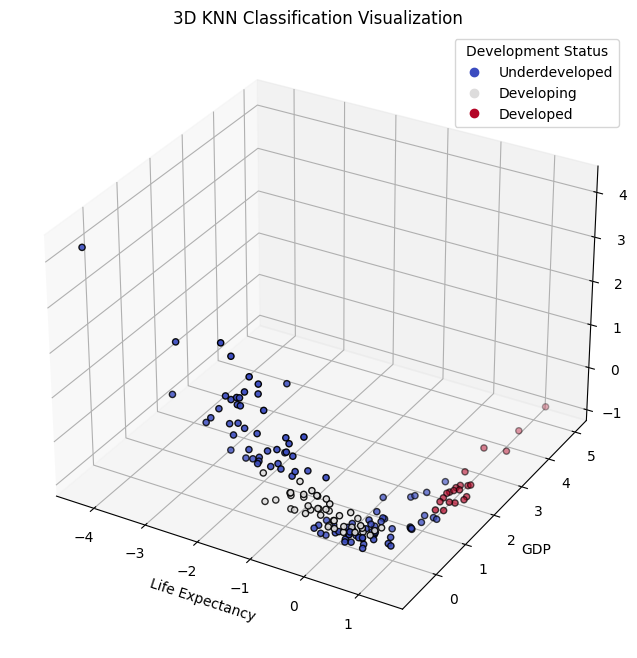

In [34]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_classification['life_expec'], df_classification['gdpp'], df_classification['child_mort'],
                     c=df_classification['development_status'], cmap='coolwarm', edgecolors='k')

ax.set_xlabel('Life Expectancy')
ax.set_ylabel('GDP')
ax.set_zlabel('Child Mortality')
plt.title("3D KNN Classification Visualization")
ax.legend(handles=scatter.legend_elements()[0], labels=['Underdeveloped', 'Developing', 'Developed'], title="Development Status")
plt.show()

In [28]:
test_size = 0.3

n_samples = df_classification.shape[0]
n_test_samples = int(n_samples * test_size)
indices = np.arange(n_samples)
np.random.shuffle(indices)
train_indices = indices[n_test_samples:]
test_indices = indices[:n_test_samples]
y = df_classification['development_status']
X = df_classification.drop(['development_status'], axis=1)
X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

In [29]:
knnclust = KNearestNeighbourClustering()
knnclust.fit(X_train,y_train)
predict = knnclust.predict(X_test)
acc = np.sum(predict==y_test)/len(y_test)
print(acc)

0.8


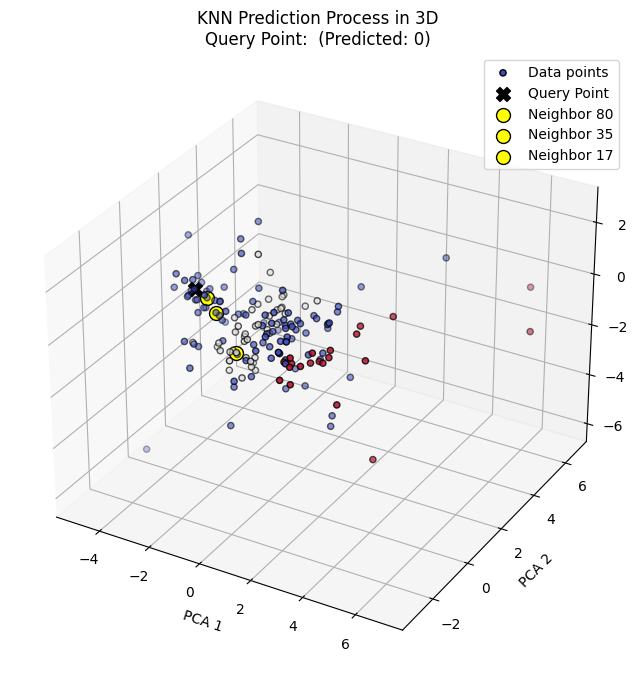

In [30]:
query_point_9D = df_classification.iloc[0, :-1].values  # The original 9D data (not PCA-reduced)

predicted_label = knnclust.predict([query_point_9D])  # Predict using the original 9D data

distances = np.linalg.norm(knnclust.X_train - query_point_9D, axis=1)  # Use 9D data here
k_indices = np.argsort(distances)[:knnclust.k]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_classification['development_status'], cmap='coolwarm', edgecolors='k', label='Data points')

query_point_pca = X_pca[0]  # Use the PCA-reduced version of the query point
ax.scatter(query_point_pca[0], query_point_pca[1], query_point_pca[2], c='black', marker='X', s=100, label='Query Point')

for i in k_indices:
    ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='yellow', marker='o', s=100, edgecolors='k', label=f"Neighbor {i}")

ax.set_title(f"KNN Prediction Process in 3D\nQuery Point:  (Predicted: {predicted_label[0]})")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Show legend
ax.legend()
